## Downloading and Unzipping the Data from Kaggle

In [ ]:
# Step 6: Mount Google Drive to save processed data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Step 7: Import necessary libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from skimage.io import imread
from skimage.transform import resize
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
from sklearn.model_selection import train_test_split
from torch.utils.tensorboard import SummaryWriter
from torch.optim.lr_scheduler import ReduceLROnPlateau
import torch
import torch.nn as nn
import torch.nn.functional as F
import shutil


## 2. Data Preprocessing: Increasing contrast of train and test images and resizing and creating the masks for the training batch.

In [ ]:
# Define image_ids by listing directories in the training dataset folder
#image_ids = next(os.walk(train_path))[1]

In [ ]:
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage import exposure
'''
# Load an example image
example_image_path = '/content/drive/MyDrive/CellSeg/Preprocessed_Train_Images/5afcbfd0dd64392aa1e233b996d0bfb4354ee7119f30ae111c33d0fe4df11590_image.png'
image = imread(example_image_path)[:, :, :3]  # Use only RGB channels if available

# Calculate the intensity range of the image
min_intensity = np.min(image)
max_intensity = np.max(image)
intensity_range = max_intensity - min_intensity

# Set a threshold for low contrast (e.g., range less than 50 for an 8-bit image)
low_contrast_threshold = 50

# Decide whether to apply CLAHE
if intensity_range < low_contrast_threshold:
    print("Low contrast detected, applying CLAHE.")
    # Normalize to [0, 1] for CLAHE
    image_normalized = image / 255.0

    # Apply CLAHE (Contrast Limited Adaptive Histogram Equalization)
    enhanced_image = exposure.equalize_adapthist(image_normalized, clip_limit=0.03)  # Adjust clip_limit as needed

    # Convert back to [0, 255] range for visualization
    enhanced_image_uint8 = (enhanced_image * 255).astype('uint8')
else:
    print("Sufficient contrast, no CLAHE applied.")
    enhanced_image_uint8 = image

# Plot the original and enhanced images side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].imshow(image)
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(enhanced_image_uint8)
axes[1].set_title('Enhanced Image (CLAHE)' if intensity_range < low_contrast_threshold else 'Original Image')
axes[1].axis('off')

plt.tight_layout()
plt.show()
'''

'\n# Load an example image\nexample_image_path = \'/content/drive/MyDrive/CellSeg/Preprocessed_Train_Images/5afcbfd0dd64392aa1e233b996d0bfb4354ee7119f30ae111c33d0fe4df11590_image.png\'\nimage = imread(example_image_path)[:, :, :3]  # Use only RGB channels if available\n\n# Calculate the intensity range of the image\nmin_intensity = np.min(image)\nmax_intensity = np.max(image)\nintensity_range = max_intensity - min_intensity\n\n# Set a threshold for low contrast (e.g., range less than 50 for an 8-bit image)\nlow_contrast_threshold = 50\n\n# Decide whether to apply CLAHE\nif intensity_range < low_contrast_threshold:\n    print("Low contrast detected, applying CLAHE.")\n    # Normalize to [0, 1] for CLAHE\n    image_normalized = image / 255.0\n\n    # Apply CLAHE (Contrast Limited Adaptive Histogram Equalization)\n    enhanced_image = exposure.equalize_adapthist(image_normalized, clip_limit=0.03)  # Adjust clip_limit as needed\n\n    # Convert back to [0, 255] range for visualization\n   

In [ ]:
import os
import numpy as np
from skimage.io import imread, imsave
from skimage.transform import resize
from skimage import exposure  # Added for contrast enhancement
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, Dataset
import torch
from torchvision import transforms

'''
# Set your paths
train_path = '/content/drive/MyDrive/CellSeg/2018_DSB_Preprocessed_Data/stage1_train/'

# Define paths to save preprocessed images and masks
preprocessed_image_dir = '/content/drive/MyDrive/CellSeg/Preprocessed_Train_Images/'
preprocessed_mask_dir = '/content/drive/MyDrive/CellSeg/Preprocessed_Train_Masks/'

# Create directories if they do not exist
os.makedirs(preprocessed_image_dir, exist_ok=True)
os.makedirs(preprocessed_mask_dir, exist_ok=True)

# Define image_ids by listing directories in the training dataset folder
image_ids = next(os.walk(train_path))[1]

# Step 1: Enhance Low-Contrast Images (Preprocessing Step)
for image_id in image_ids:
    image_dir = os.path.join(train_path, image_id, 'images', f'{image_id}.png')
    image = imread(image_dir)[:, :, :3]  # Use only RGB channels

    # Check if the image is low contrast
    if exposure.is_low_contrast(image, fraction_threshold=0.3):
        # Apply CLAHE (Contrast Limited Adaptive Histogram Equalization)
        print(f"Enhancing contrast for image {image_id} using CLAHE.")
        image = exposure.equalize_adapthist(image / 255.0)  # Normalize to [0, 1] and apply CLAHE
        image = (image * 255).astype(np.uint8)  # Convert back to [0, 255] uint8

    # Save the enhanced image back to disk for use in further processing
    imsave(os.path.join(preprocessed_image_dir, f'{image_id}_enhanced.png'), image)

'''

'\n# Set your paths\ntrain_path = \'/content/drive/MyDrive/CellSeg/2018_DSB_Preprocessed_Data/stage1_train/\'\n\n# Define paths to save preprocessed images and masks\npreprocessed_image_dir = \'/content/drive/MyDrive/CellSeg/Preprocessed_Train_Images/\'\npreprocessed_mask_dir = \'/content/drive/MyDrive/CellSeg/Preprocessed_Train_Masks/\'\n\n# Create directories if they do not exist\nos.makedirs(preprocessed_image_dir, exist_ok=True)\nos.makedirs(preprocessed_mask_dir, exist_ok=True)\n\n# Define image_ids by listing directories in the training dataset folder\nimage_ids = next(os.walk(train_path))[1]\n\n# Step 1: Enhance Low-Contrast Images (Preprocessing Step)\nfor image_id in image_ids:\n    image_dir = os.path.join(train_path, image_id, \'images\', f\'{image_id}.png\')\n    image = imread(image_dir)[:, :, :3]  # Use only RGB channels\n\n    # Check if the image is low contrast\n    if exposure.is_low_contrast(image, fraction_threshold=0.3):\n        # Apply CLAHE (Contrast Limited Ada

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage.io import imread, imsave
from skimage.transform import resize
from torch.utils.data import DataLoader, Dataset
import torch
from torchvision import transforms
from sklearn.model_selection import train_test_split

'''
# Set your paths
train_path = '/content/drive/MyDrive/CellSeg/2018_DSB_Preprocessed_Data/stage1_train/'

# Define paths to save preprocessed images and masks
preprocessed_image_dir = '/content/drive/MyDrive/CellSeg/Preprocessed_Train_Images/'
preprocessed_mask_dir = '/content/drive/MyDrive/CellSeg/Preprocessed_Train_Masks/'

# Create directories if they do not exist
os.makedirs(preprocessed_image_dir, exist_ok=True)
os.makedirs(preprocessed_mask_dir, exist_ok=True)

# Define image_ids by listing directories in the training dataset folder
image_ids = next(os.walk(train_path))[1]

# Function to combine multiple masks into a single binary mask
def load_and_combine_masks(mask_dir, img_shape):
    mask_files = os.listdir(mask_dir)
    combined_mask = np.zeros(img_shape[:2], dtype=np.uint8)

    for mask_file in mask_files:
        mask = imread(os.path.join(mask_dir, mask_file))
        combined_mask = np.maximum(combined_mask, mask)  # Combine masks using pixel-wise maximum

    return combined_mask

# Function to preprocess image and mask and check for empty masks
def preprocess_image_and_mask(image_id, base_path, preprocessed_image_dir, img_height=224, img_width=224):
    #image_dir = os.path.join(base_path, image_id, 'images', f'{image_id}_enhanced.png')
    image_dir = os.path.join(preprocessed_image_dir, f'{image_id}_enhanced.png')
    mask_dir = os.path.join(base_path, image_id, 'masks')

    # Load image
    image = imread(image_dir)[:, :, :3]  # Use only RGB channels
    # Combine multiple masks into a single mask
    mask = load_and_combine_masks(mask_dir, image.shape)

    # Print original shapes and ranges before resizing
    print(f"Original Image - dtype: {image.dtype}, min: {image.min()}, max: {image.max()}, shape: {image.shape}")
    print(f"Original Mask - dtype: {mask.dtype}, min: {mask.min()}, max: {mask.max()}, shape: {mask.shape}")

    # Resize image and mask
    image_resized = resize(image, (img_height, img_width), mode='constant', preserve_range=True)
    mask_resized = resize(mask, (img_height, img_width), mode='constant', preserve_range=True)

    # Convert to binary mask
    mask_resized = (mask_resized > 0).astype(np.uint8)

    # Check if the mask is empty (i.e., all pixel values are 0)
    if np.sum(mask_resized) == 0:
        print(f"Skipping Image {image_id} because the mask is empty.")
        return None, None  # Return None for both image and mask if mask is empty

    # Normalize image to [0, 1] range and convert to float32
    image_resized = (image_resized / 255.0).astype(np.float32)

    # Print resized shapes and ranges after resizing and normalization
    print(f"Resized Image - dtype: {image_resized.dtype}, min: {image_resized.min()}, max: {image_resized.max()}, shape: {image_resized.shape}")
    print(f"Resized Mask - dtype: {mask_resized.dtype}, min: {mask_resized.min()}, max: {mask_resized.max()}, shape: {mask_resized.shape}")

    # Save preprocessed image and mask to Google Drive as .png files
    imsave(os.path.join(preprocessed_image_dir, f'{image_id}_pp_enhanced.png'), (image_resized * 255).astype(np.uint8))
    imsave(os.path.join(preprocessed_mask_dir, f'{image_id}_mask.png'), (mask_resized * 255).astype(np.uint8))

    return image_resized, mask_resized

# Preprocess all images and masks from the dataset and filter out empty masks
X = []
Y = []

for image_id in image_ids:
    image_resized, mask_resized = preprocess_image_and_mask(image_id, train_path, preprocessed_image_dir)

    # Only append if both image and mask are not None (i.e., if the mask is not empty)
    if image_resized is not None and mask_resized is not None:
        X.append(image_resized)
        Y.append(mask_resized)

# Convert to numpy arrays
X = np.array(X)
Y = np.array(Y)

# Debugging: Check the shape of X and Y
print(f"Shape of X (Images): {X.shape}, Shape of Y (Masks): {Y.shape}")

# Split data into training and validation sets
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.1, random_state=42)

# Debugging: Check the shape of training and validation sets
print(f"Training set - X_train: {X_train.shape}, Y_train: {Y_train.shape}")
print(f"Validation set - X_val: {X_val.shape}, Y_val: {Y_val.shape}")

# Data transformation
train_transform = transforms.Compose([transforms.ToTensor()])
val_transform = transforms.Compose([transforms.ToTensor()])



# Custom Dataset to load images and masks (train/validation)
class SegmentationDataset(Dataset):
    def __init__(self, images, masks, transform=None):
        self.images = images
        self.masks = masks
        self.transform = transform

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image = self.images[idx]
        mask = self.masks[idx].astype(np.float32)  # Ensure mask is float32

        # Debugging: Print the shape of the image and mask before transform
        print(f"Original Image Shape: {image.shape}, Mask Shape: {mask.shape}")

        if self.transform:
            image = self.transform(image)
            mask = torch.tensor(mask, dtype=torch.float32)  # Ensure mask is float32 in PyTorch

            # Debugging: Print the shape after transformation to ensure it is still valid
            print(f"Transformed Image Shape: {image.shape}, Transformed Mask Shape: {mask.shape}")

        return image, mask


train_dataset_path = '/content/drive/MyDrive/CellSeg/Preprocessed_Train_Images/'
mask_dataset_path = '/content/drive/MyDrive/CellSeg/Preprocessed_Train_Masks/'


# Create DataLoader for training and validation
train_dataset = SegmentationDataset(X_train, Y_train, transform=train_transform)
val_dataset = SegmentationDataset(X_val, Y_val, transform=val_transform)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)

# Check if DataLoader is working properly with correct types and range
def check_data_loader(train_loader):
    for batch_idx, (images, masks) in enumerate(train_loader):
        print(f"Batch {batch_idx + 1} - Image dtype: {images.dtype}, Mask dtype: {masks.dtype}")
        print(f"Batch {batch_idx + 1} - Image min: {images.min()}, max: {images.max()}")
        print(f"Batch {batch_idx + 1} - Mask min: {masks.min()}, max: {masks.max()}")
        break  # Only check the first batch

# Now the check_data_loader is defined, you can call it here
check_data_loader(train_loader)
'''

'\n# Set your paths\ntrain_path = \'/content/drive/MyDrive/CellSeg/2018_DSB_Preprocessed_Data/stage1_train/\'\n\n# Define paths to save preprocessed images and masks\npreprocessed_image_dir = \'/content/drive/MyDrive/CellSeg/Preprocessed_Train_Images/\'\npreprocessed_mask_dir = \'/content/drive/MyDrive/CellSeg/Preprocessed_Train_Masks/\'\n\n# Create directories if they do not exist\nos.makedirs(preprocessed_image_dir, exist_ok=True)\nos.makedirs(preprocessed_mask_dir, exist_ok=True)\n\n# Define image_ids by listing directories in the training dataset folder\nimage_ids = next(os.walk(train_path))[1]\n\n# Function to combine multiple masks into a single binary mask\ndef load_and_combine_masks(mask_dir, img_shape):\n    mask_files = os.listdir(mask_dir)\n    combined_mask = np.zeros(img_shape[:2], dtype=np.uint8)\n\n    for mask_file in mask_files:\n        mask = imread(os.path.join(mask_dir, mask_file))\n        combined_mask = np.maximum(combined_mask, mask)  # Combine masks using pixe

In [ ]:
'''
import os
import numpy as np
from skimage.io import imread, imsave
from skimage.transform import resize
from skimage import exposure  # For contrast enhancement
from torch.utils.data import DataLoader, Dataset
import torch
from torchvision import transforms

# Set your test paths
test_path = '/content/drive/MyDrive/CellSeg/2018_DSB_Preprocessed_Data/stage1_test/'

# Define a folder to save preprocessed test images
preprocessed_test_image_dir = '/content/drive/MyDrive/CellSeg/Preprocessed_Test_Images/'

# Create directories if they do not exist
os.makedirs(preprocessed_test_image_dir, exist_ok=True)

# Define a simple transformation for test data (convert to tensor and ensure float32)
test_transform = transforms.Compose([
    transforms.ToTensor(),  # Converts numpy array to tensor
    transforms.ConvertImageDtype(torch.float32)  # Ensures the image is in float32
])

# Function to load, preprocess, and save test images (no masks)
def load_and_preprocess_test_image(image_id, base_path, img_height=224, img_width=224):
    image_dir = os.path.join(base_path, image_id, 'images', f'{image_id}.png')
    image = imread(image_dir)[:, :, :3]  # Use only RGB channels

    # Debugging: Print original shape before resizing
    print(f"Original Test Image Size: {image.shape}")

    # Check if the image is low contrast and apply CLAHE if needed
    if exposure.is_low_contrast(image, fraction_threshold=0.3):
        print(f"Enhancing contrast for image {image_id} using CLAHE.")
        # Normalize to [0, 1] for CLAHE
        image_normalized = image / 255.0
        # Apply CLAHE (Contrast Limited Adaptive Histogram Equalization)
        image = exposure.equalize_adapthist(image_normalized, clip_limit=0.03)  # Adjust clip_limit as needed
        image = (image * 255).astype(np.float32)  # Convert back to [0, 255] float32

    # Resize image while preserving float32 format
    image_resized = resize(image, (img_height, img_width), mode='constant', preserve_range=True).astype(np.float32)

    # Normalize image to [0, 1] and keep as float32
    image_resized = (image_resized / 255.0).astype(np.float32)

    # Save preprocessed image to Google Drive (convert to uint8 for saving)
    imsave(os.path.join(preprocessed_test_image_dir, f'{image_id}_image.png'), (image_resized * 255).astype(np.uint8))

    # Debugging: Print shape and type after resizing
    print(f"Resized Test Image Shape: {image_resized.shape}, dtype: {image_resized.dtype}")

    return image_resized

# Preprocess all test images and save them
X_test = []
test_image_ids = next(os.walk(test_path))[1]

#for image_id in test_image_ids:
#    image_resized = load_and_preprocess_test_image(image_id, test_path)
#    X_test.append(image_resized)

# Convert to numpy array
#X_test = np.array(X_test)  # Images are already normalized to [0, 1] in float32

# Debugging: Check the shape of X_test
print(f"Shape of X_test (Test Images): {X_test.shape}")

# Create a custom dataset class for test images
class TestDataset(Dataset):
    def __init__(self, images, transform=None):
        self.images = images
        self.transform = transform

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image = self.images[idx]

        # Debugging: Print the shape of the image before transform
        print(f"Original Test Image Shape: {image.shape}, dtype: {image.dtype}")

        if self.transform:
            image = self.transform(image)

            # Debugging: Print the shape and type after transformation
            print(f"Transformed Test Image Shape: {image.shape}, dtype: {image.dtype}")

        return image

# DataLoader for test data
test_dataset = TestDataset(X_test, transform=test_transform)  # Use test_transform here
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# Debugging: Check the shape of a batch from the test DataLoader
for images in test_loader:
    print(f"Batch Shape - Test Images: {images.shape}, dtype: {images.dtype}")
    break  # Just check the first batch for debugging purposes
'''

'\nimport os\nimport numpy as np\nfrom skimage.io import imread, imsave\nfrom skimage.transform import resize\nfrom skimage import exposure  # For contrast enhancement\nfrom torch.utils.data import DataLoader, Dataset\nimport torch\nfrom torchvision import transforms\n\n# Set your test paths\ntest_path = \'/content/drive/MyDrive/CellSeg/2018_DSB_Preprocessed_Data/stage1_test/\'\n\n# Define a folder to save preprocessed test images\npreprocessed_test_image_dir = \'/content/drive/MyDrive/CellSeg/Preprocessed_Test_Images/\'\n\n# Create directories if they do not exist\nos.makedirs(preprocessed_test_image_dir, exist_ok=True)\n\n# Define a simple transformation for test data (convert to tensor and ensure float32)\ntest_transform = transforms.Compose([\n    transforms.ToTensor(),  # Converts numpy array to tensor\n    transforms.ConvertImageDtype(torch.float32)  # Ensures the image is in float32\n])\n\n# Function to load, preprocess, and save test images (no masks)\ndef load_and_preprocess_t

## 3. U-Net Model Architecture

In [ ]:
from skimage.io import imread
'''
# Function to load saved ground truth masks from drive
def load_saved_ground_truth_masks(test_image_ids, mask_dir):
    ground_truth_masks = {}
    for image_id in test_image_ids:
        mask_path = os.path.join(mask_dir, f"{image_id}_mask.png")
        if os.path.exists(mask_path):
            mask = imread(mask_path)
            ground_truth_masks[image_id] = mask
        else:
            print(f"Mask for {image_id} not found at {mask_path}")
    return ground_truth_masks

# Load saved ground truth masks
ground_truth_masks_loaded = load_saved_ground_truth_masks(test_image_ids, ground_truth_test_mask_dir)
'''

'\n# Function to load saved ground truth masks from drive\ndef load_saved_ground_truth_masks(test_image_ids, mask_dir):\n    ground_truth_masks = {}\n    for image_id in test_image_ids:\n        mask_path = os.path.join(mask_dir, f"{image_id}_mask.png")\n        if os.path.exists(mask_path):\n            mask = imread(mask_path)\n            ground_truth_masks[image_id] = mask\n        else:\n            print(f"Mask for {image_id} not found at {mask_path}")\n    return ground_truth_masks\n\n# Load saved ground truth masks\nground_truth_masks_loaded = load_saved_ground_truth_masks(test_image_ids, ground_truth_test_mask_dir)\n'

In [ ]:
'''
import os
from skimage.io import imread
import numpy as np

# Function to load images and masks from the given directories
def load_images_and_masks(image_dir, mask_dir, image_size=(224, 224)):
    image_ids = [f.split('_')[0] for f in os.listdir(image_dir) if f.endswith('.png')]

    images = []
    masks = []

    for image_id in image_ids:
        image_path = os.path.join(image_dir, f"{image_id}_image.png")
        mask_path = os.path.join(mask_dir, f"{image_id}_mask.png")

        if os.path.exists(image_path) and os.path.exists(mask_path):
            image = imread(image_path)  # Load the image
            mask = imread(mask_path)    # Load the mask

            # Resize or reshape if needed
            if image.shape[:2] != image_size:
                image = resize(image, image_size, mode='constant', preserve_range=True)
            if mask.shape[:2] != image_size:
                mask = resize(mask, image_size, mode='constant', preserve_range=True)

            images.append(image)
            masks.append(mask)
        else:
            print(f"Warning: Missing image or mask for {image_id}")

    images = np.array(images) / 255.0  # Normalize images to [0, 1]
    masks = (np.array(masks) > 0).astype(np.uint8)  # Convert masks to binary (0 or 1)

    return images, masks

# Load preprocessed training images and masks
train_dataset_path = '/content/drive/MyDrive/CellSeg/Preprocessed_Train_Images/'
mask_dataset_path = '/content/drive/MyDrive/CellSeg/Preprocessed_Train_Masks/'
train_images, train_masks = load_images_and_masks(train_dataset_path, mask_dataset_path)

# Debugging: Check the shapes of loaded data
print(f"Loaded train images shape: {train_images.shape}")
print(f"Loaded train masks shape: {train_masks.shape}")
'''

'\nimport os\nfrom skimage.io import imread\nimport numpy as np\n\n# Function to load images and masks from the given directories\ndef load_images_and_masks(image_dir, mask_dir, image_size=(224, 224)):\n    image_ids = [f.split(\'_\')[0] for f in os.listdir(image_dir) if f.endswith(\'.png\')]\n\n    images = []\n    masks = []\n\n    for image_id in image_ids:\n        image_path = os.path.join(image_dir, f"{image_id}_image.png")\n        mask_path = os.path.join(mask_dir, f"{image_id}_mask.png")\n\n        if os.path.exists(image_path) and os.path.exists(mask_path):\n            image = imread(image_path)  # Load the image\n            mask = imread(mask_path)    # Load the mask\n\n            # Resize or reshape if needed\n            if image.shape[:2] != image_size:\n                image = resize(image, image_size, mode=\'constant\', preserve_range=True)\n            if mask.shape[:2] != image_size:\n                mask = resize(mask, image_size, mode=\'constant\', preserve_range



---



In [ ]:
'''
import os

# Path to the folder containing the images
train_dataset_path = '/content/drive/MyDrive/CellSeg/Preprocessed_Train_Images/'

# Iterate through all files in the directory
for filename in os.listdir(train_dataset_path):
    file_path = os.path.join(train_dataset_path, filename)

    # Check if the file does not end with '_pp_enhanced.png'
    if not filename.endswith('_pp_enhanced.png'):
        try:
            # Delete the file
            os.remove(file_path)
            print(f"Deleted: {file_path}")
        except Exception as e:
            print(f"Error deleting {file_path}: {e}")
    else:
        print(f"Kept: {file_path}")
'''

'\nimport os\n\n# Path to the folder containing the images\ntrain_dataset_path = \'/content/drive/MyDrive/CellSeg/Preprocessed_Train_Images/\'\n\n# Iterate through all files in the directory\nfor filename in os.listdir(train_dataset_path):\n    file_path = os.path.join(train_dataset_path, filename)\n\n    # Check if the file does not end with \'_pp_enhanced.png\'\n    if not filename.endswith(\'_pp_enhanced.png\'):\n        try:\n            # Delete the file\n            os.remove(file_path)\n            print(f"Deleted: {file_path}")\n        except Exception as e:\n            print(f"Error deleting {file_path}: {e}")\n    else:\n        print(f"Kept: {file_path}")\n'

In [ ]:
import os

# Directories
train_dataset_path = '/content/drive/MyDrive/CellSeg/Preprocessed_Train_Images/'
test_dataset_path = '/content/drive/MyDrive/CellSeg/Preprocessed_Test_Images/'
train_mask_path = '/content/drive/MyDrive/CellSeg/Preprocessed_Train_Masks/'
test_mask_path = '/content/drive/MyDrive/CellSeg/Preprocessed_Test_Masks/'

# Function to count the number of files in a directory
def count_images_in_directory(directory):
    count = 0
    for filename in os.listdir(directory):
        if filename.endswith('.png'):  # Adjust the extension if needed (e.g., .jpg)
            count += 1
    return count

# Count the images in each directory
train_image_count = count_images_in_directory(train_dataset_path)
test_image_count = count_images_in_directory(test_dataset_path)
train_mask_count = count_images_in_directory(train_mask_path)
test_mask_count = count_images_in_directory(test_mask_path)

# Print the results
print(f"Number of images in {train_dataset_path}: {train_image_count}")
print(f"Number of images in {test_dataset_path}: {test_image_count}")
print(f"Number of masks in {train_mask_path}: {train_mask_count}")
print(f"Number of masks in {test_mask_path}: {test_mask_count}")


Number of images in /content/drive/MyDrive/CellSeg/Preprocessed_Train_Images/: 570
Number of images in /content/drive/MyDrive/CellSeg/Preprocessed_Test_Images/: 100
Number of masks in /content/drive/MyDrive/CellSeg/Preprocessed_Train_Masks/: 570
Number of masks in /content/drive/MyDrive/CellSeg/Preprocessed_Test_Masks/: 100


### Augmentations

#### Augmentation variant 1

In [ ]:
!pip install albumentations

In [ ]:
import os
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader, random_split
from skimage.io import imread
from albumentations import (HorizontalFlip, VerticalFlip, RandomRotate90, ElasticTransform, GridDistortion, RandomBrightnessContrast, Resize)
from albumentations.pytorch import ToTensorV2  # Used to convert to PyTorch tensors
import albumentations as A

# Paths to the preprocessed images and masks
train_dataset_path = '/content/drive/MyDrive/CellSeg/Preprocessed_Train_Images/'
mask_dataset_path = '/content/drive/MyDrive/CellSeg/Preprocessed_Train_Masks/'
test_dataset_path = '/content/drive/MyDrive/CellSeg/Preprocessed_Test_Images/'

# Define a custom dataset class to load the images and masks
class SegmentationDataset(Dataset):
    def __init__(self, img_dir, mask_dir=None, transform=None):
        self.img_dir = img_dir
        self.mask_dir = mask_dir
        self.transform = transform
        # Properly extract image_ids by removing suffixes like '_image', '_enhanced', '_pp'
        self.image_ids = sorted([file.replace('_image.png', '').replace('_enhanced.png', '').replace('_pp', '')
                                 for file in os.listdir(img_dir) if file.endswith('.png')])

    def __len__(self):
        return len(self.image_ids)

    def __getitem__(self, idx):
        image_id = self.image_ids[idx]

        # Attempt to load the image
        img_path = os.path.join(self.img_dir, image_id + '_image.png')
        if not os.path.exists(img_path):
            img_path = os.path.join(self.img_dir, image_id + '_pp_enhanced.png')

        if not os.path.exists(img_path):
            raise FileNotFoundError(f"Image not found for {image_id} at {img_path}")

        image = imread(img_path).astype(np.float32) / 255.0  # Normalize image

        if self.mask_dir:
            # Correct mask path generation to include '_mask.png'
            mask_path = os.path.join(self.mask_dir, f'{image_id}_mask.png')

            if not os.path.exists(mask_path):
                raise FileNotFoundError(f"Mask not found for {image_id} at {mask_path}")

            mask = imread(mask_path).astype(np.float32) / 255.0  # Normalize mask

            # Ensure mask has shape [H, W] for binary segmentation
            if len(mask.shape) == 2:  # If mask is [H, W], add a channel dimension
                mask = np.expand_dims(mask, axis=2)  # Convert to [H, W, 1]

            if self.transform:
                augmented = self.transform(image=image, mask=mask)
                image = augmented['image']
                mask = augmented['mask']

            return image, mask
        else:
            if self.transform:
                augmented = self.transform(image=image)
                image = augmented['image']
            return image

# Define augmentations using Albumentations
train_transform = A.Compose([
    A.RandomRotate90(),  # Randomly rotate the image 90 degrees
    A.HorizontalFlip(p=0.5),  # Random horizontal flip
    A.VerticalFlip(p=0.5),    # Random vertical flip
    A.RandomBrightnessContrast(p=0.2),  # Random brightness and contrast adjustments
    A.ElasticTransform(alpha=1, sigma=50, alpha_affine=50, p=0.3),  # Elastic deformation
    A.GridDistortion(p=0.3),  # Distorts the image grid
    A.Resize(224, 224),  # Resize the image to 224x224
    ToTensorV2()  # Converts to PyTorch tensors
])

val_transform = A.Compose([
    A.Resize(224, 224),  # Resize validation images to 224x224
    ToTensorV2()  # Converts to PyTorch tensors
])

# Define datasets with transformations
train_dataset = SegmentationDataset(img_dir=train_dataset_path, mask_dir=mask_dataset_path, transform=train_transform)
test_dataset = SegmentationDataset(test_dataset_path, transform=val_transform)

# Split the dataset into training (80%) and validation (20%) sets
train_size = int(0.9 * len(train_dataset))
val_size = len(train_dataset) - train_size
train_subset, val_subset = random_split(train_dataset, [train_size, val_size])

# Create data loaders
train_loader = DataLoader(train_subset, batch_size=8, shuffle=True)
val_loader = DataLoader(val_subset, batch_size=8, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)


# Print number of images in train, validation, and test sets
print(f"Number of training images: {train_size}")
print(f"Number of validation images: {val_size}")
print(f"Number of test images: {len(test_dataset)}")


#### Augmentation variant 2

In [ ]:
import os
import numpy as np
from skimage.io import imread
from albumentations import (HorizontalFlip, VerticalFlip, RandomRotate90, ElasticTransform, GridDistortion, RandomBrightnessContrast, Resize)
from albumentations.pytorch import ToTensorV2  # Used to convert to PyTorch tensors
from torch.utils.data import Dataset, DataLoader, random_split
import albumentations as A

# Paths to the preprocessed images and masks
train_dataset_path = '/content/drive/MyDrive/CellSeg/Preprocessed_Train_Images/'
mask_dataset_path = '/content/drive/MyDrive/CellSeg/Preprocessed_Train_Masks/'
test_dataset_path = '/content/drive/MyDrive/CellSeg/Preprocessed_Test_Images/'

# Define a custom dataset class to load the images and masks
class SegmentationDataset(Dataset):
    def __init__(self, img_dir, mask_dir=None, transform=None):
        self.img_dir = img_dir
        self.mask_dir = mask_dir
        self.transform = transform
        # Properly extract image_ids by removing suffixes like '_image', '_enhanced', '_pp'
        self.image_ids = sorted([file.replace('_image.png', '').replace('_enhanced.png', '').replace('_pp', '')
                                 for file in os.listdir(img_dir) if file.endswith('.png')])

    def __len__(self):
        return len(self.image_ids)

    def __getitem__(self, idx):
        image_id = self.image_ids[idx]

        # Attempt to load the image
        img_path = os.path.join(self.img_dir, image_id + '_image.png')
        if not os.path.exists(img_path):
            img_path = os.path.join(self.img_dir, image_id + '_pp_enhanced.png')

        if not os.path.exists(img_path):
            raise FileNotFoundError(f"Image not found for {image_id} at {img_path}")

        image = imread(img_path).astype(np.float32) / 255.0  # Normalize image

        if self.mask_dir:
            mask_path = os.path.join(self.mask_dir, f'{image_id}_mask.png')

            if not os.path.exists(mask_path):
                raise FileNotFoundError(f"Mask not found for {image_id} at {mask_path}")

            mask = imread(mask_path).astype(np.float32) / 255.0  # Normalize mask

            # Ensure both mask and image are resized to [H, W, 1]
            if len(mask.shape) == 2:  # If mask is [H, W], add a channel dimension
                mask = np.expand_dims(mask, axis=2)  # Convert to [H, W, 1]

            if self.transform:
                augmented = self.transform(image=image, mask=mask)
                image = augmented['image']
                mask = augmented['mask']

                # Ensure mask is [1, H, W] after transformation (transpose if necessary)
                if mask.ndim == 3 and mask.shape[-1] == 1:
                    mask = np.transpose(mask, (2, 0, 1))  # Convert to [1, H, W]

            return image, mask
        else:
            if self.transform:
                augmented = self.transform(image=image)
                image = augmented['image']
            return image

# Define augmentations using Albumentations
train_transform = A.Compose([
    A.Resize(224, 224),  # Ensure image and mask are resized to the same dimensions first
    A.RandomRotate90(),  # Randomly rotate the image 90 degrees
    A.HorizontalFlip(p=0.5),  # Random horizontal flip
    A.VerticalFlip(p=0.5),    # Random vertical flip
    A.RandomBrightnessContrast(p=0.2),  # Random brightness and contrast adjustments
    A.ElasticTransform(alpha=1, sigma=50, p=0.3),  # Elastic deformation
    A.GridDistortion(p=0.3),  # Distorts the image grid
    ToTensorV2()  # Converts to PyTorch tensors
])

val_transform = A.Compose([
    A.Resize(224, 224),  # Resize validation images to 224x224
    ToTensorV2()  # Converts to PyTorch tensors
])

# Define datasets with transformations
train_dataset = SegmentationDataset(img_dir=train_dataset_path, mask_dir=mask_dataset_path, transform=train_transform)
test_dataset = SegmentationDataset(test_dataset_path, transform=val_transform)

# Split the dataset into training (90%) and validation (10%) sets
train_size = int(0.9 * len(train_dataset))
val_size = len(train_dataset) - train_size
train_subset, val_subset = random_split(train_dataset, [train_size, val_size])

# Create data loaders
train_loader = DataLoader(train_subset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_subset, batch_size=16, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# Check if loading is correct for the training set
for images, masks in train_loader:
    # DEBUGGING: Check shape of images and masks
    print(f"Train Batch - Images Shape: {images.shape}, Masks Shape: {masks.shape}")
    break

# Check if loading is correct for the validation set
for images, masks in val_loader:
    # DEBUGGING: Check shape of images and masks
    print(f"Validation Batch - Images Shape: {images.shape}, Masks Shape: {masks.shape}")
    break


Train Batch - Images Shape: torch.Size([16, 3, 224, 224]), Masks Shape: torch.Size([16, 1, 224, 224])
Validation Batch - Images Shape: torch.Size([16, 3, 224, 224]), Masks Shape: torch.Size([16, 1, 224, 224])


### No Augmentation and batch size reduced from 16 to 8

In [ ]:
import os
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision import transforms
from skimage.io import imread
import matplotlib.pyplot as plt

# Paths to the preprocessed images and masks
train_dataset_path = '/content/drive/MyDrive/CellSeg/Preprocessed_Train_Images/'
mask_dataset_path = '/content/drive/MyDrive/CellSeg/Preprocessed_Train_Masks/'
test_dataset_path = '/content/drive/MyDrive/CellSeg/Preprocessed_Test_Images/'

# Define a custom dataset class to load the images and masks
class SegmentationDataset(Dataset):
    def __init__(self, img_dir, mask_dir=None, transform=None):
        self.img_dir = img_dir
        self.mask_dir = mask_dir
        self.transform = transform
        # Properly extract image_ids by removing suffixes like '_image', '_enhanced', '_pp'
        self.image_ids = sorted([file.replace('_image.png', '').replace('_enhanced.png', '').replace('_pp', '')
                                 for file in os.listdir(img_dir) if file.endswith('.png')])

    def __len__(self):
        return len(self.image_ids)

    def __getitem__(self, idx):
        image_id = self.image_ids[idx]

        # Attempt to load the image
        img_path = os.path.join(self.img_dir, image_id + '_image.png')
        #print(f"Trying to load image from: {img_path}")  # Debug statement
        if not os.path.exists(img_path):
            img_path = os.path.join(self.img_dir, image_id + '_pp_enhanced.png')
            #print(f"Trying alternative path: {img_path}")  # Debug statement

        if not os.path.exists(img_path):
            raise FileNotFoundError(f"Image not found for {image_id} at {img_path}")

        #print(f"Successfully loaded image: {img_path}")  # Debug statement
        image = imread(img_path).astype(np.float32) / 255.0  # Normalize image

        # Ensure image is in the format [C, H, W] (channels, height, width)
        if image.shape[-1] == 3:  # If the image is in [H, W, C] format
            image = np.transpose(image, (2, 0, 1))  # Convert to [C, H, W]

        if self.mask_dir:
            # Correct mask path generation to include '_mask.png'
            mask_path = os.path.join(self.mask_dir, f'{image_id}_mask.png')

            # Print the image ID and the mask path for debugging
            #print(f"Image ID: {image_id}, Mask Path: {mask_path}")

            if not os.path.exists(mask_path):
                raise FileNotFoundError(f"Mask not found for {image_id} at {mask_path}")

            #print(f"Successfully loaded mask: {mask_path}")  # Debug statement
            mask = imread(mask_path).astype(np.float32) / 255.0  # Normalize mask

            # Ensure mask has shape [1, H, W] for binary segmentation
            if len(mask.shape) == 2:  # If mask is [H, W], add a channel dimension
                mask = np.expand_dims(mask, axis=0)  # Convert to [1, H, W]

            # Apply transformations (if any)
            if self.transform:
                image = torch.tensor(image, dtype=torch.float32)  # Ensure image is float32
                mask = torch.tensor(mask, dtype=torch.float32)    # Ensure mask is float32

            return image, mask
        else:
            if self.transform:
                image = torch.tensor(image, dtype=torch.float32)  # Ensure image is float32
            return image

# Define transformations (if needed)
train_transform = transforms.Compose([
    transforms.ToTensor(),  # Convert image to tensor
])

val_transform = transforms.Compose([
    transforms.ToTensor(),  # Convert image to tensor
])

# Define datasets
train_dataset = SegmentationDataset(img_dir=train_dataset_path, mask_dir=mask_dataset_path, transform=train_transform)
test_dataset = SegmentationDataset(test_dataset_path)

# Split the dataset into training (80%) and validation (20%) sets
train_size = int(0.9 * len(train_dataset))
val_size = len(train_dataset) - train_size
train_subset, val_subset = random_split(train_dataset, [train_size, val_size])

# Create data loaders
train_loader = DataLoader(train_subset, batch_size=8, shuffle=True)
val_loader = DataLoader(val_subset, batch_size=8, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

# Check if loading is correct for the training set
for images, masks in train_loader:
    #print(f"Train Batch - Images Shape: {images.shape}, Masks Shape: {masks.shape}")
    break

# Check if loading is correct for the validation set
for images, masks in val_loader:
    #print(f"Validation Batch - Images Shape: {images.shape}, Masks Shape: {masks.shape}")
    break

# Check if loading is correct for the test set (without masks)
for images in test_loader:
    #print(f"Test Batch - Images Shape: {images.shape}")
    break


# Print number of images in train, validation, and test sets
print(f"Number of training images: {train_size}")
print(f"Number of validation images: {val_size}")
print(f"Number of test images: {len(test_dataset)}")

Number of training images: 513
Number of validation images: 57
Number of test images: 100


### Unet++ with attention

In [ ]:
'''
class AttentionBlock(nn.Module):
    def __init__(self, in_channels, gating_channels, inter_channels):
        super(AttentionBlock, self).__init__()
        self.W_g = nn.Sequential(
            nn.Conv2d(gating_channels, inter_channels, kernel_size=1, stride=1, padding=0, bias=True),
            nn.BatchNorm2d(inter_channels)
        )

        self.W_x = nn.Sequential(
            nn.Conv2d(in_channels, inter_channels, kernel_size=1, stride=1, padding=0, bias=True),
            nn.BatchNorm2d(inter_channels)
        )

        self.psi = nn.Sequential(
            nn.Conv2d(inter_channels, 1, kernel_size=1, stride=1, padding=0, bias=True),
            nn.BatchNorm2d(1),
            nn.Sigmoid()
        )

        self.relu = nn.ReLU(inplace=True)

    def forward(self, x, g):
        # Upsample the gating signal to match the dimensions of the encoder feature map
        g1 = self.W_g(F.interpolate(g, size=x.shape[2:], mode='bilinear', align_corners=True))
        x1 = self.W_x(x)

        # Add the transformed feature maps
        psi = self.relu(g1 + x1)
        psi = self.psi(psi)

        # Element-wise multiplication for attention
        return x * psi



class UNetPlusPlusWithAttention(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(UNetPlusPlusWithAttention, self).__init__()

        # Encoder path
        self.encoder1 = self.double_conv(in_channels, 64)
        self.encoder2 = self.double_conv(64, 128)
        self.encoder3 = self.double_conv(128, 256)
        self.encoder4 = self.double_conv(256, 512)

        # Bottleneck
        self.bottleneck = self.double_conv(512, 1024)

        # Decoder path with nested convolutions (UNet++)
        self.upconv4 = nn.ConvTranspose2d(1024, 512, kernel_size=2, stride=2)
        self.decoder4_1 = self.double_conv(1024, 512)

        self.attention4 = AttentionBlock(in_channels=512, gating_channels=1024, inter_channels=256)

        self.upconv3 = nn.ConvTranspose2d(512, 256, kernel_size=2, stride=2)
        self.decoder3_1 = self.double_conv(512, 256)

        self.attention3 = AttentionBlock(in_channels=256, gating_channels=512, inter_channels=128)

        self.upconv2 = nn.ConvTranspose2d(256, 128, kernel_size=2, stride=2)
        self.decoder2_1 = self.double_conv(256, 128)

        self.attention2 = AttentionBlock(in_channels=128, gating_channels=256, inter_channels=64)

        self.upconv1 = nn.ConvTranspose2d(128, 64, kernel_size=2, stride=2)
        self.decoder1_1 = self.double_conv(128, 64)

        self.attention1 = AttentionBlock(in_channels=64, gating_channels=128, inter_channels=32)

        # Output layer
        self.out_conv = nn.Conv2d(64, out_channels, kernel_size=1)

    def double_conv(self, in_channels, out_channels, dropout_prob=0.1):
        return nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
            nn.ELU(inplace=True),  # Switch to ELU activation
            nn.Dropout(dropout_prob),  # Add dropout
            nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1),
            nn.ELU(inplace=True),  # Switch to ELU activation
        )

    def forward(self, x):
        # Encoder path
        e1 = self.encoder1(x)
        e2 = self.encoder2(F.max_pool2d(e1, 2))
        e3 = self.encoder3(F.max_pool2d(e2, 2))
        e4 = self.encoder4(F.max_pool2d(e3, 2))

        # Bottleneck
        b = self.bottleneck(F.max_pool2d(e4, 2))

        # Decoder path with attention
        d4_1 = self.upconv4(b)
        e4_att = self.attention4(e4, b)  # Apply attention gate
        d4_1 = torch.cat([d4_1, e4_att], dim=1)
        d4_1 = self.decoder4_1(d4_1)

        d3_1 = self.upconv3(d4_1)
        e3_att = self.attention3(e3, d4_1)  # Apply attention gate
        d3_1 = torch.cat([d3_1, e3_att], dim=1)
        d3_1 = self.decoder3_1(d3_1)

        d2_1 = self.upconv2(d3_1)
        e2_att = self.attention2(e2, d3_1)  # Apply attention gate
        d2_1 = torch.cat([d2_1, e2_att], dim=1)
        d2_1 = self.decoder2_1(d2_1)

        d1_1 = self.upconv1(d2_1)
        e1_att = self.attention1(e1, d2_1)  # Apply attention gate
        d1_1 = torch.cat([d1_1, e1_att], dim=1)
        d1_1 = self.decoder1_1(d1_1)

        # Output
        out = torch.sigmoid(self.out_conv(d1_1))  # Use sigmoid for binary segmentation
        out = F.interpolate(out, size=(x.size(2), x.size(3)), mode='bilinear', align_corners=False)
        return out

# Instantiate the U-Net++ model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = UNetPlusPlusWithAttention(in_channels=3, out_channels=1).to(device)
'''

### Training and Validation Attention Block

Epoch [1/500], Train Loss: 0.5440, Val Loss: 0.5289, Train Dice: 0.2729, Val Dice: 0.2553
Epoch [2/500], Train Loss: 0.5132, Val Loss: 0.5302, Train Dice: 0.2728, Val Dice: 0.2535
Epoch [3/500], Train Loss: 0.5071, Val Loss: 0.5224, Train Dice: 0.2721, Val Dice: 0.2558
Epoch [4/500], Train Loss: 0.5076, Val Loss: 0.5303, Train Dice: 0.2728, Val Dice: 0.2566
Epoch [5/500], Train Loss: 0.5075, Val Loss: 0.5179, Train Dice: 0.2730, Val Dice: 0.2569
Epoch [6/500], Train Loss: 0.5077, Val Loss: 0.5217, Train Dice: 0.2756, Val Dice: 0.2556
Epoch [7/500], Train Loss: 0.5049, Val Loss: 0.5170, Train Dice: 0.2727, Val Dice: 0.2556
Epoch [8/500], Train Loss: 0.5036, Val Loss: 0.5215, Train Dice: 0.2724, Val Dice: 0.2556
Epoch [9/500], Train Loss: 0.5064, Val Loss: 0.5158, Train Dice: 0.2813, Val Dice: 0.2587
Epoch [10/500], Train Loss: 0.5030, Val Loss: 0.5173, Train Dice: 0.2727, Val Dice: 0.2551
Epoch [11/500], Train Loss: 0.5021, Val Loss: 0.5151, Train Dice: 0.2726, Val Dice: 0.2872
Epoch [1

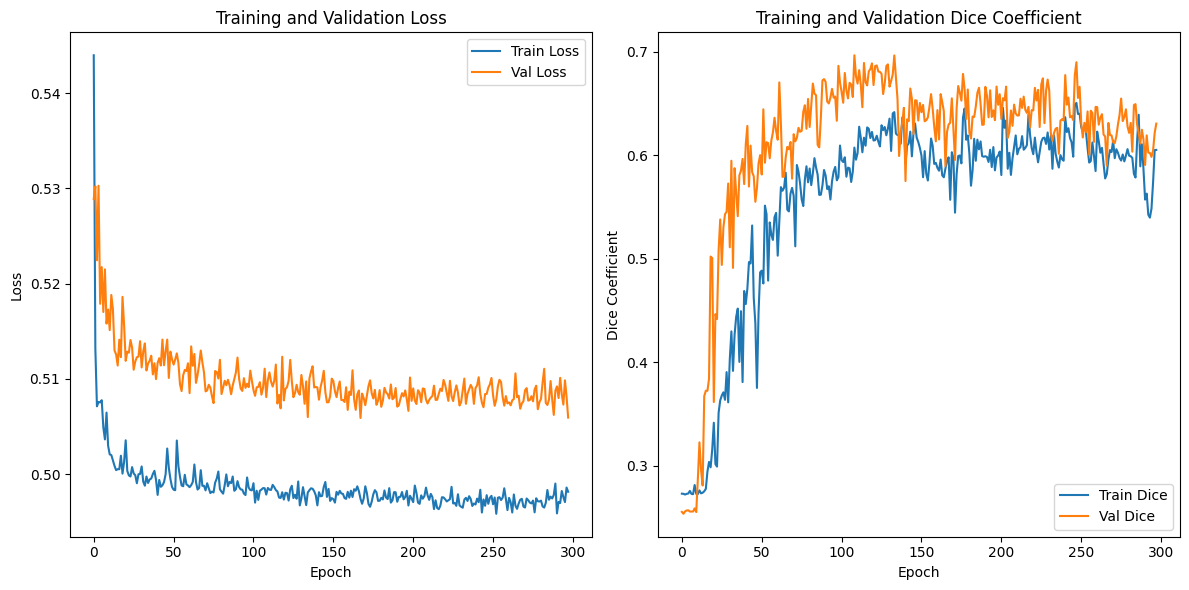

In [ ]:

'''
# Initialize weights using He initialization
def init_weights(m):
    if isinstance(m, nn.Conv2d):
        nn.init.kaiming_normal_(m.weight, nonlinearity='relu')

model.apply(init_weights)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Focal Loss for class imbalance
class FocalLoss(nn.Module):
    def __init__(self, alpha=1, gamma=2):
        super(FocalLoss, self).__init__()
        self.alpha = alpha
        self.gamma = gamma

    def forward(self, inputs, targets):
        BCE_loss = nn.BCEWithLogitsLoss()(inputs, targets)
        pt = torch.exp(-BCE_loss)
        F_loss = self.alpha * (1 - pt) ** self.gamma * BCE_loss
        return F_loss


# Dice coefficient function
def dice_coefficient(preds, masks, smooth=1):
    preds = torch.sigmoid(preds) > 0.5  # Threshold predictions at 0.5
    preds = preds.float()
    masks = masks.float()
    intersection = (preds * masks).sum(dim=[1, 2])
    dice = (2. * intersection + smooth) / (preds.sum(dim=[1, 2]) + masks.sum(dim=[1, 2]) + smooth)
    return dice.mean()

# Dice loss
def dice_loss(preds, masks, smooth=1):
    intersection = (preds * masks).sum()
    dice = (2. * intersection + smooth) / (preds.sum() + masks.sum() + smooth)
    return 1 - dice

# Combined BCE and Dice loss with Focal Loss
def combined_loss(preds, masks, bce_weight=0.3):
    bce = FocalLoss()(preds, masks)
    dice = dice_loss(torch.sigmoid(preds), masks)
    return bce * bce_weight + dice * (1 - bce_weight)


# Define optimizer with weight decay (L2 regularization)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-5)  # Weight decay added
#scheduler = ReduceLROnPlateau(optimizer, mode='min', patience=2, factor=0.5, verbose=True)
# gives better results
scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr=1e-3, steps_per_epoch=len(train_loader), epochs=500)


# Early stopping parameters
patience = 50
best_val_loss = float('inf')
best_train_dice = float('-inf')  # Initialize for best training dice score
patience_counter = 0

# Store losses and metrics for visualization
train_losses = []
val_losses = []
train_dice_scores = []
val_dice_scores = []


# Training loop
epochs = 500
for epoch in range(epochs):
    model.train()
    train_loss = 0
    train_dice = 0
    num_train_samples = 0  # Initialize for normalizing across all examples
    for images, masks in train_loader:
        images = images.to(device).float()
        masks = masks.to(device).float()

        # Forward pass
        outputs = model(images)
        loss = combined_loss(outputs, masks)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Track the number of examples
        batch_size = images.size(0)
        num_train_samples += batch_size

        # Accumulate loss and dice score
        train_loss += loss.item() * batch_size  # Multiply by batch size for proper normalization
        train_dice += dice_coefficient(outputs, masks).item() * batch_size

    # Validation loop
    model.eval()
    val_loss = 0
    val_dice = 0
    num_val_samples = 0  # Initialize for normalizing across all validation examples
    with torch.no_grad():
        for images, masks in val_loader:
            images = images.to(device).float()
            masks = masks.to(device).float()
            outputs = model(images)
            batch_size = images.size(0)
            num_val_samples += batch_size

            val_loss += combined_loss(outputs, masks).item() * batch_size  # Multiply by batch size
            val_dice += dice_coefficient(outputs, masks).item() * batch_size

    # Average loss and dice score per epoch normalized by the number of samples
    train_loss /= num_train_samples  # Normalize over total number of training examples
    val_loss /= num_val_samples  # Normalize over total number of validation examples
    train_dice /= num_train_samples
    val_dice /= num_val_samples

    # Store losses and dice scores for visualization
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_dice_scores.append(train_dice)
    val_dice_scores.append(val_dice)

    print(f'Epoch [{epoch+1}/{epochs}], Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Train Dice: {train_dice:.4f}, Val Dice: {val_dice:.4f}')

    # Early stopping based on training dice
    if train_dice > best_train_dice:
        best_train_dice = train_dice
        torch.save(model.state_dict(), '/content/drive/MyDrive/CellSeg/unet++_224_attention_model_500epochs.pth')
        patience_counter = 0
    else:
        patience_counter += 1

    if patience_counter >= patience:
        print("Early stopping triggered based on training dice!")
        break

    # Step scheduler
    scheduler.step(val_loss)

# Plot losses and dice scores
plt.figure(figsize=(12, 6))

# Plot losses
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plot dice scores
plt.subplot(1, 2, 2)
plt.plot(train_dice_scores, label='Train Dice')
plt.plot(val_dice_scores, label='Val Dice')
plt.xlabel('Epoch')
plt.ylabel('Dice Coefficient')
plt.title('Training and Validation Dice Coefficient')
plt.legend()

plt.tight_layout()
plt.show()
'''

### Unet++ with NO attention

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim.lr_scheduler import ReduceLROnPlateau
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F

# Define U-Net++ model architecture
class UNetPlusPlus(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(UNetPlusPlus, self).__init__()

        # Encoder path
        self.encoder1 = self.double_conv(in_channels, 64)
        self.encoder2 = self.double_conv(64, 128)
        self.encoder3 = self.double_conv(128, 256)
        self.encoder4 = self.double_conv(256, 512)

        # Bottleneck
        self.bottleneck = self.double_conv(512, 1024)

        # Decoder path with nested convolutions (UNet++)
        self.upconv4 = nn.ConvTranspose2d(1024, 512, kernel_size=2, stride=2)
        self.decoder4_1 = self.double_conv(1024, 512)
        self.decoder4_2 = self.double_conv(1024, 512)

        self.upconv3 = nn.ConvTranspose2d(512, 256, kernel_size=2, stride=2)
        self.decoder3_1 = self.double_conv(512, 256)
        self.decoder3_2 = self.double_conv(512, 256)
        self.decoder3_3 = self.double_conv(512, 256)

        self.upconv2 = nn.ConvTranspose2d(256, 128, kernel_size=2, stride=2)
        self.decoder2_1 = self.double_conv(256, 128)
        self.decoder2_2 = self.double_conv(256, 128)
        self.decoder2_3 = self.double_conv(256, 128)
        self.decoder2_4 = self.double_conv(256, 128)

        self.upconv1 = nn.ConvTranspose2d(128, 64, kernel_size=2, stride=2)
        self.decoder1_1 = self.double_conv(128, 64)
        self.decoder1_2 = self.double_conv(128, 64)
        self.decoder1_3 = self.double_conv(128, 64)
        self.decoder1_4 = self.double_conv(128, 64)
        self.decoder1_5 = self.double_conv(128, 64)

        # Output layer
        self.out_conv = nn.Conv2d(64, out_channels, kernel_size=1)

    def double_conv(self, in_channels, out_channels, dropout_prob=0.1):
        return nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
            nn.ELU(inplace=True),  # Switch to ELU activation
            nn.Dropout(dropout_prob),  # Add dropout
            nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1),
            nn.ELU(inplace=True),  # Switch to ELU activation
        )

    def forward(self, x):
        # Encoder path
        e1 = self.encoder1(x)
        e2 = self.encoder2(F.max_pool2d(e1, 2))
        e3 = self.encoder3(F.max_pool2d(e2, 2))
        e4 = self.encoder4(F.max_pool2d(e3, 2))

        # Bottleneck
        b = self.bottleneck(F.max_pool2d(e4, 2))

        # Decoder path with nested convolutions (UNet++)
        d4_1 = self.upconv4(b)
        d4_1 = torch.cat([d4_1, e4], dim=1)
        d4_1 = self.decoder4_1(d4_1)

        d3_1 = self.upconv3(d4_1)
        d3_1 = torch.cat([d3_1, e3], dim=1)
        d3_1 = self.decoder3_1(d3_1)

        d2_1 = self.upconv2(d3_1)
        d2_1 = torch.cat([d2_1, e2], dim=1)
        d2_1 = self.decoder2_1(d2_1)

        d1_1 = self.upconv1(d2_1)
        d1_1 = torch.cat([d1_1, e1], dim=1)
        d1_1 = self.decoder1_1(d1_1)

        # Output
        out = torch.sigmoid(self.out_conv(d1_1))  # Use sigmoid for binary segmentation
        # Resize output to match the size of the input masks
        out = F.interpolate(out, size=(x.size(2), x.size(3)), mode='bilinear', align_corners=False)
        return out

# Instantiate the U-Net++ model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = UNetPlusPlus(in_channels=3, out_channels=1).to(device)


### 4. Training and Validation Unet++ NO attention



Epoch [1/500], Train Loss: 0.5514, Val Loss: 0.5355, Train Dice: 0.2707, Val Dice: 0.2649


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:232: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Epoch [2/500], Train Loss: 0.5318, Val Loss: 0.5309, Train Dice: 0.2708, Val Dice: 0.2648
Epoch [3/500], Train Loss: 0.5273, Val Loss: 0.5291, Train Dice: 0.2709, Val Dice: 0.2645
Epoch [4/500], Train Loss: 0.5261, Val Loss: 0.5315, Train Dice: 0.2711, Val Dice: 0.2650
Epoch [5/500], Train Loss: 0.5246, Val Loss: 0.5292, Train Dice: 0.2715, Val Dice: 0.2949
Epoch [6/500], Train Loss: 0.5247, Val Loss: 0.5305, Train Dice: 0.2756, Val Dice: 0.3048
Epoch [7/500], Train Loss: 0.5244, Val Loss: 0.5299, Train Dice: 0.2813, Val Dice: 0.3418
Epoch [8/500], Train Loss: 0.5229, Val Loss: 0.5293, Train Dice: 0.2791, Val Dice: 0.4385
Epoch [9/500], Train Loss: 0.5189, Val Loss: 0.5316, Train Dice: 0.2588, Val Dice: 0.4391
Epoch [10/500], Train Loss: 0.5128, Val Loss: 0.5206, Train Dice: 0.2789, Val Dice: 0.4029
Epoch [11/500], Train Loss: 0.5105, Val Loss: 0.5167, Train Dice: 0.3036, Val Dice: 0.4009
Epoch [12/500], Train Loss: 0.5109, Val Loss: 0.5125, Train Dice: 0.3271, Val Dice: 0.4849
Epoch [

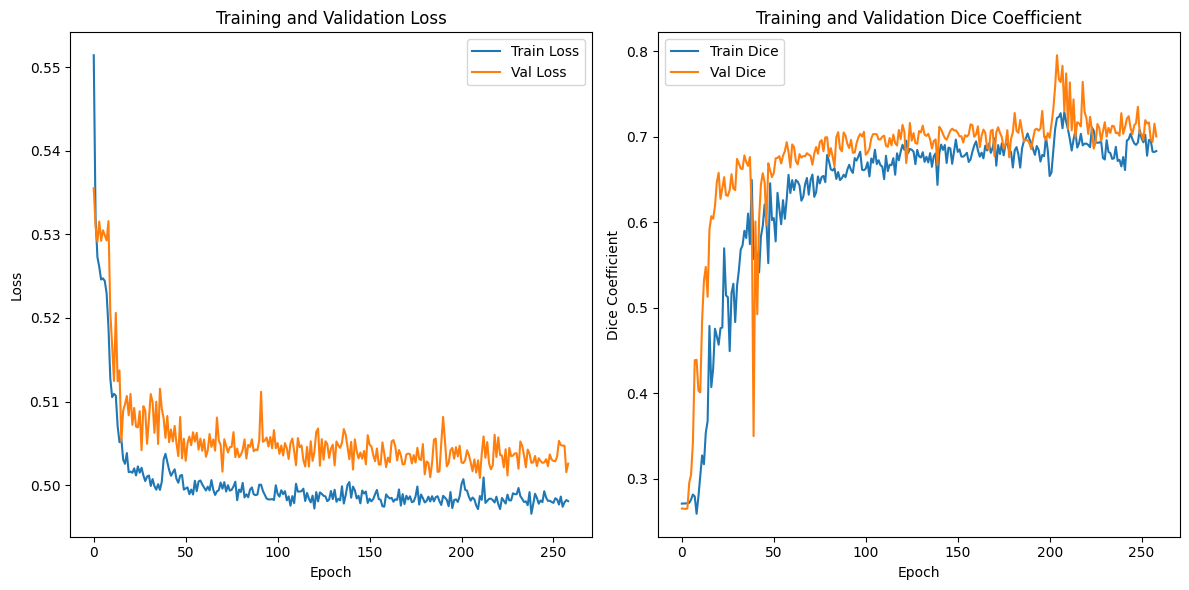

In [ ]:


# Initialize weights using He initialization
def init_weights(m):
    if isinstance(m, nn.Conv2d):
        nn.init.kaiming_normal_(m.weight, nonlinearity='relu')

model.apply(init_weights)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Focal Loss for class imbalance
class FocalLoss(nn.Module):
    def __init__(self, alpha=1, gamma=2):
        super(FocalLoss, self).__init__()
        self.alpha = alpha
        self.gamma = gamma

    def forward(self, inputs, targets):
        BCE_loss = nn.BCEWithLogitsLoss()(inputs, targets)
        pt = torch.exp(-BCE_loss)
        F_loss = self.alpha * (1 - pt) ** self.gamma * BCE_loss
        return F_loss


# Dice coefficient function
def dice_coefficient(preds, masks, smooth=1):
    preds = torch.sigmoid(preds) > 0.5  # Threshold predictions at 0.5
    preds = preds.float()
    masks = masks.float()
    intersection = (preds * masks).sum(dim=[1, 2])
    dice = (2. * intersection + smooth) / (preds.sum(dim=[1, 2]) + masks.sum(dim=[1, 2]) + smooth)
    return dice.mean()

# Dice loss
def dice_loss(preds, masks, smooth=1):
    intersection = (preds * masks).sum()
    dice = (2. * intersection + smooth) / (preds.sum() + masks.sum() + smooth)
    return 1 - dice

# Combined BCE and Dice loss with Focal Loss
def combined_loss(preds, masks, bce_weight=0.3):
    bce = FocalLoss()(preds, masks)
    dice = dice_loss(torch.sigmoid(preds), masks)
    return bce * bce_weight + dice * (1 - bce_weight)


# Define optimizer with weight decay (L2 regularization)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-5)  # Weight decay added
#scheduler = ReduceLROnPlateau(optimizer, mode='min', patience=2, factor=0.5, verbose=True)
# gives better results
scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr=1e-3, steps_per_epoch=len(train_loader), epochs=500)


# Early stopping parameters
patience = 50
best_val_loss = float('inf')
best_train_dice = float('-inf')  # Initialize for best training dice score
patience_counter = 0

# Store losses and metrics for visualization
train_losses = []
val_losses = []
train_dice_scores = []
val_dice_scores = []


# Training loop
epochs = 500
for epoch in range(epochs):
    model.train()
    train_loss = 0
    train_dice = 0
    num_train_samples = 0  # Initialize for normalizing across all examples
    for images, masks in train_loader:
        images = images.to(device).float()
        masks = masks.to(device).float()

        # Forward pass
        outputs = model(images)
        loss = combined_loss(outputs, masks)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Track the number of examples
        batch_size = images.size(0)
        num_train_samples += batch_size

        # Accumulate loss and dice score
        train_loss += loss.item() * batch_size  # Multiply by batch size for proper normalization
        train_dice += dice_coefficient(outputs, masks).item() * batch_size

    # Validation loop
    model.eval()
    val_loss = 0
    val_dice = 0
    num_val_samples = 0  # Initialize for normalizing across all validation examples
    with torch.no_grad():
        for images, masks in val_loader:
            images = images.to(device).float()
            masks = masks.to(device).float()
            outputs = model(images)
            batch_size = images.size(0)
            num_val_samples += batch_size

            val_loss += combined_loss(outputs, masks).item() * batch_size  # Multiply by batch size
            val_dice += dice_coefficient(outputs, masks).item() * batch_size

    # Average loss and dice score per epoch normalized by the number of samples
    train_loss /= num_train_samples  # Normalize over total number of training examples
    val_loss /= num_val_samples  # Normalize over total number of validation examples
    train_dice /= num_train_samples
    val_dice /= num_val_samples

    # Store losses and dice scores for visualization
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_dice_scores.append(train_dice)
    val_dice_scores.append(val_dice)

    print(f'Epoch [{epoch+1}/{epochs}], Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Train Dice: {train_dice:.4f}, Val Dice: {val_dice:.4f}')

    # Early stopping based on training dice
    if train_dice > best_train_dice:
        best_train_dice = train_dice
        torch.save(model.state_dict(), '/content/drive/MyDrive/CellSeg/unet++_224_model_500epochs_augmentations.pth')
        patience_counter = 0
    else:
        patience_counter += 1

    if patience_counter >= patience:
        print("Early stopping triggered based on training dice!")
        break

    # Step scheduler
    scheduler.step(val_loss)

# Plot losses and dice scores
plt.figure(figsize=(12, 6))

# Plot losses
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plot dice scores
plt.subplot(1, 2, 2)
plt.plot(train_dice_scores, label='Train Dice')
plt.plot(val_dice_scores, label='Val Dice')
plt.xlabel('Epoch')
plt.ylabel('Dice Coefficient')
plt.title('Training and Validation Dice Coefficient')
plt.legend()

plt.tight_layout()
plt.show()


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 5. Evaluation Metrics

In [ ]:
import os
import numpy as np
from skimage.io import imread, imsave
from skimage import exposure  # For contrast enhancement
from skimage.transform import resize
from torch.utils.data import DataLoader, Dataset
import torch
from torchvision import transforms

# Set your test paths
test_path = '/content/drive/MyDrive/CellSeg/Preprocessed_Test_Images/'
gt_mask_path = '/content/drive/MyDrive/CellSeg/Preprocessed_Test_Masks/'  # Ground truth masks folder
predicted_mask_dir = '/content/drive/MyDrive/CellSeg/Predicted_Masks/'  # Directory to save predicted masks as PNGs
model_path = '/content/drive/MyDrive/CellSeg/unet++_224_model_500epochs_augmentations.pth'

# Create directory to save predicted masks if it doesn't exist
os.makedirs(predicted_mask_dir, exist_ok=True)

# Load the trained model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = UNetPlusPlus(in_channels=3, out_channels=1).to(device)
model.load_state_dict(torch.load(model_path, map_location=device))
model.eval()

# Custom dataset for test images
class TestDataset(Dataset):
    def __init__(self, img_dir, transform=None):
        self.img_dir = img_dir
        # Extract image IDs by removing '_pp_enhanced.png' from each filename
        self.image_ids = sorted([file.replace('_pp_enhanced.png', '') for file in os.listdir(img_dir) if file.endswith('_pp_enhanced.png')])
        self.transform = transform

    def __len__(self):
        return len(self.image_ids)

    def __getitem__(self, idx):
        image_id = self.image_ids[idx]
        img_path = os.path.join(self.img_dir, f"{image_id}_pp_enhanced.png")
        print(f"Loading image: {img_path}")  # Debugging: Confirm the correct image path
        image = imread(img_path).astype(np.float32) / 255.0  # Normalize to [0, 1]

        if self.transform:
            image = self.transform(image)

        return image, image_id

# Define a transformation for the test data
test_transform = transforms.Compose([
    transforms.ToTensor(),  # Converts numpy array to tensor
    transforms.ConvertImageDtype(torch.float32)  # Ensures the image is in float32
])

# DataLoader for test data
test_dataset = TestDataset(test_path, transform=test_transform)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

# Function to calculate Dice coefficient
def dice_coefficient(pred_mask, gt_mask, smooth=1):
    # Ensure the masks are binary (0 or 1)
    pred_mask = (pred_mask > 0.5).astype(np.uint8)  # Threshold the predicted mask
    gt_mask = (gt_mask > 0.5).astype(np.uint8)      # Ensure ground truth mask is binary

    # Calculate intersection and Dice score
    intersection = np.sum(pred_mask * gt_mask)
    return (2. * intersection + smooth) / (np.sum(pred_mask) + np.sum(gt_mask) + smooth)

# Initialize an empty list to store Dice scores
dice_scores = []

# In the prediction loop, after resizing the predicted mask:
for images, image_ids in test_loader:
    images = images.to(device)

    # Make prediction
    with torch.no_grad():
        outputs = model(images)
        predicted_mask = torch.sigmoid(outputs).squeeze().cpu().numpy()

        # Ensure predicted mask is binary
        predicted_mask = (predicted_mask > 0.5).astype(np.uint8)  # Threshold to binary

    image_id = image_ids[0]
    print(f"Processing image ID: {image_id}")  # Debugging: Confirm current image_id

    # Load ground truth mask
    gt_mask_path_full = os.path.join(gt_mask_path, f"{image_id}_mask.png")
    gt_mask = imread(gt_mask_path_full).astype(np.uint8)

    print(f"Loaded ground truth mask for image ID: {image_id}")

    # Ensure the resized predicted mask is binary
    predicted_mask = (predicted_mask > 0.5).astype(np.uint8)

    # Calculate Dice coefficient
    dice_score = dice_coefficient(predicted_mask, gt_mask)

    # Append the dice_score to the list
    dice_scores.append(dice_score)  # FIXED: append to the dice_scores list, not dice_score itself
    print(f"Image ID {image_id}: Dice Score = {dice_score:.4f}")  # Debugging

    # Save the predicted mask as PNG
    save_path = os.path.join(predicted_mask_dir, f"{image_id}_predicted_mask.png")
    imsave(save_path, (predicted_mask * 255).astype(np.uint8))  # Save as uint8
    print(f"Saved predicted mask for image ID {image_id} at {save_path}")  # Debugging

# Calculate and print the mean Dice score
mean_dice_score = np.mean(dice_scores)
print(f"Mean Dice Score on Test Set: {mean_dice_score:.4f}")


<ipython-input-20-6b91ac7827ef>:22: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path, map_location=device))


Loading image: /content/drive/MyDrive/CellSeg/Preprocessed_Test_Images/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_pp_enhanced.png
Processing image ID: 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1
Loaded ground truth mask for image ID: 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1
Image ID 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1: Dice Score = 0.8968
Saved predicted mask for image ID 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1 at /content/drive/MyDrive/CellSeg/Predicted_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_predicted_mask.png
Loading image: /content/drive/MyDrive/CellSeg/Preprocessed_Test_Images/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_pp_enhanced.png
Processing image ID: 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e
Loaded ground truth mask for image ID: 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530

### Mask has all nuclei in one image

Save dice and iou into a .csv file --> without attention

In [ ]:
import csv

# Function to calculate IoU
def iou_coefficient(pred_mask, gt_mask, smooth=1e-5):
    pred_mask = (pred_mask > 0.5).astype(np.uint8)
    gt_mask = (gt_mask > 0.5).astype(np.uint8)
    intersection = np.sum(pred_mask * gt_mask)
    union = np.sum(pred_mask) + np.sum(gt_mask) - intersection
    return (intersection + smooth) / (union + smooth)

# Initialize lists to store results
dice_scores = []
iou_scores = []
image_ids_list = []

# In the prediction loop, after resizing the predicted mask:
for images, image_ids in test_loader:
    images = images.to(device)

    # Make prediction
    with torch.no_grad():
        outputs = model(images)
        predicted_mask = torch.sigmoid(outputs).squeeze().cpu().numpy()

        # Ensure predicted mask is binary
        predicted_mask = (predicted_mask > 0.5).astype(np.uint8)  # Threshold to binary

    image_id = image_ids[0]
    print(f"Processing image ID: {image_id}")  # Debugging: Confirm current image_id

    # Load ground truth mask
    gt_mask_path_full = os.path.join(gt_mask_path, f"{image_id}_mask.png")
    gt_mask = imread(gt_mask_path_full).astype(np.uint8)

    print(f"Loaded ground truth mask for image ID: {image_id}")

    # Ensure the resized predicted mask is binary
    predicted_mask = (predicted_mask > 0.5).astype(np.uint8)

    # Calculate Dice coefficient
    dice_score = dice_coefficient(predicted_mask, gt_mask)

    # Calculate IoU
    iou_score = iou_coefficient(predicted_mask, gt_mask)

    # Append results to the lists
    dice_scores.append(dice_score)
    iou_scores.append(iou_score)
    image_ids_list.append(image_id)

    print(f"Image ID {image_id}: Dice Score = {dice_score:.4f}, IoU = {iou_score:.4f}")  # Debugging

    # Save the predicted mask as PNG
    save_path = os.path.join(predicted_mask_dir, f"{image_id}_predicted_mask.png")
    imsave(save_path, (predicted_mask * 255).astype(np.uint8))  # Save as uint8
    print(f"Saved predicted mask for image ID {image_id} at {save_path}")  # Debugging

# Calculate and print the mean Dice and IoU scores
mean_dice_score = np.mean(dice_scores)
mean_iou_score = np.mean(iou_scores)
print(f"Mean Dice Score on Test Set: {mean_dice_score:.4f}")
print(f"Mean IoU Score on Test Set: {mean_iou_score:.4f}")

# Save results into a CSV file
csv_filename = '/content/drive/MyDrive/CellSeg/dice_iou_scores.csv'
os.makedirs('/content/drive/MyDrive/CellSeg/', exist_ok=True)

with open(csv_filename, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["Image ID", "Dice Score", "IoU Score"])  # Write the header
    for i in range(len(image_ids_list)):
        writer.writerow([image_ids_list[i], dice_scores[i], iou_scores[i]])  # Write each row of results

print(f"Results saved to {csv_filename}")


Loading image: /content/drive/MyDrive/CellSeg/Preprocessed_Test_Images/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_pp_enhanced.png
Processing image ID: 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1
Loaded ground truth mask for image ID: 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1
Image ID 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1: Dice Score = 0.8968, IoU = 0.8129
Saved predicted mask for image ID 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1 at /content/drive/MyDrive/CellSeg/Predicted_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_predicted_mask.png
Loading image: /content/drive/MyDrive/CellSeg/Preprocessed_Test_Images/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_pp_enhanced.png
Processing image ID: 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e
Loaded ground truth mask for image ID: 00ae65c1c6631ae6f2be1a449902976e6eb8483

### One image per nucleus modified well structured. It iterates the directory of singled mask

In [ ]:
import csv
from skimage.measure import label, regionprops
import os
import numpy as np
import torch
from skimage.io import imread, imsave

# Function to calculate IoU
def iou_coefficient(pred_mask, gt_mask, smooth=1e-5):
    pred_mask = (pred_mask > 0.5).astype(np.uint8)
    gt_mask = (gt_mask > 0.5).astype(np.uint8)
    intersection = np.sum(pred_mask * gt_mask)
    union = np.sum(pred_mask) + np.sum(gt_mask) - intersection
    return (intersection + smooth) / (union + smooth)

# Initialize lists to store results
dice_scores = []
iou_scores = []
image_ids_list = []

# Directory to save individual nucleus masks
single_nucleus_mask_dir = '/content/drive/MyDrive/CellSeg/Single_Nucleus_Masks/'
os.makedirs(single_nucleus_mask_dir, exist_ok=True)

# In the prediction loop, after resizing the predicted mask:
for images, image_ids in test_loader:
    images = images.to(device)

    # Make prediction
    with torch.no_grad():
        outputs = model(images)
        predicted_mask = torch.sigmoid(outputs).squeeze().cpu().numpy()

        # Ensure predicted mask is binary
        predicted_mask = (predicted_mask > 0.5).astype(np.uint8)  # Threshold to binary

    image_id = image_ids[0]
    print(f"Processing image ID: {image_id}")  # Debugging: Confirm current image_id

    # Load ground truth mask
    gt_mask_path_full = os.path.join(gt_mask_path, f"{image_id}_mask.png")
    gt_mask = imread(gt_mask_path_full).astype(np.uint8)

    print(f"Loaded ground truth mask for image ID: {image_id}")

    # Ensure the resized predicted mask is binary
    predicted_mask = (predicted_mask > 0.5).astype(np.uint8)

    # Calculate Dice coefficient
    dice_score = dice_coefficient(predicted_mask, gt_mask)

    # Calculate IoU
    iou_score = iou_coefficient(predicted_mask, gt_mask)

    # Append results to the lists
    dice_scores.append(dice_score)
    iou_scores.append(iou_score)
    image_ids_list.append(image_id)

    print(f"Image ID {image_id}: Dice Score = {dice_score:.4f}, IoU = {iou_score:.4f}")  # Debugging

    # Save the predicted mask as PNG
    save_path = os.path.join(predicted_mask_dir, f"{image_id}_predicted_mask.png")
    imsave(save_path, (predicted_mask * 255).astype(np.uint8))  # Save as uint8
    print(f"Saved predicted mask for image ID {image_id} at {save_path}")  # Debugging

    # ------------------ Additional code to save individual nucleus masks ------------------ #

    # Label connected components in the predicted mask
    labeled_mask = label(predicted_mask)

    # Iterate over each nucleus and save each as a separate mask
    for region in regionprops(labeled_mask):
        # Create an empty mask for each nucleus
        single_nucleus_mask = np.zeros_like(predicted_mask, dtype=np.uint8)

        # Set pixels of the current region (nucleus) to 1 in the mask
        single_nucleus_mask[labeled_mask == region.label] = 1

        # Define path to save individual nucleus mask
        nucleus_save_path = os.path.join(single_nucleus_mask_dir, f"{image_id}_nucleus_{region.label}.png")

        # Save the single nucleus mask
        imsave(nucleus_save_path, (single_nucleus_mask * 255).astype(np.uint8))
        print(f"Saved individual nucleus mask for image ID {image_id}, Nucleus {region.label} at {nucleus_save_path}")

# Calculate and print the mean Dice and IoU scores
mean_dice_score = np.mean(dice_scores)
mean_iou_score = np.mean(iou_scores)
print(f"Mean Dice Score on Test Set: {mean_dice_score:.4f}")
print(f"Mean IoU Score on Test Set: {mean_iou_score:.4f}")

# Save results into a CSV file
csv_filename = '/content/drive/MyDrive/CellSeg/dice_iou_scores.csv'
os.makedirs('/content/drive/MyDrive/CellSeg/', exist_ok=True)

with open(csv_filename, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["Image ID", "Dice Score", "IoU Score"])  # Write the header
    for i in range(len(image_ids_list)):
        writer.writerow([image_ids_list[i], dice_scores[i], iou_scores[i]])  # Write each row of results

print(f"Results saved to {csv_filename}")


### One image per nucleus

In [ ]:
import os
import numpy as np
from skimage.io import imread, imsave
from skimage import exposure, measure  # For contrast enhancement and labeling connected components
from skimage.transform import resize
from skimage.filters import threshold_otsu
from skimage.morphology import disk, remove_small_objects, binary_opening, binary_closing
from skimage.segmentation import watershed  # Correct import for watershed
from scipy import ndimage as ndi  # Import binary_fill_holes from here
import torch
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms

# Set your test paths
test_path = '/content/drive/MyDrive/CellSeg/Preprocessed_Test_Images/'
predicted_mask_dir = '/content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/'  # Directory to save predicted instance masks
model_path = '/content/drive/MyDrive/CellSeg/unet++_224_model_500epochs.pth'

# Create directory to save predicted masks if it doesn't exist
os.makedirs(predicted_mask_dir, exist_ok=True)

# Load the trained model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = UNetPlusPlus(in_channels=3, out_channels=1).to(device)
model.load_state_dict(torch.load(model_path, map_location=device))
model.eval()

# Custom dataset for test images
class TestDataset(Dataset):
    def __init__(self, img_dir, transform=None):
        self.img_dir = img_dir
        self.image_ids = sorted([file.replace('_pp_enhanced.png', '') for file in os.listdir(img_dir) if file.endswith('_pp_enhanced.png')])
        self.transform = transform

    def __len__(self):
        return len(self.image_ids)

    def __getitem__(self, idx):
        image_id = self.image_ids[idx]
        img_path = os.path.join(self.img_dir, f"{image_id}_pp_enhanced.png")
        image = imread(img_path).astype(np.float32) / 255.0  # Normalize to [0, 1]
        if self.transform:
            image = self.transform(image)
        return image, image_id

# Define a transformation for the test data
test_transform = transforms.Compose([
    transforms.ToTensor(),  # Converts numpy array to tensor
    transforms.ConvertImageDtype(torch.float32)  # Ensures the image is in float32
])

# DataLoader for test data
test_dataset = TestDataset(test_path, transform=test_transform)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

def post_process_instance_segmentation(binary_mask):
    """Apply post-processing to turn binary mask into instance segmentation."""

    # Step 1: Thresholding - If Otsu's method is too aggressive, try other thresholds or manual tuning
    threshold = threshold_otsu(binary_mask)
    binary_mask = binary_mask > threshold  # Binarize using Otsu threshold

    # Optional: Adaptive thresholding or manual thresholding can be applied here if necessary
    # binary_mask = binary_mask > 0.5  # Example of manual thresholding

    # Step 2: Fill holes and apply morphological operations for cleaning
    cleaned_mask = ndi.binary_fill_holes(binary_mask)  # Fill holes in the binary mask

    # Increase the structuring element size to better handle gaps and noise
    cleaned_mask = binary_closing(cleaned_mask, footprint=disk(5))  # Closing with a larger structuring element
    cleaned_mask = binary_opening(cleaned_mask, footprint=disk(3))  # Add opening to remove small artifacts

    # Step 3: Remove small objects based on size threshold
    cleaned_mask = remove_small_objects(cleaned_mask, min_size=50)  # Adjust min_size based on dataset

    # Step 4: Apply distance transform
    distance = ndi.distance_transform_edt(cleaned_mask)  # Compute distance transform

    # Optionally, you can visualize the distance transform for debugging purposes
    # import matplotlib.pyplot as plt
    # plt.imshow(distance, cmap='jet')
    # plt.show()

    # Step 5: Detect local maxima to use as markers for the watershed algorithm
    local_maxi = measure.label(ndi.maximum_filter(distance, size=5))  # Increase filter size to detect better markers

    # Optional: Use the peak_local_max function for more refined marker detection
    #from skimage.feature import peak_local_max
    #local_maxi = peak_local_max(distance, indices=False, footprint=np.ones((3, 3)), labels=cleaned_mask)
    #markers = ndi.label(local_maxi)[0]

    # Step 6: Apply watershed algorithm
    labels = watershed(-distance, local_maxi, mask=cleaned_mask)

    # Return labeled instance mask where each nucleus is a separate label
    return labels


# Main loop for test-time prediction and saving individual masks
for images, image_ids in test_loader:
    images = images.to(device)

    # Make prediction
    with torch.no_grad():
        outputs = model(images)
        predicted_mask = torch.sigmoid(outputs).squeeze().cpu().numpy()
        predicted_mask = (predicted_mask > 0.5).astype(np.uint8)  # Threshold to binary

    image_id = image_ids[0]
    print(f"Processing image ID: {image_id}")

    # Apply post-processing to generate instance masks
    instance_labels = post_process_instance_segmentation(predicted_mask)

    # Save each nucleus as a separate mask
    for nucleus_id in range(1, instance_labels.max() + 1):
        individual_nucleus_mask = (instance_labels == nucleus_id).astype(np.uint8)  # Extract individual nucleus
        save_path = os.path.join(predicted_mask_dir, f"{image_id}_nucleus_{nucleus_id}.png")
        imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image
        print(f"Saved nucleus {nucleus_id} mask for image ID {image_id} at {save_path}")


<ipython-input-22-f8a28c88f31a>:25: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path, map_location=device))


Processing image ID: 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_1.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 1 mask for image ID 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_1.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_2.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 2 mask for image ID 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_2.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_3.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 3 mask for image ID 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_3.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_4.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 4 mask for image ID 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_4.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_5.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 5 mask for image ID 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_5.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_6.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 6 mask for image ID 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_6.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_7.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 7 mask for image ID 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_7.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_8.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 8 mask for image ID 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_8.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_9.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 9 mask for image ID 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_9.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_10.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 10 mask for image ID 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_10.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_11.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 11 mask for image ID 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_11.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_12.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 12 mask for image ID 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_12.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_13.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 13 mask for image ID 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_13.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_14.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 14 mask for image ID 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_14.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_15.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 15 mask for image ID 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_15.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_16.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 16 mask for image ID 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_16.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_17.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 17 mask for image ID 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_17.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_18.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 18 mask for image ID 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_18.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_19.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 19 mask for image ID 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_19.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_20.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 20 mask for image ID 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_20.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_21.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 21 mask for image ID 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_21.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_22.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 22 mask for image ID 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_22.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_23.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 23 mask for image ID 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_23.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_24.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 24 mask for image ID 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_24.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_25.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 25 mask for image ID 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_25.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_26.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 26 mask for image ID 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_26.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_27.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 27 mask for image ID 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_27.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_28.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 28 mask for image ID 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_28.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_29.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 29 mask for image ID 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_29.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_30.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 30 mask for image ID 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_30.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_31.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 31 mask for image ID 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_31.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_32.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 32 mask for image ID 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_32.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_33.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 33 mask for image ID 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_33.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_34.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 34 mask for image ID 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_34.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_35.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 35 mask for image ID 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_35.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_36.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 36 mask for image ID 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_36.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_37.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 37 mask for image ID 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_37.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_38.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 38 mask for image ID 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_38.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_39.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 39 mask for image ID 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_39.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_40.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 40 mask for image ID 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_40.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_41.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 41 mask for image ID 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_41.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_42.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 42 mask for image ID 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_42.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_43.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 43 mask for image ID 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_43.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_44.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 44 mask for image ID 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_44.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_45.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 45 mask for image ID 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_45.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_46.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 46 mask for image ID 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_46.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_47.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 47 mask for image ID 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_47.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_48.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 48 mask for image ID 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_48.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_49.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 49 mask for image ID 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_49.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_50.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 50 mask for image ID 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_50.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_51.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 51 mask for image ID 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_51.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_52.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 52 mask for image ID 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_52.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_53.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 53 mask for image ID 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_53.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_54.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 54 mask for image ID 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_54.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_55.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 55 mask for image ID 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_55.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_56.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 56 mask for image ID 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_56.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_57.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 57 mask for image ID 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_57.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_58.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 58 mask for image ID 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_58.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_59.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 59 mask for image ID 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_59.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_60.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 60 mask for image ID 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_60.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_61.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 61 mask for image ID 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_61.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_62.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 62 mask for image ID 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_62.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_63.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 63 mask for image ID 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_63.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_64.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 64 mask for image ID 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_64.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_65.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 65 mask for image ID 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_65.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_66.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 66 mask for image ID 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_66.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_67.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 67 mask for image ID 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_67.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_68.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 68 mask for image ID 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_68.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_69.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 69 mask for image ID 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_69.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_70.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 70 mask for image ID 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_70.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_71.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 71 mask for image ID 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_71.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_72.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 72 mask for image ID 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_72.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_73.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 73 mask for image ID 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_73.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_74.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 74 mask for image ID 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_74.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_75.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 75 mask for image ID 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_75.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_76.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 76 mask for image ID 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_76.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_77.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 77 mask for image ID 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_77.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_78.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 78 mask for image ID 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_78.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_79.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 79 mask for image ID 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_79.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_80.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 80 mask for image ID 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_80.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_81.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 81 mask for image ID 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_81.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_82.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 82 mask for image ID 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_82.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_83.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 83 mask for image ID 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_83.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_84.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 84 mask for image ID 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_84.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_85.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 85 mask for image ID 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_85.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_86.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 86 mask for image ID 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_86.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_87.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 87 mask for image ID 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_87.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_88.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 88 mask for image ID 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_88.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_89.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 89 mask for image ID 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_89.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_90.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 90 mask for image ID 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_90.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_91.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 91 mask for image ID 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_91.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_92.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 92 mask for image ID 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_92.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_93.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 93 mask for image ID 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_93.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_94.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 94 mask for image ID 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_94.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_95.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 95 mask for image ID 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_95.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_96.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 96 mask for image ID 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_96.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_97.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 97 mask for image ID 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_97.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_98.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 98 mask for image ID 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_98.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_99.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 99 mask for image ID 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_99.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_100.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 100 mask for image ID 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_100.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_101.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 101 mask for image ID 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_101.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_102.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 102 mask for image ID 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_102.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_103.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 103 mask for image ID 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_103.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_104.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 104 mask for image ID 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_104.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_105.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 105 mask for image ID 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_105.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_106.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 106 mask for image ID 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_106.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_107.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 107 mask for image ID 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_107.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_108.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 108 mask for image ID 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_108.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_109.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 109 mask for image ID 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_109.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_110.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 110 mask for image ID 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_110.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_111.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 111 mask for image ID 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_111.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_112.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 112 mask for image ID 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_112.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_113.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 113 mask for image ID 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_113.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_114.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 114 mask for image ID 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_114.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_115.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 115 mask for image ID 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_115.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_116.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 116 mask for image ID 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_116.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_117.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 117 mask for image ID 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_117.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_118.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 118 mask for image ID 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_118.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_119.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 119 mask for image ID 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_119.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_120.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 120 mask for image ID 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_120.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_121.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 121 mask for image ID 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_121.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_122.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 122 mask for image ID 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_122.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_123.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 123 mask for image ID 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_123.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_124.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 124 mask for image ID 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_124.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_125.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 125 mask for image ID 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_125.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_126.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 126 mask for image ID 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_126.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_127.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 127 mask for image ID 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_127.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_128.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 128 mask for image ID 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_128.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_129.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 129 mask for image ID 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_129.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_130.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 130 mask for image ID 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_130.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_131.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 131 mask for image ID 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_131.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_132.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 132 mask for image ID 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_132.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_133.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 133 mask for image ID 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_133.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_134.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 134 mask for image ID 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_134.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_135.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 135 mask for image ID 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_135.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_136.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 136 mask for image ID 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_136.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_137.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 137 mask for image ID 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_137.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_138.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 138 mask for image ID 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_138.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_139.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 139 mask for image ID 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_139.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_140.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 140 mask for image ID 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_140.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_141.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 141 mask for image ID 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_141.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_142.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 142 mask for image ID 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_142.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_143.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 143 mask for image ID 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_143.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_144.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 144 mask for image ID 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_144.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_145.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 145 mask for image ID 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_145.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_146.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 146 mask for image ID 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_146.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_147.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 147 mask for image ID 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_147.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_148.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 148 mask for image ID 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_148.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_149.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 149 mask for image ID 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_149.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_150.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 150 mask for image ID 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_150.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_151.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 151 mask for image ID 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_151.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_152.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 152 mask for image ID 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_152.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_153.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 153 mask for image ID 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_153.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_154.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 154 mask for image ID 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_154.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_155.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 155 mask for image ID 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_155.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_156.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 156 mask for image ID 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_156.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_157.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 157 mask for image ID 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_157.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_158.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 158 mask for image ID 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_158.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_159.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 159 mask for image ID 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_159.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_160.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 160 mask for image ID 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_160.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_161.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 161 mask for image ID 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_161.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_162.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 162 mask for image ID 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_162.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_163.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 163 mask for image ID 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_163.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_164.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 164 mask for image ID 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_164.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_165.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 165 mask for image ID 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_165.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_166.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 166 mask for image ID 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1_nucleus_166.png
Processing image ID: 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_1.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 1 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_1.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_2.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 2 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_2.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_3.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 3 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_3.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_4.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 4 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_4.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_5.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 5 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_5.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_6.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 6 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_6.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_7.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 7 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_7.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_8.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 8 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_8.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_9.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 9 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_9.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_10.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 10 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_10.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_11.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 11 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_11.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_12.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 12 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_12.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_13.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 13 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_13.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_14.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 14 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_14.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_15.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 15 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_15.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_16.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 16 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_16.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_17.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 17 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_17.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_18.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 18 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_18.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_19.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 19 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_19.png
Saved nucleus 20 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_20.png
Saved nucleus 21 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_21.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_22.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 22 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_22.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_23.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 23 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_23.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_24.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 24 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_24.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_25.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 25 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_25.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_26.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 26 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_26.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_27.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 27 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_27.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_28.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 28 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_28.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_29.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 29 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_29.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_30.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 30 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_30.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_31.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 31 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_31.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_32.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 32 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_32.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_33.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 33 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_33.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_34.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 34 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_34.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_35.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 35 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_35.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_36.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 36 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_36.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_37.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 37 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_37.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_38.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 38 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_38.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_39.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 39 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_39.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_40.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 40 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_40.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_41.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 41 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_41.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_42.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 42 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_42.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_43.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 43 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_43.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_44.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 44 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_44.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_45.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 45 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_45.png
Saved nucleus 46 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_46.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_47.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 47 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_47.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_48.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 48 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_48.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_49.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 49 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_49.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_50.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 50 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_50.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_51.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 51 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_51.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_52.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 52 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_52.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_53.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 53 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_53.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_54.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 54 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_54.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_55.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 55 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_55.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_56.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 56 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_56.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_57.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 57 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_57.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_58.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 58 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_58.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_59.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 59 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_59.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_60.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 60 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_60.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_61.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 61 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_61.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_62.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 62 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_62.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_63.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 63 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_63.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_64.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 64 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_64.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_65.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 65 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_65.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_66.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 66 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_66.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_67.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 67 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_67.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_68.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 68 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_68.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_69.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 69 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_69.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_70.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 70 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_70.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_71.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 71 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_71.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_72.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 72 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_72.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_73.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 73 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_73.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_74.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 74 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_74.png
Saved nucleus 75 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_75.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_76.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 76 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_76.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_77.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 77 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_77.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_78.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 78 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_78.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_79.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 79 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_79.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_80.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 80 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_80.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_81.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 81 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_81.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_82.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 82 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_82.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_83.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 83 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_83.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_84.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 84 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_84.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_85.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 85 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_85.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_86.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 86 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_86.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_87.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 87 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_87.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_88.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 88 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_88.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_89.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 89 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_89.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_90.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 90 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_90.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_91.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 91 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_91.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_92.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 92 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_92.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_93.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 93 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_93.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_94.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 94 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_94.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_95.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 95 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_95.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_96.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 96 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_96.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_97.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 97 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_97.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_98.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 98 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_98.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_99.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 99 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_99.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_100.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 100 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_100.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_101.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 101 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_101.png
Saved nucleus 102 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_102.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_103.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 103 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_103.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_104.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 104 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_104.png
Saved nucleus 105 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_105.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_106.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 106 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_106.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_107.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 107 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_107.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_108.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 108 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_108.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_109.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 109 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_109.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_110.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 110 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_110.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_111.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 111 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_111.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_112.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 112 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_112.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_113.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 113 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_113.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_114.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 114 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_114.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_115.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 115 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_115.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_116.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 116 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_116.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_117.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 117 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_117.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_118.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 118 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_118.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_119.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 119 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_119.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_120.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 120 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_120.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_121.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 121 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_121.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_122.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 122 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_122.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_123.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 123 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_123.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_124.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 124 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_124.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_125.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 125 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_125.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_126.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 126 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_126.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_127.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 127 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_127.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_128.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 128 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_128.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_129.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 129 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_129.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_130.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 130 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_130.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_131.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 131 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_131.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_132.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 132 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_132.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_133.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 133 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_133.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_134.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 134 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_134.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_135.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 135 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_135.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_136.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 136 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_136.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_137.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 137 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_137.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_138.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 138 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_138.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_139.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 139 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_139.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_140.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 140 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_140.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_141.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 141 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_141.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_142.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 142 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_142.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_143.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 143 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_143.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_144.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 144 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_144.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_145.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 145 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_145.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_146.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 146 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_146.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_147.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 147 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_147.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_148.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 148 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_148.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_149.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 149 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_149.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_150.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 150 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_150.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_151.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 151 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_151.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_152.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 152 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_152.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_153.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 153 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_153.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_154.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 154 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_154.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_155.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 155 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_155.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_156.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 156 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_156.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_157.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 157 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_157.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_158.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 158 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_158.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_159.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 159 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_159.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_160.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 160 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_160.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_161.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 161 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_161.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_162.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 162 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_162.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_163.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 163 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_163.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_164.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 164 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_164.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_165.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 165 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_165.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_166.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 166 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_166.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_167.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 167 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_167.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_168.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 168 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_168.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_169.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 169 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_169.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_170.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 170 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_170.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_171.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 171 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_171.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_172.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 172 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_172.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_173.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 173 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_173.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_174.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 174 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_174.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_175.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 175 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_175.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_176.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 176 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_176.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_177.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 177 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_177.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_178.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 178 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_178.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_179.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 179 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_179.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_180.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 180 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_180.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_181.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 181 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_181.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_182.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 182 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_182.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_183.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 183 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_183.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_184.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 184 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_184.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_185.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 185 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_185.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_186.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 186 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_186.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_187.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 187 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_187.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_188.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 188 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_188.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_189.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 189 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_189.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_190.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 190 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_190.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_191.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 191 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_191.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_192.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 192 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_192.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_193.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 193 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_193.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_194.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 194 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_194.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_195.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 195 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_195.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_196.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 196 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_196.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_197.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 197 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_197.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_198.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 198 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_198.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_199.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 199 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_199.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_200.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 200 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_200.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_201.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 201 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_201.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_202.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 202 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_202.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_203.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 203 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_203.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_204.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 204 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_204.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_205.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 205 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_205.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_206.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 206 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_206.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_207.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 207 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_207.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_208.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 208 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_208.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_209.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 209 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_209.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_210.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 210 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_210.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_211.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 211 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_211.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_212.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 212 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_212.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_213.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 213 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_213.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_214.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 214 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_214.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_215.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 215 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_215.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_216.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 216 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_216.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_217.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 217 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_217.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_218.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 218 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_218.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_219.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 219 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_219.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_220.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 220 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_220.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_221.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 221 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_221.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_222.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 222 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_222.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_223.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 223 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_223.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_224.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 224 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_224.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_225.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 225 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_225.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_226.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 226 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_226.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_227.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 227 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_227.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_228.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 228 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_228.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_229.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 229 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_229.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_230.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 230 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_230.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_231.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 231 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_231.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_232.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 232 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_232.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_233.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 233 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_233.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_234.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 234 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_234.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_235.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 235 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_235.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_236.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 236 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_236.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_237.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 237 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_237.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_238.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 238 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_238.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_239.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 239 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_239.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_240.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 240 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_240.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_241.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 241 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_241.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_242.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 242 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_242.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_243.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 243 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_243.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_244.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 244 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_244.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_245.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 245 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_245.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_246.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 246 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_246.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_247.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 247 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_247.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_248.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 248 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_248.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_249.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 249 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_249.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_250.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 250 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_250.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_251.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 251 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_251.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_252.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 252 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_252.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_253.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 253 mask for image ID 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_nucleus_253.png
Processing image ID: 01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf_nucleus_1.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 1 mask for image ID 01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf_nucleus_1.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf_nucleus_2.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 2 mask for image ID 01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf_nucleus_2.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf_nucleus_3.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 3 mask for image ID 01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf_nucleus_3.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf_nucleus_4.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 4 mask for image ID 01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf_nucleus_4.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf_nucleus_5.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 5 mask for image ID 01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf_nucleus_5.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf_nucleus_6.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 6 mask for image ID 01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf_nucleus_6.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf_nucleus_7.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 7 mask for image ID 01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf_nucleus_7.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf_nucleus_8.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 8 mask for image ID 01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf_nucleus_8.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf_nucleus_9.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 9 mask for image ID 01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf_nucleus_9.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf_nucleus_10.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 10 mask for image ID 01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf_nucleus_10.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf_nucleus_11.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 11 mask for image ID 01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf_nucleus_11.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf_nucleus_12.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 12 mask for image ID 01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf_nucleus_12.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf_nucleus_13.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 13 mask for image ID 01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf_nucleus_13.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf_nucleus_14.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 14 mask for image ID 01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf_nucleus_14.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf_nucleus_15.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 15 mask for image ID 01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf_nucleus_15.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf_nucleus_16.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 16 mask for image ID 01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf_nucleus_16.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf_nucleus_17.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 17 mask for image ID 01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf_nucleus_17.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf_nucleus_18.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 18 mask for image ID 01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf_nucleus_18.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf_nucleus_19.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 19 mask for image ID 01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf_nucleus_19.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf_nucleus_20.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 20 mask for image ID 01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf_nucleus_20.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf_nucleus_21.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 21 mask for image ID 01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf_nucleus_21.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf_nucleus_22.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 22 mask for image ID 01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf_nucleus_22.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf_nucleus_23.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 23 mask for image ID 01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf_nucleus_23.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf_nucleus_24.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 24 mask for image ID 01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf_nucleus_24.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf_nucleus_25.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 25 mask for image ID 01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf_nucleus_25.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf_nucleus_26.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 26 mask for image ID 01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf_nucleus_26.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf_nucleus_27.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 27 mask for image ID 01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf_nucleus_27.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf_nucleus_28.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 28 mask for image ID 01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf_nucleus_28.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf_nucleus_29.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 29 mask for image ID 01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf_nucleus_29.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf_nucleus_30.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 30 mask for image ID 01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf_nucleus_30.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf_nucleus_31.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 31 mask for image ID 01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf_nucleus_31.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf_nucleus_32.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 32 mask for image ID 01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf_nucleus_32.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf_nucleus_33.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 33 mask for image ID 01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf_nucleus_33.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf_nucleus_34.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 34 mask for image ID 01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf_nucleus_34.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf_nucleus_35.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 35 mask for image ID 01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf_nucleus_35.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf_nucleus_36.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 36 mask for image ID 01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf_nucleus_36.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf_nucleus_37.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 37 mask for image ID 01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf_nucleus_37.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf_nucleus_38.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 38 mask for image ID 01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf_nucleus_38.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf_nucleus_39.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 39 mask for image ID 01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf_nucleus_39.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf_nucleus_40.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 40 mask for image ID 01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf_nucleus_40.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf_nucleus_41.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 41 mask for image ID 01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf_nucleus_41.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf_nucleus_42.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 42 mask for image ID 01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf_nucleus_42.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf_nucleus_43.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 43 mask for image ID 01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf_nucleus_43.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf_nucleus_44.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 44 mask for image ID 01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf_nucleus_44.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf_nucleus_45.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 45 mask for image ID 01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf_nucleus_45.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf_nucleus_46.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 46 mask for image ID 01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf_nucleus_46.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf_nucleus_47.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 47 mask for image ID 01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf_nucleus_47.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf_nucleus_48.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 48 mask for image ID 01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf_nucleus_48.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf_nucleus_49.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 49 mask for image ID 01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf_nucleus_49.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf_nucleus_50.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 50 mask for image ID 01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf_nucleus_50.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf_nucleus_51.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 51 mask for image ID 01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf_nucleus_51.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf_nucleus_52.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 52 mask for image ID 01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf_nucleus_52.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf_nucleus_53.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 53 mask for image ID 01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf_nucleus_53.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf_nucleus_54.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 54 mask for image ID 01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf_nucleus_54.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf_nucleus_55.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 55 mask for image ID 01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf_nucleus_55.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf_nucleus_56.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 56 mask for image ID 01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf_nucleus_56.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf_nucleus_57.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 57 mask for image ID 01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf_nucleus_57.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf_nucleus_58.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 58 mask for image ID 01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf_nucleus_58.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf_nucleus_59.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 59 mask for image ID 01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf_nucleus_59.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf_nucleus_60.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 60 mask for image ID 01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf_nucleus_60.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf_nucleus_61.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 61 mask for image ID 01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf_nucleus_61.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf_nucleus_62.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 62 mask for image ID 01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf_nucleus_62.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf_nucleus_63.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 63 mask for image ID 01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf_nucleus_63.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf_nucleus_64.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 64 mask for image ID 01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf_nucleus_64.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf_nucleus_65.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 65 mask for image ID 01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf_nucleus_65.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf_nucleus_66.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 66 mask for image ID 01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf_nucleus_66.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf_nucleus_67.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 67 mask for image ID 01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf_nucleus_67.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf_nucleus_68.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 68 mask for image ID 01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf_nucleus_68.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf_nucleus_69.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 69 mask for image ID 01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf_nucleus_69.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf_nucleus_70.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 70 mask for image ID 01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf_nucleus_70.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf_nucleus_71.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 71 mask for image ID 01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf_nucleus_71.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf_nucleus_72.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 72 mask for image ID 01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf_nucleus_72.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf_nucleus_73.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 73 mask for image ID 01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf_nucleus_73.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf_nucleus_74.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 74 mask for image ID 01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf_nucleus_74.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf_nucleus_75.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 75 mask for image ID 01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf_nucleus_75.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf_nucleus_76.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 76 mask for image ID 01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf_nucleus_76.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf_nucleus_77.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 77 mask for image ID 01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf_nucleus_77.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf_nucleus_78.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 78 mask for image ID 01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf_nucleus_78.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf_nucleus_79.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 79 mask for image ID 01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf_nucleus_79.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf_nucleus_80.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 80 mask for image ID 01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf_nucleus_80.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf_nucleus_81.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 81 mask for image ID 01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf_nucleus_81.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf_nucleus_82.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 82 mask for image ID 01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf_nucleus_82.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf_nucleus_83.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 83 mask for image ID 01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf_nucleus_83.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf_nucleus_84.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 84 mask for image ID 01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf_nucleus_84.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf_nucleus_85.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 85 mask for image ID 01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf_nucleus_85.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf_nucleus_86.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 86 mask for image ID 01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf_nucleus_86.png
Processing image ID: 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_1.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 1 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_1.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_2.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 2 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_2.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_3.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 3 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_3.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_4.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 4 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_4.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_5.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 5 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_5.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_6.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 6 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_6.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_7.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 7 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_7.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_8.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 8 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_8.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_9.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 9 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_9.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_10.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 10 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_10.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_11.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 11 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_11.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_12.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 12 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_12.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_13.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 13 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_13.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_14.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 14 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_14.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_15.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 15 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_15.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_16.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 16 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_16.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_17.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 17 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_17.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_18.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 18 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_18.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_19.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 19 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_19.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_20.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 20 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_20.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_21.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 21 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_21.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_22.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 22 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_22.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_23.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 23 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_23.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_24.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 24 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_24.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_25.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 25 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_25.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_26.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 26 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_26.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_27.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 27 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_27.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_28.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 28 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_28.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_29.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 29 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_29.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_30.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 30 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_30.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_31.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 31 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_31.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_32.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 32 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_32.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_33.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 33 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_33.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_34.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 34 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_34.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_35.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 35 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_35.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_36.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 36 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_36.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_37.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 37 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_37.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_38.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 38 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_38.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_39.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 39 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_39.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_40.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 40 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_40.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_41.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 41 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_41.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_42.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 42 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_42.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_43.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 43 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_43.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_44.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 44 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_44.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_45.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 45 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_45.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_46.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 46 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_46.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_47.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 47 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_47.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_48.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 48 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_48.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_49.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 49 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_49.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_50.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 50 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_50.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_51.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 51 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_51.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_52.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 52 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_52.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_53.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 53 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_53.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_54.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 54 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_54.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_55.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 55 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_55.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_56.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 56 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_56.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_57.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 57 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_57.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_58.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 58 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_58.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_59.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 59 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_59.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_60.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 60 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_60.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_61.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 61 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_61.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_62.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 62 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_62.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_63.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 63 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_63.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_64.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 64 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_64.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_65.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 65 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_65.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_66.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 66 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_66.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_67.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 67 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_67.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_68.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 68 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_68.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_69.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 69 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_69.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_70.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 70 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_70.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_71.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 71 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_71.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_72.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 72 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_72.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_73.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 73 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_73.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_74.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 74 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_74.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_75.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 75 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_75.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_76.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 76 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_76.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_77.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 77 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_77.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_78.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 78 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_78.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_79.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 79 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_79.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_80.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 80 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_80.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_81.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 81 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_81.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_82.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 82 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_82.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_83.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 83 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_83.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_84.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 84 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_84.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_85.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 85 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_85.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_86.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 86 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_86.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_87.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 87 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_87.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_88.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 88 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_88.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_89.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 89 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_89.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_90.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 90 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_90.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_91.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 91 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_91.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_92.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 92 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_92.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_93.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 93 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_93.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_94.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 94 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_94.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_95.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 95 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_95.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_96.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 96 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_96.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_97.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 97 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_97.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_98.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 98 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_98.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_99.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 99 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_99.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_100.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 100 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_100.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_101.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 101 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_101.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_102.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 102 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_102.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_103.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 103 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_103.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_104.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 104 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_104.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_105.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 105 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_105.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_106.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 106 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_106.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_107.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 107 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_107.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_108.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 108 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_108.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_109.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 109 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_109.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_110.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 110 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_110.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_111.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 111 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_111.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_112.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 112 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_112.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_113.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 113 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_113.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_114.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 114 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_114.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_115.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 115 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_115.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_116.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 116 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_116.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_117.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 117 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_117.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_118.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 118 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_118.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_119.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 119 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_119.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_120.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 120 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_120.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_121.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 121 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_121.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_122.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 122 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_122.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_123.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 123 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_123.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_124.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 124 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_124.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_125.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 125 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_125.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_126.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 126 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_126.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_127.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 127 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_127.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_128.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 128 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_128.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_129.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 129 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_129.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_130.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 130 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_130.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_131.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 131 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_131.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_132.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 132 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_132.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_133.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 133 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_133.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_134.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 134 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_134.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_135.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 135 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_135.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_136.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 136 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_136.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_137.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 137 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_137.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_138.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 138 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_138.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_139.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 139 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_139.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_140.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 140 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_140.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_141.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 141 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_141.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_142.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 142 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_142.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_143.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 143 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_143.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_144.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 144 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_144.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_145.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 145 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_145.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_146.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 146 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_146.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_147.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 147 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_147.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_148.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 148 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_148.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_149.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 149 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_149.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_150.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 150 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_150.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_151.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 151 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_151.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_152.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 152 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_152.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_153.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 153 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_153.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_154.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 154 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_154.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_155.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 155 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_155.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_156.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 156 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_156.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_157.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 157 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_157.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_158.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 158 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_158.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_159.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 159 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_159.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_160.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 160 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_160.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_161.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 161 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_161.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_162.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 162 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_162.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_163.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 163 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_163.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_164.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 164 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_164.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_165.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 165 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_165.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_166.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 166 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_166.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_167.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 167 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_167.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_168.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 168 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_168.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_169.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 169 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_169.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_170.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 170 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_170.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_171.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 171 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_171.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_172.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 172 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_172.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_173.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 173 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_173.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_174.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 174 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_174.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_175.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 175 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_175.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_176.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 176 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_176.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_177.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 177 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_177.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_178.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 178 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_178.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_179.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 179 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_179.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_180.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 180 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_180.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_181.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 181 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_181.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_182.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 182 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_182.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_183.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 183 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_183.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_184.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 184 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_184.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_185.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 185 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_185.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_186.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 186 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_186.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_187.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 187 mask for image ID 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe_nucleus_187.png
Processing image ID: 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_1.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 1 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_1.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_2.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 2 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_2.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_3.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 3 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_3.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_4.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 4 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_4.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_5.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 5 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_5.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_6.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 6 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_6.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_7.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 7 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_7.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_8.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 8 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_8.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_9.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 9 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_9.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_10.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 10 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_10.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_11.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 11 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_11.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_12.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 12 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_12.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_13.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 13 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_13.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_14.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 14 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_14.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_15.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 15 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_15.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_16.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 16 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_16.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_17.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 17 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_17.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_18.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 18 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_18.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_19.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 19 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_19.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_20.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 20 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_20.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_21.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 21 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_21.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_22.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 22 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_22.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_23.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 23 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_23.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_24.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 24 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_24.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_25.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 25 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_25.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_26.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 26 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_26.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_27.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 27 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_27.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_28.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 28 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_28.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_29.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 29 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_29.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_30.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 30 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_30.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_31.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 31 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_31.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_32.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 32 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_32.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_33.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 33 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_33.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_34.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 34 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_34.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_35.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 35 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_35.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_36.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 36 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_36.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_37.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 37 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_37.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_38.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 38 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_38.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_39.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 39 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_39.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_40.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 40 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_40.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_41.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 41 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_41.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_42.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 42 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_42.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_43.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 43 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_43.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_44.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 44 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_44.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_45.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 45 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_45.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_46.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 46 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_46.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_47.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 47 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_47.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_48.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 48 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_48.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_49.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 49 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_49.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_50.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 50 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_50.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_51.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 51 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_51.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_52.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 52 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_52.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_53.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 53 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_53.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_54.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 54 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_54.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_55.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 55 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_55.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_56.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 56 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_56.png
Saved nucleus 57 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_57.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_58.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 58 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_58.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_59.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 59 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_59.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_60.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 60 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_60.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_61.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 61 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_61.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_62.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 62 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_62.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_63.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 63 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_63.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_64.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 64 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_64.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_65.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 65 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_65.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_66.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 66 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_66.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_67.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 67 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_67.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_68.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 68 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_68.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_69.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 69 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_69.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_70.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 70 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_70.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_71.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 71 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_71.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_72.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 72 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_72.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_73.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 73 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_73.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_74.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 74 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_74.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_75.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 75 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_75.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_76.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 76 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_76.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_77.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 77 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_77.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_78.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 78 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_78.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_79.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 79 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_79.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_80.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 80 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_80.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_81.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 81 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_81.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_82.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 82 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_82.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_83.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 83 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_83.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_84.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 84 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_84.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_85.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 85 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_85.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_86.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 86 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_86.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_87.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 87 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_87.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_88.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 88 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_88.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_89.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 89 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_89.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_90.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 90 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_90.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_91.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 91 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_91.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_92.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 92 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_92.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_93.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 93 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_93.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_94.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 94 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_94.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_95.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 95 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_95.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_96.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 96 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_96.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_97.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 97 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_97.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_98.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 98 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_98.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_99.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 99 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_99.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_100.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 100 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_100.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_101.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 101 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_101.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_102.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 102 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_102.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_103.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 103 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_103.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_104.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 104 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_104.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_105.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 105 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_105.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_106.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 106 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_106.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_107.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 107 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_107.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_108.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 108 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_108.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_109.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 109 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_109.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_110.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 110 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_110.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_111.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 111 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_111.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_112.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 112 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_112.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_113.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 113 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_113.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_114.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 114 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_114.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_115.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 115 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_115.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_116.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 116 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_116.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_117.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 117 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_117.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_118.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 118 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_118.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_119.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 119 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_119.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_120.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 120 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_120.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_121.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 121 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_121.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_122.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 122 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_122.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_123.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 123 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_123.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_124.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 124 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_124.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_125.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 125 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_125.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_126.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 126 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_126.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_127.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 127 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_127.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_128.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 128 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_128.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_129.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 129 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_129.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_130.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 130 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_130.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_131.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 131 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_131.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_132.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 132 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_132.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_133.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 133 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_133.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_134.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 134 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_134.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_135.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 135 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_135.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_136.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 136 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_136.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_137.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 137 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_137.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_138.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 138 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_138.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_139.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 139 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_139.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_140.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 140 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_140.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_141.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 141 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_141.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_142.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 142 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_142.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_143.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 143 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_143.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_144.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 144 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_144.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_145.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 145 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_145.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_146.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 146 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_146.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_147.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 147 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_147.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_148.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 148 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_148.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_149.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 149 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_149.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_150.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 150 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_150.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_151.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 151 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_151.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_152.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 152 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_152.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_153.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 153 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_153.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_154.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 154 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_154.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_155.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 155 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_155.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_156.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 156 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_156.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_157.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 157 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_157.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_158.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 158 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_158.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_159.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 159 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_159.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_160.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 160 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_160.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_161.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 161 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_161.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_162.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 162 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_162.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_163.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 163 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_163.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_164.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 164 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_164.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_165.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 165 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_165.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_166.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 166 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_166.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_167.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 167 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_167.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_168.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 168 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_168.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_169.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 169 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_169.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_170.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 170 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_170.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_171.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 171 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_171.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_172.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 172 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_172.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_173.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 173 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_173.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_174.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 174 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_174.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_175.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 175 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_175.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_176.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 176 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_176.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_177.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 177 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_177.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_178.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 178 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_178.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_179.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 179 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_179.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_180.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 180 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_180.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_181.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 181 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_181.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_182.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 182 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_182.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_183.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 183 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_183.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_184.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 184 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_184.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_185.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 185 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_185.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_186.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 186 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_186.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_187.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 187 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_187.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_188.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 188 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_188.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_189.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 189 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_189.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_190.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 190 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_190.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_191.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 191 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_191.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_192.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 192 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_192.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_193.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 193 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_193.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_194.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 194 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_194.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_195.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 195 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_195.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_196.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 196 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_196.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_197.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 197 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_197.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_198.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 198 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_198.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_199.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 199 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_199.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_200.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 200 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_200.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_201.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 201 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_201.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_202.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 202 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_202.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_203.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 203 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_203.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_204.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 204 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_204.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_205.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 205 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_205.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_206.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 206 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_206.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_207.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 207 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_207.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_208.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 208 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_208.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_209.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 209 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_209.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_210.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 210 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_210.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_211.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 211 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_211.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_212.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 212 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_212.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_213.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 213 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_213.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_214.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 214 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_214.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_215.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 215 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_215.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_216.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 216 mask for image ID 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a_nucleus_216.png
Processing image ID: 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_1.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 1 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_1.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_2.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 2 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_2.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_3.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 3 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_3.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_4.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 4 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_4.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_5.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 5 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_5.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_6.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 6 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_6.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_7.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 7 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_7.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_8.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 8 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_8.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_9.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 9 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_9.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_10.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 10 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_10.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_11.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 11 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_11.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_12.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 12 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_12.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_13.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 13 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_13.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_14.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 14 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_14.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_15.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 15 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_15.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_16.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 16 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_16.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_17.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 17 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_17.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_18.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 18 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_18.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_19.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 19 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_19.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_20.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 20 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_20.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_21.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 21 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_21.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_22.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 22 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_22.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_23.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 23 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_23.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_24.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 24 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_24.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_25.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 25 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_25.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_26.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 26 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_26.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_27.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 27 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_27.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_28.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 28 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_28.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_29.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 29 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_29.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_30.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 30 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_30.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_31.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 31 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_31.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_32.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 32 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_32.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_33.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 33 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_33.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_34.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 34 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_34.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_35.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 35 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_35.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_36.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 36 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_36.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_37.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 37 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_37.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_38.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 38 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_38.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_39.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 39 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_39.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_40.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 40 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_40.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_41.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 41 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_41.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_42.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 42 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_42.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_43.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 43 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_43.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_44.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 44 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_44.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_45.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 45 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_45.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_46.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 46 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_46.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_47.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 47 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_47.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_48.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 48 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_48.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_49.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 49 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_49.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_50.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 50 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_50.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_51.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 51 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_51.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_52.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 52 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_52.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_53.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 53 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_53.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_54.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 54 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_54.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_55.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 55 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_55.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_56.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 56 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_56.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_57.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 57 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_57.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_58.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 58 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_58.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_59.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 59 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_59.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_60.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 60 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_60.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_61.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 61 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_61.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_62.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 62 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_62.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_63.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 63 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_63.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_64.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 64 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_64.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_65.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 65 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_65.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_66.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 66 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_66.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_67.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 67 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_67.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_68.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 68 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_68.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_69.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 69 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_69.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_70.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 70 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_70.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_71.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 71 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_71.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_72.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 72 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_72.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_73.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 73 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_73.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_74.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 74 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_74.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_75.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 75 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_75.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_76.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 76 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_76.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_77.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 77 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_77.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_78.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 78 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_78.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_79.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 79 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_79.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_80.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 80 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_80.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_81.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 81 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_81.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_82.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 82 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_82.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_83.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 83 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_83.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_84.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 84 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_84.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_85.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 85 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_85.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_86.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 86 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_86.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_87.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 87 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_87.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_88.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 88 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_88.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_89.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 89 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_89.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_90.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 90 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_90.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_91.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 91 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_91.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_92.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 92 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_92.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_93.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 93 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_93.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_94.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 94 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_94.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_95.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 95 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_95.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_96.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 96 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_96.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_97.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 97 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_97.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_98.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 98 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_98.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_99.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 99 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_99.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_100.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 100 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_100.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_101.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 101 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_101.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_102.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 102 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_102.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_103.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 103 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_103.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_104.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 104 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_104.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_105.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 105 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_105.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_106.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 106 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_106.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_107.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 107 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_107.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_108.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 108 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_108.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_109.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 109 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_109.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_110.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 110 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_110.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_111.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 111 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_111.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_112.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 112 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_112.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_113.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 113 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_113.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_114.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 114 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_114.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_115.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 115 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_115.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_116.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 116 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_116.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_117.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 117 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_117.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_118.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 118 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_118.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_119.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 119 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_119.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_120.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 120 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_120.png
Saved nucleus 121 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_121.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_122.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 122 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_122.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_123.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 123 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_123.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_124.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 124 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_124.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_125.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 125 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_125.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_126.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 126 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_126.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_127.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 127 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_127.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_128.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 128 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_128.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_129.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 129 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_129.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_130.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 130 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_130.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_131.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 131 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_131.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_132.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 132 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_132.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_133.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 133 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_133.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_134.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 134 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_134.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_135.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 135 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_135.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_136.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 136 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_136.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_137.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 137 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_137.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_138.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 138 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_138.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_139.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 139 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_139.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_140.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 140 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_140.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_141.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 141 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_141.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_142.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 142 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_142.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_143.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 143 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_143.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_144.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 144 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_144.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_145.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 145 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_145.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_146.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 146 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_146.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_147.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 147 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_147.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_148.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 148 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_148.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_149.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 149 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_149.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_150.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 150 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_150.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_151.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 151 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_151.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_152.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 152 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_152.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_153.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 153 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_153.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_154.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 154 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_154.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_155.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 155 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_155.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_156.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 156 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_156.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_157.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 157 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_157.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_158.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 158 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_158.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_159.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 159 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_159.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_160.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 160 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_160.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_161.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 161 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_161.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_162.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 162 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_162.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_163.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 163 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_163.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_164.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 164 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_164.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_165.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 165 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_165.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_166.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 166 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_166.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_167.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 167 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_167.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_168.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 168 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_168.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_169.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 169 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_169.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_170.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 170 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_170.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_171.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 171 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_171.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_172.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 172 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_172.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_173.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 173 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_173.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_174.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 174 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_174.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_175.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 175 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_175.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_176.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 176 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_176.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_177.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 177 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_177.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_178.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 178 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_178.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_179.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 179 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_179.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_180.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 180 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_180.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_181.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 181 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_181.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_182.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 182 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_182.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_183.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 183 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_183.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_184.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 184 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_184.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_185.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 185 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_185.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_186.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 186 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_186.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_187.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 187 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_187.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_188.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 188 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_188.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_189.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 189 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_189.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_190.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 190 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_190.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_191.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 191 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_191.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_192.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 192 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_192.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_193.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 193 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_193.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_194.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 194 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_194.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_195.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 195 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_195.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_196.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 196 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_196.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_197.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 197 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_197.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_198.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 198 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_198.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_199.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 199 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_199.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_200.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 200 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_200.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_201.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 201 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_201.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_202.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 202 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_202.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_203.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 203 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_203.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_204.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 204 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_204.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_205.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 205 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_205.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_206.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 206 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_206.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_207.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 207 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_207.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_208.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 208 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_208.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_209.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 209 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_209.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_210.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 210 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_210.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_211.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 211 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_211.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_212.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 212 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_212.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_213.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 213 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_213.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_214.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 214 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_214.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_215.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 215 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_215.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_216.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 216 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_216.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_217.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 217 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_217.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_218.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 218 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_218.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_219.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 219 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_219.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_220.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 220 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_220.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_221.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 221 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_221.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_222.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 222 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_222.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_223.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 223 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_223.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_224.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 224 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_224.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_225.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 225 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_225.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_226.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 226 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_226.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_227.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 227 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_227.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_228.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 228 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_228.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_229.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 229 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_229.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_230.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 230 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_230.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_231.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 231 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_231.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_232.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 232 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_232.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_233.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 233 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_233.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_234.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 234 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_234.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_235.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 235 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_235.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_236.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 236 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_236.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_237.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 237 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_237.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_238.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 238 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_238.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_239.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 239 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_239.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_240.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 240 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_240.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_241.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 241 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_241.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_242.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 242 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_242.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_243.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 243 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_243.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_244.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 244 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_244.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_245.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 245 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_245.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_246.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 246 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_246.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_247.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 247 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_247.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_248.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 248 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_248.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_249.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 249 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_249.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_250.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 250 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_250.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_251.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 251 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_251.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_252.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 252 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_252.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_253.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 253 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_253.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_254.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 254 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_254.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_255.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 255 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_255.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_256.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 256 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_256.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_257.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 257 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_257.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_258.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 258 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_258.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_259.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 259 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_259.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_260.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 260 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_260.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_261.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 261 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_261.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_262.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 262 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_262.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_263.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 263 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_263.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_264.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 264 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_264.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_265.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 265 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_265.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_266.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 266 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_266.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_267.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 267 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_267.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_268.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 268 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_268.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_269.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 269 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_269.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_270.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 270 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_270.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_271.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 271 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_271.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_272.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 272 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_272.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_273.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 273 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_273.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_274.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 274 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_274.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_275.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 275 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_275.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_276.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 276 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_276.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_277.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 277 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_277.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_278.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 278 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_278.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_279.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 279 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_279.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_280.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 280 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_280.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_281.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 281 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_281.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_282.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 282 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_282.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_283.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 283 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_283.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_284.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 284 mask for image ID 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e_nucleus_284.png
Processing image ID: 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_1.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 1 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_1.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_2.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 2 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_2.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_3.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 3 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_3.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_4.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 4 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_4.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_5.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 5 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_5.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_6.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 6 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_6.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_7.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 7 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_7.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_8.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 8 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_8.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_9.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 9 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_9.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_10.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 10 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_10.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_11.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 11 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_11.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_12.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 12 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_12.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_13.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 13 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_13.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_14.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 14 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_14.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_15.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 15 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_15.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_16.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 16 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_16.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_17.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 17 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_17.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_18.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 18 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_18.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_19.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 19 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_19.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_20.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 20 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_20.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_21.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 21 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_21.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_22.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 22 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_22.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_23.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 23 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_23.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_24.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 24 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_24.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_25.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 25 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_25.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_26.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 26 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_26.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_27.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 27 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_27.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_28.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 28 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_28.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_29.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 29 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_29.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_30.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 30 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_30.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_31.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 31 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_31.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_32.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 32 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_32.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_33.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 33 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_33.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_34.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 34 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_34.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_35.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 35 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_35.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_36.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 36 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_36.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_37.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 37 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_37.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_38.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 38 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_38.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_39.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 39 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_39.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_40.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 40 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_40.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_41.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 41 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_41.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_42.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 42 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_42.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_43.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 43 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_43.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_44.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 44 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_44.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_45.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 45 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_45.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_46.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 46 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_46.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_47.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 47 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_47.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_48.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 48 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_48.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_49.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 49 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_49.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_50.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 50 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_50.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_51.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 51 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_51.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_52.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 52 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_52.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_53.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 53 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_53.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_54.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 54 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_54.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_55.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 55 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_55.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_56.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 56 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_56.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_57.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 57 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_57.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_58.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 58 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_58.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_59.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 59 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_59.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_60.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 60 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_60.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_61.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 61 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_61.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_62.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 62 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_62.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_63.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 63 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_63.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_64.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 64 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_64.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_65.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 65 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_65.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_66.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 66 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_66.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_67.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 67 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_67.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_68.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 68 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_68.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_69.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 69 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_69.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_70.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 70 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_70.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_71.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 71 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_71.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_72.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 72 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_72.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_73.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 73 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_73.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_74.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 74 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_74.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_75.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 75 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_75.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_76.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 76 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_76.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_77.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 77 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_77.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_78.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 78 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_78.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_79.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 79 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_79.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_80.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 80 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_80.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_81.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 81 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_81.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_82.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 82 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_82.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_83.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 83 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_83.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_84.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 84 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_84.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_85.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 85 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_85.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_86.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 86 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_86.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_87.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 87 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_87.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_88.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 88 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_88.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_89.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 89 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_89.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_90.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 90 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_90.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_91.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 91 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_91.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_92.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 92 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_92.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_93.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 93 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_93.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_94.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 94 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_94.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_95.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 95 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_95.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_96.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 96 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_96.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_97.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 97 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_97.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_98.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 98 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_98.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_99.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 99 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_99.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_100.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 100 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_100.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_101.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 101 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_101.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_102.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 102 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_102.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_103.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 103 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_103.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_104.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 104 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_104.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_105.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 105 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_105.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_106.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 106 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_106.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_107.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 107 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_107.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_108.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 108 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_108.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_109.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 109 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_109.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_110.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 110 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_110.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_111.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 111 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_111.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_112.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 112 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_112.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_113.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 113 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_113.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_114.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 114 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_114.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_115.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 115 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_115.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_116.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 116 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_116.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_117.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 117 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_117.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_118.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 118 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_118.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_119.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 119 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_119.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_120.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 120 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_120.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_121.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 121 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_121.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_122.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 122 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_122.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_123.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 123 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_123.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_124.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 124 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_124.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_125.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 125 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_125.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_126.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 126 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_126.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_127.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 127 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_127.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_128.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 128 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_128.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_129.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 129 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_129.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_130.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 130 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_130.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_131.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 131 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_131.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_132.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 132 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_132.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_133.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 133 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_133.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_134.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 134 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_134.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_135.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 135 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_135.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_136.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 136 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_136.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_137.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 137 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_137.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_138.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 138 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_138.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_139.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 139 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_139.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_140.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 140 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_140.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_141.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 141 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_141.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_142.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 142 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_142.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_143.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 143 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_143.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_144.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 144 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_144.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_145.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 145 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_145.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_146.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 146 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_146.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_147.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 147 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_147.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_148.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 148 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_148.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_149.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 149 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_149.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_150.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 150 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_150.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_151.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 151 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_151.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_152.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 152 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_152.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_153.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 153 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_153.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_154.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 154 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_154.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_155.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 155 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_155.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_156.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 156 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_156.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_157.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 157 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_157.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_158.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 158 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_158.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_159.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 159 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_159.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_160.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 160 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_160.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_161.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 161 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_161.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_162.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 162 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_162.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_163.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 163 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_163.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_164.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 164 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_164.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_165.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 165 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_165.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_166.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 166 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_166.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_167.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 167 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_167.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_168.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 168 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_168.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_169.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 169 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_169.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_170.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 170 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_170.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_171.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 171 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_171.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_172.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 172 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_172.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_173.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 173 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_173.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_174.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 174 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_174.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_175.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 175 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_175.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_176.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 176 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_176.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_177.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 177 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_177.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_178.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 178 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_178.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_179.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 179 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_179.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_180.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 180 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_180.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_181.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 181 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_181.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_182.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 182 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_182.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_183.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 183 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_183.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_184.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 184 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_184.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_185.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 185 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_185.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_186.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 186 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_186.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_187.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 187 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_187.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_188.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 188 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_188.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_189.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 189 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_189.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_190.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 190 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_190.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_191.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 191 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_191.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_192.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 192 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_192.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_193.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 193 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_193.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_194.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 194 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_194.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_195.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 195 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_195.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_196.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 196 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_196.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_197.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 197 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_197.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_198.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 198 mask for image ID 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_nucleus_198.png
Processing image ID: 0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe_nucleus_1.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 1 mask for image ID 0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe_nucleus_1.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe_nucleus_2.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 2 mask for image ID 0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe_nucleus_2.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe_nucleus_3.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 3 mask for image ID 0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe_nucleus_3.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe_nucleus_4.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 4 mask for image ID 0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe_nucleus_4.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe_nucleus_5.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 5 mask for image ID 0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe_nucleus_5.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe_nucleus_6.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 6 mask for image ID 0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe_nucleus_6.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe_nucleus_7.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 7 mask for image ID 0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe_nucleus_7.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe_nucleus_8.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 8 mask for image ID 0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe_nucleus_8.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe_nucleus_9.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 9 mask for image ID 0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe_nucleus_9.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe_nucleus_10.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 10 mask for image ID 0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe_nucleus_10.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe_nucleus_11.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 11 mask for image ID 0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe_nucleus_11.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe_nucleus_12.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 12 mask for image ID 0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe_nucleus_12.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe_nucleus_13.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 13 mask for image ID 0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe_nucleus_13.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe_nucleus_14.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 14 mask for image ID 0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe_nucleus_14.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe_nucleus_15.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 15 mask for image ID 0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe_nucleus_15.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe_nucleus_16.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 16 mask for image ID 0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe_nucleus_16.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe_nucleus_17.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 17 mask for image ID 0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe_nucleus_17.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe_nucleus_18.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 18 mask for image ID 0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe_nucleus_18.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe_nucleus_19.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 19 mask for image ID 0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe_nucleus_19.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe_nucleus_20.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 20 mask for image ID 0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe_nucleus_20.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe_nucleus_21.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 21 mask for image ID 0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe_nucleus_21.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe_nucleus_22.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 22 mask for image ID 0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe_nucleus_22.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe_nucleus_23.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 23 mask for image ID 0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe_nucleus_23.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe_nucleus_24.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 24 mask for image ID 0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe_nucleus_24.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe_nucleus_25.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 25 mask for image ID 0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe_nucleus_25.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe_nucleus_26.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 26 mask for image ID 0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe_nucleus_26.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe_nucleus_27.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 27 mask for image ID 0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe_nucleus_27.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe_nucleus_28.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 28 mask for image ID 0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe_nucleus_28.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe_nucleus_29.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 29 mask for image ID 0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe_nucleus_29.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe_nucleus_30.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 30 mask for image ID 0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe_nucleus_30.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe_nucleus_31.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 31 mask for image ID 0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe_nucleus_31.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe_nucleus_32.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 32 mask for image ID 0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe_nucleus_32.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe_nucleus_33.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 33 mask for image ID 0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe_nucleus_33.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe_nucleus_34.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 34 mask for image ID 0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe_nucleus_34.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe_nucleus_35.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 35 mask for image ID 0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe_nucleus_35.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe_nucleus_36.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 36 mask for image ID 0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe_nucleus_36.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe_nucleus_37.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 37 mask for image ID 0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe_nucleus_37.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe_nucleus_38.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 38 mask for image ID 0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe_nucleus_38.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe_nucleus_39.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 39 mask for image ID 0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe_nucleus_39.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe_nucleus_40.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 40 mask for image ID 0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe_nucleus_40.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe_nucleus_41.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 41 mask for image ID 0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe_nucleus_41.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe_nucleus_42.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 42 mask for image ID 0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe_nucleus_42.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe_nucleus_43.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 43 mask for image ID 0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe_nucleus_43.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe_nucleus_44.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 44 mask for image ID 0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe_nucleus_44.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe_nucleus_45.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 45 mask for image ID 0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe_nucleus_45.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe_nucleus_46.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 46 mask for image ID 0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe_nucleus_46.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe_nucleus_47.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 47 mask for image ID 0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe_nucleus_47.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe_nucleus_48.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 48 mask for image ID 0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe_nucleus_48.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe_nucleus_49.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 49 mask for image ID 0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe_nucleus_49.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe_nucleus_50.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 50 mask for image ID 0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe_nucleus_50.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe_nucleus_51.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 51 mask for image ID 0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe_nucleus_51.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe_nucleus_52.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 52 mask for image ID 0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe_nucleus_52.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe_nucleus_53.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 53 mask for image ID 0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe_nucleus_53.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe_nucleus_54.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 54 mask for image ID 0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe_nucleus_54.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe_nucleus_55.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 55 mask for image ID 0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe_nucleus_55.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe_nucleus_56.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 56 mask for image ID 0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe_nucleus_56.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe_nucleus_57.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 57 mask for image ID 0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe_nucleus_57.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe_nucleus_58.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 58 mask for image ID 0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe_nucleus_58.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe_nucleus_59.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 59 mask for image ID 0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe_nucleus_59.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe_nucleus_60.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 60 mask for image ID 0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe_nucleus_60.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe_nucleus_61.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 61 mask for image ID 0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe_nucleus_61.png
Processing image ID: 0b0d577159f0d6c266f360f7b8dfde46e16fa665138bf577ec3c6f9c70c0cd1e


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0b0d577159f0d6c266f360f7b8dfde46e16fa665138bf577ec3c6f9c70c0cd1e_nucleus_1.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 1 mask for image ID 0b0d577159f0d6c266f360f7b8dfde46e16fa665138bf577ec3c6f9c70c0cd1e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0b0d577159f0d6c266f360f7b8dfde46e16fa665138bf577ec3c6f9c70c0cd1e_nucleus_1.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0b0d577159f0d6c266f360f7b8dfde46e16fa665138bf577ec3c6f9c70c0cd1e_nucleus_2.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 2 mask for image ID 0b0d577159f0d6c266f360f7b8dfde46e16fa665138bf577ec3c6f9c70c0cd1e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0b0d577159f0d6c266f360f7b8dfde46e16fa665138bf577ec3c6f9c70c0cd1e_nucleus_2.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0b0d577159f0d6c266f360f7b8dfde46e16fa665138bf577ec3c6f9c70c0cd1e_nucleus_3.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 3 mask for image ID 0b0d577159f0d6c266f360f7b8dfde46e16fa665138bf577ec3c6f9c70c0cd1e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0b0d577159f0d6c266f360f7b8dfde46e16fa665138bf577ec3c6f9c70c0cd1e_nucleus_3.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0b0d577159f0d6c266f360f7b8dfde46e16fa665138bf577ec3c6f9c70c0cd1e_nucleus_4.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 4 mask for image ID 0b0d577159f0d6c266f360f7b8dfde46e16fa665138bf577ec3c6f9c70c0cd1e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0b0d577159f0d6c266f360f7b8dfde46e16fa665138bf577ec3c6f9c70c0cd1e_nucleus_4.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0b0d577159f0d6c266f360f7b8dfde46e16fa665138bf577ec3c6f9c70c0cd1e_nucleus_5.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 5 mask for image ID 0b0d577159f0d6c266f360f7b8dfde46e16fa665138bf577ec3c6f9c70c0cd1e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0b0d577159f0d6c266f360f7b8dfde46e16fa665138bf577ec3c6f9c70c0cd1e_nucleus_5.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0b0d577159f0d6c266f360f7b8dfde46e16fa665138bf577ec3c6f9c70c0cd1e_nucleus_6.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 6 mask for image ID 0b0d577159f0d6c266f360f7b8dfde46e16fa665138bf577ec3c6f9c70c0cd1e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0b0d577159f0d6c266f360f7b8dfde46e16fa665138bf577ec3c6f9c70c0cd1e_nucleus_6.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0b0d577159f0d6c266f360f7b8dfde46e16fa665138bf577ec3c6f9c70c0cd1e_nucleus_7.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 7 mask for image ID 0b0d577159f0d6c266f360f7b8dfde46e16fa665138bf577ec3c6f9c70c0cd1e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0b0d577159f0d6c266f360f7b8dfde46e16fa665138bf577ec3c6f9c70c0cd1e_nucleus_7.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0b0d577159f0d6c266f360f7b8dfde46e16fa665138bf577ec3c6f9c70c0cd1e_nucleus_8.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 8 mask for image ID 0b0d577159f0d6c266f360f7b8dfde46e16fa665138bf577ec3c6f9c70c0cd1e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0b0d577159f0d6c266f360f7b8dfde46e16fa665138bf577ec3c6f9c70c0cd1e_nucleus_8.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0b0d577159f0d6c266f360f7b8dfde46e16fa665138bf577ec3c6f9c70c0cd1e_nucleus_9.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 9 mask for image ID 0b0d577159f0d6c266f360f7b8dfde46e16fa665138bf577ec3c6f9c70c0cd1e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0b0d577159f0d6c266f360f7b8dfde46e16fa665138bf577ec3c6f9c70c0cd1e_nucleus_9.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0b0d577159f0d6c266f360f7b8dfde46e16fa665138bf577ec3c6f9c70c0cd1e_nucleus_10.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 10 mask for image ID 0b0d577159f0d6c266f360f7b8dfde46e16fa665138bf577ec3c6f9c70c0cd1e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0b0d577159f0d6c266f360f7b8dfde46e16fa665138bf577ec3c6f9c70c0cd1e_nucleus_10.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0b0d577159f0d6c266f360f7b8dfde46e16fa665138bf577ec3c6f9c70c0cd1e_nucleus_11.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 11 mask for image ID 0b0d577159f0d6c266f360f7b8dfde46e16fa665138bf577ec3c6f9c70c0cd1e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0b0d577159f0d6c266f360f7b8dfde46e16fa665138bf577ec3c6f9c70c0cd1e_nucleus_11.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0b0d577159f0d6c266f360f7b8dfde46e16fa665138bf577ec3c6f9c70c0cd1e_nucleus_12.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 12 mask for image ID 0b0d577159f0d6c266f360f7b8dfde46e16fa665138bf577ec3c6f9c70c0cd1e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0b0d577159f0d6c266f360f7b8dfde46e16fa665138bf577ec3c6f9c70c0cd1e_nucleus_12.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0b0d577159f0d6c266f360f7b8dfde46e16fa665138bf577ec3c6f9c70c0cd1e_nucleus_13.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 13 mask for image ID 0b0d577159f0d6c266f360f7b8dfde46e16fa665138bf577ec3c6f9c70c0cd1e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0b0d577159f0d6c266f360f7b8dfde46e16fa665138bf577ec3c6f9c70c0cd1e_nucleus_13.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0b0d577159f0d6c266f360f7b8dfde46e16fa665138bf577ec3c6f9c70c0cd1e_nucleus_14.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 14 mask for image ID 0b0d577159f0d6c266f360f7b8dfde46e16fa665138bf577ec3c6f9c70c0cd1e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0b0d577159f0d6c266f360f7b8dfde46e16fa665138bf577ec3c6f9c70c0cd1e_nucleus_14.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0b0d577159f0d6c266f360f7b8dfde46e16fa665138bf577ec3c6f9c70c0cd1e_nucleus_15.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 15 mask for image ID 0b0d577159f0d6c266f360f7b8dfde46e16fa665138bf577ec3c6f9c70c0cd1e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0b0d577159f0d6c266f360f7b8dfde46e16fa665138bf577ec3c6f9c70c0cd1e_nucleus_15.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0b0d577159f0d6c266f360f7b8dfde46e16fa665138bf577ec3c6f9c70c0cd1e_nucleus_16.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 16 mask for image ID 0b0d577159f0d6c266f360f7b8dfde46e16fa665138bf577ec3c6f9c70c0cd1e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0b0d577159f0d6c266f360f7b8dfde46e16fa665138bf577ec3c6f9c70c0cd1e_nucleus_16.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0b0d577159f0d6c266f360f7b8dfde46e16fa665138bf577ec3c6f9c70c0cd1e_nucleus_17.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 17 mask for image ID 0b0d577159f0d6c266f360f7b8dfde46e16fa665138bf577ec3c6f9c70c0cd1e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0b0d577159f0d6c266f360f7b8dfde46e16fa665138bf577ec3c6f9c70c0cd1e_nucleus_17.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0b0d577159f0d6c266f360f7b8dfde46e16fa665138bf577ec3c6f9c70c0cd1e_nucleus_18.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 18 mask for image ID 0b0d577159f0d6c266f360f7b8dfde46e16fa665138bf577ec3c6f9c70c0cd1e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0b0d577159f0d6c266f360f7b8dfde46e16fa665138bf577ec3c6f9c70c0cd1e_nucleus_18.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0b0d577159f0d6c266f360f7b8dfde46e16fa665138bf577ec3c6f9c70c0cd1e_nucleus_19.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 19 mask for image ID 0b0d577159f0d6c266f360f7b8dfde46e16fa665138bf577ec3c6f9c70c0cd1e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0b0d577159f0d6c266f360f7b8dfde46e16fa665138bf577ec3c6f9c70c0cd1e_nucleus_19.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0b0d577159f0d6c266f360f7b8dfde46e16fa665138bf577ec3c6f9c70c0cd1e_nucleus_20.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 20 mask for image ID 0b0d577159f0d6c266f360f7b8dfde46e16fa665138bf577ec3c6f9c70c0cd1e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0b0d577159f0d6c266f360f7b8dfde46e16fa665138bf577ec3c6f9c70c0cd1e_nucleus_20.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0b0d577159f0d6c266f360f7b8dfde46e16fa665138bf577ec3c6f9c70c0cd1e_nucleus_21.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 21 mask for image ID 0b0d577159f0d6c266f360f7b8dfde46e16fa665138bf577ec3c6f9c70c0cd1e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0b0d577159f0d6c266f360f7b8dfde46e16fa665138bf577ec3c6f9c70c0cd1e_nucleus_21.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0b0d577159f0d6c266f360f7b8dfde46e16fa665138bf577ec3c6f9c70c0cd1e_nucleus_22.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 22 mask for image ID 0b0d577159f0d6c266f360f7b8dfde46e16fa665138bf577ec3c6f9c70c0cd1e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0b0d577159f0d6c266f360f7b8dfde46e16fa665138bf577ec3c6f9c70c0cd1e_nucleus_22.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0b0d577159f0d6c266f360f7b8dfde46e16fa665138bf577ec3c6f9c70c0cd1e_nucleus_23.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 23 mask for image ID 0b0d577159f0d6c266f360f7b8dfde46e16fa665138bf577ec3c6f9c70c0cd1e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0b0d577159f0d6c266f360f7b8dfde46e16fa665138bf577ec3c6f9c70c0cd1e_nucleus_23.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0b0d577159f0d6c266f360f7b8dfde46e16fa665138bf577ec3c6f9c70c0cd1e_nucleus_24.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 24 mask for image ID 0b0d577159f0d6c266f360f7b8dfde46e16fa665138bf577ec3c6f9c70c0cd1e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0b0d577159f0d6c266f360f7b8dfde46e16fa665138bf577ec3c6f9c70c0cd1e_nucleus_24.png
Processing image ID: 0b2e702f90aee4fff2bc6e4326308d50cf04701082e718d4f831c8959fbcda93


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0b2e702f90aee4fff2bc6e4326308d50cf04701082e718d4f831c8959fbcda93_nucleus_1.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 1 mask for image ID 0b2e702f90aee4fff2bc6e4326308d50cf04701082e718d4f831c8959fbcda93 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0b2e702f90aee4fff2bc6e4326308d50cf04701082e718d4f831c8959fbcda93_nucleus_1.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0b2e702f90aee4fff2bc6e4326308d50cf04701082e718d4f831c8959fbcda93_nucleus_2.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 2 mask for image ID 0b2e702f90aee4fff2bc6e4326308d50cf04701082e718d4f831c8959fbcda93 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0b2e702f90aee4fff2bc6e4326308d50cf04701082e718d4f831c8959fbcda93_nucleus_2.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0b2e702f90aee4fff2bc6e4326308d50cf04701082e718d4f831c8959fbcda93_nucleus_3.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 3 mask for image ID 0b2e702f90aee4fff2bc6e4326308d50cf04701082e718d4f831c8959fbcda93 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0b2e702f90aee4fff2bc6e4326308d50cf04701082e718d4f831c8959fbcda93_nucleus_3.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0b2e702f90aee4fff2bc6e4326308d50cf04701082e718d4f831c8959fbcda93_nucleus_4.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 4 mask for image ID 0b2e702f90aee4fff2bc6e4326308d50cf04701082e718d4f831c8959fbcda93 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0b2e702f90aee4fff2bc6e4326308d50cf04701082e718d4f831c8959fbcda93_nucleus_4.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0b2e702f90aee4fff2bc6e4326308d50cf04701082e718d4f831c8959fbcda93_nucleus_5.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 5 mask for image ID 0b2e702f90aee4fff2bc6e4326308d50cf04701082e718d4f831c8959fbcda93 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0b2e702f90aee4fff2bc6e4326308d50cf04701082e718d4f831c8959fbcda93_nucleus_5.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0b2e702f90aee4fff2bc6e4326308d50cf04701082e718d4f831c8959fbcda93_nucleus_6.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 6 mask for image ID 0b2e702f90aee4fff2bc6e4326308d50cf04701082e718d4f831c8959fbcda93 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0b2e702f90aee4fff2bc6e4326308d50cf04701082e718d4f831c8959fbcda93_nucleus_6.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0b2e702f90aee4fff2bc6e4326308d50cf04701082e718d4f831c8959fbcda93_nucleus_7.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 7 mask for image ID 0b2e702f90aee4fff2bc6e4326308d50cf04701082e718d4f831c8959fbcda93 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0b2e702f90aee4fff2bc6e4326308d50cf04701082e718d4f831c8959fbcda93_nucleus_7.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0b2e702f90aee4fff2bc6e4326308d50cf04701082e718d4f831c8959fbcda93_nucleus_8.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 8 mask for image ID 0b2e702f90aee4fff2bc6e4326308d50cf04701082e718d4f831c8959fbcda93 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0b2e702f90aee4fff2bc6e4326308d50cf04701082e718d4f831c8959fbcda93_nucleus_8.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0b2e702f90aee4fff2bc6e4326308d50cf04701082e718d4f831c8959fbcda93_nucleus_9.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 9 mask for image ID 0b2e702f90aee4fff2bc6e4326308d50cf04701082e718d4f831c8959fbcda93 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0b2e702f90aee4fff2bc6e4326308d50cf04701082e718d4f831c8959fbcda93_nucleus_9.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0b2e702f90aee4fff2bc6e4326308d50cf04701082e718d4f831c8959fbcda93_nucleus_10.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 10 mask for image ID 0b2e702f90aee4fff2bc6e4326308d50cf04701082e718d4f831c8959fbcda93 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0b2e702f90aee4fff2bc6e4326308d50cf04701082e718d4f831c8959fbcda93_nucleus_10.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0b2e702f90aee4fff2bc6e4326308d50cf04701082e718d4f831c8959fbcda93_nucleus_11.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 11 mask for image ID 0b2e702f90aee4fff2bc6e4326308d50cf04701082e718d4f831c8959fbcda93 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0b2e702f90aee4fff2bc6e4326308d50cf04701082e718d4f831c8959fbcda93_nucleus_11.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0b2e702f90aee4fff2bc6e4326308d50cf04701082e718d4f831c8959fbcda93_nucleus_12.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 12 mask for image ID 0b2e702f90aee4fff2bc6e4326308d50cf04701082e718d4f831c8959fbcda93 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0b2e702f90aee4fff2bc6e4326308d50cf04701082e718d4f831c8959fbcda93_nucleus_12.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0b2e702f90aee4fff2bc6e4326308d50cf04701082e718d4f831c8959fbcda93_nucleus_13.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 13 mask for image ID 0b2e702f90aee4fff2bc6e4326308d50cf04701082e718d4f831c8959fbcda93 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0b2e702f90aee4fff2bc6e4326308d50cf04701082e718d4f831c8959fbcda93_nucleus_13.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0b2e702f90aee4fff2bc6e4326308d50cf04701082e718d4f831c8959fbcda93_nucleus_14.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 14 mask for image ID 0b2e702f90aee4fff2bc6e4326308d50cf04701082e718d4f831c8959fbcda93 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0b2e702f90aee4fff2bc6e4326308d50cf04701082e718d4f831c8959fbcda93_nucleus_14.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0b2e702f90aee4fff2bc6e4326308d50cf04701082e718d4f831c8959fbcda93_nucleus_15.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 15 mask for image ID 0b2e702f90aee4fff2bc6e4326308d50cf04701082e718d4f831c8959fbcda93 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0b2e702f90aee4fff2bc6e4326308d50cf04701082e718d4f831c8959fbcda93_nucleus_15.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0b2e702f90aee4fff2bc6e4326308d50cf04701082e718d4f831c8959fbcda93_nucleus_16.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 16 mask for image ID 0b2e702f90aee4fff2bc6e4326308d50cf04701082e718d4f831c8959fbcda93 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0b2e702f90aee4fff2bc6e4326308d50cf04701082e718d4f831c8959fbcda93_nucleus_16.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0b2e702f90aee4fff2bc6e4326308d50cf04701082e718d4f831c8959fbcda93_nucleus_17.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 17 mask for image ID 0b2e702f90aee4fff2bc6e4326308d50cf04701082e718d4f831c8959fbcda93 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0b2e702f90aee4fff2bc6e4326308d50cf04701082e718d4f831c8959fbcda93_nucleus_17.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0b2e702f90aee4fff2bc6e4326308d50cf04701082e718d4f831c8959fbcda93_nucleus_18.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 18 mask for image ID 0b2e702f90aee4fff2bc6e4326308d50cf04701082e718d4f831c8959fbcda93 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0b2e702f90aee4fff2bc6e4326308d50cf04701082e718d4f831c8959fbcda93_nucleus_18.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0b2e702f90aee4fff2bc6e4326308d50cf04701082e718d4f831c8959fbcda93_nucleus_19.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 19 mask for image ID 0b2e702f90aee4fff2bc6e4326308d50cf04701082e718d4f831c8959fbcda93 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0b2e702f90aee4fff2bc6e4326308d50cf04701082e718d4f831c8959fbcda93_nucleus_19.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0b2e702f90aee4fff2bc6e4326308d50cf04701082e718d4f831c8959fbcda93_nucleus_20.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 20 mask for image ID 0b2e702f90aee4fff2bc6e4326308d50cf04701082e718d4f831c8959fbcda93 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0b2e702f90aee4fff2bc6e4326308d50cf04701082e718d4f831c8959fbcda93_nucleus_20.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0b2e702f90aee4fff2bc6e4326308d50cf04701082e718d4f831c8959fbcda93_nucleus_21.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 21 mask for image ID 0b2e702f90aee4fff2bc6e4326308d50cf04701082e718d4f831c8959fbcda93 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0b2e702f90aee4fff2bc6e4326308d50cf04701082e718d4f831c8959fbcda93_nucleus_21.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0b2e702f90aee4fff2bc6e4326308d50cf04701082e718d4f831c8959fbcda93_nucleus_22.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 22 mask for image ID 0b2e702f90aee4fff2bc6e4326308d50cf04701082e718d4f831c8959fbcda93 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0b2e702f90aee4fff2bc6e4326308d50cf04701082e718d4f831c8959fbcda93_nucleus_22.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0b2e702f90aee4fff2bc6e4326308d50cf04701082e718d4f831c8959fbcda93_nucleus_23.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 23 mask for image ID 0b2e702f90aee4fff2bc6e4326308d50cf04701082e718d4f831c8959fbcda93 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0b2e702f90aee4fff2bc6e4326308d50cf04701082e718d4f831c8959fbcda93_nucleus_23.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0b2e702f90aee4fff2bc6e4326308d50cf04701082e718d4f831c8959fbcda93_nucleus_24.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 24 mask for image ID 0b2e702f90aee4fff2bc6e4326308d50cf04701082e718d4f831c8959fbcda93 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0b2e702f90aee4fff2bc6e4326308d50cf04701082e718d4f831c8959fbcda93_nucleus_24.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0b2e702f90aee4fff2bc6e4326308d50cf04701082e718d4f831c8959fbcda93_nucleus_25.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 25 mask for image ID 0b2e702f90aee4fff2bc6e4326308d50cf04701082e718d4f831c8959fbcda93 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0b2e702f90aee4fff2bc6e4326308d50cf04701082e718d4f831c8959fbcda93_nucleus_25.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0b2e702f90aee4fff2bc6e4326308d50cf04701082e718d4f831c8959fbcda93_nucleus_26.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 26 mask for image ID 0b2e702f90aee4fff2bc6e4326308d50cf04701082e718d4f831c8959fbcda93 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0b2e702f90aee4fff2bc6e4326308d50cf04701082e718d4f831c8959fbcda93_nucleus_26.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0b2e702f90aee4fff2bc6e4326308d50cf04701082e718d4f831c8959fbcda93_nucleus_27.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 27 mask for image ID 0b2e702f90aee4fff2bc6e4326308d50cf04701082e718d4f831c8959fbcda93 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0b2e702f90aee4fff2bc6e4326308d50cf04701082e718d4f831c8959fbcda93_nucleus_27.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0b2e702f90aee4fff2bc6e4326308d50cf04701082e718d4f831c8959fbcda93_nucleus_28.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 28 mask for image ID 0b2e702f90aee4fff2bc6e4326308d50cf04701082e718d4f831c8959fbcda93 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0b2e702f90aee4fff2bc6e4326308d50cf04701082e718d4f831c8959fbcda93_nucleus_28.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0b2e702f90aee4fff2bc6e4326308d50cf04701082e718d4f831c8959fbcda93_nucleus_29.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 29 mask for image ID 0b2e702f90aee4fff2bc6e4326308d50cf04701082e718d4f831c8959fbcda93 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0b2e702f90aee4fff2bc6e4326308d50cf04701082e718d4f831c8959fbcda93_nucleus_29.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0b2e702f90aee4fff2bc6e4326308d50cf04701082e718d4f831c8959fbcda93_nucleus_30.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 30 mask for image ID 0b2e702f90aee4fff2bc6e4326308d50cf04701082e718d4f831c8959fbcda93 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0b2e702f90aee4fff2bc6e4326308d50cf04701082e718d4f831c8959fbcda93_nucleus_30.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0b2e702f90aee4fff2bc6e4326308d50cf04701082e718d4f831c8959fbcda93_nucleus_31.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 31 mask for image ID 0b2e702f90aee4fff2bc6e4326308d50cf04701082e718d4f831c8959fbcda93 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0b2e702f90aee4fff2bc6e4326308d50cf04701082e718d4f831c8959fbcda93_nucleus_31.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0b2e702f90aee4fff2bc6e4326308d50cf04701082e718d4f831c8959fbcda93_nucleus_32.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 32 mask for image ID 0b2e702f90aee4fff2bc6e4326308d50cf04701082e718d4f831c8959fbcda93 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0b2e702f90aee4fff2bc6e4326308d50cf04701082e718d4f831c8959fbcda93_nucleus_32.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0b2e702f90aee4fff2bc6e4326308d50cf04701082e718d4f831c8959fbcda93_nucleus_33.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 33 mask for image ID 0b2e702f90aee4fff2bc6e4326308d50cf04701082e718d4f831c8959fbcda93 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0b2e702f90aee4fff2bc6e4326308d50cf04701082e718d4f831c8959fbcda93_nucleus_33.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0b2e702f90aee4fff2bc6e4326308d50cf04701082e718d4f831c8959fbcda93_nucleus_34.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 34 mask for image ID 0b2e702f90aee4fff2bc6e4326308d50cf04701082e718d4f831c8959fbcda93 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0b2e702f90aee4fff2bc6e4326308d50cf04701082e718d4f831c8959fbcda93_nucleus_34.png
Processing image ID: 0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_1.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 1 mask for image ID 0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_1.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_2.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 2 mask for image ID 0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_2.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_3.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 3 mask for image ID 0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_3.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_4.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 4 mask for image ID 0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_4.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_5.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 5 mask for image ID 0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_5.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_6.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 6 mask for image ID 0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_6.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_7.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 7 mask for image ID 0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_7.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_8.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 8 mask for image ID 0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_8.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_9.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 9 mask for image ID 0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_9.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_10.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 10 mask for image ID 0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_10.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_11.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 11 mask for image ID 0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_11.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_12.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 12 mask for image ID 0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_12.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_13.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 13 mask for image ID 0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_13.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_14.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 14 mask for image ID 0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_14.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_15.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 15 mask for image ID 0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_15.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_16.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 16 mask for image ID 0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_16.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_17.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 17 mask for image ID 0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_17.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_18.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 18 mask for image ID 0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_18.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_19.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 19 mask for image ID 0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_19.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_20.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 20 mask for image ID 0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_20.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_21.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 21 mask for image ID 0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_21.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_22.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 22 mask for image ID 0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_22.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_23.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 23 mask for image ID 0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_23.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_24.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 24 mask for image ID 0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_24.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_25.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 25 mask for image ID 0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_25.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_26.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 26 mask for image ID 0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_26.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_27.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 27 mask for image ID 0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_27.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_28.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 28 mask for image ID 0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_28.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_29.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 29 mask for image ID 0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_29.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_30.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 30 mask for image ID 0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_30.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_31.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 31 mask for image ID 0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_31.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_32.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 32 mask for image ID 0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_32.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_33.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 33 mask for image ID 0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_33.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_34.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 34 mask for image ID 0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_34.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_35.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 35 mask for image ID 0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_35.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_36.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 36 mask for image ID 0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_36.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_37.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 37 mask for image ID 0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_37.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_38.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 38 mask for image ID 0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_38.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_39.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 39 mask for image ID 0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_39.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_40.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 40 mask for image ID 0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_40.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_41.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 41 mask for image ID 0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_41.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_42.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 42 mask for image ID 0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_42.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_43.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 43 mask for image ID 0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_43.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_44.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 44 mask for image ID 0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_44.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_45.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 45 mask for image ID 0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_45.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_46.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 46 mask for image ID 0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_46.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_47.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 47 mask for image ID 0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_47.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_48.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 48 mask for image ID 0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_48.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_49.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 49 mask for image ID 0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_49.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_50.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 50 mask for image ID 0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_50.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_51.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 51 mask for image ID 0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_51.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_52.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 52 mask for image ID 0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_52.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_53.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 53 mask for image ID 0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_53.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_54.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 54 mask for image ID 0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_54.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_55.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 55 mask for image ID 0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_55.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_56.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 56 mask for image ID 0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_56.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_57.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 57 mask for image ID 0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_57.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_58.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 58 mask for image ID 0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_58.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_59.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 59 mask for image ID 0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_59.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_60.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 60 mask for image ID 0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_60.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_61.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 61 mask for image ID 0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_61.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_62.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 62 mask for image ID 0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_62.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_63.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 63 mask for image ID 0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_63.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_64.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 64 mask for image ID 0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_64.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_65.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 65 mask for image ID 0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_65.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_66.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 66 mask for image ID 0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_66.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_67.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 67 mask for image ID 0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_67.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_68.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 68 mask for image ID 0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_68.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_69.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 69 mask for image ID 0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_69.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_70.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 70 mask for image ID 0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_70.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_71.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 71 mask for image ID 0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_71.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_72.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 72 mask for image ID 0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_72.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_73.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 73 mask for image ID 0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_73.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_74.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 74 mask for image ID 0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_74.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_75.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 75 mask for image ID 0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_75.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_76.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 76 mask for image ID 0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_76.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_77.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 77 mask for image ID 0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_77.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_78.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 78 mask for image ID 0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_78.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_79.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 79 mask for image ID 0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_79.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_80.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 80 mask for image ID 0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_80.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_81.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 81 mask for image ID 0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_81.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_82.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 82 mask for image ID 0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_82.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_83.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 83 mask for image ID 0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_83.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_84.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 84 mask for image ID 0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_84.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_85.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 85 mask for image ID 0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_85.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_86.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 86 mask for image ID 0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_86.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_87.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 87 mask for image ID 0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_87.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_88.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 88 mask for image ID 0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_88.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_89.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 89 mask for image ID 0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_89.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_90.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 90 mask for image ID 0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_90.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_91.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 91 mask for image ID 0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_91.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_92.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 92 mask for image ID 0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_92.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_93.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 93 mask for image ID 0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_93.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_94.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 94 mask for image ID 0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_94.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_95.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 95 mask for image ID 0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_95.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_96.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 96 mask for image ID 0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_96.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_97.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 97 mask for image ID 0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_97.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_98.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 98 mask for image ID 0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_98.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_99.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 99 mask for image ID 0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_99.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_100.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 100 mask for image ID 0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_100.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_101.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 101 mask for image ID 0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_101.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_102.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 102 mask for image ID 0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_102.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_103.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 103 mask for image ID 0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_103.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_104.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 104 mask for image ID 0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_104.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_105.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 105 mask for image ID 0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_105.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_106.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 106 mask for image ID 0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_106.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_107.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 107 mask for image ID 0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_107.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_108.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 108 mask for image ID 0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_108.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_109.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 109 mask for image ID 0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_109.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_110.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 110 mask for image ID 0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_110.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_111.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 111 mask for image ID 0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_111.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_112.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 112 mask for image ID 0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_112.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_113.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 113 mask for image ID 0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_113.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_114.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 114 mask for image ID 0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_114.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_115.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 115 mask for image ID 0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_115.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_116.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 116 mask for image ID 0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_116.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_117.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 117 mask for image ID 0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_117.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_118.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 118 mask for image ID 0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_118.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_119.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 119 mask for image ID 0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_119.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_120.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 120 mask for image ID 0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_120.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_121.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 121 mask for image ID 0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_121.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_122.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 122 mask for image ID 0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_122.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_123.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 123 mask for image ID 0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_123.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_124.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 124 mask for image ID 0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_124.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_125.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 125 mask for image ID 0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_125.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_126.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 126 mask for image ID 0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_126.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_127.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 127 mask for image ID 0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_127.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_128.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 128 mask for image ID 0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_128.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_129.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 129 mask for image ID 0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_129.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_130.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 130 mask for image ID 0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_130.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_131.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 131 mask for image ID 0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_131.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_132.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 132 mask for image ID 0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_132.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_133.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 133 mask for image ID 0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe_nucleus_133.png
Processing image ID: 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_1.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 1 mask for image ID 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_1.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_2.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 2 mask for image ID 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_2.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_3.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 3 mask for image ID 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_3.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_4.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 4 mask for image ID 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_4.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_5.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 5 mask for image ID 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_5.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_6.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 6 mask for image ID 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_6.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_7.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 7 mask for image ID 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_7.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_8.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 8 mask for image ID 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_8.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_9.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 9 mask for image ID 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_9.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_10.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 10 mask for image ID 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_10.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_11.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 11 mask for image ID 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_11.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_12.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 12 mask for image ID 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_12.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_13.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 13 mask for image ID 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_13.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_14.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 14 mask for image ID 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_14.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_15.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 15 mask for image ID 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_15.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_16.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 16 mask for image ID 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_16.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_17.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 17 mask for image ID 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_17.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_18.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 18 mask for image ID 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_18.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_19.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 19 mask for image ID 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_19.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_20.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 20 mask for image ID 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_20.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_21.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 21 mask for image ID 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_21.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_22.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 22 mask for image ID 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_22.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_23.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 23 mask for image ID 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_23.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_24.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 24 mask for image ID 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_24.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_25.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 25 mask for image ID 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_25.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_26.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 26 mask for image ID 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_26.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_27.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 27 mask for image ID 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_27.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_28.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 28 mask for image ID 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_28.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_29.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 29 mask for image ID 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_29.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_30.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 30 mask for image ID 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_30.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_31.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 31 mask for image ID 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_31.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_32.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 32 mask for image ID 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_32.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_33.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 33 mask for image ID 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_33.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_34.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 34 mask for image ID 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_34.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_35.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 35 mask for image ID 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_35.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_36.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 36 mask for image ID 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_36.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_37.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 37 mask for image ID 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_37.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_38.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 38 mask for image ID 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_38.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_39.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 39 mask for image ID 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_39.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_40.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 40 mask for image ID 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_40.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_41.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 41 mask for image ID 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_41.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_42.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 42 mask for image ID 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_42.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_43.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 43 mask for image ID 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_43.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_44.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 44 mask for image ID 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_44.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_45.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 45 mask for image ID 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_45.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_46.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 46 mask for image ID 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_46.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_47.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 47 mask for image ID 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_47.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_48.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 48 mask for image ID 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_48.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_49.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 49 mask for image ID 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_49.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_50.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 50 mask for image ID 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_50.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_51.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 51 mask for image ID 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_51.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_52.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 52 mask for image ID 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_52.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_53.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 53 mask for image ID 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_53.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_54.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 54 mask for image ID 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_54.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_55.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 55 mask for image ID 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_55.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_56.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 56 mask for image ID 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_56.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_57.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 57 mask for image ID 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_57.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_58.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 58 mask for image ID 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_58.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_59.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 59 mask for image ID 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_59.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_60.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 60 mask for image ID 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_60.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_61.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 61 mask for image ID 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_61.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_62.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 62 mask for image ID 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_62.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_63.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 63 mask for image ID 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_63.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_64.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 64 mask for image ID 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_64.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_65.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 65 mask for image ID 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_65.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_66.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 66 mask for image ID 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_66.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_67.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 67 mask for image ID 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_67.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_68.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 68 mask for image ID 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_68.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_69.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 69 mask for image ID 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_69.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_70.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 70 mask for image ID 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_70.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_71.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 71 mask for image ID 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_71.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_72.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 72 mask for image ID 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_72.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_73.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 73 mask for image ID 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_73.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_74.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 74 mask for image ID 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_74.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_75.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 75 mask for image ID 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_75.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_76.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 76 mask for image ID 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_76.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_77.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 77 mask for image ID 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_77.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_78.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 78 mask for image ID 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_78.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_79.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 79 mask for image ID 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_79.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_80.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 80 mask for image ID 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_80.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_81.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 81 mask for image ID 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_81.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_82.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 82 mask for image ID 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_82.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_83.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 83 mask for image ID 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_83.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_84.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 84 mask for image ID 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_84.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_85.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 85 mask for image ID 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_85.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_86.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 86 mask for image ID 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_86.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_87.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 87 mask for image ID 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_87.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_88.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 88 mask for image ID 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_88.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_89.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 89 mask for image ID 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_89.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_90.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 90 mask for image ID 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_90.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_91.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 91 mask for image ID 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_91.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_92.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 92 mask for image ID 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_92.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_93.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 93 mask for image ID 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_93.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_94.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 94 mask for image ID 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_94.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_95.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 95 mask for image ID 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_95.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_96.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 96 mask for image ID 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_96.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_97.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 97 mask for image ID 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_97.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_98.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 98 mask for image ID 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_98.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_99.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 99 mask for image ID 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_99.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_100.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 100 mask for image ID 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_100.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_101.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 101 mask for image ID 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_101.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_102.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 102 mask for image ID 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_102.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_103.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 103 mask for image ID 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_103.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_104.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 104 mask for image ID 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_104.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_105.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 105 mask for image ID 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_105.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_106.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 106 mask for image ID 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_106.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_107.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 107 mask for image ID 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_107.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_108.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 108 mask for image ID 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_108.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_109.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 109 mask for image ID 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_109.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_110.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 110 mask for image ID 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_110.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_111.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 111 mask for image ID 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_111.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_112.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 112 mask for image ID 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_112.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_113.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 113 mask for image ID 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_113.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_114.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 114 mask for image ID 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_114.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_115.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 115 mask for image ID 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_115.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_116.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 116 mask for image ID 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_116.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_117.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 117 mask for image ID 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_117.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_118.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 118 mask for image ID 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_118.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_119.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 119 mask for image ID 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_119.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_120.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 120 mask for image ID 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_120.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_121.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 121 mask for image ID 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_121.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_122.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 122 mask for image ID 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_122.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_123.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 123 mask for image ID 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_123.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_124.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 124 mask for image ID 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_124.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_125.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 125 mask for image ID 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_125.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_126.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 126 mask for image ID 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_126.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_127.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 127 mask for image ID 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_127.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_128.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 128 mask for image ID 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_128.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_129.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 129 mask for image ID 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_129.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_130.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 130 mask for image ID 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_130.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_131.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 131 mask for image ID 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_131.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_132.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 132 mask for image ID 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_132.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_133.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 133 mask for image ID 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_133.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_134.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 134 mask for image ID 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_134.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_135.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 135 mask for image ID 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_135.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_136.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 136 mask for image ID 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_136.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_137.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 137 mask for image ID 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_137.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_138.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 138 mask for image ID 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_138.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_139.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 139 mask for image ID 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_139.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_140.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 140 mask for image ID 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_140.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_141.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 141 mask for image ID 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_141.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_142.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 142 mask for image ID 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_142.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_143.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 143 mask for image ID 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_143.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_144.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 144 mask for image ID 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_144.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_145.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 145 mask for image ID 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_145.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_146.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 146 mask for image ID 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_146.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_147.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 147 mask for image ID 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_147.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_148.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 148 mask for image ID 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_148.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_149.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 149 mask for image ID 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_149.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_150.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 150 mask for image ID 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_150.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_151.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 151 mask for image ID 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_151.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_152.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 152 mask for image ID 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_152.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_153.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 153 mask for image ID 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_153.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_154.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 154 mask for image ID 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_154.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_155.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 155 mask for image ID 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_155.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_156.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 156 mask for image ID 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_156.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_157.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 157 mask for image ID 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_157.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_158.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 158 mask for image ID 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_158.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_159.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 159 mask for image ID 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_159.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_160.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 160 mask for image ID 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_160.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_161.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 161 mask for image ID 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_161.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_162.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 162 mask for image ID 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_162.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_163.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 163 mask for image ID 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_163.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_164.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 164 mask for image ID 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_164.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_165.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 165 mask for image ID 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_165.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_166.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 166 mask for image ID 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_166.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_167.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 167 mask for image ID 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_167.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_168.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 168 mask for image ID 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_168.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_169.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 169 mask for image ID 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_169.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_170.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 170 mask for image ID 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_170.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_171.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 171 mask for image ID 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_171.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_172.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 172 mask for image ID 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_172.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_173.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 173 mask for image ID 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6_nucleus_173.png
Processing image ID: 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0
Saved nucleus 1 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_1.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_2.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 2 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_2.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_3.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 3 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_3.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_4.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 4 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_4.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_5.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 5 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_5.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_6.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 6 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_6.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_7.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 7 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_7.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_8.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 8 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_8.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_9.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 9 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_9.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_10.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 10 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_10.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_11.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 11 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_11.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_12.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 12 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_12.png
Saved nucleus 13 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_13.png
Saved nucleus 14 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_14.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_15.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 15 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_15.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_16.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 16 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_16.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_17.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 17 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_17.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_18.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 18 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_18.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_19.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 19 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_19.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_20.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 20 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_20.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_21.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 21 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_21.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_22.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 22 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_22.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_23.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 23 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_23.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_24.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 24 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_24.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_25.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 25 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_25.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_26.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 26 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_26.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_27.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 27 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_27.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_28.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 28 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_28.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_29.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 29 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_29.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_30.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 30 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_30.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_31.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 31 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_31.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_32.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 32 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_32.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_33.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 33 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_33.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_34.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 34 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_34.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_35.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 35 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_35.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_36.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 36 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_36.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_37.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 37 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_37.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_38.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 38 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_38.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_39.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 39 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_39.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_40.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 40 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_40.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_41.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 41 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_41.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_42.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 42 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_42.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_43.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 43 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_43.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_44.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 44 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_44.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_45.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 45 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_45.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_46.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 46 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_46.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_47.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 47 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_47.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_48.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 48 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_48.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_49.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 49 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_49.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_50.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 50 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_50.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_51.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 51 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_51.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_52.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 52 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_52.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_53.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 53 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_53.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_54.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 54 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_54.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_55.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 55 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_55.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_56.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 56 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_56.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_57.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 57 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_57.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_58.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 58 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_58.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_59.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 59 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_59.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_60.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 60 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_60.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_61.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 61 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_61.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_62.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 62 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_62.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_63.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 63 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_63.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_64.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 64 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_64.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_65.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 65 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_65.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_66.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 66 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_66.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_67.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 67 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_67.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_68.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 68 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_68.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_69.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 69 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_69.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_70.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 70 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_70.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_71.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 71 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_71.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_72.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 72 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_72.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_73.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 73 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_73.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_74.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 74 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_74.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_75.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 75 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_75.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_76.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 76 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_76.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_77.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 77 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_77.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_78.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 78 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_78.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_79.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 79 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_79.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_80.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 80 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_80.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_81.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 81 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_81.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_82.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 82 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_82.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_83.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 83 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_83.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_84.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 84 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_84.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_85.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 85 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_85.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_86.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 86 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_86.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_87.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 87 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_87.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_88.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 88 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_88.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_89.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 89 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_89.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_90.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 90 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_90.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_91.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 91 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_91.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_92.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 92 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_92.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_93.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 93 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_93.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_94.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 94 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_94.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_95.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 95 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_95.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_96.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 96 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_96.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_97.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 97 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_97.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_98.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 98 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_98.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_99.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 99 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_99.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_100.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 100 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_100.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_101.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 101 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_101.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_102.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 102 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_102.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_103.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 103 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_103.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_104.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 104 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_104.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_105.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 105 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_105.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_106.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 106 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_106.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_107.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 107 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_107.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_108.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 108 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_108.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_109.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 109 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_109.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_110.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 110 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_110.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_111.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 111 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_111.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_112.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 112 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_112.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_113.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 113 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_113.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_114.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 114 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_114.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_115.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 115 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_115.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_116.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 116 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_116.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_117.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 117 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_117.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_118.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 118 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_118.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_119.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 119 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_119.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_120.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 120 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_120.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_121.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 121 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_121.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_122.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 122 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_122.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_123.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 123 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_123.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_124.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 124 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_124.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_125.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 125 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_125.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_126.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 126 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_126.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_127.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 127 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_127.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_128.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 128 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_128.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_129.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 129 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_129.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_130.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 130 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_130.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_131.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 131 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_131.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_132.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 132 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_132.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_133.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 133 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_133.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_134.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 134 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_134.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_135.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 135 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_135.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_136.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 136 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_136.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_137.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 137 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_137.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_138.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 138 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_138.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_139.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 139 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_139.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_140.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 140 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_140.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_141.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 141 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_141.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_142.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 142 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_142.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_143.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 143 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_143.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_144.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 144 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_144.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_145.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 145 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_145.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_146.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 146 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_146.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_147.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 147 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_147.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_148.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 148 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_148.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_149.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 149 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_149.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_150.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 150 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_150.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_151.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 151 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_151.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_152.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 152 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_152.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_153.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 153 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_153.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_154.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 154 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_154.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_155.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 155 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_155.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_156.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 156 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_156.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_157.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 157 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_157.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_158.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 158 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_158.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_159.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 159 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_159.png
Saved nucleus 160 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_160.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_161.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 161 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_161.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_162.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 162 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_162.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_163.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 163 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_163.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_164.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 164 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_164.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_165.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 165 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_165.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_166.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 166 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_166.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_167.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 167 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_167.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_168.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 168 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_168.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_169.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 169 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_169.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_170.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 170 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_170.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_171.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 171 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_171.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_172.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 172 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_172.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_173.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 173 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_173.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_174.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 174 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_174.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_175.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 175 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_175.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_176.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 176 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_176.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_177.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 177 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_177.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_178.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 178 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_178.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_179.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 179 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_179.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_180.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 180 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_180.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_181.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 181 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_181.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_182.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 182 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_182.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_183.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 183 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_183.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_184.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 184 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_184.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_185.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 185 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_185.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_186.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 186 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_186.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_187.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 187 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_187.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_188.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 188 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_188.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_189.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 189 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_189.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_190.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 190 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_190.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_191.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 191 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_191.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_192.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 192 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_192.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_193.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 193 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_193.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_194.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 194 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_194.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_195.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 195 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_195.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_196.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 196 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_196.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_197.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 197 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_197.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_198.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 198 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_198.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_199.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 199 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_199.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_200.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 200 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_200.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_201.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 201 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_201.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_202.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 202 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_202.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_203.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 203 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_203.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_204.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 204 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_204.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_205.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 205 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_205.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_206.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 206 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_206.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_207.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 207 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_207.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_208.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 208 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_208.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_209.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 209 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_209.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_210.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 210 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_210.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_211.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 211 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_211.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_212.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 212 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_212.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_213.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 213 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_213.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_214.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 214 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_214.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_215.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 215 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_215.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_216.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 216 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_216.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_217.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 217 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_217.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_218.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 218 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_218.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_219.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 219 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_219.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_220.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 220 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_220.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_221.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 221 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_221.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_222.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 222 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_222.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_223.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 223 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_223.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_224.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 224 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_224.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_225.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 225 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_225.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_226.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 226 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_226.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_227.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 227 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_227.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_228.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 228 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_228.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_229.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 229 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_229.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_230.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 230 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_230.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_231.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 231 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_231.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_232.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 232 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_232.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_233.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 233 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_233.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_234.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 234 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_234.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_235.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 235 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_235.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_236.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 236 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_236.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_237.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 237 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_237.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_238.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 238 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_238.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_239.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 239 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_239.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_240.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 240 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_240.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_241.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 241 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_241.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_242.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 242 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_242.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_243.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 243 mask for image ID 0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0_nucleus_243.png
Processing image ID: 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_1.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 1 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_1.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_2.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 2 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_2.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_3.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 3 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_3.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_4.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 4 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_4.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_5.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 5 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_5.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_6.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 6 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_6.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_7.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 7 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_7.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_8.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 8 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_8.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_9.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 9 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_9.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_10.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 10 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_10.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_11.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 11 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_11.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_12.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 12 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_12.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_13.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 13 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_13.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_14.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 14 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_14.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_15.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 15 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_15.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_16.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 16 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_16.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_17.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 17 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_17.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_18.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 18 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_18.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_19.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 19 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_19.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_20.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 20 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_20.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_21.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 21 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_21.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_22.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 22 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_22.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_23.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 23 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_23.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_24.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 24 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_24.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_25.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 25 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_25.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_26.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 26 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_26.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_27.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 27 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_27.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_28.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 28 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_28.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_29.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 29 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_29.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_30.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 30 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_30.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_31.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 31 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_31.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_32.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 32 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_32.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_33.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 33 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_33.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_34.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 34 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_34.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_35.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 35 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_35.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_36.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 36 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_36.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_37.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 37 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_37.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_38.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 38 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_38.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_39.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 39 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_39.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_40.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 40 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_40.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_41.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 41 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_41.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_42.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 42 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_42.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_43.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 43 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_43.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_44.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 44 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_44.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_45.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 45 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_45.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_46.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 46 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_46.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_47.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 47 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_47.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_48.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 48 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_48.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_49.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 49 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_49.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_50.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 50 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_50.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_51.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 51 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_51.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_52.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 52 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_52.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_53.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 53 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_53.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_54.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 54 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_54.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_55.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 55 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_55.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_56.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 56 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_56.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_57.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 57 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_57.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_58.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 58 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_58.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_59.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 59 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_59.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_60.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 60 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_60.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_61.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 61 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_61.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_62.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 62 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_62.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_63.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 63 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_63.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_64.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 64 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_64.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_65.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 65 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_65.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_66.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 66 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_66.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_67.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 67 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_67.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_68.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 68 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_68.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_69.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 69 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_69.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_70.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 70 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_70.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_71.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 71 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_71.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_72.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 72 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_72.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_73.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 73 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_73.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_74.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 74 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_74.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_75.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 75 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_75.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_76.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 76 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_76.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_77.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 77 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_77.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_78.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 78 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_78.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_79.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 79 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_79.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_80.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 80 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_80.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_81.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 81 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_81.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_82.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 82 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_82.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_83.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 83 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_83.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_84.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 84 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_84.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_85.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 85 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_85.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_86.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 86 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_86.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_87.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 87 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_87.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_88.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 88 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_88.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_89.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 89 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_89.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_90.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 90 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_90.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_91.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 91 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_91.png
Saved nucleus 92 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_92.png
Saved nucleus 93 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_93.png
Saved nucleus 94 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_94.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_95.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 95 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_95.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_96.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 96 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_96.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_97.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 97 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_97.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_98.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 98 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_98.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_99.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 99 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_99.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_100.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 100 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_100.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_101.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 101 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_101.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_102.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 102 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_102.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_103.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 103 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_103.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_104.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 104 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_104.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_105.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 105 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_105.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_106.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 106 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_106.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_107.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 107 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_107.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_108.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 108 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_108.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_109.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 109 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_109.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_110.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 110 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_110.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_111.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 111 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_111.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_112.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 112 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_112.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_113.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 113 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_113.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_114.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 114 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_114.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_115.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 115 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_115.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_116.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 116 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_116.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_117.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 117 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_117.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_118.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 118 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_118.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_119.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 119 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_119.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_120.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 120 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_120.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_121.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 121 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_121.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_122.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 122 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_122.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_123.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 123 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_123.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_124.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 124 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_124.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_125.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 125 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_125.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_126.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 126 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_126.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_127.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 127 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_127.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_128.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 128 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_128.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_129.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 129 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_129.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_130.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 130 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_130.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_131.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 131 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_131.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_132.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 132 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_132.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_133.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 133 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_133.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_134.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 134 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_134.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_135.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 135 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_135.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_136.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 136 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_136.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_137.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 137 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_137.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_138.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 138 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_138.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_139.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 139 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_139.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_140.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 140 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_140.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_141.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 141 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_141.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_142.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 142 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_142.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_143.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 143 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_143.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_144.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 144 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_144.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_145.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 145 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_145.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_146.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 146 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_146.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_147.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 147 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_147.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_148.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 148 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_148.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_149.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 149 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_149.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_150.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 150 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_150.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_151.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 151 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_151.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_152.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 152 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_152.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_153.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 153 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_153.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_154.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 154 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_154.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_155.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 155 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_155.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_156.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 156 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_156.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_157.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 157 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_157.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_158.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 158 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_158.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_159.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 159 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_159.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_160.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 160 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_160.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_161.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 161 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_161.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_162.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 162 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_162.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_163.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 163 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_163.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_164.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 164 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_164.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_165.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 165 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_165.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_166.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 166 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_166.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_167.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 167 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_167.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_168.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 168 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_168.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_169.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 169 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_169.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_170.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 170 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_170.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_171.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 171 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_171.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_172.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 172 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_172.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_173.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 173 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_173.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_174.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 174 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_174.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_175.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 175 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_175.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_176.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 176 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_176.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_177.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 177 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_177.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_178.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 178 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_178.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_179.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 179 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_179.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_180.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 180 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_180.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_181.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 181 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_181.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_182.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 182 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_182.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_183.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 183 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_183.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_184.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 184 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_184.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_185.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 185 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_185.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_186.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 186 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_186.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_187.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 187 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_187.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_188.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 188 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_188.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_189.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 189 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_189.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_190.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 190 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_190.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_191.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 191 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_191.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_192.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 192 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_192.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_193.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 193 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_193.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_194.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 194 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_194.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_195.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 195 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_195.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_196.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 196 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_196.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_197.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 197 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_197.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_198.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 198 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_198.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_199.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 199 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_199.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_200.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 200 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_200.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_201.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 201 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_201.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_202.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 202 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_202.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_203.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 203 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_203.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_204.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 204 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_204.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_205.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 205 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_205.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_206.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 206 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_206.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_207.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 207 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_207.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_208.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 208 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_208.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_209.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 209 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_209.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_210.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 210 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_210.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_211.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 211 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_211.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_212.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 212 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_212.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_213.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 213 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_213.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_214.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 214 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_214.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_215.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 215 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_215.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_216.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 216 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_216.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_217.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 217 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_217.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_218.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 218 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_218.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_219.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 219 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_219.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_220.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 220 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_220.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_221.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 221 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_221.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_222.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 222 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_222.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_223.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 223 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_223.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_224.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 224 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_224.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_225.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 225 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_225.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_226.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 226 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_226.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_227.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 227 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_227.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_228.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 228 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_228.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_229.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 229 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_229.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_230.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 230 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_230.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_231.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 231 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_231.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_232.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 232 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_232.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_233.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 233 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_233.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_234.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 234 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_234.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_235.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 235 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_235.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_236.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 236 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_236.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_237.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 237 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_237.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_238.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 238 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_238.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_239.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 239 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_239.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_240.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 240 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_240.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_241.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 241 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_241.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_242.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 242 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_242.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_243.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 243 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_243.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_244.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 244 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_244.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_245.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 245 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_245.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_246.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 246 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_246.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_247.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 247 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_247.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_248.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 248 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_248.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_249.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 249 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_249.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_250.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 250 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_250.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_251.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 251 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_251.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_252.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 252 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_252.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_253.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 253 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_253.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_254.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 254 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_254.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_255.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 255 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_255.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_256.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 256 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_256.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_257.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 257 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_257.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_258.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 258 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_258.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_259.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 259 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_259.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_260.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 260 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_260.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_261.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 261 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_261.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_262.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 262 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_262.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_263.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 263 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_263.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_264.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 264 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_264.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_265.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 265 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_265.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_266.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 266 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_266.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_267.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 267 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_267.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_268.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 268 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_268.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_269.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 269 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_269.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_270.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 270 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_270.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_271.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 271 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_271.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_272.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 272 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_272.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_273.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 273 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_273.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_274.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 274 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_274.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_275.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 275 mask for image ID 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2_nucleus_275.png
Processing image ID: 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_1.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 1 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_1.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_2.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 2 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_2.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_3.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 3 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_3.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_4.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 4 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_4.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_5.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 5 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_5.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_6.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 6 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_6.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_7.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 7 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_7.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_8.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 8 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_8.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_9.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 9 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_9.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_10.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 10 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_10.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_11.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 11 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_11.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_12.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 12 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_12.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_13.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 13 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_13.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_14.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 14 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_14.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_15.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 15 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_15.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_16.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 16 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_16.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_17.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 17 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_17.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_18.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 18 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_18.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_19.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 19 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_19.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_20.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 20 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_20.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_21.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 21 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_21.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_22.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 22 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_22.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_23.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 23 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_23.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_24.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 24 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_24.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_25.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 25 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_25.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_26.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 26 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_26.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_27.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 27 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_27.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_28.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 28 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_28.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_29.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 29 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_29.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_30.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 30 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_30.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_31.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 31 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_31.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_32.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 32 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_32.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_33.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 33 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_33.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_34.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 34 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_34.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_35.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 35 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_35.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_36.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 36 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_36.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_37.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 37 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_37.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_38.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 38 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_38.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_39.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 39 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_39.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_40.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 40 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_40.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_41.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 41 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_41.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_42.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 42 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_42.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_43.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 43 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_43.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_44.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 44 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_44.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_45.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 45 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_45.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_46.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 46 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_46.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_47.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 47 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_47.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_48.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 48 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_48.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_49.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 49 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_49.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_50.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 50 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_50.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_51.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 51 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_51.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_52.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 52 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_52.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_53.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 53 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_53.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_54.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 54 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_54.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_55.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 55 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_55.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_56.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 56 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_56.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_57.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 57 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_57.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_58.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 58 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_58.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_59.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 59 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_59.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_60.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 60 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_60.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_61.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 61 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_61.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_62.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 62 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_62.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_63.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 63 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_63.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_64.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 64 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_64.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_65.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 65 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_65.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_66.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 66 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_66.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_67.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 67 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_67.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_68.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 68 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_68.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_69.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 69 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_69.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_70.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 70 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_70.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_71.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 71 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_71.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_72.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 72 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_72.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_73.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 73 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_73.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_74.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 74 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_74.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_75.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 75 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_75.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_76.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 76 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_76.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_77.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 77 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_77.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_78.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 78 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_78.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_79.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 79 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_79.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_80.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 80 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_80.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_81.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 81 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_81.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_82.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 82 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_82.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_83.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 83 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_83.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_84.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 84 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_84.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_85.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 85 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_85.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_86.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 86 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_86.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_87.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 87 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_87.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_88.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 88 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_88.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_89.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 89 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_89.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_90.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 90 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_90.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_91.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 91 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_91.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_92.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 92 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_92.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_93.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 93 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_93.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_94.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 94 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_94.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_95.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 95 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_95.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_96.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 96 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_96.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_97.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 97 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_97.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_98.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 98 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_98.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_99.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 99 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_99.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_100.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 100 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_100.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_101.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 101 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_101.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_102.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 102 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_102.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_103.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 103 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_103.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_104.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 104 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_104.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_105.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 105 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_105.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_106.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 106 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_106.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_107.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 107 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_107.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_108.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 108 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_108.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_109.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 109 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_109.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_110.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 110 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_110.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_111.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 111 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_111.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_112.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 112 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_112.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_113.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 113 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_113.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_114.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 114 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_114.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_115.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 115 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_115.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_116.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 116 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_116.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_117.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 117 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_117.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_118.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 118 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_118.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_119.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 119 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_119.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_120.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 120 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_120.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_121.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 121 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_121.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_122.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 122 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_122.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_123.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 123 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_123.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_124.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 124 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_124.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_125.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 125 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_125.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_126.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 126 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_126.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_127.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 127 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_127.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_128.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 128 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_128.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_129.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 129 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_129.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_130.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 130 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_130.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_131.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 131 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_131.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_132.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 132 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_132.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_133.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 133 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_133.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_134.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 134 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_134.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_135.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 135 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_135.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_136.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 136 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_136.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_137.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 137 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_137.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_138.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 138 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_138.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_139.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 139 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_139.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_140.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 140 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_140.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_141.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 141 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_141.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_142.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 142 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_142.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_143.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 143 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_143.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_144.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 144 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_144.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_145.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 145 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_145.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_146.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 146 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_146.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_147.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 147 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_147.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_148.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 148 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_148.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_149.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 149 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_149.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_150.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 150 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_150.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_151.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 151 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_151.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_152.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 152 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_152.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_153.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 153 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_153.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_154.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 154 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_154.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_155.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 155 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_155.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_156.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 156 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_156.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_157.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 157 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_157.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_158.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 158 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_158.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_159.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 159 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_159.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_160.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 160 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_160.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_161.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 161 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_161.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_162.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 162 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_162.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_163.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 163 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_163.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_164.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 164 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_164.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_165.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 165 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_165.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_166.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 166 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_166.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_167.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 167 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_167.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_168.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 168 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_168.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_169.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 169 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_169.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_170.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 170 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_170.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_171.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 171 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_171.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_172.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 172 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_172.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_173.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 173 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_173.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_174.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 174 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_174.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_175.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 175 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_175.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_176.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 176 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_176.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_177.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 177 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_177.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_178.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 178 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_178.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_179.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 179 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_179.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_180.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 180 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_180.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_181.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 181 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_181.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_182.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 182 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_182.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_183.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 183 mask for image ID 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c_nucleus_183.png
Processing image ID: 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_1.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 1 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_1.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_2.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 2 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_2.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_3.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 3 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_3.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_4.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 4 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_4.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_5.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 5 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_5.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_6.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 6 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_6.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_7.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 7 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_7.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_8.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 8 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_8.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_9.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 9 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_9.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_10.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 10 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_10.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_11.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 11 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_11.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_12.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 12 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_12.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_13.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 13 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_13.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_14.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 14 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_14.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_15.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 15 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_15.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_16.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 16 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_16.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_17.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 17 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_17.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_18.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 18 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_18.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_19.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 19 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_19.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_20.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 20 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_20.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_21.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 21 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_21.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_22.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 22 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_22.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_23.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 23 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_23.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_24.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 24 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_24.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_25.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 25 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_25.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_26.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 26 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_26.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_27.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 27 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_27.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_28.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 28 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_28.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_29.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 29 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_29.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_30.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 30 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_30.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_31.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 31 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_31.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_32.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 32 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_32.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_33.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 33 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_33.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_34.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 34 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_34.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_35.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 35 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_35.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_36.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 36 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_36.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_37.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 37 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_37.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_38.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 38 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_38.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_39.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 39 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_39.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_40.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 40 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_40.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_41.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 41 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_41.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_42.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 42 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_42.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_43.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 43 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_43.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_44.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 44 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_44.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_45.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 45 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_45.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_46.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 46 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_46.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_47.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 47 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_47.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_48.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 48 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_48.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_49.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 49 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_49.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_50.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 50 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_50.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_51.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 51 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_51.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_52.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 52 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_52.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_53.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 53 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_53.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_54.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 54 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_54.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_55.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 55 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_55.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_56.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 56 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_56.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_57.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 57 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_57.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_58.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 58 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_58.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_59.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 59 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_59.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_60.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 60 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_60.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_61.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 61 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_61.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_62.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 62 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_62.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_63.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 63 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_63.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_64.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 64 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_64.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_65.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 65 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_65.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_66.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 66 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_66.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_67.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 67 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_67.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_68.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 68 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_68.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_69.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 69 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_69.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_70.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 70 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_70.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_71.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 71 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_71.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_72.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 72 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_72.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_73.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 73 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_73.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_74.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 74 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_74.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_75.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 75 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_75.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_76.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 76 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_76.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_77.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 77 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_77.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_78.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 78 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_78.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_79.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 79 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_79.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_80.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 80 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_80.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_81.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 81 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_81.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_82.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 82 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_82.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_83.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 83 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_83.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_84.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 84 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_84.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_85.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 85 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_85.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_86.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 86 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_86.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_87.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 87 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_87.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_88.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 88 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_88.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_89.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 89 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_89.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_90.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 90 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_90.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_91.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 91 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_91.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_92.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 92 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_92.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_93.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 93 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_93.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_94.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 94 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_94.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_95.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 95 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_95.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_96.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 96 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_96.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_97.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 97 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_97.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_98.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 98 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_98.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_99.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 99 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_99.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_100.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 100 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_100.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_101.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 101 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_101.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_102.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 102 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_102.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_103.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 103 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_103.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_104.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 104 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_104.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_105.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 105 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_105.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_106.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 106 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_106.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_107.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 107 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_107.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_108.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 108 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_108.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_109.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 109 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_109.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_110.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 110 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_110.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_111.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 111 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_111.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_112.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 112 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_112.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_113.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 113 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_113.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_114.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 114 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_114.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_115.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 115 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_115.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_116.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 116 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_116.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_117.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 117 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_117.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_118.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 118 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_118.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_119.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 119 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_119.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_120.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 120 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_120.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_121.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 121 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_121.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_122.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 122 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_122.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_123.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 123 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_123.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_124.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 124 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_124.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_125.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 125 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_125.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_126.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 126 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_126.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_127.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 127 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_127.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_128.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 128 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_128.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_129.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 129 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_129.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_130.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 130 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_130.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_131.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 131 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_131.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_132.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 132 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_132.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_133.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 133 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_133.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_134.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 134 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_134.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_135.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 135 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_135.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_136.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 136 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_136.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_137.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 137 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_137.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_138.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 138 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_138.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_139.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 139 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_139.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_140.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 140 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_140.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_141.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 141 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_141.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_142.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 142 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_142.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_143.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 143 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_143.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_144.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 144 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_144.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_145.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 145 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_145.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_146.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 146 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_146.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_147.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 147 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_147.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_148.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 148 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_148.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_149.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 149 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_149.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_150.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 150 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_150.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_151.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 151 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_151.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_152.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 152 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_152.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_153.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 153 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_153.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_154.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 154 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_154.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_155.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 155 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_155.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_156.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 156 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_156.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_157.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 157 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_157.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_158.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 158 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_158.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_159.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 159 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_159.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_160.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 160 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_160.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_161.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 161 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_161.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_162.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 162 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_162.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_163.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 163 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_163.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_164.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 164 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_164.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_165.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 165 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_165.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_166.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 166 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_166.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_167.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 167 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_167.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_168.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 168 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_168.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_169.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 169 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_169.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_170.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 170 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_170.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_171.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 171 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_171.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_172.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 172 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_172.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_173.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 173 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_173.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_174.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 174 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_174.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_175.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 175 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_175.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_176.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 176 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_176.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_177.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 177 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_177.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_178.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 178 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_178.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_179.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 179 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_179.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_180.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 180 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_180.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_181.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 181 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_181.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_182.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 182 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_182.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_183.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 183 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_183.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_184.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 184 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_184.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_185.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 185 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_185.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_186.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 186 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_186.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_187.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 187 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_187.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_188.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 188 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_188.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_189.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 189 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_189.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_190.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 190 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_190.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_191.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 191 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_191.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_192.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 192 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_192.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_193.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 193 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_193.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_194.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 194 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_194.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_195.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 195 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_195.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_196.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 196 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_196.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_197.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 197 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_197.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_198.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 198 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_198.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_199.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 199 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_199.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_200.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 200 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_200.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_201.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 201 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_201.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_202.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 202 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_202.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_203.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 203 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_203.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_204.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 204 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_204.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_205.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 205 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_205.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_206.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 206 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_206.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_207.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 207 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_207.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_208.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 208 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_208.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_209.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 209 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_209.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_210.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 210 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_210.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_211.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 211 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_211.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_212.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 212 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_212.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_213.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 213 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_213.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_214.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 214 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_214.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_215.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 215 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_215.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_216.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 216 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_216.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_217.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 217 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_217.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_218.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 218 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_218.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_219.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 219 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_219.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_220.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 220 mask for image ID 0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c_nucleus_220.png
Processing image ID: 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_1.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 1 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_1.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_2.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 2 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_2.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_3.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 3 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_3.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_4.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 4 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_4.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_5.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 5 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_5.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_6.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 6 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_6.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_7.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 7 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_7.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_8.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 8 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_8.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_9.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 9 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_9.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_10.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 10 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_10.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_11.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 11 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_11.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_12.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 12 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_12.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_13.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 13 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_13.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_14.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 14 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_14.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_15.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 15 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_15.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_16.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 16 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_16.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_17.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 17 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_17.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_18.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 18 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_18.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_19.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 19 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_19.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_20.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 20 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_20.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_21.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 21 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_21.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_22.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 22 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_22.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_23.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 23 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_23.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_24.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 24 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_24.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_25.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 25 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_25.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_26.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 26 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_26.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_27.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 27 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_27.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_28.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 28 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_28.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_29.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 29 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_29.png
Saved nucleus 30 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_30.png
Saved nucleus 31 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_31.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_32.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 32 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_32.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_33.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 33 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_33.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_34.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 34 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_34.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_35.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 35 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_35.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_36.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 36 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_36.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_37.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 37 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_37.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_38.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 38 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_38.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_39.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 39 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_39.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_40.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 40 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_40.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_41.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 41 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_41.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_42.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 42 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_42.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_43.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 43 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_43.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_44.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 44 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_44.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_45.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 45 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_45.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_46.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 46 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_46.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_47.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 47 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_47.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_48.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 48 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_48.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_49.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 49 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_49.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_50.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 50 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_50.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_51.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 51 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_51.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_52.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 52 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_52.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_53.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 53 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_53.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_54.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 54 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_54.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_55.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 55 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_55.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_56.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 56 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_56.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_57.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 57 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_57.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_58.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 58 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_58.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_59.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 59 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_59.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_60.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 60 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_60.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_61.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 61 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_61.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_62.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 62 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_62.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_63.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 63 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_63.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_64.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 64 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_64.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_65.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 65 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_65.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_66.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 66 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_66.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_67.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 67 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_67.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_68.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 68 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_68.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_69.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 69 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_69.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_70.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 70 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_70.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_71.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 71 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_71.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_72.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 72 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_72.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_73.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 73 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_73.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_74.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 74 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_74.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_75.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 75 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_75.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_76.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 76 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_76.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_77.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 77 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_77.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_78.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 78 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_78.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_79.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 79 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_79.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_80.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 80 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_80.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_81.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 81 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_81.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_82.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 82 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_82.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_83.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 83 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_83.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_84.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 84 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_84.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_85.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 85 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_85.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_86.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 86 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_86.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_87.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 87 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_87.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_88.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 88 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_88.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_89.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 89 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_89.png
Saved nucleus 90 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_90.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_91.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 91 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_91.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_92.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 92 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_92.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_93.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 93 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_93.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_94.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 94 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_94.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_95.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 95 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_95.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_96.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 96 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_96.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_97.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 97 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_97.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_98.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 98 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_98.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_99.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 99 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_99.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_100.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 100 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_100.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_101.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 101 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_101.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_102.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 102 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_102.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_103.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 103 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_103.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_104.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 104 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_104.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_105.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 105 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_105.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_106.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 106 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_106.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_107.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 107 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_107.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_108.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 108 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_108.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_109.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 109 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_109.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_110.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 110 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_110.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_111.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 111 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_111.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_112.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 112 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_112.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_113.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 113 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_113.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_114.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 114 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_114.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_115.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 115 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_115.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_116.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 116 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_116.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_117.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 117 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_117.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_118.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 118 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_118.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_119.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 119 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_119.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_120.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 120 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_120.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_121.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 121 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_121.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_122.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 122 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_122.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_123.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 123 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_123.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_124.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 124 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_124.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_125.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 125 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_125.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_126.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 126 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_126.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_127.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 127 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_127.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_128.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 128 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_128.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_129.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 129 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_129.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_130.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 130 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_130.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_131.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 131 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_131.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_132.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 132 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_132.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_133.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 133 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_133.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_134.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 134 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_134.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_135.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 135 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_135.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_136.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 136 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_136.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_137.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 137 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_137.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_138.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 138 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_138.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_139.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 139 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_139.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_140.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 140 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_140.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_141.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 141 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_141.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_142.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 142 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_142.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_143.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 143 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_143.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_144.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 144 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_144.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_145.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 145 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_145.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_146.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 146 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_146.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_147.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 147 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_147.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_148.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 148 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_148.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_149.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 149 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_149.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_150.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 150 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_150.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_151.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 151 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_151.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_152.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 152 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_152.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_153.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 153 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_153.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_154.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 154 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_154.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_155.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 155 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_155.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_156.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 156 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_156.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_157.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 157 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_157.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_158.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 158 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_158.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_159.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 159 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_159.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_160.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 160 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_160.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_161.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 161 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_161.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_162.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 162 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_162.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_163.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 163 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_163.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_164.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 164 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_164.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_165.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 165 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_165.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_166.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 166 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_166.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_167.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 167 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_167.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_168.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 168 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_168.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_169.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 169 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_169.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_170.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 170 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_170.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_171.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 171 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_171.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_172.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 172 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_172.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_173.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 173 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_173.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_174.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 174 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_174.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_175.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 175 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_175.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_176.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 176 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_176.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_177.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 177 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_177.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_178.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 178 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_178.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_179.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 179 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_179.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_180.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 180 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_180.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_181.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 181 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_181.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_182.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 182 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_182.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_183.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 183 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_183.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_184.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 184 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_184.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_185.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 185 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_185.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_186.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 186 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_186.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_187.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 187 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_187.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_188.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 188 mask for image ID 0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37_nucleus_188.png
Processing image ID: 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_1.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 1 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_1.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_2.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 2 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_2.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_3.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 3 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_3.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_4.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 4 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_4.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_5.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 5 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_5.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_6.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 6 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_6.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_7.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 7 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_7.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_8.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 8 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_8.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_9.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 9 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_9.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_10.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 10 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_10.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_11.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 11 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_11.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_12.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 12 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_12.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_13.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 13 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_13.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_14.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 14 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_14.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_15.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 15 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_15.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_16.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 16 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_16.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_17.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 17 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_17.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_18.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 18 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_18.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_19.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 19 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_19.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_20.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 20 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_20.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_21.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 21 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_21.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_22.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 22 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_22.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_23.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 23 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_23.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_24.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 24 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_24.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_25.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 25 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_25.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_26.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 26 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_26.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_27.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 27 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_27.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_28.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 28 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_28.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_29.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 29 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_29.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_30.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 30 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_30.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_31.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 31 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_31.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_32.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 32 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_32.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_33.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 33 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_33.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_34.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 34 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_34.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_35.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 35 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_35.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_36.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 36 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_36.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_37.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 37 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_37.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_38.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 38 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_38.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_39.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 39 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_39.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_40.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 40 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_40.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_41.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 41 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_41.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_42.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 42 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_42.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_43.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 43 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_43.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_44.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 44 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_44.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_45.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 45 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_45.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_46.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 46 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_46.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_47.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 47 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_47.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_48.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 48 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_48.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_49.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 49 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_49.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_50.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 50 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_50.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_51.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 51 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_51.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_52.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 52 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_52.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_53.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 53 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_53.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_54.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 54 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_54.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_55.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 55 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_55.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_56.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 56 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_56.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_57.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 57 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_57.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_58.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 58 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_58.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_59.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 59 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_59.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_60.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 60 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_60.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_61.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 61 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_61.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_62.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 62 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_62.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_63.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 63 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_63.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_64.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 64 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_64.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_65.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 65 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_65.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_66.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 66 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_66.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_67.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 67 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_67.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_68.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 68 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_68.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_69.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 69 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_69.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_70.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 70 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_70.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_71.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 71 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_71.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_72.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 72 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_72.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_73.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 73 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_73.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_74.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 74 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_74.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_75.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 75 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_75.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_76.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 76 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_76.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_77.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 77 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_77.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_78.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 78 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_78.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_79.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 79 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_79.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_80.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 80 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_80.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_81.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 81 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_81.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_82.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 82 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_82.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_83.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 83 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_83.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_84.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 84 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_84.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_85.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 85 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_85.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_86.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 86 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_86.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_87.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 87 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_87.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_88.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 88 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_88.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_89.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 89 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_89.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_90.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 90 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_90.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_91.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 91 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_91.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_92.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 92 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_92.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_93.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 93 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_93.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_94.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 94 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_94.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_95.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 95 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_95.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_96.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 96 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_96.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_97.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 97 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_97.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_98.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 98 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_98.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_99.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 99 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_99.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_100.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 100 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_100.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_101.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 101 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_101.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_102.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 102 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_102.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_103.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 103 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_103.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_104.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 104 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_104.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_105.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 105 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_105.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_106.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 106 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_106.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_107.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 107 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_107.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_108.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 108 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_108.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_109.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 109 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_109.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_110.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 110 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_110.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_111.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 111 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_111.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_112.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 112 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_112.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_113.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 113 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_113.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_114.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 114 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_114.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_115.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 115 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_115.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_116.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 116 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_116.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_117.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 117 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_117.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_118.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 118 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_118.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_119.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 119 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_119.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_120.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 120 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_120.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_121.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 121 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_121.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_122.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 122 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_122.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_123.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 123 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_123.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_124.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 124 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_124.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_125.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 125 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_125.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_126.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 126 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_126.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_127.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 127 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_127.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_128.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 128 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_128.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_129.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 129 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_129.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_130.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 130 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_130.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_131.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 131 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_131.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_132.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 132 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_132.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_133.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 133 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_133.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_134.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 134 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_134.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_135.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 135 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_135.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_136.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 136 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_136.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_137.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 137 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_137.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_138.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 138 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_138.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_139.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 139 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_139.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_140.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 140 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_140.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_141.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 141 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_141.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_142.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 142 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_142.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_143.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 143 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_143.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_144.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 144 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_144.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_145.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 145 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_145.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_146.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 146 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_146.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_147.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 147 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_147.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_148.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 148 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_148.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_149.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 149 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_149.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_150.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 150 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_150.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_151.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 151 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_151.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_152.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 152 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_152.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_153.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 153 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_153.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_154.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 154 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_154.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_155.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 155 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_155.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_156.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 156 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_156.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_157.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 157 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_157.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_158.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 158 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_158.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_159.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 159 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_159.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_160.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 160 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_160.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_161.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 161 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_161.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_162.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 162 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_162.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_163.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 163 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_163.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_164.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 164 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_164.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_165.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 165 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_165.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_166.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 166 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_166.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_167.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 167 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_167.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_168.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 168 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_168.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_169.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 169 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_169.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_170.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 170 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_170.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_171.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 171 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_171.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_172.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 172 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_172.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_173.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 173 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_173.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_174.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 174 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_174.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_175.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 175 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_175.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_176.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 176 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_176.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_177.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 177 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_177.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_178.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 178 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_178.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_179.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 179 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_179.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_180.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 180 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_180.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_181.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 181 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_181.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_182.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 182 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_182.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_183.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 183 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_183.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_184.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 184 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_184.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_185.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 185 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_185.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_186.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 186 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_186.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_187.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 187 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_187.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_188.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 188 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_188.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_189.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 189 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_189.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_190.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 190 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_190.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_191.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 191 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_191.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_192.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 192 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_192.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_193.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 193 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_193.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_194.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 194 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_194.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_195.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 195 mask for image ID 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e_nucleus_195.png
Processing image ID: 0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_1.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 1 mask for image ID 0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_1.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_2.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 2 mask for image ID 0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_2.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_3.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 3 mask for image ID 0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_3.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_4.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 4 mask for image ID 0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_4.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_5.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 5 mask for image ID 0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_5.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_6.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 6 mask for image ID 0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_6.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_7.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 7 mask for image ID 0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_7.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_8.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 8 mask for image ID 0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_8.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_9.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 9 mask for image ID 0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_9.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_10.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 10 mask for image ID 0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_10.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_11.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 11 mask for image ID 0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_11.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_12.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 12 mask for image ID 0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_12.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_13.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 13 mask for image ID 0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_13.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_14.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 14 mask for image ID 0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_14.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_15.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 15 mask for image ID 0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_15.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_16.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 16 mask for image ID 0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_16.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_17.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 17 mask for image ID 0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_17.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_18.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 18 mask for image ID 0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_18.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_19.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 19 mask for image ID 0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_19.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_20.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 20 mask for image ID 0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_20.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_21.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 21 mask for image ID 0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_21.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_22.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 22 mask for image ID 0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_22.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_23.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 23 mask for image ID 0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_23.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_24.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 24 mask for image ID 0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_24.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_25.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 25 mask for image ID 0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_25.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_26.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 26 mask for image ID 0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_26.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_27.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 27 mask for image ID 0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_27.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_28.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 28 mask for image ID 0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_28.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_29.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 29 mask for image ID 0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_29.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_30.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 30 mask for image ID 0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_30.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_31.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 31 mask for image ID 0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_31.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_32.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 32 mask for image ID 0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_32.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_33.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 33 mask for image ID 0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_33.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_34.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 34 mask for image ID 0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_34.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_35.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 35 mask for image ID 0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_35.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_36.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 36 mask for image ID 0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_36.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_37.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 37 mask for image ID 0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_37.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_38.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 38 mask for image ID 0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_38.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_39.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 39 mask for image ID 0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_39.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_40.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 40 mask for image ID 0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_40.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_41.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 41 mask for image ID 0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_41.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_42.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 42 mask for image ID 0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_42.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_43.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 43 mask for image ID 0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_43.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_44.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 44 mask for image ID 0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_44.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_45.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 45 mask for image ID 0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_45.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_46.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 46 mask for image ID 0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_46.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_47.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 47 mask for image ID 0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_47.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_48.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 48 mask for image ID 0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_48.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_49.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 49 mask for image ID 0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_49.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_50.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 50 mask for image ID 0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_50.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_51.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 51 mask for image ID 0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_51.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_52.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 52 mask for image ID 0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_52.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_53.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 53 mask for image ID 0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_53.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_54.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 54 mask for image ID 0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_54.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_55.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 55 mask for image ID 0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_55.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_56.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 56 mask for image ID 0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_56.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_57.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 57 mask for image ID 0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_57.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_58.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 58 mask for image ID 0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_58.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_59.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 59 mask for image ID 0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_59.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_60.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 60 mask for image ID 0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_60.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_61.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 61 mask for image ID 0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_61.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_62.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 62 mask for image ID 0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_62.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_63.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 63 mask for image ID 0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_63.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_64.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 64 mask for image ID 0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_64.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_65.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 65 mask for image ID 0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_65.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_66.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 66 mask for image ID 0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_66.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_67.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 67 mask for image ID 0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_67.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_68.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 68 mask for image ID 0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_68.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_69.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 69 mask for image ID 0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_69.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_70.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 70 mask for image ID 0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_70.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_71.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 71 mask for image ID 0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_71.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_72.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 72 mask for image ID 0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_72.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_73.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 73 mask for image ID 0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_73.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_74.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 74 mask for image ID 0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_74.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_75.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 75 mask for image ID 0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_75.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_76.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 76 mask for image ID 0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_76.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_77.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 77 mask for image ID 0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_77.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_78.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 78 mask for image ID 0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_78.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_79.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 79 mask for image ID 0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_79.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_80.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 80 mask for image ID 0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_80.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_81.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 81 mask for image ID 0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_81.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_82.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 82 mask for image ID 0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_82.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_83.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 83 mask for image ID 0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_83.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_84.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 84 mask for image ID 0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_84.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_85.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 85 mask for image ID 0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_85.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_86.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 86 mask for image ID 0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_86.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_87.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 87 mask for image ID 0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_87.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_88.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 88 mask for image ID 0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_88.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_89.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 89 mask for image ID 0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_89.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_90.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 90 mask for image ID 0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_90.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_91.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 91 mask for image ID 0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_91.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_92.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 92 mask for image ID 0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_92.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_93.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 93 mask for image ID 0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_93.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_94.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 94 mask for image ID 0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_94.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_95.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 95 mask for image ID 0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_95.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_96.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 96 mask for image ID 0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_96.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_97.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 97 mask for image ID 0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_97.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_98.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 98 mask for image ID 0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_98.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_99.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 99 mask for image ID 0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_99.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_100.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 100 mask for image ID 0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_100.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_101.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 101 mask for image ID 0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_101.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_102.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 102 mask for image ID 0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_102.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_103.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 103 mask for image ID 0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_103.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_104.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 104 mask for image ID 0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_104.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_105.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 105 mask for image ID 0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_105.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_106.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 106 mask for image ID 0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_106.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_107.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 107 mask for image ID 0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_107.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_108.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 108 mask for image ID 0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_108.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_109.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 109 mask for image ID 0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_109.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_110.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 110 mask for image ID 0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_110.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_111.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 111 mask for image ID 0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_111.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_112.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 112 mask for image ID 0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_112.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_113.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 113 mask for image ID 0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_113.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_114.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 114 mask for image ID 0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_114.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_115.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 115 mask for image ID 0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_115.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_116.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 116 mask for image ID 0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_116.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_117.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 117 mask for image ID 0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_117.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_118.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 118 mask for image ID 0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_118.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_119.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 119 mask for image ID 0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_119.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_120.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 120 mask for image ID 0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_120.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_121.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 121 mask for image ID 0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_121.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_122.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 122 mask for image ID 0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_122.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_123.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 123 mask for image ID 0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_123.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_124.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 124 mask for image ID 0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_124.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_125.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 125 mask for image ID 0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_125.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_126.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 126 mask for image ID 0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_126.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_127.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 127 mask for image ID 0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_127.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_128.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 128 mask for image ID 0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_128.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_129.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 129 mask for image ID 0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_129.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_130.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 130 mask for image ID 0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_130.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_131.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 131 mask for image ID 0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_131.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_132.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 132 mask for image ID 0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_132.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_133.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 133 mask for image ID 0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_133.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_134.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 134 mask for image ID 0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_134.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_135.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 135 mask for image ID 0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_135.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_136.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 136 mask for image ID 0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_136.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_137.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 137 mask for image ID 0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_137.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_138.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 138 mask for image ID 0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_138.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_139.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 139 mask for image ID 0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_139.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_140.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 140 mask for image ID 0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_140.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_141.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 141 mask for image ID 0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_141.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_142.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 142 mask for image ID 0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_142.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_143.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 143 mask for image ID 0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_143.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_144.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 144 mask for image ID 0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_144.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_145.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 145 mask for image ID 0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_145.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_146.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 146 mask for image ID 0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_146.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_147.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 147 mask for image ID 0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_147.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_148.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 148 mask for image ID 0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_148.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_149.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 149 mask for image ID 0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e_nucleus_149.png
Processing image ID: 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_1.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 1 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_1.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_2.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 2 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_2.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_3.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 3 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_3.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_4.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 4 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_4.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_5.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 5 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_5.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_6.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 6 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_6.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_7.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 7 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_7.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_8.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 8 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_8.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_9.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 9 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_9.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_10.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 10 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_10.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_11.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 11 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_11.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_12.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 12 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_12.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_13.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 13 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_13.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_14.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 14 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_14.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_15.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 15 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_15.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_16.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 16 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_16.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_17.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 17 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_17.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_18.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 18 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_18.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_19.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 19 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_19.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_20.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 20 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_20.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_21.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 21 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_21.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_22.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 22 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_22.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_23.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 23 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_23.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_24.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 24 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_24.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_25.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 25 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_25.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_26.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 26 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_26.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_27.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 27 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_27.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_28.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 28 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_28.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_29.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 29 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_29.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_30.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 30 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_30.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_31.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 31 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_31.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_32.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 32 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_32.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_33.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 33 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_33.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_34.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 34 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_34.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_35.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 35 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_35.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_36.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 36 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_36.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_37.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 37 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_37.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_38.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 38 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_38.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_39.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 39 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_39.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_40.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 40 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_40.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_41.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 41 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_41.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_42.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 42 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_42.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_43.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 43 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_43.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_44.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 44 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_44.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_45.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 45 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_45.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_46.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 46 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_46.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_47.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 47 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_47.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_48.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 48 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_48.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_49.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 49 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_49.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_50.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 50 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_50.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_51.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 51 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_51.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_52.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 52 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_52.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_53.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 53 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_53.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_54.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 54 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_54.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_55.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 55 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_55.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_56.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 56 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_56.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_57.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 57 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_57.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_58.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 58 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_58.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_59.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 59 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_59.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_60.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 60 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_60.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_61.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 61 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_61.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_62.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 62 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_62.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_63.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 63 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_63.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_64.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 64 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_64.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_65.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 65 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_65.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_66.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 66 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_66.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_67.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 67 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_67.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_68.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 68 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_68.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_69.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 69 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_69.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_70.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 70 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_70.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_71.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 71 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_71.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_72.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 72 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_72.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_73.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 73 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_73.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_74.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 74 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_74.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_75.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 75 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_75.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_76.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 76 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_76.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_77.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 77 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_77.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_78.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 78 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_78.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_79.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 79 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_79.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_80.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 80 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_80.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_81.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 81 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_81.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_82.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 82 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_82.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_83.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 83 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_83.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_84.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 84 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_84.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_85.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 85 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_85.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_86.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 86 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_86.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_87.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 87 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_87.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_88.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 88 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_88.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_89.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 89 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_89.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_90.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 90 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_90.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_91.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 91 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_91.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_92.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 92 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_92.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_93.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 93 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_93.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_94.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 94 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_94.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_95.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 95 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_95.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_96.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 96 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_96.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_97.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 97 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_97.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_98.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 98 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_98.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_99.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 99 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_99.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_100.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 100 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_100.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_101.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 101 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_101.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_102.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 102 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_102.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_103.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 103 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_103.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_104.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 104 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_104.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_105.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 105 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_105.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_106.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 106 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_106.png
Saved nucleus 107 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_107.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_108.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 108 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_108.png
Saved nucleus 109 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_109.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_110.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 110 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_110.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_111.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 111 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_111.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_112.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 112 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_112.png
Saved nucleus 113 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_113.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_114.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 114 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_114.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_115.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 115 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_115.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_116.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 116 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_116.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_117.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 117 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_117.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_118.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 118 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_118.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_119.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 119 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_119.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_120.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 120 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_120.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_121.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 121 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_121.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_122.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 122 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_122.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_123.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 123 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_123.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_124.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 124 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_124.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_125.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 125 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_125.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_126.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 126 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_126.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_127.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 127 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_127.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_128.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 128 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_128.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_129.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 129 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_129.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_130.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 130 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_130.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_131.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 131 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_131.png
Saved nucleus 132 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_132.png
Saved nucleus 133 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_133.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_134.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 134 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_134.png
Saved nucleus 135 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_135.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_136.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 136 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_136.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_137.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 137 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_137.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_138.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 138 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_138.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_139.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 139 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_139.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_140.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 140 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_140.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_141.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 141 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_141.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_142.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 142 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_142.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_143.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 143 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_143.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_144.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 144 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_144.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_145.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 145 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_145.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_146.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 146 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_146.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_147.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 147 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_147.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_148.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 148 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_148.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_149.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 149 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_149.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_150.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 150 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_150.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_151.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 151 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_151.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_152.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 152 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_152.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_153.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 153 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_153.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_154.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 154 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_154.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_155.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 155 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_155.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_156.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 156 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_156.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_157.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 157 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_157.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_158.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 158 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_158.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_159.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 159 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_159.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_160.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 160 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_160.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_161.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 161 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_161.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_162.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 162 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_162.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_163.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 163 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_163.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_164.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 164 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_164.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_165.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 165 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_165.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_166.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 166 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_166.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_167.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 167 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_167.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_168.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 168 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_168.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_169.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 169 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_169.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_170.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 170 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_170.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_171.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 171 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_171.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_172.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 172 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_172.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_173.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 173 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_173.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_174.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 174 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_174.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_175.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 175 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_175.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_176.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 176 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_176.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_177.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 177 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_177.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_178.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 178 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_178.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_179.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 179 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_179.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_180.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 180 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_180.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_181.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 181 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_181.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_182.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 182 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_182.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_183.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 183 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_183.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_184.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 184 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_184.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_185.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 185 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_185.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_186.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 186 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_186.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_187.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 187 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_187.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_188.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 188 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_188.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_189.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 189 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_189.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_190.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 190 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_190.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_191.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 191 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_191.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_192.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 192 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_192.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_193.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 193 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_193.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_194.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 194 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_194.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_195.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 195 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_195.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_196.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 196 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_196.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_197.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 197 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_197.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_198.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 198 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_198.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_199.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 199 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_199.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_200.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 200 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_200.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_201.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 201 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_201.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_202.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 202 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_202.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_203.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 203 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_203.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_204.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 204 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_204.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_205.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 205 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_205.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_206.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 206 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_206.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_207.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 207 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_207.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_208.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 208 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_208.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_209.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 209 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_209.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_210.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 210 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_210.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_211.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 211 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_211.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_212.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 212 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_212.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_213.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 213 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_213.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_214.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 214 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_214.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_215.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 215 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_215.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_216.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 216 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_216.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_217.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 217 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_217.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_218.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 218 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_218.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_219.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 219 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_219.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_220.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 220 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_220.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_221.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 221 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_221.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_222.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 222 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_222.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_223.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 223 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_223.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_224.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 224 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_224.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_225.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 225 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_225.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_226.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 226 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_226.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_227.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 227 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_227.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_228.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 228 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_228.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_229.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 229 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_229.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_230.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 230 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_230.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_231.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 231 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_231.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_232.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 232 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_232.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_233.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 233 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_233.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_234.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 234 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_234.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_235.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 235 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_235.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_236.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 236 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_236.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_237.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 237 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_237.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_238.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 238 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_238.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_239.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 239 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_239.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_240.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 240 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_240.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_241.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 241 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_241.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_242.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 242 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_242.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_243.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 243 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_243.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_244.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 244 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_244.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_245.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 245 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_245.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_246.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 246 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_246.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_247.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 247 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_247.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_248.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 248 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_248.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_249.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 249 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_249.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_250.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 250 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_250.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_251.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 251 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_251.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_252.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 252 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_252.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_253.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 253 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_253.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_254.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 254 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_254.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_255.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 255 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_255.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_256.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 256 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_256.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_257.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 257 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_257.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_258.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 258 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_258.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_259.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 259 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_259.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_260.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 260 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_260.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_261.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 261 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_261.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_262.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 262 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_262.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_263.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 263 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_263.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_264.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 264 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_264.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_265.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 265 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_265.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_266.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 266 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_266.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_267.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 267 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_267.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_268.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 268 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_268.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_269.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 269 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_269.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_270.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 270 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_270.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_271.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 271 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_271.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_272.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 272 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_272.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_273.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 273 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_273.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_274.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 274 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_274.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_275.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 275 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_275.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_276.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 276 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_276.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_277.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 277 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_277.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_278.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 278 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_278.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_279.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 279 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_279.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_280.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 280 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_280.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_281.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 281 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_281.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_282.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 282 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_282.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_283.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 283 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_283.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_284.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 284 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_284.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_285.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 285 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_285.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_286.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 286 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_286.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_287.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 287 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_287.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_288.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 288 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_288.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_289.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 289 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_289.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_290.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 290 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_290.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_291.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 291 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_291.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_292.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 292 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_292.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_293.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 293 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_293.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_294.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 294 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_294.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_295.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 295 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_295.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_296.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 296 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_296.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_297.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 297 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_297.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_298.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 298 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_298.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_299.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 299 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_299.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_300.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 300 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_300.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_301.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 301 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_301.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_302.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 302 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_302.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_303.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 303 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_303.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_304.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 304 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_304.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_305.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 305 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_305.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_306.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 306 mask for image ID 0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3_nucleus_306.png
Processing image ID: 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_1.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 1 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_1.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_2.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 2 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_2.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_3.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 3 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_3.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_4.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 4 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_4.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_5.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 5 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_5.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_6.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 6 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_6.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_7.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 7 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_7.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_8.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 8 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_8.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_9.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 9 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_9.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_10.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 10 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_10.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_11.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 11 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_11.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_12.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 12 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_12.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_13.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 13 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_13.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_14.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 14 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_14.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_15.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 15 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_15.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_16.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 16 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_16.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_17.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 17 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_17.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_18.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 18 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_18.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_19.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 19 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_19.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_20.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 20 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_20.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_21.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 21 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_21.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_22.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 22 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_22.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_23.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 23 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_23.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_24.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 24 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_24.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_25.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 25 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_25.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_26.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 26 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_26.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_27.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 27 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_27.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_28.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 28 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_28.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_29.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 29 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_29.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_30.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 30 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_30.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_31.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 31 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_31.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_32.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 32 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_32.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_33.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 33 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_33.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_34.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 34 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_34.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_35.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 35 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_35.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_36.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 36 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_36.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_37.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 37 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_37.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_38.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 38 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_38.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_39.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 39 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_39.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_40.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 40 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_40.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_41.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 41 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_41.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_42.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 42 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_42.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_43.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 43 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_43.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_44.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 44 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_44.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_45.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 45 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_45.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_46.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 46 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_46.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_47.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 47 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_47.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_48.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 48 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_48.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_49.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 49 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_49.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_50.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 50 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_50.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_51.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 51 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_51.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_52.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 52 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_52.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_53.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 53 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_53.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_54.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 54 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_54.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_55.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 55 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_55.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_56.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 56 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_56.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_57.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 57 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_57.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_58.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 58 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_58.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_59.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 59 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_59.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_60.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 60 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_60.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_61.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 61 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_61.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_62.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 62 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_62.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_63.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 63 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_63.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_64.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 64 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_64.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_65.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 65 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_65.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_66.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 66 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_66.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_67.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 67 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_67.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_68.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 68 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_68.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_69.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 69 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_69.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_70.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 70 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_70.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_71.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 71 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_71.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_72.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 72 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_72.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_73.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 73 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_73.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_74.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 74 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_74.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_75.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 75 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_75.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_76.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 76 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_76.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_77.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 77 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_77.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_78.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 78 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_78.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_79.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 79 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_79.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_80.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 80 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_80.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_81.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 81 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_81.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_82.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 82 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_82.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_83.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 83 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_83.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_84.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 84 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_84.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_85.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 85 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_85.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_86.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 86 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_86.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_87.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 87 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_87.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_88.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 88 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_88.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_89.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 89 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_89.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_90.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 90 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_90.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_91.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 91 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_91.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_92.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 92 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_92.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_93.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 93 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_93.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_94.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 94 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_94.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_95.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 95 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_95.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_96.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 96 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_96.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_97.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 97 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_97.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_98.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 98 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_98.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_99.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 99 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_99.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_100.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 100 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_100.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_101.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 101 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_101.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_102.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 102 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_102.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_103.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 103 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_103.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_104.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 104 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_104.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_105.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 105 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_105.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_106.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 106 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_106.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_107.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 107 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_107.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_108.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 108 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_108.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_109.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 109 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_109.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_110.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 110 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_110.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_111.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 111 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_111.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_112.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 112 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_112.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_113.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 113 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_113.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_114.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 114 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_114.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_115.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 115 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_115.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_116.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 116 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_116.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_117.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 117 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_117.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_118.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 118 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_118.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_119.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 119 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_119.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_120.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 120 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_120.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_121.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 121 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_121.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_122.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 122 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_122.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_123.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 123 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_123.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_124.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 124 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_124.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_125.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 125 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_125.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_126.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 126 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_126.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_127.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 127 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_127.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_128.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 128 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_128.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_129.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 129 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_129.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_130.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 130 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_130.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_131.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 131 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_131.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_132.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 132 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_132.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_133.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 133 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_133.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_134.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 134 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_134.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_135.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 135 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_135.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_136.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 136 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_136.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_137.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 137 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_137.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_138.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 138 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_138.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_139.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 139 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_139.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_140.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 140 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_140.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_141.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 141 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_141.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_142.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 142 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_142.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_143.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 143 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_143.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_144.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 144 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_144.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_145.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 145 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_145.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_146.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 146 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_146.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_147.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 147 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_147.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_148.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 148 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_148.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_149.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 149 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_149.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_150.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 150 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_150.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_151.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 151 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_151.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_152.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 152 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_152.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_153.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 153 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_153.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_154.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 154 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_154.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_155.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 155 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_155.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_156.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 156 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_156.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_157.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 157 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_157.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_158.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 158 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_158.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_159.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 159 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_159.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_160.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 160 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_160.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_161.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 161 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_161.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_162.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 162 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_162.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_163.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 163 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_163.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_164.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 164 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_164.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_165.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 165 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_165.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_166.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 166 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_166.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_167.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 167 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_167.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_168.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 168 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_168.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_169.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 169 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_169.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_170.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 170 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_170.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_171.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 171 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_171.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_172.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 172 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_172.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_173.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 173 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_173.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_174.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 174 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_174.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_175.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 175 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_175.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_176.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 176 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_176.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_177.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 177 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_177.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_178.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 178 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_178.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_179.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 179 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_179.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_180.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 180 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_180.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_181.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 181 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_181.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_182.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 182 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_182.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_183.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 183 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_183.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_184.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 184 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_184.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_185.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 185 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_185.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_186.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 186 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_186.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_187.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 187 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_187.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_188.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 188 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_188.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_189.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 189 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_189.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_190.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 190 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_190.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_191.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 191 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_191.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_192.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 192 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_192.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_193.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 193 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_193.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_194.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 194 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_194.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_195.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 195 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_195.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_196.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 196 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_196.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_197.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 197 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_197.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_198.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 198 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_198.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_199.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 199 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_199.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_200.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 200 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_200.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_201.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 201 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_201.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_202.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 202 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_202.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_203.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 203 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_203.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_204.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 204 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_204.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_205.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 205 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_205.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_206.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 206 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_206.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_207.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 207 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_207.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_208.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 208 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_208.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_209.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 209 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_209.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_210.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 210 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_210.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_211.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 211 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_211.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_212.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 212 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_212.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_213.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 213 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_213.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_214.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 214 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_214.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_215.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 215 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_215.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_216.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 216 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_216.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_217.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 217 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_217.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_218.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 218 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_218.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_219.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 219 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_219.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_220.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 220 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_220.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_221.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 221 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_221.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_222.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 222 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_222.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_223.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 223 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_223.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_224.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 224 mask for image ID 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f_nucleus_224.png
Processing image ID: 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_1.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 1 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_1.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_2.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 2 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_2.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_3.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 3 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_3.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_4.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 4 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_4.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_5.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 5 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_5.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_6.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 6 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_6.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_7.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 7 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_7.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_8.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 8 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_8.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_9.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 9 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_9.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_10.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 10 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_10.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_11.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 11 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_11.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_12.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 12 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_12.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_13.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 13 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_13.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_14.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 14 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_14.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_15.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 15 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_15.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_16.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 16 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_16.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_17.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 17 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_17.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_18.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 18 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_18.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_19.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 19 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_19.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_20.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 20 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_20.png
Saved nucleus 21 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_21.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_22.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 22 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_22.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_23.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 23 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_23.png
Saved nucleus 24 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_24.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_25.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 25 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_25.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_26.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 26 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_26.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_27.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 27 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_27.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_28.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 28 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_28.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_29.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 29 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_29.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_30.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 30 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_30.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_31.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 31 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_31.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_32.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 32 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_32.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_33.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 33 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_33.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_34.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 34 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_34.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_35.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 35 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_35.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_36.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 36 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_36.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_37.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 37 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_37.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_38.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 38 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_38.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_39.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 39 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_39.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_40.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 40 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_40.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_41.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 41 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_41.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_42.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 42 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_42.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_43.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 43 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_43.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_44.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 44 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_44.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_45.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 45 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_45.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_46.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 46 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_46.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_47.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 47 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_47.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_48.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 48 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_48.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_49.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 49 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_49.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_50.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 50 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_50.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_51.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 51 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_51.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_52.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 52 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_52.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_53.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 53 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_53.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_54.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 54 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_54.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_55.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 55 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_55.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_56.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 56 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_56.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_57.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 57 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_57.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_58.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 58 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_58.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_59.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 59 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_59.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_60.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 60 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_60.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_61.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 61 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_61.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_62.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 62 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_62.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_63.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 63 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_63.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_64.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 64 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_64.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_65.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 65 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_65.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_66.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 66 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_66.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_67.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 67 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_67.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_68.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 68 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_68.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_69.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 69 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_69.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_70.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 70 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_70.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_71.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 71 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_71.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_72.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 72 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_72.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_73.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 73 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_73.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_74.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 74 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_74.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_75.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 75 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_75.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_76.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 76 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_76.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_77.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 77 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_77.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_78.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 78 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_78.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_79.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 79 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_79.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_80.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 80 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_80.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_81.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 81 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_81.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_82.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 82 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_82.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_83.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 83 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_83.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_84.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 84 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_84.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_85.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 85 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_85.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_86.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 86 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_86.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_87.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 87 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_87.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_88.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 88 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_88.png
Saved nucleus 89 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_89.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_90.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 90 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_90.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_91.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 91 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_91.png
Saved nucleus 92 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_92.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_93.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 93 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_93.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_94.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 94 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_94.png
Saved nucleus 95 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_95.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_96.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 96 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_96.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_97.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 97 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_97.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_98.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 98 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_98.png
Saved nucleus 99 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_99.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_100.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 100 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_100.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_101.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 101 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_101.png
Saved nucleus 102 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_102.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_103.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 103 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_103.png
Saved nucleus 104 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_104.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_105.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 105 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_105.png
Saved nucleus 106 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_106.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_107.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 107 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_107.png
Saved nucleus 108 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_108.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_109.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 109 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_109.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_110.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 110 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_110.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_111.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 111 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_111.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_112.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 112 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_112.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_113.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 113 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_113.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_114.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 114 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_114.png
Saved nucleus 115 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_115.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_116.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 116 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_116.png
Saved nucleus 117 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_117.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_118.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 118 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_118.png
Saved nucleus 119 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_119.png
Saved nucleus 120 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_120.png
Saved nucleus 121 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_121.png
Saved nucleus 122 mask for i

<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_123.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 123 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_123.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_124.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 124 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_124.png
Saved nucleus 125 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_125.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_126.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 126 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_126.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_127.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 127 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_127.png
Saved nucleus 128 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_128.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_129.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 129 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_129.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_130.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 130 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_130.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_131.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 131 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_131.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_132.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 132 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_132.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_133.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 133 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_133.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_134.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 134 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_134.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_135.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 135 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_135.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_136.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 136 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_136.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_137.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 137 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_137.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_138.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 138 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_138.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_139.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 139 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_139.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_140.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 140 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_140.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_141.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 141 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_141.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_142.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 142 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_142.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_143.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 143 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_143.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_144.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 144 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_144.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_145.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 145 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_145.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_146.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 146 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_146.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_147.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 147 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_147.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_148.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 148 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_148.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_149.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 149 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_149.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_150.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 150 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_150.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_151.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 151 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_151.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_152.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 152 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_152.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_153.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 153 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_153.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_154.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 154 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_154.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_155.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 155 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_155.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_156.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 156 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_156.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_157.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 157 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_157.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_158.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 158 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_158.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_159.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 159 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_159.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_160.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 160 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_160.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_161.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 161 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_161.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_162.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 162 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_162.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_163.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 163 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_163.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_164.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 164 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_164.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_165.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 165 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_165.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_166.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 166 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_166.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_167.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 167 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_167.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_168.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 168 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_168.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_169.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 169 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_169.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_170.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 170 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_170.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_171.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 171 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_171.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_172.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 172 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_172.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_173.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 173 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_173.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_174.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 174 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_174.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_175.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 175 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_175.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_176.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 176 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_176.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_177.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 177 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_177.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_178.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 178 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_178.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_179.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 179 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_179.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_180.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 180 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_180.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_181.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 181 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_181.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_182.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 182 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_182.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_183.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 183 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_183.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_184.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 184 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_184.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_185.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 185 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_185.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_186.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 186 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_186.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_187.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 187 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_187.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_188.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 188 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_188.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_189.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 189 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_189.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_190.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 190 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_190.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_191.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 191 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_191.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_192.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 192 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_192.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_193.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 193 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_193.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_194.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 194 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_194.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_195.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 195 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_195.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_196.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 196 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_196.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_197.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 197 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_197.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_198.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 198 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_198.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_199.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 199 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_199.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_200.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 200 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_200.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_201.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 201 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_201.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_202.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 202 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_202.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_203.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 203 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_203.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_204.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 204 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_204.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_205.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 205 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_205.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_206.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 206 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_206.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_207.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 207 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_207.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_208.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 208 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_208.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_209.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 209 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_209.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_210.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 210 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_210.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_211.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 211 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_211.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_212.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 212 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_212.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_213.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 213 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_213.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_214.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 214 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_214.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_215.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 215 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_215.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_216.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 216 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_216.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_217.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 217 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_217.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_218.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 218 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_218.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_219.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 219 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_219.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_220.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 220 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_220.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_221.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 221 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_221.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_222.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 222 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_222.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_223.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 223 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_223.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_224.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 224 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_224.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_225.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 225 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_225.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_226.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 226 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_226.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_227.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 227 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_227.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_228.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 228 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_228.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_229.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 229 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_229.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_230.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 230 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_230.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_231.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 231 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_231.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_232.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 232 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_232.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_233.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 233 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_233.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_234.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 234 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_234.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_235.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 235 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_235.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_236.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 236 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_236.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_237.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 237 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_237.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_238.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 238 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_238.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_239.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 239 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_239.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_240.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 240 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_240.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_241.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 241 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_241.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_242.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 242 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_242.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_243.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 243 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_243.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_244.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 244 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_244.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_245.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 245 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_245.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_246.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 246 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_246.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_247.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 247 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_247.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_248.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 248 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_248.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_249.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 249 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_249.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_250.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 250 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_250.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_251.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 251 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_251.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_252.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 252 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_252.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_253.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 253 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_253.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_254.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 254 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_254.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_255.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 255 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_255.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_256.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 256 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_256.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_257.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 257 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_257.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_258.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 258 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_258.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_259.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 259 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_259.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_260.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 260 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_260.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_261.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 261 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_261.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_262.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 262 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_262.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_263.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 263 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_263.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_264.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 264 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_264.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_265.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 265 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_265.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_266.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 266 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_266.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_267.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 267 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_267.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_268.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 268 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_268.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_269.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 269 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_269.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_270.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 270 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_270.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_271.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 271 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_271.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_272.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 272 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_272.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_273.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 273 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_273.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_274.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 274 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_274.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_275.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 275 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_275.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_276.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 276 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_276.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_277.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 277 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_277.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_278.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 278 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_278.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_279.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 279 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_279.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_280.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 280 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_280.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_281.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 281 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_281.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_282.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 282 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_282.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_283.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 283 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_283.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_284.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 284 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_284.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_285.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 285 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_285.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_286.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 286 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_286.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_287.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 287 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_287.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_288.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 288 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_288.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_289.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 289 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_289.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_290.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 290 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_290.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_291.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 291 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_291.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_292.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 292 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_292.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_293.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 293 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_293.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_294.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 294 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_294.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_295.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 295 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_295.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_296.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 296 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_296.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_297.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 297 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_297.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_298.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 298 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_298.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_299.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 299 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_299.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_300.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 300 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_300.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_301.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 301 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_301.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_302.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 302 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_302.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_303.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 303 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_303.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_304.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 304 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_304.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_305.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 305 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_305.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_306.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 306 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_306.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_307.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 307 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_307.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_308.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 308 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_308.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_309.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 309 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_309.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_310.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 310 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_310.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_311.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 311 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_311.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_312.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 312 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_312.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_313.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 313 mask for image ID 0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1_nucleus_313.png
Processing image ID: 1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e_nucleus_1.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 1 mask for image ID 1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e_nucleus_1.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e_nucleus_2.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 2 mask for image ID 1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e_nucleus_2.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e_nucleus_3.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 3 mask for image ID 1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e_nucleus_3.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e_nucleus_4.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 4 mask for image ID 1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e_nucleus_4.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e_nucleus_5.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 5 mask for image ID 1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e_nucleus_5.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e_nucleus_6.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 6 mask for image ID 1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e_nucleus_6.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e_nucleus_7.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 7 mask for image ID 1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e_nucleus_7.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e_nucleus_8.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 8 mask for image ID 1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e_nucleus_8.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e_nucleus_9.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 9 mask for image ID 1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e_nucleus_9.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e_nucleus_10.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 10 mask for image ID 1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e_nucleus_10.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e_nucleus_11.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 11 mask for image ID 1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e_nucleus_11.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e_nucleus_12.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 12 mask for image ID 1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e_nucleus_12.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e_nucleus_13.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 13 mask for image ID 1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e_nucleus_13.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e_nucleus_14.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 14 mask for image ID 1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e_nucleus_14.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e_nucleus_15.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 15 mask for image ID 1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e_nucleus_15.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e_nucleus_16.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 16 mask for image ID 1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e_nucleus_16.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e_nucleus_17.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 17 mask for image ID 1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e_nucleus_17.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e_nucleus_18.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 18 mask for image ID 1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e_nucleus_18.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e_nucleus_19.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 19 mask for image ID 1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e_nucleus_19.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e_nucleus_20.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 20 mask for image ID 1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e_nucleus_20.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e_nucleus_21.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 21 mask for image ID 1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e_nucleus_21.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e_nucleus_22.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 22 mask for image ID 1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e_nucleus_22.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e_nucleus_23.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 23 mask for image ID 1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e_nucleus_23.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e_nucleus_24.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 24 mask for image ID 1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e_nucleus_24.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e_nucleus_25.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 25 mask for image ID 1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e_nucleus_25.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e_nucleus_26.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 26 mask for image ID 1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e_nucleus_26.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e_nucleus_27.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 27 mask for image ID 1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e_nucleus_27.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e_nucleus_28.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 28 mask for image ID 1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e_nucleus_28.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e_nucleus_29.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 29 mask for image ID 1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e_nucleus_29.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e_nucleus_30.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 30 mask for image ID 1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e_nucleus_30.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e_nucleus_31.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 31 mask for image ID 1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e_nucleus_31.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e_nucleus_32.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 32 mask for image ID 1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e_nucleus_32.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e_nucleus_33.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 33 mask for image ID 1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e_nucleus_33.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e_nucleus_34.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 34 mask for image ID 1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e_nucleus_34.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e_nucleus_35.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 35 mask for image ID 1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e_nucleus_35.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e_nucleus_36.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 36 mask for image ID 1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e_nucleus_36.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e_nucleus_37.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 37 mask for image ID 1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e_nucleus_37.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e_nucleus_38.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 38 mask for image ID 1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e_nucleus_38.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e_nucleus_39.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 39 mask for image ID 1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e_nucleus_39.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e_nucleus_40.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 40 mask for image ID 1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e_nucleus_40.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e_nucleus_41.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 41 mask for image ID 1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e_nucleus_41.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e_nucleus_42.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 42 mask for image ID 1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e_nucleus_42.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e_nucleus_43.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 43 mask for image ID 1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e_nucleus_43.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e_nucleus_44.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 44 mask for image ID 1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e_nucleus_44.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e_nucleus_45.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 45 mask for image ID 1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e_nucleus_45.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e_nucleus_46.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 46 mask for image ID 1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e_nucleus_46.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e_nucleus_47.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 47 mask for image ID 1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e_nucleus_47.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e_nucleus_48.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 48 mask for image ID 1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e_nucleus_48.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e_nucleus_49.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 49 mask for image ID 1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e_nucleus_49.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e_nucleus_50.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 50 mask for image ID 1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e_nucleus_50.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e_nucleus_51.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 51 mask for image ID 1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e_nucleus_51.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e_nucleus_52.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 52 mask for image ID 1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e_nucleus_52.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e_nucleus_53.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 53 mask for image ID 1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e_nucleus_53.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e_nucleus_54.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 54 mask for image ID 1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e_nucleus_54.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e_nucleus_55.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 55 mask for image ID 1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e_nucleus_55.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e_nucleus_56.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 56 mask for image ID 1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e_nucleus_56.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e_nucleus_57.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 57 mask for image ID 1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e_nucleus_57.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e_nucleus_58.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 58 mask for image ID 1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e_nucleus_58.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e_nucleus_59.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 59 mask for image ID 1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e_nucleus_59.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e_nucleus_60.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 60 mask for image ID 1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e_nucleus_60.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e_nucleus_61.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 61 mask for image ID 1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e_nucleus_61.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e_nucleus_62.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 62 mask for image ID 1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e_nucleus_62.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e_nucleus_63.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 63 mask for image ID 1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e_nucleus_63.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e_nucleus_64.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 64 mask for image ID 1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e_nucleus_64.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e_nucleus_65.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 65 mask for image ID 1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e_nucleus_65.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e_nucleus_66.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 66 mask for image ID 1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e_nucleus_66.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e_nucleus_67.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 67 mask for image ID 1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e_nucleus_67.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e_nucleus_68.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 68 mask for image ID 1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e_nucleus_68.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e_nucleus_69.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 69 mask for image ID 1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e_nucleus_69.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e_nucleus_70.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 70 mask for image ID 1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e_nucleus_70.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e_nucleus_71.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 71 mask for image ID 1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e_nucleus_71.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e_nucleus_72.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 72 mask for image ID 1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e_nucleus_72.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e_nucleus_73.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 73 mask for image ID 1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e_nucleus_73.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e_nucleus_74.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 74 mask for image ID 1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e_nucleus_74.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e_nucleus_75.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 75 mask for image ID 1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e_nucleus_75.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e_nucleus_76.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 76 mask for image ID 1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e_nucleus_76.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e_nucleus_77.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 77 mask for image ID 1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e_nucleus_77.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e_nucleus_78.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 78 mask for image ID 1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e_nucleus_78.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e_nucleus_79.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 79 mask for image ID 1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e_nucleus_79.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e_nucleus_80.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 80 mask for image ID 1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e_nucleus_80.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e_nucleus_81.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 81 mask for image ID 1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e_nucleus_81.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e_nucleus_82.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 82 mask for image ID 1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e_nucleus_82.png
Processing image ID: 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_1.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 1 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_1.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_2.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 2 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_2.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_3.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 3 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_3.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_4.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 4 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_4.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_5.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 5 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_5.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_6.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 6 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_6.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_7.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 7 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_7.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_8.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 8 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_8.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_9.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 9 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_9.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_10.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 10 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_10.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_11.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 11 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_11.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_12.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 12 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_12.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_13.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 13 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_13.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_14.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 14 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_14.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_15.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 15 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_15.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_16.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 16 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_16.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_17.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 17 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_17.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_18.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 18 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_18.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_19.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 19 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_19.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_20.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 20 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_20.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_21.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 21 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_21.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_22.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 22 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_22.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_23.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 23 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_23.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_24.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 24 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_24.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_25.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 25 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_25.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_26.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 26 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_26.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_27.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 27 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_27.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_28.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 28 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_28.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_29.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 29 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_29.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_30.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 30 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_30.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_31.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 31 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_31.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_32.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 32 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_32.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_33.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 33 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_33.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_34.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 34 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_34.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_35.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 35 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_35.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_36.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 36 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_36.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_37.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 37 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_37.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_38.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 38 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_38.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_39.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 39 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_39.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_40.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 40 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_40.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_41.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 41 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_41.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_42.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 42 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_42.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_43.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 43 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_43.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_44.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 44 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_44.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_45.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 45 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_45.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_46.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 46 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_46.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_47.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 47 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_47.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_48.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 48 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_48.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_49.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 49 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_49.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_50.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 50 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_50.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_51.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 51 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_51.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_52.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 52 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_52.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_53.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 53 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_53.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_54.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 54 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_54.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_55.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 55 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_55.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_56.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 56 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_56.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_57.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 57 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_57.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_58.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 58 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_58.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_59.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 59 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_59.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_60.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 60 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_60.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_61.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 61 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_61.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_62.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 62 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_62.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_63.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 63 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_63.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_64.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 64 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_64.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_65.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 65 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_65.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_66.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 66 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_66.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_67.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 67 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_67.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_68.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 68 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_68.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_69.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 69 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_69.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_70.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 70 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_70.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_71.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 71 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_71.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_72.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 72 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_72.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_73.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 73 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_73.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_74.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 74 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_74.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_75.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 75 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_75.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_76.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 76 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_76.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_77.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 77 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_77.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_78.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 78 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_78.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_79.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 79 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_79.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_80.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 80 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_80.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_81.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 81 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_81.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_82.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 82 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_82.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_83.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 83 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_83.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_84.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 84 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_84.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_85.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 85 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_85.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_86.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 86 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_86.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_87.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 87 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_87.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_88.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 88 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_88.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_89.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 89 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_89.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_90.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 90 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_90.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_91.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 91 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_91.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_92.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 92 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_92.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_93.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 93 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_93.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_94.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 94 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_94.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_95.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 95 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_95.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_96.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 96 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_96.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_97.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 97 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_97.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_98.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 98 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_98.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_99.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 99 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_99.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_100.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 100 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_100.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_101.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 101 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_101.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_102.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 102 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_102.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_103.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 103 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_103.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_104.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 104 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_104.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_105.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 105 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_105.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_106.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 106 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_106.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_107.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 107 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_107.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_108.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 108 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_108.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_109.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 109 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_109.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_110.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 110 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_110.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_111.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 111 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_111.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_112.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 112 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_112.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_113.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 113 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_113.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_114.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 114 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_114.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_115.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 115 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_115.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_116.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 116 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_116.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_117.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 117 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_117.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_118.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 118 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_118.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_119.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 119 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_119.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_120.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 120 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_120.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_121.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 121 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_121.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_122.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 122 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_122.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_123.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 123 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_123.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_124.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 124 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_124.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_125.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 125 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_125.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_126.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 126 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_126.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_127.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 127 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_127.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_128.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 128 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_128.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_129.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 129 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_129.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_130.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 130 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_130.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_131.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 131 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_131.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_132.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 132 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_132.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_133.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 133 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_133.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_134.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 134 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_134.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_135.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 135 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_135.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_136.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 136 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_136.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_137.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 137 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_137.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_138.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 138 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_138.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_139.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 139 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_139.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_140.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 140 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_140.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_141.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 141 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_141.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_142.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 142 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_142.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_143.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 143 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_143.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_144.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 144 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_144.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_145.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 145 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_145.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_146.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 146 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_146.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_147.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 147 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_147.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_148.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 148 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_148.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_149.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 149 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_149.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_150.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 150 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_150.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_151.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 151 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_151.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_152.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 152 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_152.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_153.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 153 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_153.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_154.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 154 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_154.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_155.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 155 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_155.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_156.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 156 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_156.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_157.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 157 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_157.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_158.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 158 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_158.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_159.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 159 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_159.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_160.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 160 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_160.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_161.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 161 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_161.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_162.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 162 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_162.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_163.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 163 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_163.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_164.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 164 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_164.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_165.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 165 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_165.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_166.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 166 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_166.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_167.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 167 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_167.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_168.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 168 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_168.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_169.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 169 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_169.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_170.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 170 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_170.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_171.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 171 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_171.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_172.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 172 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_172.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_173.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 173 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_173.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_174.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 174 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_174.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_175.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 175 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_175.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_176.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 176 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_176.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_177.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 177 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_177.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_178.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 178 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_178.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_179.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 179 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_179.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_180.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 180 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_180.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_181.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 181 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_181.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_182.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 182 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_182.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_183.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 183 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_183.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_184.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 184 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_184.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_185.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 185 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_185.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_186.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 186 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_186.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_187.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 187 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_187.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_188.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 188 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_188.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_189.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 189 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_189.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_190.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 190 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_190.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_191.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 191 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_191.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_192.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 192 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_192.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_193.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 193 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_193.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_194.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 194 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_194.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_195.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 195 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_195.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_196.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 196 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_196.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_197.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 197 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_197.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_198.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 198 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_198.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_199.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 199 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_199.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_200.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 200 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_200.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_201.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 201 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_201.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_202.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 202 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_202.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_203.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 203 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_203.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_204.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 204 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_204.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_205.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 205 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_205.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_206.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 206 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_206.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_207.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 207 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_207.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_208.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 208 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_208.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_209.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 209 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_209.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_210.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 210 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_210.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_211.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 211 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_211.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_212.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 212 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_212.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_213.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 213 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_213.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_214.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 214 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_214.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_215.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 215 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_215.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_216.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 216 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_216.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_217.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 217 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_217.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_218.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 218 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_218.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_219.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 219 mask for image ID 1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b_nucleus_219.png
Processing image ID: 1a75e9f15481d11084fe66bc2a5afac6dc5bec20ed56a7351a6d65ef0fe8762b


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75e9f15481d11084fe66bc2a5afac6dc5bec20ed56a7351a6d65ef0fe8762b_nucleus_1.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 1 mask for image ID 1a75e9f15481d11084fe66bc2a5afac6dc5bec20ed56a7351a6d65ef0fe8762b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75e9f15481d11084fe66bc2a5afac6dc5bec20ed56a7351a6d65ef0fe8762b_nucleus_1.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75e9f15481d11084fe66bc2a5afac6dc5bec20ed56a7351a6d65ef0fe8762b_nucleus_2.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 2 mask for image ID 1a75e9f15481d11084fe66bc2a5afac6dc5bec20ed56a7351a6d65ef0fe8762b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75e9f15481d11084fe66bc2a5afac6dc5bec20ed56a7351a6d65ef0fe8762b_nucleus_2.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75e9f15481d11084fe66bc2a5afac6dc5bec20ed56a7351a6d65ef0fe8762b_nucleus_3.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 3 mask for image ID 1a75e9f15481d11084fe66bc2a5afac6dc5bec20ed56a7351a6d65ef0fe8762b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75e9f15481d11084fe66bc2a5afac6dc5bec20ed56a7351a6d65ef0fe8762b_nucleus_3.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75e9f15481d11084fe66bc2a5afac6dc5bec20ed56a7351a6d65ef0fe8762b_nucleus_4.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 4 mask for image ID 1a75e9f15481d11084fe66bc2a5afac6dc5bec20ed56a7351a6d65ef0fe8762b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75e9f15481d11084fe66bc2a5afac6dc5bec20ed56a7351a6d65ef0fe8762b_nucleus_4.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75e9f15481d11084fe66bc2a5afac6dc5bec20ed56a7351a6d65ef0fe8762b_nucleus_5.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 5 mask for image ID 1a75e9f15481d11084fe66bc2a5afac6dc5bec20ed56a7351a6d65ef0fe8762b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75e9f15481d11084fe66bc2a5afac6dc5bec20ed56a7351a6d65ef0fe8762b_nucleus_5.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75e9f15481d11084fe66bc2a5afac6dc5bec20ed56a7351a6d65ef0fe8762b_nucleus_6.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 6 mask for image ID 1a75e9f15481d11084fe66bc2a5afac6dc5bec20ed56a7351a6d65ef0fe8762b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75e9f15481d11084fe66bc2a5afac6dc5bec20ed56a7351a6d65ef0fe8762b_nucleus_6.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75e9f15481d11084fe66bc2a5afac6dc5bec20ed56a7351a6d65ef0fe8762b_nucleus_7.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 7 mask for image ID 1a75e9f15481d11084fe66bc2a5afac6dc5bec20ed56a7351a6d65ef0fe8762b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75e9f15481d11084fe66bc2a5afac6dc5bec20ed56a7351a6d65ef0fe8762b_nucleus_7.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75e9f15481d11084fe66bc2a5afac6dc5bec20ed56a7351a6d65ef0fe8762b_nucleus_8.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 8 mask for image ID 1a75e9f15481d11084fe66bc2a5afac6dc5bec20ed56a7351a6d65ef0fe8762b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75e9f15481d11084fe66bc2a5afac6dc5bec20ed56a7351a6d65ef0fe8762b_nucleus_8.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75e9f15481d11084fe66bc2a5afac6dc5bec20ed56a7351a6d65ef0fe8762b_nucleus_9.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 9 mask for image ID 1a75e9f15481d11084fe66bc2a5afac6dc5bec20ed56a7351a6d65ef0fe8762b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75e9f15481d11084fe66bc2a5afac6dc5bec20ed56a7351a6d65ef0fe8762b_nucleus_9.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75e9f15481d11084fe66bc2a5afac6dc5bec20ed56a7351a6d65ef0fe8762b_nucleus_10.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 10 mask for image ID 1a75e9f15481d11084fe66bc2a5afac6dc5bec20ed56a7351a6d65ef0fe8762b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75e9f15481d11084fe66bc2a5afac6dc5bec20ed56a7351a6d65ef0fe8762b_nucleus_10.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75e9f15481d11084fe66bc2a5afac6dc5bec20ed56a7351a6d65ef0fe8762b_nucleus_11.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 11 mask for image ID 1a75e9f15481d11084fe66bc2a5afac6dc5bec20ed56a7351a6d65ef0fe8762b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75e9f15481d11084fe66bc2a5afac6dc5bec20ed56a7351a6d65ef0fe8762b_nucleus_11.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75e9f15481d11084fe66bc2a5afac6dc5bec20ed56a7351a6d65ef0fe8762b_nucleus_12.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 12 mask for image ID 1a75e9f15481d11084fe66bc2a5afac6dc5bec20ed56a7351a6d65ef0fe8762b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75e9f15481d11084fe66bc2a5afac6dc5bec20ed56a7351a6d65ef0fe8762b_nucleus_12.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75e9f15481d11084fe66bc2a5afac6dc5bec20ed56a7351a6d65ef0fe8762b_nucleus_13.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 13 mask for image ID 1a75e9f15481d11084fe66bc2a5afac6dc5bec20ed56a7351a6d65ef0fe8762b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75e9f15481d11084fe66bc2a5afac6dc5bec20ed56a7351a6d65ef0fe8762b_nucleus_13.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75e9f15481d11084fe66bc2a5afac6dc5bec20ed56a7351a6d65ef0fe8762b_nucleus_14.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 14 mask for image ID 1a75e9f15481d11084fe66bc2a5afac6dc5bec20ed56a7351a6d65ef0fe8762b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75e9f15481d11084fe66bc2a5afac6dc5bec20ed56a7351a6d65ef0fe8762b_nucleus_14.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75e9f15481d11084fe66bc2a5afac6dc5bec20ed56a7351a6d65ef0fe8762b_nucleus_15.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 15 mask for image ID 1a75e9f15481d11084fe66bc2a5afac6dc5bec20ed56a7351a6d65ef0fe8762b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75e9f15481d11084fe66bc2a5afac6dc5bec20ed56a7351a6d65ef0fe8762b_nucleus_15.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75e9f15481d11084fe66bc2a5afac6dc5bec20ed56a7351a6d65ef0fe8762b_nucleus_16.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 16 mask for image ID 1a75e9f15481d11084fe66bc2a5afac6dc5bec20ed56a7351a6d65ef0fe8762b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75e9f15481d11084fe66bc2a5afac6dc5bec20ed56a7351a6d65ef0fe8762b_nucleus_16.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75e9f15481d11084fe66bc2a5afac6dc5bec20ed56a7351a6d65ef0fe8762b_nucleus_17.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 17 mask for image ID 1a75e9f15481d11084fe66bc2a5afac6dc5bec20ed56a7351a6d65ef0fe8762b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75e9f15481d11084fe66bc2a5afac6dc5bec20ed56a7351a6d65ef0fe8762b_nucleus_17.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75e9f15481d11084fe66bc2a5afac6dc5bec20ed56a7351a6d65ef0fe8762b_nucleus_18.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 18 mask for image ID 1a75e9f15481d11084fe66bc2a5afac6dc5bec20ed56a7351a6d65ef0fe8762b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75e9f15481d11084fe66bc2a5afac6dc5bec20ed56a7351a6d65ef0fe8762b_nucleus_18.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75e9f15481d11084fe66bc2a5afac6dc5bec20ed56a7351a6d65ef0fe8762b_nucleus_19.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 19 mask for image ID 1a75e9f15481d11084fe66bc2a5afac6dc5bec20ed56a7351a6d65ef0fe8762b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75e9f15481d11084fe66bc2a5afac6dc5bec20ed56a7351a6d65ef0fe8762b_nucleus_19.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75e9f15481d11084fe66bc2a5afac6dc5bec20ed56a7351a6d65ef0fe8762b_nucleus_20.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 20 mask for image ID 1a75e9f15481d11084fe66bc2a5afac6dc5bec20ed56a7351a6d65ef0fe8762b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75e9f15481d11084fe66bc2a5afac6dc5bec20ed56a7351a6d65ef0fe8762b_nucleus_20.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75e9f15481d11084fe66bc2a5afac6dc5bec20ed56a7351a6d65ef0fe8762b_nucleus_21.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 21 mask for image ID 1a75e9f15481d11084fe66bc2a5afac6dc5bec20ed56a7351a6d65ef0fe8762b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75e9f15481d11084fe66bc2a5afac6dc5bec20ed56a7351a6d65ef0fe8762b_nucleus_21.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75e9f15481d11084fe66bc2a5afac6dc5bec20ed56a7351a6d65ef0fe8762b_nucleus_22.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 22 mask for image ID 1a75e9f15481d11084fe66bc2a5afac6dc5bec20ed56a7351a6d65ef0fe8762b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75e9f15481d11084fe66bc2a5afac6dc5bec20ed56a7351a6d65ef0fe8762b_nucleus_22.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75e9f15481d11084fe66bc2a5afac6dc5bec20ed56a7351a6d65ef0fe8762b_nucleus_23.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 23 mask for image ID 1a75e9f15481d11084fe66bc2a5afac6dc5bec20ed56a7351a6d65ef0fe8762b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75e9f15481d11084fe66bc2a5afac6dc5bec20ed56a7351a6d65ef0fe8762b_nucleus_23.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75e9f15481d11084fe66bc2a5afac6dc5bec20ed56a7351a6d65ef0fe8762b_nucleus_24.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 24 mask for image ID 1a75e9f15481d11084fe66bc2a5afac6dc5bec20ed56a7351a6d65ef0fe8762b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75e9f15481d11084fe66bc2a5afac6dc5bec20ed56a7351a6d65ef0fe8762b_nucleus_24.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75e9f15481d11084fe66bc2a5afac6dc5bec20ed56a7351a6d65ef0fe8762b_nucleus_25.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 25 mask for image ID 1a75e9f15481d11084fe66bc2a5afac6dc5bec20ed56a7351a6d65ef0fe8762b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75e9f15481d11084fe66bc2a5afac6dc5bec20ed56a7351a6d65ef0fe8762b_nucleus_25.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75e9f15481d11084fe66bc2a5afac6dc5bec20ed56a7351a6d65ef0fe8762b_nucleus_26.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 26 mask for image ID 1a75e9f15481d11084fe66bc2a5afac6dc5bec20ed56a7351a6d65ef0fe8762b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75e9f15481d11084fe66bc2a5afac6dc5bec20ed56a7351a6d65ef0fe8762b_nucleus_26.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75e9f15481d11084fe66bc2a5afac6dc5bec20ed56a7351a6d65ef0fe8762b_nucleus_27.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 27 mask for image ID 1a75e9f15481d11084fe66bc2a5afac6dc5bec20ed56a7351a6d65ef0fe8762b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75e9f15481d11084fe66bc2a5afac6dc5bec20ed56a7351a6d65ef0fe8762b_nucleus_27.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75e9f15481d11084fe66bc2a5afac6dc5bec20ed56a7351a6d65ef0fe8762b_nucleus_28.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 28 mask for image ID 1a75e9f15481d11084fe66bc2a5afac6dc5bec20ed56a7351a6d65ef0fe8762b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75e9f15481d11084fe66bc2a5afac6dc5bec20ed56a7351a6d65ef0fe8762b_nucleus_28.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75e9f15481d11084fe66bc2a5afac6dc5bec20ed56a7351a6d65ef0fe8762b_nucleus_29.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 29 mask for image ID 1a75e9f15481d11084fe66bc2a5afac6dc5bec20ed56a7351a6d65ef0fe8762b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75e9f15481d11084fe66bc2a5afac6dc5bec20ed56a7351a6d65ef0fe8762b_nucleus_29.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75e9f15481d11084fe66bc2a5afac6dc5bec20ed56a7351a6d65ef0fe8762b_nucleus_30.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 30 mask for image ID 1a75e9f15481d11084fe66bc2a5afac6dc5bec20ed56a7351a6d65ef0fe8762b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75e9f15481d11084fe66bc2a5afac6dc5bec20ed56a7351a6d65ef0fe8762b_nucleus_30.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75e9f15481d11084fe66bc2a5afac6dc5bec20ed56a7351a6d65ef0fe8762b_nucleus_31.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 31 mask for image ID 1a75e9f15481d11084fe66bc2a5afac6dc5bec20ed56a7351a6d65ef0fe8762b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75e9f15481d11084fe66bc2a5afac6dc5bec20ed56a7351a6d65ef0fe8762b_nucleus_31.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75e9f15481d11084fe66bc2a5afac6dc5bec20ed56a7351a6d65ef0fe8762b_nucleus_32.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 32 mask for image ID 1a75e9f15481d11084fe66bc2a5afac6dc5bec20ed56a7351a6d65ef0fe8762b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75e9f15481d11084fe66bc2a5afac6dc5bec20ed56a7351a6d65ef0fe8762b_nucleus_32.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75e9f15481d11084fe66bc2a5afac6dc5bec20ed56a7351a6d65ef0fe8762b_nucleus_33.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 33 mask for image ID 1a75e9f15481d11084fe66bc2a5afac6dc5bec20ed56a7351a6d65ef0fe8762b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75e9f15481d11084fe66bc2a5afac6dc5bec20ed56a7351a6d65ef0fe8762b_nucleus_33.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75e9f15481d11084fe66bc2a5afac6dc5bec20ed56a7351a6d65ef0fe8762b_nucleus_34.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 34 mask for image ID 1a75e9f15481d11084fe66bc2a5afac6dc5bec20ed56a7351a6d65ef0fe8762b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75e9f15481d11084fe66bc2a5afac6dc5bec20ed56a7351a6d65ef0fe8762b_nucleus_34.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75e9f15481d11084fe66bc2a5afac6dc5bec20ed56a7351a6d65ef0fe8762b_nucleus_35.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 35 mask for image ID 1a75e9f15481d11084fe66bc2a5afac6dc5bec20ed56a7351a6d65ef0fe8762b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75e9f15481d11084fe66bc2a5afac6dc5bec20ed56a7351a6d65ef0fe8762b_nucleus_35.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75e9f15481d11084fe66bc2a5afac6dc5bec20ed56a7351a6d65ef0fe8762b_nucleus_36.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 36 mask for image ID 1a75e9f15481d11084fe66bc2a5afac6dc5bec20ed56a7351a6d65ef0fe8762b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75e9f15481d11084fe66bc2a5afac6dc5bec20ed56a7351a6d65ef0fe8762b_nucleus_36.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75e9f15481d11084fe66bc2a5afac6dc5bec20ed56a7351a6d65ef0fe8762b_nucleus_37.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 37 mask for image ID 1a75e9f15481d11084fe66bc2a5afac6dc5bec20ed56a7351a6d65ef0fe8762b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75e9f15481d11084fe66bc2a5afac6dc5bec20ed56a7351a6d65ef0fe8762b_nucleus_37.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75e9f15481d11084fe66bc2a5afac6dc5bec20ed56a7351a6d65ef0fe8762b_nucleus_38.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 38 mask for image ID 1a75e9f15481d11084fe66bc2a5afac6dc5bec20ed56a7351a6d65ef0fe8762b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75e9f15481d11084fe66bc2a5afac6dc5bec20ed56a7351a6d65ef0fe8762b_nucleus_38.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75e9f15481d11084fe66bc2a5afac6dc5bec20ed56a7351a6d65ef0fe8762b_nucleus_39.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 39 mask for image ID 1a75e9f15481d11084fe66bc2a5afac6dc5bec20ed56a7351a6d65ef0fe8762b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75e9f15481d11084fe66bc2a5afac6dc5bec20ed56a7351a6d65ef0fe8762b_nucleus_39.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75e9f15481d11084fe66bc2a5afac6dc5bec20ed56a7351a6d65ef0fe8762b_nucleus_40.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 40 mask for image ID 1a75e9f15481d11084fe66bc2a5afac6dc5bec20ed56a7351a6d65ef0fe8762b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75e9f15481d11084fe66bc2a5afac6dc5bec20ed56a7351a6d65ef0fe8762b_nucleus_40.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75e9f15481d11084fe66bc2a5afac6dc5bec20ed56a7351a6d65ef0fe8762b_nucleus_41.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 41 mask for image ID 1a75e9f15481d11084fe66bc2a5afac6dc5bec20ed56a7351a6d65ef0fe8762b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1a75e9f15481d11084fe66bc2a5afac6dc5bec20ed56a7351a6d65ef0fe8762b_nucleus_41.png
Processing image ID: 1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88_nucleus_1.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 1 mask for image ID 1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88_nucleus_1.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88_nucleus_2.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 2 mask for image ID 1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88_nucleus_2.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88_nucleus_3.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 3 mask for image ID 1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88_nucleus_3.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88_nucleus_4.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 4 mask for image ID 1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88_nucleus_4.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88_nucleus_5.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 5 mask for image ID 1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88_nucleus_5.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88_nucleus_6.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 6 mask for image ID 1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88_nucleus_6.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88_nucleus_7.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 7 mask for image ID 1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88_nucleus_7.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88_nucleus_8.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 8 mask for image ID 1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88_nucleus_8.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88_nucleus_9.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 9 mask for image ID 1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88_nucleus_9.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88_nucleus_10.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 10 mask for image ID 1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88_nucleus_10.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88_nucleus_11.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 11 mask for image ID 1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88_nucleus_11.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88_nucleus_12.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 12 mask for image ID 1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88_nucleus_12.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88_nucleus_13.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 13 mask for image ID 1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88_nucleus_13.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88_nucleus_14.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 14 mask for image ID 1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88_nucleus_14.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88_nucleus_15.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 15 mask for image ID 1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88_nucleus_15.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88_nucleus_16.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 16 mask for image ID 1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88_nucleus_16.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88_nucleus_17.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 17 mask for image ID 1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88_nucleus_17.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88_nucleus_18.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 18 mask for image ID 1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88_nucleus_18.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88_nucleus_19.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 19 mask for image ID 1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88_nucleus_19.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88_nucleus_20.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 20 mask for image ID 1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88_nucleus_20.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88_nucleus_21.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 21 mask for image ID 1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88_nucleus_21.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88_nucleus_22.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 22 mask for image ID 1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88_nucleus_22.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88_nucleus_23.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 23 mask for image ID 1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88_nucleus_23.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88_nucleus_24.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 24 mask for image ID 1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88_nucleus_24.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88_nucleus_25.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 25 mask for image ID 1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88_nucleus_25.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88_nucleus_26.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 26 mask for image ID 1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88_nucleus_26.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88_nucleus_27.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 27 mask for image ID 1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88_nucleus_27.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88_nucleus_28.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 28 mask for image ID 1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88_nucleus_28.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88_nucleus_29.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 29 mask for image ID 1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88_nucleus_29.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88_nucleus_30.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 30 mask for image ID 1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88_nucleus_30.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88_nucleus_31.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 31 mask for image ID 1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88_nucleus_31.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88_nucleus_32.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 32 mask for image ID 1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88_nucleus_32.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88_nucleus_33.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 33 mask for image ID 1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88_nucleus_33.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88_nucleus_34.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 34 mask for image ID 1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88_nucleus_34.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88_nucleus_35.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 35 mask for image ID 1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88_nucleus_35.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88_nucleus_36.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 36 mask for image ID 1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88_nucleus_36.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88_nucleus_37.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 37 mask for image ID 1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88_nucleus_37.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88_nucleus_38.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 38 mask for image ID 1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88_nucleus_38.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88_nucleus_39.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 39 mask for image ID 1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88_nucleus_39.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88_nucleus_40.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 40 mask for image ID 1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88_nucleus_40.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88_nucleus_41.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 41 mask for image ID 1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88_nucleus_41.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88_nucleus_42.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 42 mask for image ID 1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88_nucleus_42.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88_nucleus_43.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 43 mask for image ID 1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88_nucleus_43.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88_nucleus_44.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 44 mask for image ID 1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88_nucleus_44.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88_nucleus_45.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 45 mask for image ID 1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88_nucleus_45.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88_nucleus_46.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 46 mask for image ID 1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88_nucleus_46.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88_nucleus_47.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 47 mask for image ID 1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88_nucleus_47.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88_nucleus_48.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 48 mask for image ID 1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88_nucleus_48.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88_nucleus_49.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 49 mask for image ID 1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88_nucleus_49.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88_nucleus_50.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 50 mask for image ID 1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88_nucleus_50.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88_nucleus_51.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 51 mask for image ID 1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88_nucleus_51.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88_nucleus_52.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 52 mask for image ID 1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88_nucleus_52.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88_nucleus_53.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 53 mask for image ID 1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88_nucleus_53.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88_nucleus_54.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 54 mask for image ID 1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88_nucleus_54.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88_nucleus_55.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 55 mask for image ID 1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88_nucleus_55.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88_nucleus_56.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 56 mask for image ID 1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88_nucleus_56.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88_nucleus_57.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 57 mask for image ID 1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88_nucleus_57.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88_nucleus_58.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 58 mask for image ID 1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88_nucleus_58.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88_nucleus_59.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 59 mask for image ID 1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88_nucleus_59.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88_nucleus_60.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 60 mask for image ID 1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88_nucleus_60.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88_nucleus_61.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 61 mask for image ID 1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88_nucleus_61.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88_nucleus_62.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 62 mask for image ID 1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88_nucleus_62.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88_nucleus_63.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 63 mask for image ID 1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88_nucleus_63.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88_nucleus_64.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 64 mask for image ID 1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88_nucleus_64.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88_nucleus_65.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 65 mask for image ID 1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88_nucleus_65.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88_nucleus_66.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 66 mask for image ID 1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88_nucleus_66.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88_nucleus_67.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 67 mask for image ID 1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88_nucleus_67.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88_nucleus_68.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 68 mask for image ID 1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88_nucleus_68.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88_nucleus_69.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 69 mask for image ID 1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88_nucleus_69.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88_nucleus_70.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 70 mask for image ID 1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88_nucleus_70.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88_nucleus_71.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 71 mask for image ID 1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88_nucleus_71.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88_nucleus_72.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 72 mask for image ID 1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88_nucleus_72.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88_nucleus_73.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 73 mask for image ID 1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88_nucleus_73.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88_nucleus_74.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 74 mask for image ID 1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88_nucleus_74.png
Processing image ID: 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_1.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 1 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_1.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_2.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 2 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_2.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_3.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 3 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_3.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_4.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 4 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_4.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_5.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 5 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_5.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_6.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 6 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_6.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_7.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 7 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_7.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_8.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 8 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_8.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_9.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 9 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_9.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_10.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 10 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_10.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_11.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 11 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_11.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_12.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 12 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_12.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_13.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 13 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_13.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_14.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 14 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_14.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_15.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 15 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_15.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_16.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 16 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_16.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_17.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 17 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_17.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_18.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 18 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_18.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_19.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 19 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_19.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_20.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 20 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_20.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_21.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 21 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_21.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_22.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 22 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_22.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_23.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 23 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_23.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_24.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 24 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_24.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_25.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 25 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_25.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_26.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 26 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_26.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_27.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 27 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_27.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_28.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 28 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_28.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_29.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 29 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_29.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_30.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 30 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_30.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_31.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 31 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_31.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_32.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 32 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_32.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_33.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 33 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_33.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_34.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 34 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_34.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_35.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 35 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_35.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_36.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 36 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_36.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_37.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 37 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_37.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_38.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 38 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_38.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_39.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 39 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_39.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_40.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 40 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_40.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_41.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 41 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_41.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_42.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 42 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_42.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_43.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 43 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_43.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_44.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 44 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_44.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_45.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 45 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_45.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_46.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 46 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_46.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_47.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 47 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_47.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_48.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 48 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_48.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_49.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 49 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_49.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_50.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 50 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_50.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_51.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 51 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_51.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_52.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 52 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_52.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_53.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 53 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_53.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_54.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 54 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_54.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_55.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 55 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_55.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_56.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 56 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_56.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_57.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 57 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_57.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_58.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 58 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_58.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_59.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 59 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_59.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_60.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 60 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_60.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_61.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 61 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_61.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_62.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 62 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_62.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_63.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 63 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_63.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_64.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 64 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_64.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_65.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 65 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_65.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_66.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 66 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_66.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_67.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 67 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_67.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_68.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 68 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_68.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_69.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 69 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_69.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_70.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 70 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_70.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_71.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 71 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_71.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_72.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 72 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_72.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_73.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 73 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_73.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_74.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 74 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_74.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_75.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 75 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_75.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_76.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 76 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_76.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_77.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 77 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_77.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_78.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 78 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_78.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_79.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 79 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_79.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_80.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 80 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_80.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_81.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 81 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_81.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_82.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 82 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_82.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_83.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 83 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_83.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_84.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 84 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_84.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_85.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 85 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_85.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_86.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 86 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_86.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_87.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 87 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_87.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_88.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 88 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_88.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_89.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 89 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_89.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_90.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 90 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_90.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_91.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 91 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_91.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_92.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 92 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_92.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_93.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 93 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_93.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_94.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 94 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_94.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_95.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 95 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_95.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_96.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 96 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_96.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_97.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 97 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_97.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_98.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 98 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_98.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_99.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 99 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_99.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_100.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 100 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_100.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_101.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 101 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_101.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_102.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 102 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_102.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_103.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 103 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_103.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_104.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 104 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_104.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_105.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 105 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_105.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_106.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 106 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_106.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_107.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 107 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_107.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_108.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 108 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_108.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_109.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 109 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_109.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_110.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 110 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_110.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_111.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 111 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_111.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_112.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 112 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_112.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_113.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 113 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_113.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_114.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 114 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_114.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_115.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 115 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_115.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_116.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 116 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_116.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_117.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 117 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_117.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_118.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 118 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_118.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_119.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 119 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_119.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_120.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 120 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_120.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_121.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 121 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_121.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_122.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 122 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_122.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_123.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 123 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_123.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_124.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 124 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_124.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_125.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 125 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_125.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_126.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 126 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_126.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_127.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 127 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_127.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_128.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 128 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_128.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_129.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 129 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_129.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_130.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 130 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_130.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_131.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 131 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_131.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_132.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 132 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_132.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_133.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 133 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_133.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_134.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 134 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_134.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_135.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 135 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_135.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_136.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 136 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_136.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_137.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 137 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_137.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_138.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 138 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_138.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_139.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 139 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_139.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_140.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 140 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_140.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_141.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 141 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_141.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_142.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 142 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_142.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_143.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 143 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_143.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_144.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 144 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_144.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_145.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 145 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_145.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_146.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 146 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_146.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_147.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 147 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_147.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_148.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 148 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_148.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_149.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 149 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_149.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_150.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 150 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_150.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_151.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 151 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_151.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_152.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 152 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_152.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_153.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 153 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_153.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_154.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 154 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_154.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_155.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 155 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_155.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_156.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 156 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_156.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_157.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 157 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_157.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_158.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 158 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_158.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_159.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 159 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_159.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_160.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 160 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_160.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_161.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 161 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_161.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_162.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 162 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_162.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_163.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 163 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_163.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_164.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 164 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_164.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_165.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 165 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_165.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_166.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 166 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_166.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_167.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 167 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_167.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_168.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 168 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_168.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_169.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 169 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_169.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_170.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 170 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_170.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_171.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 171 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_171.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_172.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 172 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_172.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_173.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 173 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_173.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_174.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 174 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_174.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_175.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 175 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_175.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_176.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 176 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_176.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_177.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 177 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_177.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_178.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 178 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_178.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_179.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 179 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_179.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_180.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 180 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_180.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_181.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 181 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_181.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_182.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 182 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_182.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_183.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 183 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_183.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_184.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 184 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_184.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_185.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 185 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_185.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_186.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 186 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_186.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_187.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 187 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_187.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_188.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 188 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_188.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_189.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 189 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_189.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_190.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 190 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_190.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_191.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 191 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_191.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_192.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 192 mask for image ID 1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df_nucleus_192.png
Processing image ID: 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_1.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 1 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_1.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_2.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 2 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_2.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_3.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 3 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_3.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_4.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 4 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_4.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_5.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 5 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_5.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_6.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 6 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_6.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_7.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 7 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_7.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_8.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 8 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_8.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_9.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 9 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_9.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_10.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 10 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_10.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_11.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 11 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_11.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_12.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 12 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_12.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_13.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 13 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_13.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_14.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 14 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_14.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_15.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 15 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_15.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_16.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 16 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_16.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_17.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 17 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_17.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_18.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 18 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_18.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_19.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 19 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_19.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_20.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 20 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_20.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_21.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 21 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_21.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_22.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 22 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_22.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_23.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 23 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_23.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_24.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 24 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_24.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_25.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 25 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_25.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_26.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 26 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_26.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_27.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 27 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_27.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_28.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 28 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_28.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_29.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 29 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_29.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_30.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 30 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_30.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_31.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 31 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_31.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_32.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 32 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_32.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_33.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 33 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_33.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_34.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 34 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_34.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_35.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 35 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_35.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_36.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 36 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_36.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_37.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 37 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_37.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_38.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 38 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_38.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_39.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 39 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_39.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_40.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 40 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_40.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_41.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 41 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_41.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_42.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 42 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_42.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_43.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 43 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_43.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_44.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 44 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_44.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_45.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 45 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_45.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_46.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 46 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_46.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_47.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 47 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_47.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_48.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 48 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_48.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_49.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 49 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_49.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_50.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 50 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_50.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_51.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 51 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_51.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_52.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 52 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_52.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_53.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 53 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_53.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_54.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 54 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_54.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_55.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 55 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_55.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_56.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 56 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_56.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_57.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 57 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_57.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_58.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 58 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_58.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_59.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 59 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_59.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_60.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 60 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_60.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_61.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 61 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_61.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_62.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 62 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_62.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_63.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 63 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_63.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_64.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 64 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_64.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_65.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 65 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_65.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_66.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 66 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_66.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_67.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 67 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_67.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_68.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 68 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_68.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_69.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 69 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_69.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_70.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 70 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_70.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_71.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 71 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_71.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_72.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 72 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_72.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_73.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 73 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_73.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_74.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 74 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_74.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_75.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 75 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_75.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_76.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 76 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_76.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_77.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 77 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_77.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_78.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 78 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_78.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_79.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 79 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_79.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_80.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 80 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_80.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_81.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 81 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_81.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_82.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 82 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_82.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_83.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 83 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_83.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_84.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 84 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_84.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_85.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 85 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_85.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_86.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 86 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_86.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_87.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 87 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_87.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_88.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 88 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_88.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_89.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 89 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_89.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_90.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 90 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_90.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_91.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 91 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_91.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_92.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 92 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_92.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_93.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 93 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_93.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_94.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 94 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_94.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_95.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 95 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_95.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_96.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 96 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_96.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_97.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 97 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_97.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_98.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 98 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_98.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_99.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 99 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_99.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_100.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 100 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_100.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_101.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 101 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_101.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_102.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 102 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_102.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_103.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 103 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_103.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_104.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 104 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_104.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_105.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 105 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_105.png
Saved nucleus 106 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_106.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_107.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 107 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_107.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_108.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 108 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_108.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_109.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 109 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_109.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_110.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 110 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_110.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_111.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 111 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_111.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_112.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 112 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_112.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_113.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 113 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_113.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_114.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 114 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_114.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_115.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 115 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_115.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_116.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 116 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_116.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_117.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 117 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_117.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_118.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 118 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_118.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_119.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 119 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_119.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_120.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 120 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_120.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_121.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 121 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_121.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_122.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 122 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_122.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_123.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 123 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_123.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_124.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 124 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_124.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_125.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 125 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_125.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_126.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 126 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_126.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_127.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 127 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_127.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_128.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 128 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_128.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_129.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 129 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_129.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_130.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 130 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_130.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_131.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 131 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_131.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_132.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 132 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_132.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_133.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 133 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_133.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_134.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 134 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_134.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_135.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 135 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_135.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_136.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 136 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_136.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_137.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 137 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_137.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_138.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 138 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_138.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_139.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 139 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_139.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_140.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 140 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_140.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_141.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 141 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_141.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_142.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 142 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_142.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_143.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 143 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_143.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_144.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 144 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_144.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_145.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 145 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_145.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_146.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 146 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_146.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_147.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 147 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_147.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_148.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 148 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_148.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_149.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 149 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_149.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_150.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 150 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_150.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_151.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 151 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_151.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_152.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 152 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_152.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_153.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 153 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_153.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_154.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 154 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_154.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_155.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 155 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_155.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_156.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 156 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_156.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_157.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 157 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_157.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_158.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 158 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_158.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_159.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 159 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_159.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_160.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 160 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_160.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_161.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 161 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_161.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_162.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 162 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_162.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_163.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 163 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_163.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_164.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 164 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_164.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_165.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 165 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_165.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_166.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 166 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_166.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_167.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 167 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_167.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_168.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 168 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_168.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_169.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 169 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_169.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_170.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 170 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_170.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_171.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 171 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_171.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_172.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 172 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_172.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_173.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 173 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_173.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_174.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 174 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_174.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_175.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 175 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_175.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_176.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 176 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_176.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_177.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 177 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_177.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_178.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 178 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_178.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_179.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 179 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_179.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_180.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 180 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_180.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_181.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 181 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_181.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_182.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 182 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_182.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_183.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 183 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_183.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_184.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 184 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_184.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_185.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 185 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_185.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_186.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 186 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_186.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_187.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 187 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_187.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_188.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 188 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_188.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_189.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 189 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_189.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_190.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 190 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_190.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_191.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 191 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_191.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_192.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 192 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_192.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_193.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 193 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_193.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_194.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 194 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_194.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_195.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 195 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_195.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_196.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 196 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_196.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_197.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 197 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_197.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_198.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 198 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_198.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_199.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 199 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_199.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_200.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 200 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_200.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_201.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 201 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_201.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_202.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 202 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_202.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_203.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 203 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_203.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_204.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 204 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_204.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_205.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 205 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_205.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_206.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 206 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_206.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_207.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 207 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_207.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_208.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 208 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_208.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_209.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 209 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_209.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_210.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 210 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_210.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_211.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 211 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_211.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_212.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 212 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_212.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_213.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 213 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_213.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_214.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 214 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_214.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_215.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 215 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_215.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_216.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 216 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_216.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_217.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 217 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_217.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_218.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 218 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_218.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_219.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 219 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_219.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_220.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 220 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_220.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_221.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 221 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_221.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_222.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 222 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_222.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_223.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 223 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_223.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_224.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 224 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_224.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_225.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 225 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_225.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_226.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 226 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_226.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_227.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 227 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_227.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_228.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 228 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_228.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_229.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 229 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_229.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_230.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 230 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_230.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_231.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 231 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_231.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_232.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 232 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_232.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_233.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 233 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_233.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_234.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 234 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_234.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_235.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 235 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_235.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_236.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 236 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_236.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_237.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 237 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_237.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_238.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 238 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_238.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_239.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 239 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_239.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_240.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 240 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_240.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_241.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 241 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_241.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_242.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 242 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_242.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_243.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 243 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_243.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_244.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 244 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_244.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_245.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 245 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_245.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_246.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 246 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_246.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_247.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 247 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_247.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_248.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 248 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_248.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_249.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 249 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_249.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_250.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 250 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_250.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_251.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 251 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_251.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_252.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 252 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_252.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_253.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 253 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_253.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_254.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 254 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_254.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_255.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 255 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_255.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_256.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 256 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_256.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_257.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 257 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_257.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_258.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 258 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_258.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_259.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 259 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_259.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_260.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 260 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_260.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_261.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 261 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_261.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_262.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 262 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_262.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_263.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 263 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_263.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_264.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 264 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_264.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_265.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 265 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_265.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_266.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 266 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_266.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_267.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 267 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_267.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_268.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 268 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_268.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_269.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 269 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_269.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_270.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 270 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_270.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_271.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 271 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_271.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_272.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 272 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_272.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_273.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 273 mask for image ID 1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5_nucleus_273.png
Processing image ID: 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_1.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 1 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_1.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_2.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 2 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_2.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_3.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 3 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_3.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_4.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 4 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_4.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_5.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 5 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_5.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_6.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 6 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_6.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_7.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 7 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_7.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_8.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 8 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_8.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_9.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 9 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_9.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_10.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 10 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_10.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_11.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 11 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_11.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_12.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 12 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_12.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_13.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 13 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_13.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_14.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 14 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_14.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_15.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 15 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_15.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_16.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 16 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_16.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_17.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 17 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_17.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_18.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 18 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_18.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_19.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 19 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_19.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_20.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 20 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_20.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_21.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 21 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_21.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_22.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 22 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_22.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_23.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 23 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_23.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_24.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 24 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_24.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_25.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 25 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_25.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_26.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 26 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_26.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_27.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 27 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_27.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_28.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 28 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_28.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_29.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 29 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_29.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_30.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 30 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_30.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_31.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 31 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_31.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_32.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 32 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_32.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_33.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 33 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_33.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_34.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 34 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_34.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_35.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 35 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_35.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_36.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 36 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_36.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_37.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 37 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_37.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_38.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 38 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_38.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_39.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 39 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_39.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_40.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 40 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_40.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_41.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 41 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_41.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_42.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 42 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_42.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_43.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 43 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_43.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_44.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 44 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_44.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_45.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 45 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_45.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_46.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 46 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_46.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_47.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 47 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_47.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_48.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 48 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_48.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_49.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 49 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_49.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_50.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 50 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_50.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_51.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 51 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_51.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_52.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 52 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_52.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_53.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 53 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_53.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_54.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 54 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_54.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_55.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 55 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_55.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_56.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 56 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_56.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_57.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 57 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_57.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_58.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 58 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_58.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_59.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 59 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_59.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_60.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 60 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_60.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_61.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 61 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_61.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_62.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 62 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_62.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_63.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 63 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_63.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_64.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 64 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_64.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_65.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 65 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_65.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_66.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 66 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_66.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_67.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 67 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_67.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_68.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 68 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_68.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_69.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 69 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_69.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_70.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 70 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_70.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_71.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 71 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_71.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_72.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 72 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_72.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_73.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 73 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_73.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_74.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 74 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_74.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_75.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 75 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_75.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_76.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 76 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_76.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_77.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 77 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_77.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_78.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 78 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_78.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_79.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 79 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_79.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_80.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 80 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_80.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_81.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 81 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_81.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_82.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 82 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_82.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_83.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 83 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_83.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_84.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 84 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_84.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_85.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 85 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_85.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_86.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 86 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_86.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_87.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 87 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_87.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_88.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 88 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_88.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_89.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 89 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_89.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_90.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 90 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_90.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_91.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 91 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_91.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_92.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 92 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_92.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_93.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 93 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_93.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_94.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 94 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_94.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_95.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 95 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_95.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_96.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 96 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_96.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_97.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 97 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_97.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_98.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 98 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_98.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_99.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 99 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_99.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_100.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 100 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_100.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_101.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 101 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_101.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_102.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 102 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_102.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_103.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 103 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_103.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_104.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 104 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_104.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_105.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 105 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_105.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_106.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 106 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_106.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_107.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 107 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_107.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_108.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 108 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_108.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_109.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 109 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_109.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_110.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 110 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_110.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_111.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 111 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_111.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_112.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 112 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_112.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_113.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 113 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_113.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_114.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 114 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_114.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_115.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 115 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_115.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_116.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 116 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_116.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_117.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 117 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_117.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_118.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 118 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_118.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_119.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 119 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_119.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_120.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 120 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_120.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_121.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 121 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_121.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_122.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 122 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_122.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_123.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 123 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_123.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_124.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 124 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_124.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_125.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 125 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_125.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_126.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 126 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_126.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_127.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 127 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_127.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_128.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 128 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_128.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_129.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 129 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_129.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_130.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 130 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_130.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_131.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 131 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_131.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_132.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 132 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_132.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_133.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 133 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_133.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_134.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 134 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_134.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_135.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 135 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_135.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_136.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 136 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_136.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_137.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 137 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_137.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_138.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 138 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_138.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_139.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 139 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_139.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_140.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 140 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_140.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_141.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 141 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_141.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_142.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 142 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_142.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_143.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 143 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_143.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_144.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 144 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_144.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_145.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 145 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_145.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_146.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 146 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_146.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_147.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 147 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_147.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_148.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 148 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_148.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_149.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 149 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_149.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_150.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 150 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_150.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_151.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 151 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_151.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_152.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 152 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_152.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_153.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 153 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_153.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_154.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 154 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_154.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_155.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 155 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_155.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_156.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 156 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_156.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_157.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 157 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_157.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_158.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 158 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_158.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_159.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 159 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_159.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_160.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 160 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_160.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_161.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 161 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_161.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_162.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 162 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_162.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_163.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 163 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_163.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_164.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 164 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_164.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_165.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 165 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_165.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_166.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 166 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_166.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_167.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 167 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_167.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_168.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 168 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_168.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_169.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 169 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_169.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_170.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 170 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_170.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_171.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 171 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_171.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_172.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 172 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_172.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_173.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 173 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_173.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_174.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 174 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_174.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_175.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 175 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_175.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_176.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 176 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_176.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_177.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 177 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_177.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_178.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 178 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_178.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_179.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 179 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_179.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_180.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 180 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_180.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_181.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 181 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_181.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_182.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 182 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_182.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_183.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 183 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_183.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_184.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 184 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_184.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_185.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 185 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_185.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_186.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 186 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_186.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_187.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 187 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_187.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_188.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 188 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_188.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_189.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 189 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_189.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_190.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 190 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_190.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_191.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 191 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_191.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_192.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 192 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_192.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_193.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 193 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_193.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_194.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 194 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_194.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_195.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 195 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_195.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_196.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 196 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_196.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_197.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 197 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_197.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_198.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 198 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_198.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_199.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 199 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_199.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_200.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 200 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_200.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_201.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 201 mask for image ID 1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5_nucleus_201.png
Processing image ID: 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_1.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 1 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_1.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_2.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 2 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_2.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_3.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 3 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_3.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_4.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 4 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_4.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_5.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 5 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_5.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_6.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 6 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_6.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_7.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 7 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_7.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_8.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 8 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_8.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_9.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 9 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_9.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_10.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 10 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_10.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_11.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 11 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_11.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_12.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 12 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_12.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_13.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 13 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_13.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_14.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 14 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_14.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_15.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 15 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_15.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_16.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 16 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_16.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_17.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 17 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_17.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_18.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 18 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_18.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_19.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 19 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_19.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_20.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 20 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_20.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_21.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 21 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_21.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_22.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 22 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_22.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_23.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 23 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_23.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_24.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 24 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_24.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_25.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 25 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_25.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_26.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 26 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_26.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_27.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 27 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_27.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_28.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 28 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_28.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_29.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 29 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_29.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_30.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 30 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_30.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_31.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 31 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_31.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_32.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 32 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_32.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_33.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 33 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_33.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_34.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 34 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_34.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_35.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 35 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_35.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_36.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 36 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_36.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_37.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 37 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_37.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_38.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 38 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_38.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_39.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 39 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_39.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_40.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 40 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_40.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_41.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 41 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_41.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_42.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 42 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_42.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_43.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 43 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_43.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_44.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 44 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_44.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_45.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 45 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_45.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_46.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 46 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_46.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_47.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 47 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_47.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_48.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 48 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_48.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_49.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 49 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_49.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_50.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 50 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_50.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_51.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 51 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_51.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_52.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 52 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_52.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_53.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 53 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_53.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_54.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 54 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_54.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_55.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 55 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_55.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_56.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 56 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_56.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_57.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 57 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_57.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_58.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 58 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_58.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_59.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 59 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_59.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_60.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 60 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_60.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_61.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 61 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_61.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_62.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 62 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_62.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_63.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 63 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_63.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_64.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 64 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_64.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_65.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 65 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_65.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_66.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 66 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_66.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_67.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 67 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_67.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_68.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 68 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_68.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_69.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 69 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_69.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_70.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 70 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_70.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_71.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 71 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_71.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_72.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 72 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_72.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_73.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 73 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_73.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_74.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 74 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_74.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_75.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 75 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_75.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_76.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 76 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_76.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_77.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 77 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_77.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_78.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 78 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_78.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_79.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 79 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_79.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_80.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 80 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_80.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_81.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 81 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_81.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_82.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 82 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_82.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_83.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 83 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_83.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_84.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 84 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_84.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_85.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 85 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_85.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_86.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 86 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_86.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_87.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 87 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_87.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_88.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 88 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_88.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_89.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 89 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_89.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_90.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 90 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_90.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_91.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 91 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_91.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_92.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 92 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_92.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_93.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 93 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_93.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_94.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 94 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_94.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_95.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 95 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_95.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_96.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 96 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_96.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_97.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 97 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_97.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_98.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 98 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_98.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_99.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 99 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_99.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_100.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 100 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_100.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_101.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 101 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_101.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_102.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 102 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_102.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_103.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 103 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_103.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_104.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 104 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_104.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_105.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 105 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_105.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_106.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 106 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_106.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_107.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 107 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_107.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_108.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 108 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_108.png
Saved nucleus 109 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_109.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_110.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 110 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_110.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_111.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 111 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_111.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_112.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 112 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_112.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_113.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 113 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_113.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_114.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 114 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_114.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_115.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 115 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_115.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_116.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 116 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_116.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_117.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 117 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_117.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_118.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 118 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_118.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_119.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 119 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_119.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_120.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 120 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_120.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_121.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 121 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_121.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_122.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 122 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_122.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_123.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 123 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_123.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_124.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 124 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_124.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_125.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 125 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_125.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_126.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 126 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_126.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_127.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 127 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_127.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_128.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 128 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_128.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_129.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 129 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_129.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_130.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 130 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_130.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_131.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 131 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_131.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_132.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 132 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_132.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_133.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 133 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_133.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_134.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 134 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_134.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_135.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 135 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_135.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_136.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 136 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_136.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_137.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 137 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_137.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_138.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 138 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_138.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_139.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 139 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_139.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_140.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 140 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_140.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_141.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 141 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_141.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_142.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 142 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_142.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_143.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 143 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_143.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_144.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 144 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_144.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_145.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 145 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_145.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_146.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 146 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_146.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_147.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 147 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_147.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_148.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 148 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_148.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_149.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 149 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_149.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_150.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 150 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_150.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_151.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 151 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_151.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_152.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 152 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_152.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_153.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 153 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_153.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_154.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 154 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_154.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_155.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 155 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_155.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_156.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 156 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_156.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_157.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 157 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_157.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_158.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 158 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_158.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_159.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 159 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_159.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_160.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 160 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_160.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_161.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 161 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_161.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_162.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 162 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_162.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_163.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 163 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_163.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_164.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 164 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_164.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_165.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 165 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_165.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_166.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 166 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_166.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_167.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 167 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_167.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_168.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 168 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_168.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_169.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 169 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_169.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_170.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 170 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_170.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_171.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 171 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_171.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_172.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 172 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_172.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_173.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 173 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_173.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_174.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 174 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_174.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_175.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 175 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_175.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_176.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 176 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_176.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_177.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 177 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_177.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_178.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 178 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_178.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_179.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 179 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_179.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_180.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 180 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_180.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_181.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 181 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_181.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_182.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 182 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_182.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_183.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 183 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_183.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_184.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 184 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_184.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_185.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 185 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_185.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_186.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 186 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_186.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_187.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 187 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_187.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_188.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 188 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_188.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_189.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 189 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_189.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_190.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 190 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_190.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_191.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 191 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_191.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_192.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 192 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_192.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_193.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 193 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_193.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_194.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 194 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_194.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_195.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 195 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_195.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_196.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 196 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_196.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_197.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 197 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_197.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_198.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 198 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_198.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_199.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 199 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_199.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_200.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 200 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_200.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_201.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 201 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_201.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_202.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 202 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_202.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_203.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 203 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_203.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_204.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 204 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_204.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_205.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 205 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_205.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_206.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 206 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_206.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_207.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 207 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_207.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_208.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 208 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_208.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_209.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 209 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_209.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_210.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 210 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_210.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_211.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 211 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_211.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_212.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 212 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_212.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_213.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 213 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_213.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_214.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 214 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_214.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_215.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 215 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_215.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_216.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 216 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_216.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_217.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 217 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_217.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_218.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 218 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_218.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_219.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 219 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_219.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_220.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 220 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_220.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_221.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 221 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_221.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_222.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 222 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_222.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_223.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 223 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_223.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_224.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 224 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_224.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_225.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 225 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_225.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_226.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 226 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_226.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_227.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 227 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_227.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_228.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 228 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_228.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_229.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 229 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_229.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_230.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 230 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_230.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_231.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 231 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_231.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_232.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 232 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_232.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_233.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 233 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_233.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_234.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 234 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_234.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_235.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 235 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_235.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_236.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 236 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_236.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_237.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 237 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_237.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_238.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 238 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_238.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_239.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 239 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_239.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_240.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 240 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_240.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_241.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 241 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_241.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_242.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 242 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_242.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_243.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 243 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_243.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_244.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 244 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_244.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_245.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 245 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_245.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_246.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 246 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_246.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_247.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 247 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_247.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_248.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 248 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_248.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_249.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 249 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_249.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_250.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 250 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_250.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_251.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 251 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_251.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_252.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 252 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_252.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_253.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 253 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_253.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_254.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 254 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_254.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_255.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 255 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_255.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_256.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 256 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_256.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_257.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 257 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_257.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_258.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 258 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_258.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_259.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 259 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_259.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_260.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 260 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_260.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_261.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 261 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_261.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_262.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 262 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_262.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_263.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 263 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_263.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_264.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 264 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_264.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_265.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 265 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_265.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_266.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 266 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_266.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_267.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 267 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_267.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_268.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 268 mask for image ID 1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0_nucleus_268.png
Processing image ID: 1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e_nucleus_1.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 1 mask for image ID 1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e_nucleus_1.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e_nucleus_2.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 2 mask for image ID 1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e_nucleus_2.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e_nucleus_3.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 3 mask for image ID 1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e_nucleus_3.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e_nucleus_4.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 4 mask for image ID 1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e_nucleus_4.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e_nucleus_5.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 5 mask for image ID 1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e_nucleus_5.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e_nucleus_6.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 6 mask for image ID 1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e_nucleus_6.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e_nucleus_7.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 7 mask for image ID 1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e_nucleus_7.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e_nucleus_8.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 8 mask for image ID 1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e_nucleus_8.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e_nucleus_9.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 9 mask for image ID 1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e_nucleus_9.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e_nucleus_10.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 10 mask for image ID 1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e_nucleus_10.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e_nucleus_11.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 11 mask for image ID 1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e_nucleus_11.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e_nucleus_12.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 12 mask for image ID 1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e_nucleus_12.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e_nucleus_13.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 13 mask for image ID 1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e_nucleus_13.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e_nucleus_14.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 14 mask for image ID 1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e_nucleus_14.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e_nucleus_15.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 15 mask for image ID 1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e_nucleus_15.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e_nucleus_16.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 16 mask for image ID 1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e_nucleus_16.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e_nucleus_17.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 17 mask for image ID 1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e_nucleus_17.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e_nucleus_18.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 18 mask for image ID 1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e_nucleus_18.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e_nucleus_19.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 19 mask for image ID 1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e_nucleus_19.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e_nucleus_20.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 20 mask for image ID 1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e_nucleus_20.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e_nucleus_21.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 21 mask for image ID 1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e_nucleus_21.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e_nucleus_22.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 22 mask for image ID 1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e_nucleus_22.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e_nucleus_23.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 23 mask for image ID 1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e_nucleus_23.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e_nucleus_24.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 24 mask for image ID 1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e_nucleus_24.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e_nucleus_25.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 25 mask for image ID 1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e_nucleus_25.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e_nucleus_26.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 26 mask for image ID 1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e_nucleus_26.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e_nucleus_27.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 27 mask for image ID 1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e_nucleus_27.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e_nucleus_28.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 28 mask for image ID 1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e_nucleus_28.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e_nucleus_29.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 29 mask for image ID 1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e_nucleus_29.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e_nucleus_30.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 30 mask for image ID 1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e_nucleus_30.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e_nucleus_31.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 31 mask for image ID 1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e_nucleus_31.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e_nucleus_32.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 32 mask for image ID 1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e_nucleus_32.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e_nucleus_33.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 33 mask for image ID 1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e_nucleus_33.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e_nucleus_34.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 34 mask for image ID 1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e_nucleus_34.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e_nucleus_35.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 35 mask for image ID 1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e_nucleus_35.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e_nucleus_36.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 36 mask for image ID 1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e_nucleus_36.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e_nucleus_37.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 37 mask for image ID 1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e_nucleus_37.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e_nucleus_38.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 38 mask for image ID 1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e_nucleus_38.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e_nucleus_39.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 39 mask for image ID 1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e_nucleus_39.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e_nucleus_40.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 40 mask for image ID 1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e_nucleus_40.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e_nucleus_41.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 41 mask for image ID 1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e_nucleus_41.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e_nucleus_42.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 42 mask for image ID 1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e_nucleus_42.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e_nucleus_43.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 43 mask for image ID 1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e_nucleus_43.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e_nucleus_44.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 44 mask for image ID 1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e_nucleus_44.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e_nucleus_45.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 45 mask for image ID 1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e_nucleus_45.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e_nucleus_46.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 46 mask for image ID 1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e_nucleus_46.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e_nucleus_47.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 47 mask for image ID 1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e_nucleus_47.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e_nucleus_48.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 48 mask for image ID 1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e_nucleus_48.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e_nucleus_49.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 49 mask for image ID 1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e_nucleus_49.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e_nucleus_50.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 50 mask for image ID 1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e_nucleus_50.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e_nucleus_51.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 51 mask for image ID 1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e_nucleus_51.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e_nucleus_52.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 52 mask for image ID 1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e_nucleus_52.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e_nucleus_53.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 53 mask for image ID 1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e_nucleus_53.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e_nucleus_54.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 54 mask for image ID 1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e_nucleus_54.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e_nucleus_55.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 55 mask for image ID 1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e_nucleus_55.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e_nucleus_56.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 56 mask for image ID 1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e_nucleus_56.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e_nucleus_57.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 57 mask for image ID 1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e_nucleus_57.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e_nucleus_58.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 58 mask for image ID 1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e_nucleus_58.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e_nucleus_59.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 59 mask for image ID 1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e_nucleus_59.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e_nucleus_60.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 60 mask for image ID 1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e_nucleus_60.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e_nucleus_61.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 61 mask for image ID 1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e_nucleus_61.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e_nucleus_62.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 62 mask for image ID 1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e_nucleus_62.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e_nucleus_63.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 63 mask for image ID 1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e_nucleus_63.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e_nucleus_64.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 64 mask for image ID 1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e_nucleus_64.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e_nucleus_65.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 65 mask for image ID 1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e_nucleus_65.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e_nucleus_66.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 66 mask for image ID 1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e_nucleus_66.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e_nucleus_67.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 67 mask for image ID 1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e_nucleus_67.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e_nucleus_68.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 68 mask for image ID 1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e_nucleus_68.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e_nucleus_69.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 69 mask for image ID 1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e_nucleus_69.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e_nucleus_70.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 70 mask for image ID 1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e_nucleus_70.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e_nucleus_71.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 71 mask for image ID 1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e_nucleus_71.png
Processing image ID: 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_1.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 1 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_1.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_2.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 2 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_2.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_3.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 3 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_3.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_4.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 4 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_4.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_5.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 5 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_5.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_6.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 6 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_6.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_7.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 7 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_7.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_8.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 8 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_8.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_9.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 9 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_9.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_10.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 10 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_10.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_11.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 11 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_11.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_12.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 12 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_12.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_13.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 13 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_13.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_14.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 14 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_14.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_15.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 15 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_15.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_16.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 16 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_16.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_17.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 17 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_17.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_18.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 18 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_18.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_19.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 19 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_19.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_20.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 20 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_20.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_21.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 21 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_21.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_22.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 22 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_22.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_23.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 23 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_23.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_24.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 24 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_24.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_25.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 25 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_25.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_26.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 26 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_26.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_27.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 27 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_27.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_28.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 28 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_28.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_29.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 29 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_29.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_30.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 30 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_30.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_31.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 31 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_31.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_32.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 32 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_32.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_33.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 33 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_33.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_34.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 34 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_34.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_35.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 35 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_35.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_36.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 36 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_36.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_37.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 37 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_37.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_38.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 38 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_38.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_39.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 39 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_39.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_40.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 40 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_40.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_41.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 41 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_41.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_42.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 42 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_42.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_43.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 43 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_43.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_44.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 44 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_44.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_45.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 45 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_45.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_46.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 46 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_46.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_47.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 47 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_47.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_48.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 48 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_48.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_49.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 49 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_49.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_50.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 50 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_50.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_51.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 51 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_51.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_52.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 52 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_52.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_53.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 53 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_53.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_54.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 54 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_54.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_55.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 55 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_55.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_56.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 56 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_56.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_57.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 57 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_57.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_58.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 58 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_58.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_59.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 59 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_59.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_60.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 60 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_60.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_61.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 61 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_61.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_62.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 62 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_62.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_63.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 63 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_63.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_64.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 64 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_64.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_65.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 65 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_65.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_66.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 66 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_66.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_67.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 67 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_67.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_68.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 68 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_68.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_69.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 69 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_69.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_70.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 70 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_70.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_71.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 71 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_71.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_72.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 72 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_72.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_73.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 73 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_73.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_74.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 74 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_74.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_75.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 75 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_75.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_76.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 76 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_76.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_77.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 77 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_77.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_78.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 78 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_78.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_79.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 79 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_79.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_80.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 80 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_80.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_81.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 81 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_81.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_82.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 82 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_82.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_83.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 83 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_83.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_84.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 84 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_84.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_85.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 85 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_85.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_86.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 86 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_86.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_87.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 87 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_87.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_88.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 88 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_88.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_89.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 89 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_89.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_90.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 90 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_90.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_91.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 91 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_91.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_92.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 92 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_92.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_93.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 93 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_93.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_94.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 94 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_94.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_95.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 95 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_95.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_96.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 96 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_96.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_97.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 97 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_97.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_98.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 98 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_98.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_99.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 99 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_99.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_100.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 100 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_100.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_101.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 101 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_101.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_102.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 102 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_102.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_103.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 103 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_103.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_104.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 104 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_104.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_105.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 105 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_105.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_106.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 106 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_106.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_107.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 107 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_107.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_108.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 108 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_108.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_109.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 109 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_109.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_110.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 110 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_110.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_111.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 111 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_111.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_112.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 112 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_112.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_113.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 113 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_113.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_114.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 114 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_114.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_115.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 115 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_115.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_116.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 116 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_116.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_117.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 117 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_117.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_118.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 118 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_118.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_119.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 119 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_119.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_120.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 120 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_120.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_121.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 121 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_121.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_122.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 122 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_122.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_123.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 123 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_123.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_124.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 124 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_124.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_125.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 125 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_125.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_126.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 126 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_126.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_127.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 127 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_127.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_128.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 128 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_128.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_129.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 129 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_129.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_130.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 130 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_130.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_131.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 131 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_131.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_132.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 132 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_132.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_133.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 133 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_133.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_134.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 134 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_134.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_135.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 135 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_135.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_136.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 136 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_136.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_137.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 137 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_137.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_138.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 138 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_138.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_139.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 139 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_139.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_140.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 140 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_140.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_141.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 141 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_141.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_142.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 142 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_142.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_143.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 143 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_143.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_144.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 144 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_144.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_145.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 145 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_145.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_146.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 146 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_146.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_147.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 147 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_147.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_148.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 148 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_148.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_149.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 149 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_149.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_150.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 150 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_150.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_151.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 151 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_151.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_152.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 152 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_152.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_153.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 153 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_153.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_154.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 154 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_154.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_155.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 155 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_155.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_156.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 156 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_156.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_157.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 157 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_157.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_158.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 158 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_158.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_159.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 159 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_159.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_160.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 160 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_160.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_161.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 161 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_161.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_162.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 162 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_162.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_163.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 163 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_163.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_164.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 164 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_164.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_165.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 165 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_165.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_166.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 166 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_166.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_167.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 167 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_167.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_168.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 168 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_168.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_169.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 169 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_169.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_170.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 170 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_170.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_171.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 171 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_171.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_172.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 172 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_172.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_173.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 173 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_173.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_174.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 174 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_174.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_175.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 175 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_175.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_176.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 176 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_176.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_177.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 177 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_177.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_178.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 178 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_178.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_179.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 179 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_179.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_180.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 180 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_180.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_181.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 181 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_181.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_182.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 182 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_182.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_183.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 183 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_183.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_184.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 184 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_184.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_185.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 185 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_185.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_186.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 186 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_186.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_187.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 187 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_187.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_188.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 188 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_188.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_189.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 189 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_189.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_190.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 190 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_190.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_191.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 191 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_191.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_192.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 192 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_192.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_193.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 193 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_193.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_194.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 194 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_194.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_195.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 195 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_195.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_196.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 196 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_196.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_197.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 197 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_197.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_198.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 198 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_198.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_199.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 199 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_199.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_200.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 200 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_200.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_201.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 201 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_201.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_202.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 202 mask for image ID 1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867_nucleus_202.png
Processing image ID: 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_1.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 1 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_1.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_2.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 2 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_2.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_3.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 3 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_3.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_4.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 4 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_4.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_5.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 5 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_5.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_6.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 6 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_6.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_7.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 7 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_7.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_8.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 8 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_8.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_9.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 9 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_9.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_10.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 10 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_10.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_11.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 11 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_11.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_12.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 12 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_12.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_13.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 13 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_13.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_14.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 14 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_14.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_15.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 15 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_15.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_16.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 16 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_16.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_17.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 17 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_17.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_18.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 18 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_18.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_19.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 19 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_19.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_20.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 20 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_20.png
Saved nucleus 21 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_21.png
Saved nucleus 22 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_22.png
Saved nucleus 23 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_23.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_24.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 24 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_24.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_25.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 25 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_25.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_26.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 26 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_26.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_27.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 27 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_27.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_28.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 28 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_28.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_29.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 29 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_29.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_30.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 30 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_30.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_31.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 31 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_31.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_32.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 32 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_32.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_33.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 33 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_33.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_34.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 34 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_34.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_35.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 35 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_35.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_36.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 36 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_36.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_37.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 37 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_37.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_38.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 38 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_38.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_39.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 39 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_39.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_40.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 40 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_40.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_41.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 41 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_41.png
Saved nucleus 42 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_42.png
Saved nucleus 43 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_43.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_44.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 44 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_44.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_45.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 45 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_45.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_46.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 46 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_46.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_47.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 47 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_47.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_48.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 48 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_48.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_49.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 49 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_49.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_50.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 50 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_50.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_51.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 51 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_51.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_52.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 52 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_52.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_53.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 53 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_53.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_54.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 54 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_54.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_55.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 55 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_55.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_56.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 56 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_56.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_57.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 57 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_57.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_58.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 58 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_58.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_59.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 59 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_59.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_60.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 60 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_60.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_61.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 61 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_61.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_62.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 62 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_62.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_63.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 63 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_63.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_64.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 64 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_64.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_65.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 65 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_65.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_66.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 66 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_66.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_67.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 67 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_67.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_68.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 68 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_68.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_69.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 69 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_69.png
Saved nucleus 70 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_70.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_71.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 71 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_71.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_72.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 72 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_72.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_73.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 73 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_73.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_74.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 74 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_74.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_75.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 75 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_75.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_76.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 76 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_76.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_77.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 77 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_77.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_78.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 78 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_78.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_79.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 79 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_79.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_80.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 80 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_80.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_81.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 81 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_81.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_82.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 82 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_82.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_83.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 83 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_83.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_84.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 84 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_84.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_85.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 85 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_85.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_86.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 86 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_86.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_87.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 87 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_87.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_88.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 88 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_88.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_89.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 89 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_89.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_90.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 90 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_90.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_91.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 91 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_91.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_92.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 92 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_92.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_93.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 93 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_93.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_94.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 94 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_94.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_95.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 95 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_95.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_96.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 96 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_96.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_97.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 97 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_97.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_98.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 98 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_98.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_99.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 99 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_99.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_100.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 100 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_100.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_101.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 101 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_101.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_102.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 102 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_102.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_103.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 103 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_103.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_104.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 104 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_104.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_105.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 105 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_105.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_106.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 106 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_106.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_107.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 107 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_107.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_108.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 108 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_108.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_109.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 109 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_109.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_110.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 110 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_110.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_111.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 111 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_111.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_112.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 112 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_112.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_113.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 113 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_113.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_114.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 114 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_114.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_115.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 115 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_115.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_116.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 116 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_116.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_117.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 117 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_117.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_118.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 118 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_118.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_119.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 119 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_119.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_120.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 120 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_120.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_121.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 121 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_121.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_122.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 122 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_122.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_123.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 123 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_123.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_124.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 124 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_124.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_125.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 125 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_125.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_126.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 126 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_126.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_127.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 127 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_127.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_128.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 128 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_128.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_129.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 129 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_129.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_130.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 130 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_130.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_131.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 131 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_131.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_132.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 132 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_132.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_133.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 133 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_133.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_134.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 134 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_134.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_135.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 135 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_135.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_136.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 136 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_136.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_137.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 137 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_137.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_138.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 138 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_138.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_139.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 139 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_139.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_140.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 140 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_140.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_141.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 141 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_141.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_142.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 142 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_142.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_143.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 143 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_143.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_144.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 144 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_144.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_145.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 145 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_145.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_146.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 146 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_146.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_147.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 147 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_147.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_148.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 148 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_148.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_149.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 149 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_149.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_150.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 150 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_150.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_151.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 151 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_151.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_152.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 152 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_152.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_153.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 153 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_153.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_154.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 154 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_154.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_155.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 155 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_155.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_156.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 156 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_156.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_157.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 157 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_157.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_158.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 158 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_158.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_159.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 159 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_159.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_160.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 160 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_160.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_161.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 161 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_161.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_162.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 162 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_162.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_163.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 163 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_163.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_164.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 164 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_164.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_165.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 165 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_165.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_166.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 166 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_166.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_167.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 167 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_167.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_168.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 168 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_168.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_169.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 169 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_169.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_170.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 170 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_170.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_171.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 171 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_171.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_172.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 172 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_172.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_173.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 173 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_173.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_174.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 174 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_174.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_175.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 175 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_175.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_176.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 176 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_176.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_177.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 177 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_177.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_178.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 178 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_178.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_179.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 179 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_179.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_180.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 180 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_180.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_181.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 181 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_181.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_182.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 182 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_182.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_183.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 183 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_183.png
Saved nucleus 184 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_184.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_185.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 185 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_185.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_186.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 186 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_186.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_187.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 187 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_187.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_188.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 188 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_188.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_189.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 189 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_189.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_190.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 190 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_190.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_191.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 191 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_191.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_192.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 192 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_192.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_193.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 193 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_193.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_194.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 194 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_194.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_195.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 195 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_195.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_196.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 196 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_196.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_197.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 197 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_197.png
Saved nucleus 198 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_198.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_199.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 199 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_199.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_200.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 200 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_200.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_201.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 201 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_201.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_202.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 202 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_202.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_203.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 203 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_203.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_204.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 204 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_204.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_205.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 205 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_205.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_206.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 206 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_206.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_207.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 207 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_207.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_208.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 208 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_208.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_209.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 209 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_209.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_210.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 210 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_210.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_211.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 211 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_211.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_212.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 212 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_212.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_213.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 213 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_213.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_214.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 214 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_214.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_215.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 215 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_215.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_216.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 216 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_216.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_217.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 217 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_217.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_218.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 218 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_218.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_219.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 219 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_219.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_220.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 220 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_220.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_221.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 221 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_221.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_222.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 222 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_222.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_223.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 223 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_223.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_224.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 224 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_224.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_225.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 225 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_225.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_226.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 226 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_226.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_227.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 227 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_227.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_228.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 228 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_228.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_229.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 229 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_229.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_230.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 230 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_230.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_231.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 231 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_231.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_232.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 232 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_232.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_233.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 233 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_233.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_234.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 234 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_234.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_235.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 235 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_235.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_236.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 236 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_236.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_237.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 237 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_237.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_238.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 238 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_238.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_239.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 239 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_239.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_240.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 240 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_240.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_241.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 241 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_241.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_242.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 242 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_242.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_243.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 243 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_243.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_244.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 244 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_244.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_245.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 245 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_245.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_246.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 246 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_246.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_247.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 247 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_247.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_248.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 248 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_248.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_249.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 249 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_249.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_250.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 250 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_250.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_251.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 251 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_251.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_252.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 252 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_252.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_253.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 253 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_253.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_254.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 254 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_254.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_255.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 255 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_255.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_256.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 256 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_256.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_257.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 257 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_257.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_258.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 258 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_258.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_259.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 259 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_259.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_260.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 260 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_260.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_261.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 261 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_261.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_262.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 262 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_262.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_263.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 263 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_263.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_264.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 264 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_264.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_265.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 265 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_265.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_266.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 266 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_266.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_267.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 267 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_267.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_268.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 268 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_268.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_269.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 269 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_269.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_270.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 270 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_270.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_271.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 271 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_271.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_272.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 272 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_272.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_273.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 273 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_273.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_274.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 274 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_274.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_275.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 275 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_275.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_276.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 276 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_276.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_277.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 277 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_277.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_278.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 278 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_278.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_279.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 279 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_279.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_280.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 280 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_280.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_281.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 281 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_281.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_282.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 282 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_282.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_283.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 283 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_283.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_284.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 284 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_284.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_285.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 285 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_285.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_286.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 286 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_286.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_287.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 287 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_287.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_288.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 288 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_288.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_289.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 289 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_289.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_290.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 290 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_290.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_291.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 291 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_291.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_292.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 292 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_292.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_293.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 293 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_293.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_294.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 294 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_294.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_295.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 295 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_295.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_296.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 296 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_296.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_297.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 297 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_297.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_298.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 298 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_298.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_299.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 299 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_299.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_300.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 300 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_300.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_301.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 301 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_301.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_302.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 302 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_302.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_303.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 303 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_303.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_304.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 304 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_304.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_305.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 305 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_305.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_306.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 306 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_306.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_307.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 307 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_307.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_308.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 308 mask for image ID 1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180_nucleus_308.png
Processing image ID: 1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_1.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 1 mask for image ID 1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_1.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_2.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 2 mask for image ID 1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_2.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_3.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 3 mask for image ID 1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_3.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_4.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 4 mask for image ID 1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_4.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_5.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 5 mask for image ID 1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_5.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_6.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 6 mask for image ID 1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_6.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_7.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 7 mask for image ID 1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_7.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_8.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 8 mask for image ID 1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_8.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_9.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 9 mask for image ID 1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_9.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_10.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 10 mask for image ID 1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_10.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_11.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 11 mask for image ID 1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_11.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_12.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 12 mask for image ID 1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_12.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_13.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 13 mask for image ID 1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_13.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_14.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 14 mask for image ID 1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_14.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_15.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 15 mask for image ID 1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_15.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_16.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 16 mask for image ID 1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_16.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_17.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 17 mask for image ID 1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_17.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_18.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 18 mask for image ID 1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_18.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_19.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 19 mask for image ID 1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_19.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_20.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 20 mask for image ID 1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_20.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_21.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 21 mask for image ID 1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_21.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_22.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 22 mask for image ID 1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_22.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_23.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 23 mask for image ID 1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_23.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_24.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 24 mask for image ID 1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_24.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_25.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 25 mask for image ID 1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_25.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_26.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 26 mask for image ID 1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_26.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_27.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 27 mask for image ID 1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_27.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_28.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 28 mask for image ID 1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_28.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_29.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 29 mask for image ID 1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_29.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_30.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 30 mask for image ID 1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_30.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_31.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 31 mask for image ID 1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_31.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_32.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 32 mask for image ID 1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_32.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_33.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 33 mask for image ID 1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_33.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_34.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 34 mask for image ID 1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_34.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_35.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 35 mask for image ID 1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_35.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_36.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 36 mask for image ID 1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_36.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_37.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 37 mask for image ID 1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_37.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_38.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 38 mask for image ID 1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_38.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_39.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 39 mask for image ID 1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_39.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_40.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 40 mask for image ID 1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_40.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_41.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 41 mask for image ID 1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_41.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_42.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 42 mask for image ID 1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_42.png
Saved nucleus 43 mask for image ID 1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_43.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_44.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 44 mask for image ID 1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_44.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_45.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 45 mask for image ID 1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_45.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_46.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 46 mask for image ID 1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_46.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_47.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 47 mask for image ID 1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_47.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_48.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 48 mask for image ID 1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_48.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_49.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 49 mask for image ID 1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_49.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_50.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 50 mask for image ID 1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_50.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_51.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 51 mask for image ID 1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_51.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_52.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 52 mask for image ID 1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_52.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_53.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 53 mask for image ID 1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_53.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_54.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 54 mask for image ID 1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_54.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_55.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 55 mask for image ID 1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_55.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_56.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 56 mask for image ID 1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_56.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_57.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 57 mask for image ID 1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_57.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_58.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 58 mask for image ID 1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_58.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_59.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 59 mask for image ID 1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_59.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_60.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 60 mask for image ID 1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_60.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_61.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 61 mask for image ID 1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_61.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_62.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 62 mask for image ID 1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_62.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_63.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 63 mask for image ID 1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_63.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_64.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 64 mask for image ID 1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_64.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_65.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 65 mask for image ID 1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_65.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_66.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 66 mask for image ID 1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_66.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_67.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 67 mask for image ID 1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_67.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_68.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 68 mask for image ID 1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_68.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_69.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 69 mask for image ID 1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_69.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_70.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 70 mask for image ID 1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_70.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_71.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 71 mask for image ID 1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_71.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_72.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 72 mask for image ID 1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_72.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_73.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 73 mask for image ID 1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_73.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_74.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 74 mask for image ID 1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_74.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_75.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 75 mask for image ID 1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_75.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_76.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 76 mask for image ID 1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_76.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_77.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 77 mask for image ID 1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_77.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_78.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 78 mask for image ID 1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_78.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_79.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 79 mask for image ID 1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_79.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_80.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 80 mask for image ID 1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_80.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_81.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 81 mask for image ID 1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_81.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_82.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 82 mask for image ID 1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_82.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_83.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 83 mask for image ID 1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_83.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_84.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 84 mask for image ID 1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_84.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_85.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 85 mask for image ID 1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_85.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_86.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 86 mask for image ID 1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_86.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_87.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 87 mask for image ID 1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_87.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_88.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 88 mask for image ID 1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_88.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_89.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 89 mask for image ID 1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_89.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_90.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 90 mask for image ID 1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_90.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_91.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 91 mask for image ID 1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_91.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_92.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 92 mask for image ID 1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_92.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_93.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 93 mask for image ID 1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_93.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_94.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 94 mask for image ID 1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_94.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_95.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 95 mask for image ID 1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_95.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_96.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 96 mask for image ID 1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_96.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_97.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 97 mask for image ID 1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_97.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_98.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 98 mask for image ID 1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_98.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_99.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 99 mask for image ID 1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_99.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_100.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 100 mask for image ID 1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_100.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_101.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 101 mask for image ID 1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_101.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_102.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 102 mask for image ID 1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_102.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_103.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 103 mask for image ID 1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_103.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_104.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 104 mask for image ID 1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_104.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_105.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 105 mask for image ID 1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_105.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_106.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 106 mask for image ID 1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_106.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_107.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 107 mask for image ID 1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_107.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_108.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 108 mask for image ID 1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_108.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_109.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 109 mask for image ID 1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e_nucleus_109.png
Processing image ID: 1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_1.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 1 mask for image ID 1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_1.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_2.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 2 mask for image ID 1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_2.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_3.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 3 mask for image ID 1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_3.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_4.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 4 mask for image ID 1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_4.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_5.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 5 mask for image ID 1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_5.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_6.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 6 mask for image ID 1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_6.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_7.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 7 mask for image ID 1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_7.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_8.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 8 mask for image ID 1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_8.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_9.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 9 mask for image ID 1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_9.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_10.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 10 mask for image ID 1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_10.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_11.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 11 mask for image ID 1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_11.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_12.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 12 mask for image ID 1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_12.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_13.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 13 mask for image ID 1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_13.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_14.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 14 mask for image ID 1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_14.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_15.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 15 mask for image ID 1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_15.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_16.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 16 mask for image ID 1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_16.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_17.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 17 mask for image ID 1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_17.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_18.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 18 mask for image ID 1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_18.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_19.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 19 mask for image ID 1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_19.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_20.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 20 mask for image ID 1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_20.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_21.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 21 mask for image ID 1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_21.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_22.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 22 mask for image ID 1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_22.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_23.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 23 mask for image ID 1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_23.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_24.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 24 mask for image ID 1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_24.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_25.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 25 mask for image ID 1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_25.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_26.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 26 mask for image ID 1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_26.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_27.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 27 mask for image ID 1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_27.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_28.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 28 mask for image ID 1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_28.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_29.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 29 mask for image ID 1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_29.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_30.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 30 mask for image ID 1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_30.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_31.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 31 mask for image ID 1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_31.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_32.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 32 mask for image ID 1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_32.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_33.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 33 mask for image ID 1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_33.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_34.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 34 mask for image ID 1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_34.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_35.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 35 mask for image ID 1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_35.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_36.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 36 mask for image ID 1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_36.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_37.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 37 mask for image ID 1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_37.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_38.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 38 mask for image ID 1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_38.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_39.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 39 mask for image ID 1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_39.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_40.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 40 mask for image ID 1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_40.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_41.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 41 mask for image ID 1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_41.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_42.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 42 mask for image ID 1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_42.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_43.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 43 mask for image ID 1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_43.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_44.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 44 mask for image ID 1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_44.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_45.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 45 mask for image ID 1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_45.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_46.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 46 mask for image ID 1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_46.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_47.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 47 mask for image ID 1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_47.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_48.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 48 mask for image ID 1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_48.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_49.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 49 mask for image ID 1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_49.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_50.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 50 mask for image ID 1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_50.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_51.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 51 mask for image ID 1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_51.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_52.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 52 mask for image ID 1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_52.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_53.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 53 mask for image ID 1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_53.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_54.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 54 mask for image ID 1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_54.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_55.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 55 mask for image ID 1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_55.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_56.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 56 mask for image ID 1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_56.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_57.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 57 mask for image ID 1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_57.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_58.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 58 mask for image ID 1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_58.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_59.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 59 mask for image ID 1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_59.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_60.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 60 mask for image ID 1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_60.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_61.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 61 mask for image ID 1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_61.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_62.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 62 mask for image ID 1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_62.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_63.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 63 mask for image ID 1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_63.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_64.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 64 mask for image ID 1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_64.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_65.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 65 mask for image ID 1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_65.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_66.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 66 mask for image ID 1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_66.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_67.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 67 mask for image ID 1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_67.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_68.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 68 mask for image ID 1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_68.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_69.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 69 mask for image ID 1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_69.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_70.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 70 mask for image ID 1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_70.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_71.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 71 mask for image ID 1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_71.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_72.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 72 mask for image ID 1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_72.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_73.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 73 mask for image ID 1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_73.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_74.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 74 mask for image ID 1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_74.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_75.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 75 mask for image ID 1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_75.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_76.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 76 mask for image ID 1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_76.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_77.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 77 mask for image ID 1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_77.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_78.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 78 mask for image ID 1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_78.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_79.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 79 mask for image ID 1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_79.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_80.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 80 mask for image ID 1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_80.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_81.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 81 mask for image ID 1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_81.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_82.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 82 mask for image ID 1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_82.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_83.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 83 mask for image ID 1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_83.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_84.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 84 mask for image ID 1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_84.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_85.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 85 mask for image ID 1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_85.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_86.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 86 mask for image ID 1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_86.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_87.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 87 mask for image ID 1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_87.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_88.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 88 mask for image ID 1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_88.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_89.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 89 mask for image ID 1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_89.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_90.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 90 mask for image ID 1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_90.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_91.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 91 mask for image ID 1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_91.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_92.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 92 mask for image ID 1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_92.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_93.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 93 mask for image ID 1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_93.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_94.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 94 mask for image ID 1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_94.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_95.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 95 mask for image ID 1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_95.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_96.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 96 mask for image ID 1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_96.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_97.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 97 mask for image ID 1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_97.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_98.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 98 mask for image ID 1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_98.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_99.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 99 mask for image ID 1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_99.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_100.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 100 mask for image ID 1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_100.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_101.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 101 mask for image ID 1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_101.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_102.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 102 mask for image ID 1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_102.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_103.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 103 mask for image ID 1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_103.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_104.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 104 mask for image ID 1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_104.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_105.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 105 mask for image ID 1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_105.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_106.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 106 mask for image ID 1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_106.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_107.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 107 mask for image ID 1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_107.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_108.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 108 mask for image ID 1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_108.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_109.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 109 mask for image ID 1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_109.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_110.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 110 mask for image ID 1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_110.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_111.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 111 mask for image ID 1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_111.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_112.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 112 mask for image ID 1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_112.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_113.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 113 mask for image ID 1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_113.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_114.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 114 mask for image ID 1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_114.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_115.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 115 mask for image ID 1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_115.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_116.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 116 mask for image ID 1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_116.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_117.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 117 mask for image ID 1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_117.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_118.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 118 mask for image ID 1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_118.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_119.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 119 mask for image ID 1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_119.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_120.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 120 mask for image ID 1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_120.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_121.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 121 mask for image ID 1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_121.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_122.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 122 mask for image ID 1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_122.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_123.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 123 mask for image ID 1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_123.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_124.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 124 mask for image ID 1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_124.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_125.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 125 mask for image ID 1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_125.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_126.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 126 mask for image ID 1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_126.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_127.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 127 mask for image ID 1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_127.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_128.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 128 mask for image ID 1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_128.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_129.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 129 mask for image ID 1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_129.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_130.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 130 mask for image ID 1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_130.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_131.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 131 mask for image ID 1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_131.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_132.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 132 mask for image ID 1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_132.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_133.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 133 mask for image ID 1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_133.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_134.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 134 mask for image ID 1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_134.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_135.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 135 mask for image ID 1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_135.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_136.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 136 mask for image ID 1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_136.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_137.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 137 mask for image ID 1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_137.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_138.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 138 mask for image ID 1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_138.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_139.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 139 mask for image ID 1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_139.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_140.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 140 mask for image ID 1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd_nucleus_140.png
Processing image ID: 1d5f4717e179a03675a5aac3fc1c862fb442ddc3e373923016fd6b1430da889b


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d5f4717e179a03675a5aac3fc1c862fb442ddc3e373923016fd6b1430da889b_nucleus_1.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 1 mask for image ID 1d5f4717e179a03675a5aac3fc1c862fb442ddc3e373923016fd6b1430da889b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d5f4717e179a03675a5aac3fc1c862fb442ddc3e373923016fd6b1430da889b_nucleus_1.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d5f4717e179a03675a5aac3fc1c862fb442ddc3e373923016fd6b1430da889b_nucleus_2.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 2 mask for image ID 1d5f4717e179a03675a5aac3fc1c862fb442ddc3e373923016fd6b1430da889b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d5f4717e179a03675a5aac3fc1c862fb442ddc3e373923016fd6b1430da889b_nucleus_2.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d5f4717e179a03675a5aac3fc1c862fb442ddc3e373923016fd6b1430da889b_nucleus_3.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 3 mask for image ID 1d5f4717e179a03675a5aac3fc1c862fb442ddc3e373923016fd6b1430da889b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d5f4717e179a03675a5aac3fc1c862fb442ddc3e373923016fd6b1430da889b_nucleus_3.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d5f4717e179a03675a5aac3fc1c862fb442ddc3e373923016fd6b1430da889b_nucleus_4.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 4 mask for image ID 1d5f4717e179a03675a5aac3fc1c862fb442ddc3e373923016fd6b1430da889b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d5f4717e179a03675a5aac3fc1c862fb442ddc3e373923016fd6b1430da889b_nucleus_4.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d5f4717e179a03675a5aac3fc1c862fb442ddc3e373923016fd6b1430da889b_nucleus_5.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 5 mask for image ID 1d5f4717e179a03675a5aac3fc1c862fb442ddc3e373923016fd6b1430da889b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d5f4717e179a03675a5aac3fc1c862fb442ddc3e373923016fd6b1430da889b_nucleus_5.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d5f4717e179a03675a5aac3fc1c862fb442ddc3e373923016fd6b1430da889b_nucleus_6.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 6 mask for image ID 1d5f4717e179a03675a5aac3fc1c862fb442ddc3e373923016fd6b1430da889b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d5f4717e179a03675a5aac3fc1c862fb442ddc3e373923016fd6b1430da889b_nucleus_6.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d5f4717e179a03675a5aac3fc1c862fb442ddc3e373923016fd6b1430da889b_nucleus_7.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 7 mask for image ID 1d5f4717e179a03675a5aac3fc1c862fb442ddc3e373923016fd6b1430da889b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d5f4717e179a03675a5aac3fc1c862fb442ddc3e373923016fd6b1430da889b_nucleus_7.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d5f4717e179a03675a5aac3fc1c862fb442ddc3e373923016fd6b1430da889b_nucleus_8.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 8 mask for image ID 1d5f4717e179a03675a5aac3fc1c862fb442ddc3e373923016fd6b1430da889b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d5f4717e179a03675a5aac3fc1c862fb442ddc3e373923016fd6b1430da889b_nucleus_8.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d5f4717e179a03675a5aac3fc1c862fb442ddc3e373923016fd6b1430da889b_nucleus_9.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 9 mask for image ID 1d5f4717e179a03675a5aac3fc1c862fb442ddc3e373923016fd6b1430da889b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d5f4717e179a03675a5aac3fc1c862fb442ddc3e373923016fd6b1430da889b_nucleus_9.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d5f4717e179a03675a5aac3fc1c862fb442ddc3e373923016fd6b1430da889b_nucleus_10.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 10 mask for image ID 1d5f4717e179a03675a5aac3fc1c862fb442ddc3e373923016fd6b1430da889b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d5f4717e179a03675a5aac3fc1c862fb442ddc3e373923016fd6b1430da889b_nucleus_10.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d5f4717e179a03675a5aac3fc1c862fb442ddc3e373923016fd6b1430da889b_nucleus_11.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 11 mask for image ID 1d5f4717e179a03675a5aac3fc1c862fb442ddc3e373923016fd6b1430da889b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d5f4717e179a03675a5aac3fc1c862fb442ddc3e373923016fd6b1430da889b_nucleus_11.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d5f4717e179a03675a5aac3fc1c862fb442ddc3e373923016fd6b1430da889b_nucleus_12.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 12 mask for image ID 1d5f4717e179a03675a5aac3fc1c862fb442ddc3e373923016fd6b1430da889b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d5f4717e179a03675a5aac3fc1c862fb442ddc3e373923016fd6b1430da889b_nucleus_12.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d5f4717e179a03675a5aac3fc1c862fb442ddc3e373923016fd6b1430da889b_nucleus_13.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 13 mask for image ID 1d5f4717e179a03675a5aac3fc1c862fb442ddc3e373923016fd6b1430da889b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d5f4717e179a03675a5aac3fc1c862fb442ddc3e373923016fd6b1430da889b_nucleus_13.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d5f4717e179a03675a5aac3fc1c862fb442ddc3e373923016fd6b1430da889b_nucleus_14.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 14 mask for image ID 1d5f4717e179a03675a5aac3fc1c862fb442ddc3e373923016fd6b1430da889b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d5f4717e179a03675a5aac3fc1c862fb442ddc3e373923016fd6b1430da889b_nucleus_14.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d5f4717e179a03675a5aac3fc1c862fb442ddc3e373923016fd6b1430da889b_nucleus_15.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 15 mask for image ID 1d5f4717e179a03675a5aac3fc1c862fb442ddc3e373923016fd6b1430da889b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d5f4717e179a03675a5aac3fc1c862fb442ddc3e373923016fd6b1430da889b_nucleus_15.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d5f4717e179a03675a5aac3fc1c862fb442ddc3e373923016fd6b1430da889b_nucleus_16.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 16 mask for image ID 1d5f4717e179a03675a5aac3fc1c862fb442ddc3e373923016fd6b1430da889b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d5f4717e179a03675a5aac3fc1c862fb442ddc3e373923016fd6b1430da889b_nucleus_16.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d5f4717e179a03675a5aac3fc1c862fb442ddc3e373923016fd6b1430da889b_nucleus_17.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 17 mask for image ID 1d5f4717e179a03675a5aac3fc1c862fb442ddc3e373923016fd6b1430da889b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d5f4717e179a03675a5aac3fc1c862fb442ddc3e373923016fd6b1430da889b_nucleus_17.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d5f4717e179a03675a5aac3fc1c862fb442ddc3e373923016fd6b1430da889b_nucleus_18.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 18 mask for image ID 1d5f4717e179a03675a5aac3fc1c862fb442ddc3e373923016fd6b1430da889b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d5f4717e179a03675a5aac3fc1c862fb442ddc3e373923016fd6b1430da889b_nucleus_18.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d5f4717e179a03675a5aac3fc1c862fb442ddc3e373923016fd6b1430da889b_nucleus_19.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 19 mask for image ID 1d5f4717e179a03675a5aac3fc1c862fb442ddc3e373923016fd6b1430da889b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d5f4717e179a03675a5aac3fc1c862fb442ddc3e373923016fd6b1430da889b_nucleus_19.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d5f4717e179a03675a5aac3fc1c862fb442ddc3e373923016fd6b1430da889b_nucleus_20.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 20 mask for image ID 1d5f4717e179a03675a5aac3fc1c862fb442ddc3e373923016fd6b1430da889b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d5f4717e179a03675a5aac3fc1c862fb442ddc3e373923016fd6b1430da889b_nucleus_20.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d5f4717e179a03675a5aac3fc1c862fb442ddc3e373923016fd6b1430da889b_nucleus_21.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 21 mask for image ID 1d5f4717e179a03675a5aac3fc1c862fb442ddc3e373923016fd6b1430da889b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d5f4717e179a03675a5aac3fc1c862fb442ddc3e373923016fd6b1430da889b_nucleus_21.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d5f4717e179a03675a5aac3fc1c862fb442ddc3e373923016fd6b1430da889b_nucleus_22.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 22 mask for image ID 1d5f4717e179a03675a5aac3fc1c862fb442ddc3e373923016fd6b1430da889b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d5f4717e179a03675a5aac3fc1c862fb442ddc3e373923016fd6b1430da889b_nucleus_22.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d5f4717e179a03675a5aac3fc1c862fb442ddc3e373923016fd6b1430da889b_nucleus_23.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 23 mask for image ID 1d5f4717e179a03675a5aac3fc1c862fb442ddc3e373923016fd6b1430da889b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d5f4717e179a03675a5aac3fc1c862fb442ddc3e373923016fd6b1430da889b_nucleus_23.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d5f4717e179a03675a5aac3fc1c862fb442ddc3e373923016fd6b1430da889b_nucleus_24.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 24 mask for image ID 1d5f4717e179a03675a5aac3fc1c862fb442ddc3e373923016fd6b1430da889b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d5f4717e179a03675a5aac3fc1c862fb442ddc3e373923016fd6b1430da889b_nucleus_24.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d5f4717e179a03675a5aac3fc1c862fb442ddc3e373923016fd6b1430da889b_nucleus_25.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 25 mask for image ID 1d5f4717e179a03675a5aac3fc1c862fb442ddc3e373923016fd6b1430da889b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d5f4717e179a03675a5aac3fc1c862fb442ddc3e373923016fd6b1430da889b_nucleus_25.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d5f4717e179a03675a5aac3fc1c862fb442ddc3e373923016fd6b1430da889b_nucleus_26.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 26 mask for image ID 1d5f4717e179a03675a5aac3fc1c862fb442ddc3e373923016fd6b1430da889b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d5f4717e179a03675a5aac3fc1c862fb442ddc3e373923016fd6b1430da889b_nucleus_26.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d5f4717e179a03675a5aac3fc1c862fb442ddc3e373923016fd6b1430da889b_nucleus_27.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 27 mask for image ID 1d5f4717e179a03675a5aac3fc1c862fb442ddc3e373923016fd6b1430da889b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d5f4717e179a03675a5aac3fc1c862fb442ddc3e373923016fd6b1430da889b_nucleus_27.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d5f4717e179a03675a5aac3fc1c862fb442ddc3e373923016fd6b1430da889b_nucleus_28.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 28 mask for image ID 1d5f4717e179a03675a5aac3fc1c862fb442ddc3e373923016fd6b1430da889b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d5f4717e179a03675a5aac3fc1c862fb442ddc3e373923016fd6b1430da889b_nucleus_28.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d5f4717e179a03675a5aac3fc1c862fb442ddc3e373923016fd6b1430da889b_nucleus_29.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 29 mask for image ID 1d5f4717e179a03675a5aac3fc1c862fb442ddc3e373923016fd6b1430da889b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d5f4717e179a03675a5aac3fc1c862fb442ddc3e373923016fd6b1430da889b_nucleus_29.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d5f4717e179a03675a5aac3fc1c862fb442ddc3e373923016fd6b1430da889b_nucleus_30.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 30 mask for image ID 1d5f4717e179a03675a5aac3fc1c862fb442ddc3e373923016fd6b1430da889b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d5f4717e179a03675a5aac3fc1c862fb442ddc3e373923016fd6b1430da889b_nucleus_30.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d5f4717e179a03675a5aac3fc1c862fb442ddc3e373923016fd6b1430da889b_nucleus_31.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 31 mask for image ID 1d5f4717e179a03675a5aac3fc1c862fb442ddc3e373923016fd6b1430da889b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d5f4717e179a03675a5aac3fc1c862fb442ddc3e373923016fd6b1430da889b_nucleus_31.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d5f4717e179a03675a5aac3fc1c862fb442ddc3e373923016fd6b1430da889b_nucleus_32.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 32 mask for image ID 1d5f4717e179a03675a5aac3fc1c862fb442ddc3e373923016fd6b1430da889b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d5f4717e179a03675a5aac3fc1c862fb442ddc3e373923016fd6b1430da889b_nucleus_32.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d5f4717e179a03675a5aac3fc1c862fb442ddc3e373923016fd6b1430da889b_nucleus_33.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 33 mask for image ID 1d5f4717e179a03675a5aac3fc1c862fb442ddc3e373923016fd6b1430da889b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d5f4717e179a03675a5aac3fc1c862fb442ddc3e373923016fd6b1430da889b_nucleus_33.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d5f4717e179a03675a5aac3fc1c862fb442ddc3e373923016fd6b1430da889b_nucleus_34.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 34 mask for image ID 1d5f4717e179a03675a5aac3fc1c862fb442ddc3e373923016fd6b1430da889b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d5f4717e179a03675a5aac3fc1c862fb442ddc3e373923016fd6b1430da889b_nucleus_34.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d5f4717e179a03675a5aac3fc1c862fb442ddc3e373923016fd6b1430da889b_nucleus_35.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 35 mask for image ID 1d5f4717e179a03675a5aac3fc1c862fb442ddc3e373923016fd6b1430da889b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d5f4717e179a03675a5aac3fc1c862fb442ddc3e373923016fd6b1430da889b_nucleus_35.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d5f4717e179a03675a5aac3fc1c862fb442ddc3e373923016fd6b1430da889b_nucleus_36.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 36 mask for image ID 1d5f4717e179a03675a5aac3fc1c862fb442ddc3e373923016fd6b1430da889b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d5f4717e179a03675a5aac3fc1c862fb442ddc3e373923016fd6b1430da889b_nucleus_36.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d5f4717e179a03675a5aac3fc1c862fb442ddc3e373923016fd6b1430da889b_nucleus_37.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 37 mask for image ID 1d5f4717e179a03675a5aac3fc1c862fb442ddc3e373923016fd6b1430da889b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d5f4717e179a03675a5aac3fc1c862fb442ddc3e373923016fd6b1430da889b_nucleus_37.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d5f4717e179a03675a5aac3fc1c862fb442ddc3e373923016fd6b1430da889b_nucleus_38.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 38 mask for image ID 1d5f4717e179a03675a5aac3fc1c862fb442ddc3e373923016fd6b1430da889b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d5f4717e179a03675a5aac3fc1c862fb442ddc3e373923016fd6b1430da889b_nucleus_38.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d5f4717e179a03675a5aac3fc1c862fb442ddc3e373923016fd6b1430da889b_nucleus_39.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 39 mask for image ID 1d5f4717e179a03675a5aac3fc1c862fb442ddc3e373923016fd6b1430da889b at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1d5f4717e179a03675a5aac3fc1c862fb442ddc3e373923016fd6b1430da889b_nucleus_39.png
Processing image ID: 1db1cddf28e305c9478519cfac144eee2242183fe59061f1f15487e925e8f5b5


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1db1cddf28e305c9478519cfac144eee2242183fe59061f1f15487e925e8f5b5_nucleus_1.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 1 mask for image ID 1db1cddf28e305c9478519cfac144eee2242183fe59061f1f15487e925e8f5b5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1db1cddf28e305c9478519cfac144eee2242183fe59061f1f15487e925e8f5b5_nucleus_1.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1db1cddf28e305c9478519cfac144eee2242183fe59061f1f15487e925e8f5b5_nucleus_2.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 2 mask for image ID 1db1cddf28e305c9478519cfac144eee2242183fe59061f1f15487e925e8f5b5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1db1cddf28e305c9478519cfac144eee2242183fe59061f1f15487e925e8f5b5_nucleus_2.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1db1cddf28e305c9478519cfac144eee2242183fe59061f1f15487e925e8f5b5_nucleus_3.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 3 mask for image ID 1db1cddf28e305c9478519cfac144eee2242183fe59061f1f15487e925e8f5b5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1db1cddf28e305c9478519cfac144eee2242183fe59061f1f15487e925e8f5b5_nucleus_3.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1db1cddf28e305c9478519cfac144eee2242183fe59061f1f15487e925e8f5b5_nucleus_4.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 4 mask for image ID 1db1cddf28e305c9478519cfac144eee2242183fe59061f1f15487e925e8f5b5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1db1cddf28e305c9478519cfac144eee2242183fe59061f1f15487e925e8f5b5_nucleus_4.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1db1cddf28e305c9478519cfac144eee2242183fe59061f1f15487e925e8f5b5_nucleus_5.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 5 mask for image ID 1db1cddf28e305c9478519cfac144eee2242183fe59061f1f15487e925e8f5b5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1db1cddf28e305c9478519cfac144eee2242183fe59061f1f15487e925e8f5b5_nucleus_5.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1db1cddf28e305c9478519cfac144eee2242183fe59061f1f15487e925e8f5b5_nucleus_6.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 6 mask for image ID 1db1cddf28e305c9478519cfac144eee2242183fe59061f1f15487e925e8f5b5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1db1cddf28e305c9478519cfac144eee2242183fe59061f1f15487e925e8f5b5_nucleus_6.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1db1cddf28e305c9478519cfac144eee2242183fe59061f1f15487e925e8f5b5_nucleus_7.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 7 mask for image ID 1db1cddf28e305c9478519cfac144eee2242183fe59061f1f15487e925e8f5b5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1db1cddf28e305c9478519cfac144eee2242183fe59061f1f15487e925e8f5b5_nucleus_7.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1db1cddf28e305c9478519cfac144eee2242183fe59061f1f15487e925e8f5b5_nucleus_8.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 8 mask for image ID 1db1cddf28e305c9478519cfac144eee2242183fe59061f1f15487e925e8f5b5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1db1cddf28e305c9478519cfac144eee2242183fe59061f1f15487e925e8f5b5_nucleus_8.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1db1cddf28e305c9478519cfac144eee2242183fe59061f1f15487e925e8f5b5_nucleus_9.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 9 mask for image ID 1db1cddf28e305c9478519cfac144eee2242183fe59061f1f15487e925e8f5b5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1db1cddf28e305c9478519cfac144eee2242183fe59061f1f15487e925e8f5b5_nucleus_9.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1db1cddf28e305c9478519cfac144eee2242183fe59061f1f15487e925e8f5b5_nucleus_10.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 10 mask for image ID 1db1cddf28e305c9478519cfac144eee2242183fe59061f1f15487e925e8f5b5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1db1cddf28e305c9478519cfac144eee2242183fe59061f1f15487e925e8f5b5_nucleus_10.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1db1cddf28e305c9478519cfac144eee2242183fe59061f1f15487e925e8f5b5_nucleus_11.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 11 mask for image ID 1db1cddf28e305c9478519cfac144eee2242183fe59061f1f15487e925e8f5b5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1db1cddf28e305c9478519cfac144eee2242183fe59061f1f15487e925e8f5b5_nucleus_11.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1db1cddf28e305c9478519cfac144eee2242183fe59061f1f15487e925e8f5b5_nucleus_12.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 12 mask for image ID 1db1cddf28e305c9478519cfac144eee2242183fe59061f1f15487e925e8f5b5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1db1cddf28e305c9478519cfac144eee2242183fe59061f1f15487e925e8f5b5_nucleus_12.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1db1cddf28e305c9478519cfac144eee2242183fe59061f1f15487e925e8f5b5_nucleus_13.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 13 mask for image ID 1db1cddf28e305c9478519cfac144eee2242183fe59061f1f15487e925e8f5b5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1db1cddf28e305c9478519cfac144eee2242183fe59061f1f15487e925e8f5b5_nucleus_13.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1db1cddf28e305c9478519cfac144eee2242183fe59061f1f15487e925e8f5b5_nucleus_14.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 14 mask for image ID 1db1cddf28e305c9478519cfac144eee2242183fe59061f1f15487e925e8f5b5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1db1cddf28e305c9478519cfac144eee2242183fe59061f1f15487e925e8f5b5_nucleus_14.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1db1cddf28e305c9478519cfac144eee2242183fe59061f1f15487e925e8f5b5_nucleus_15.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 15 mask for image ID 1db1cddf28e305c9478519cfac144eee2242183fe59061f1f15487e925e8f5b5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1db1cddf28e305c9478519cfac144eee2242183fe59061f1f15487e925e8f5b5_nucleus_15.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1db1cddf28e305c9478519cfac144eee2242183fe59061f1f15487e925e8f5b5_nucleus_16.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 16 mask for image ID 1db1cddf28e305c9478519cfac144eee2242183fe59061f1f15487e925e8f5b5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1db1cddf28e305c9478519cfac144eee2242183fe59061f1f15487e925e8f5b5_nucleus_16.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1db1cddf28e305c9478519cfac144eee2242183fe59061f1f15487e925e8f5b5_nucleus_17.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 17 mask for image ID 1db1cddf28e305c9478519cfac144eee2242183fe59061f1f15487e925e8f5b5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1db1cddf28e305c9478519cfac144eee2242183fe59061f1f15487e925e8f5b5_nucleus_17.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1db1cddf28e305c9478519cfac144eee2242183fe59061f1f15487e925e8f5b5_nucleus_18.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 18 mask for image ID 1db1cddf28e305c9478519cfac144eee2242183fe59061f1f15487e925e8f5b5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1db1cddf28e305c9478519cfac144eee2242183fe59061f1f15487e925e8f5b5_nucleus_18.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1db1cddf28e305c9478519cfac144eee2242183fe59061f1f15487e925e8f5b5_nucleus_19.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 19 mask for image ID 1db1cddf28e305c9478519cfac144eee2242183fe59061f1f15487e925e8f5b5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1db1cddf28e305c9478519cfac144eee2242183fe59061f1f15487e925e8f5b5_nucleus_19.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1db1cddf28e305c9478519cfac144eee2242183fe59061f1f15487e925e8f5b5_nucleus_20.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 20 mask for image ID 1db1cddf28e305c9478519cfac144eee2242183fe59061f1f15487e925e8f5b5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1db1cddf28e305c9478519cfac144eee2242183fe59061f1f15487e925e8f5b5_nucleus_20.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1db1cddf28e305c9478519cfac144eee2242183fe59061f1f15487e925e8f5b5_nucleus_21.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 21 mask for image ID 1db1cddf28e305c9478519cfac144eee2242183fe59061f1f15487e925e8f5b5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1db1cddf28e305c9478519cfac144eee2242183fe59061f1f15487e925e8f5b5_nucleus_21.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1db1cddf28e305c9478519cfac144eee2242183fe59061f1f15487e925e8f5b5_nucleus_22.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 22 mask for image ID 1db1cddf28e305c9478519cfac144eee2242183fe59061f1f15487e925e8f5b5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1db1cddf28e305c9478519cfac144eee2242183fe59061f1f15487e925e8f5b5_nucleus_22.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1db1cddf28e305c9478519cfac144eee2242183fe59061f1f15487e925e8f5b5_nucleus_23.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 23 mask for image ID 1db1cddf28e305c9478519cfac144eee2242183fe59061f1f15487e925e8f5b5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1db1cddf28e305c9478519cfac144eee2242183fe59061f1f15487e925e8f5b5_nucleus_23.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1db1cddf28e305c9478519cfac144eee2242183fe59061f1f15487e925e8f5b5_nucleus_24.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 24 mask for image ID 1db1cddf28e305c9478519cfac144eee2242183fe59061f1f15487e925e8f5b5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1db1cddf28e305c9478519cfac144eee2242183fe59061f1f15487e925e8f5b5_nucleus_24.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1db1cddf28e305c9478519cfac144eee2242183fe59061f1f15487e925e8f5b5_nucleus_25.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 25 mask for image ID 1db1cddf28e305c9478519cfac144eee2242183fe59061f1f15487e925e8f5b5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1db1cddf28e305c9478519cfac144eee2242183fe59061f1f15487e925e8f5b5_nucleus_25.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1db1cddf28e305c9478519cfac144eee2242183fe59061f1f15487e925e8f5b5_nucleus_26.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 26 mask for image ID 1db1cddf28e305c9478519cfac144eee2242183fe59061f1f15487e925e8f5b5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1db1cddf28e305c9478519cfac144eee2242183fe59061f1f15487e925e8f5b5_nucleus_26.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1db1cddf28e305c9478519cfac144eee2242183fe59061f1f15487e925e8f5b5_nucleus_27.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 27 mask for image ID 1db1cddf28e305c9478519cfac144eee2242183fe59061f1f15487e925e8f5b5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1db1cddf28e305c9478519cfac144eee2242183fe59061f1f15487e925e8f5b5_nucleus_27.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1db1cddf28e305c9478519cfac144eee2242183fe59061f1f15487e925e8f5b5_nucleus_28.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 28 mask for image ID 1db1cddf28e305c9478519cfac144eee2242183fe59061f1f15487e925e8f5b5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1db1cddf28e305c9478519cfac144eee2242183fe59061f1f15487e925e8f5b5_nucleus_28.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1db1cddf28e305c9478519cfac144eee2242183fe59061f1f15487e925e8f5b5_nucleus_29.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 29 mask for image ID 1db1cddf28e305c9478519cfac144eee2242183fe59061f1f15487e925e8f5b5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1db1cddf28e305c9478519cfac144eee2242183fe59061f1f15487e925e8f5b5_nucleus_29.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1db1cddf28e305c9478519cfac144eee2242183fe59061f1f15487e925e8f5b5_nucleus_30.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 30 mask for image ID 1db1cddf28e305c9478519cfac144eee2242183fe59061f1f15487e925e8f5b5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1db1cddf28e305c9478519cfac144eee2242183fe59061f1f15487e925e8f5b5_nucleus_30.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1db1cddf28e305c9478519cfac144eee2242183fe59061f1f15487e925e8f5b5_nucleus_31.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 31 mask for image ID 1db1cddf28e305c9478519cfac144eee2242183fe59061f1f15487e925e8f5b5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1db1cddf28e305c9478519cfac144eee2242183fe59061f1f15487e925e8f5b5_nucleus_31.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1db1cddf28e305c9478519cfac144eee2242183fe59061f1f15487e925e8f5b5_nucleus_32.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 32 mask for image ID 1db1cddf28e305c9478519cfac144eee2242183fe59061f1f15487e925e8f5b5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1db1cddf28e305c9478519cfac144eee2242183fe59061f1f15487e925e8f5b5_nucleus_32.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1db1cddf28e305c9478519cfac144eee2242183fe59061f1f15487e925e8f5b5_nucleus_33.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 33 mask for image ID 1db1cddf28e305c9478519cfac144eee2242183fe59061f1f15487e925e8f5b5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1db1cddf28e305c9478519cfac144eee2242183fe59061f1f15487e925e8f5b5_nucleus_33.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1db1cddf28e305c9478519cfac144eee2242183fe59061f1f15487e925e8f5b5_nucleus_34.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 34 mask for image ID 1db1cddf28e305c9478519cfac144eee2242183fe59061f1f15487e925e8f5b5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1db1cddf28e305c9478519cfac144eee2242183fe59061f1f15487e925e8f5b5_nucleus_34.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1db1cddf28e305c9478519cfac144eee2242183fe59061f1f15487e925e8f5b5_nucleus_35.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 35 mask for image ID 1db1cddf28e305c9478519cfac144eee2242183fe59061f1f15487e925e8f5b5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1db1cddf28e305c9478519cfac144eee2242183fe59061f1f15487e925e8f5b5_nucleus_35.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1db1cddf28e305c9478519cfac144eee2242183fe59061f1f15487e925e8f5b5_nucleus_36.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 36 mask for image ID 1db1cddf28e305c9478519cfac144eee2242183fe59061f1f15487e925e8f5b5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1db1cddf28e305c9478519cfac144eee2242183fe59061f1f15487e925e8f5b5_nucleus_36.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1db1cddf28e305c9478519cfac144eee2242183fe59061f1f15487e925e8f5b5_nucleus_37.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 37 mask for image ID 1db1cddf28e305c9478519cfac144eee2242183fe59061f1f15487e925e8f5b5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1db1cddf28e305c9478519cfac144eee2242183fe59061f1f15487e925e8f5b5_nucleus_37.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1db1cddf28e305c9478519cfac144eee2242183fe59061f1f15487e925e8f5b5_nucleus_38.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 38 mask for image ID 1db1cddf28e305c9478519cfac144eee2242183fe59061f1f15487e925e8f5b5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1db1cddf28e305c9478519cfac144eee2242183fe59061f1f15487e925e8f5b5_nucleus_38.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1db1cddf28e305c9478519cfac144eee2242183fe59061f1f15487e925e8f5b5_nucleus_39.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 39 mask for image ID 1db1cddf28e305c9478519cfac144eee2242183fe59061f1f15487e925e8f5b5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1db1cddf28e305c9478519cfac144eee2242183fe59061f1f15487e925e8f5b5_nucleus_39.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1db1cddf28e305c9478519cfac144eee2242183fe59061f1f15487e925e8f5b5_nucleus_40.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 40 mask for image ID 1db1cddf28e305c9478519cfac144eee2242183fe59061f1f15487e925e8f5b5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1db1cddf28e305c9478519cfac144eee2242183fe59061f1f15487e925e8f5b5_nucleus_40.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1db1cddf28e305c9478519cfac144eee2242183fe59061f1f15487e925e8f5b5_nucleus_41.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 41 mask for image ID 1db1cddf28e305c9478519cfac144eee2242183fe59061f1f15487e925e8f5b5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1db1cddf28e305c9478519cfac144eee2242183fe59061f1f15487e925e8f5b5_nucleus_41.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1db1cddf28e305c9478519cfac144eee2242183fe59061f1f15487e925e8f5b5_nucleus_42.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 42 mask for image ID 1db1cddf28e305c9478519cfac144eee2242183fe59061f1f15487e925e8f5b5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1db1cddf28e305c9478519cfac144eee2242183fe59061f1f15487e925e8f5b5_nucleus_42.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1db1cddf28e305c9478519cfac144eee2242183fe59061f1f15487e925e8f5b5_nucleus_43.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 43 mask for image ID 1db1cddf28e305c9478519cfac144eee2242183fe59061f1f15487e925e8f5b5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1db1cddf28e305c9478519cfac144eee2242183fe59061f1f15487e925e8f5b5_nucleus_43.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1db1cddf28e305c9478519cfac144eee2242183fe59061f1f15487e925e8f5b5_nucleus_44.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 44 mask for image ID 1db1cddf28e305c9478519cfac144eee2242183fe59061f1f15487e925e8f5b5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1db1cddf28e305c9478519cfac144eee2242183fe59061f1f15487e925e8f5b5_nucleus_44.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1db1cddf28e305c9478519cfac144eee2242183fe59061f1f15487e925e8f5b5_nucleus_45.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 45 mask for image ID 1db1cddf28e305c9478519cfac144eee2242183fe59061f1f15487e925e8f5b5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1db1cddf28e305c9478519cfac144eee2242183fe59061f1f15487e925e8f5b5_nucleus_45.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1db1cddf28e305c9478519cfac144eee2242183fe59061f1f15487e925e8f5b5_nucleus_46.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 46 mask for image ID 1db1cddf28e305c9478519cfac144eee2242183fe59061f1f15487e925e8f5b5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1db1cddf28e305c9478519cfac144eee2242183fe59061f1f15487e925e8f5b5_nucleus_46.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1db1cddf28e305c9478519cfac144eee2242183fe59061f1f15487e925e8f5b5_nucleus_47.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 47 mask for image ID 1db1cddf28e305c9478519cfac144eee2242183fe59061f1f15487e925e8f5b5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1db1cddf28e305c9478519cfac144eee2242183fe59061f1f15487e925e8f5b5_nucleus_47.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1db1cddf28e305c9478519cfac144eee2242183fe59061f1f15487e925e8f5b5_nucleus_48.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 48 mask for image ID 1db1cddf28e305c9478519cfac144eee2242183fe59061f1f15487e925e8f5b5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1db1cddf28e305c9478519cfac144eee2242183fe59061f1f15487e925e8f5b5_nucleus_48.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1db1cddf28e305c9478519cfac144eee2242183fe59061f1f15487e925e8f5b5_nucleus_49.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 49 mask for image ID 1db1cddf28e305c9478519cfac144eee2242183fe59061f1f15487e925e8f5b5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1db1cddf28e305c9478519cfac144eee2242183fe59061f1f15487e925e8f5b5_nucleus_49.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1db1cddf28e305c9478519cfac144eee2242183fe59061f1f15487e925e8f5b5_nucleus_50.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 50 mask for image ID 1db1cddf28e305c9478519cfac144eee2242183fe59061f1f15487e925e8f5b5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1db1cddf28e305c9478519cfac144eee2242183fe59061f1f15487e925e8f5b5_nucleus_50.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1db1cddf28e305c9478519cfac144eee2242183fe59061f1f15487e925e8f5b5_nucleus_51.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 51 mask for image ID 1db1cddf28e305c9478519cfac144eee2242183fe59061f1f15487e925e8f5b5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1db1cddf28e305c9478519cfac144eee2242183fe59061f1f15487e925e8f5b5_nucleus_51.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1db1cddf28e305c9478519cfac144eee2242183fe59061f1f15487e925e8f5b5_nucleus_52.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 52 mask for image ID 1db1cddf28e305c9478519cfac144eee2242183fe59061f1f15487e925e8f5b5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1db1cddf28e305c9478519cfac144eee2242183fe59061f1f15487e925e8f5b5_nucleus_52.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1db1cddf28e305c9478519cfac144eee2242183fe59061f1f15487e925e8f5b5_nucleus_53.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 53 mask for image ID 1db1cddf28e305c9478519cfac144eee2242183fe59061f1f15487e925e8f5b5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1db1cddf28e305c9478519cfac144eee2242183fe59061f1f15487e925e8f5b5_nucleus_53.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1db1cddf28e305c9478519cfac144eee2242183fe59061f1f15487e925e8f5b5_nucleus_54.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 54 mask for image ID 1db1cddf28e305c9478519cfac144eee2242183fe59061f1f15487e925e8f5b5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1db1cddf28e305c9478519cfac144eee2242183fe59061f1f15487e925e8f5b5_nucleus_54.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1db1cddf28e305c9478519cfac144eee2242183fe59061f1f15487e925e8f5b5_nucleus_55.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 55 mask for image ID 1db1cddf28e305c9478519cfac144eee2242183fe59061f1f15487e925e8f5b5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1db1cddf28e305c9478519cfac144eee2242183fe59061f1f15487e925e8f5b5_nucleus_55.png
Processing image ID: 1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_1.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 1 mask for image ID 1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_1.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_2.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 2 mask for image ID 1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_2.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_3.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 3 mask for image ID 1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_3.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_4.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 4 mask for image ID 1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_4.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_5.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 5 mask for image ID 1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_5.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_6.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 6 mask for image ID 1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_6.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_7.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 7 mask for image ID 1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_7.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_8.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 8 mask for image ID 1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_8.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_9.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 9 mask for image ID 1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_9.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_10.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 10 mask for image ID 1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_10.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_11.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 11 mask for image ID 1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_11.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_12.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 12 mask for image ID 1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_12.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_13.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 13 mask for image ID 1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_13.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_14.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 14 mask for image ID 1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_14.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_15.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 15 mask for image ID 1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_15.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_16.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 16 mask for image ID 1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_16.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_17.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 17 mask for image ID 1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_17.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_18.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 18 mask for image ID 1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_18.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_19.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 19 mask for image ID 1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_19.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_20.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 20 mask for image ID 1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_20.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_21.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 21 mask for image ID 1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_21.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_22.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 22 mask for image ID 1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_22.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_23.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 23 mask for image ID 1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_23.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_24.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 24 mask for image ID 1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_24.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_25.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 25 mask for image ID 1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_25.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_26.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 26 mask for image ID 1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_26.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_27.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 27 mask for image ID 1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_27.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_28.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 28 mask for image ID 1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_28.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_29.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 29 mask for image ID 1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_29.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_30.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 30 mask for image ID 1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_30.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_31.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 31 mask for image ID 1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_31.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_32.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 32 mask for image ID 1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_32.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_33.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 33 mask for image ID 1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_33.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_34.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 34 mask for image ID 1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_34.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_35.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 35 mask for image ID 1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_35.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_36.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 36 mask for image ID 1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_36.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_37.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 37 mask for image ID 1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_37.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_38.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 38 mask for image ID 1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_38.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_39.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 39 mask for image ID 1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_39.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_40.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 40 mask for image ID 1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_40.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_41.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 41 mask for image ID 1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_41.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_42.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 42 mask for image ID 1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_42.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_43.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 43 mask for image ID 1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_43.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_44.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 44 mask for image ID 1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_44.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_45.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 45 mask for image ID 1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_45.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_46.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 46 mask for image ID 1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_46.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_47.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 47 mask for image ID 1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_47.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_48.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 48 mask for image ID 1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_48.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_49.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 49 mask for image ID 1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_49.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_50.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 50 mask for image ID 1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_50.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_51.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 51 mask for image ID 1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_51.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_52.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 52 mask for image ID 1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_52.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_53.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 53 mask for image ID 1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_53.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_54.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 54 mask for image ID 1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_54.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_55.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 55 mask for image ID 1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_55.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_56.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 56 mask for image ID 1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_56.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_57.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 57 mask for image ID 1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_57.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_58.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 58 mask for image ID 1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_58.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_59.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 59 mask for image ID 1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_59.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_60.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 60 mask for image ID 1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_60.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_61.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 61 mask for image ID 1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_61.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_62.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 62 mask for image ID 1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_62.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_63.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 63 mask for image ID 1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_63.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_64.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 64 mask for image ID 1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_64.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_65.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 65 mask for image ID 1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_65.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_66.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 66 mask for image ID 1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_66.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_67.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 67 mask for image ID 1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_67.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_68.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 68 mask for image ID 1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_68.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_69.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 69 mask for image ID 1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_69.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_70.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 70 mask for image ID 1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_70.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_71.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 71 mask for image ID 1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_71.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_72.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 72 mask for image ID 1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_72.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_73.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 73 mask for image ID 1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_73.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_74.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 74 mask for image ID 1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_74.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_75.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 75 mask for image ID 1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_75.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_76.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 76 mask for image ID 1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_76.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_77.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 77 mask for image ID 1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_77.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_78.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 78 mask for image ID 1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_78.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_79.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 79 mask for image ID 1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_79.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_80.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 80 mask for image ID 1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_80.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_81.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 81 mask for image ID 1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_81.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_82.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 82 mask for image ID 1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_82.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_83.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 83 mask for image ID 1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_83.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_84.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 84 mask for image ID 1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_84.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_85.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 85 mask for image ID 1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_85.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_86.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 86 mask for image ID 1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_86.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_87.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 87 mask for image ID 1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_87.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_88.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 88 mask for image ID 1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_88.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_89.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 89 mask for image ID 1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_89.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_90.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 90 mask for image ID 1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_90.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_91.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 91 mask for image ID 1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_91.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_92.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 92 mask for image ID 1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_92.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_93.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 93 mask for image ID 1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_93.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_94.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 94 mask for image ID 1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_94.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_95.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 95 mask for image ID 1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_95.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_96.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 96 mask for image ID 1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_96.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_97.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 97 mask for image ID 1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_97.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_98.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 98 mask for image ID 1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_98.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_99.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 99 mask for image ID 1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_99.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_100.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 100 mask for image ID 1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_100.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_101.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 101 mask for image ID 1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_101.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_102.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 102 mask for image ID 1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_102.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_103.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 103 mask for image ID 1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_103.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_104.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 104 mask for image ID 1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_104.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_105.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 105 mask for image ID 1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_105.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_106.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 106 mask for image ID 1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_106.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_107.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 107 mask for image ID 1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_107.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_108.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 108 mask for image ID 1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_108.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_109.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 109 mask for image ID 1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_109.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_110.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 110 mask for image ID 1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_110.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_111.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 111 mask for image ID 1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_111.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_112.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 112 mask for image ID 1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_112.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_113.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 113 mask for image ID 1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_113.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_114.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 114 mask for image ID 1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_114.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_115.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 115 mask for image ID 1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_115.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_116.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 116 mask for image ID 1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_116.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_117.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 117 mask for image ID 1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_117.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_118.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 118 mask for image ID 1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_118.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_119.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 119 mask for image ID 1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_119.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_120.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 120 mask for image ID 1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_120.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_121.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 121 mask for image ID 1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_121.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_122.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 122 mask for image ID 1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_122.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_123.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 123 mask for image ID 1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_123.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_124.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 124 mask for image ID 1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_124.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_125.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 125 mask for image ID 1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_125.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_126.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 126 mask for image ID 1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_126.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_127.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 127 mask for image ID 1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_127.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_128.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 128 mask for image ID 1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_128.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_129.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 129 mask for image ID 1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_129.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_130.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 130 mask for image ID 1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_130.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_131.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 131 mask for image ID 1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_131.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_132.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 132 mask for image ID 1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_132.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_133.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 133 mask for image ID 1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_133.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_134.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 134 mask for image ID 1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_134.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_135.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 135 mask for image ID 1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_135.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_136.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 136 mask for image ID 1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_136.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_137.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 137 mask for image ID 1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_137.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_138.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 138 mask for image ID 1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_138.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_139.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 139 mask for image ID 1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_139.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_140.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 140 mask for image ID 1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_140.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_141.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 141 mask for image ID 1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_141.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_142.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 142 mask for image ID 1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_142.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_143.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 143 mask for image ID 1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_143.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_144.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 144 mask for image ID 1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_144.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_145.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 145 mask for image ID 1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_145.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_146.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 146 mask for image ID 1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_146.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_147.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 147 mask for image ID 1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_147.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_148.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 148 mask for image ID 1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_148.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_149.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 149 mask for image ID 1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_149.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_150.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 150 mask for image ID 1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_150.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_151.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 151 mask for image ID 1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_151.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_152.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 152 mask for image ID 1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_152.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_153.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 153 mask for image ID 1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_153.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_154.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 154 mask for image ID 1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_154.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_155.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 155 mask for image ID 1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_155.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_156.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 156 mask for image ID 1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_156.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_157.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 157 mask for image ID 1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_157.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_158.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 158 mask for image ID 1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_158.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_159.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 159 mask for image ID 1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_159.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_160.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 160 mask for image ID 1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_160.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_161.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 161 mask for image ID 1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_161.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_162.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 162 mask for image ID 1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_162.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_163.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 163 mask for image ID 1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_163.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_164.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 164 mask for image ID 1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_164.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_165.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 165 mask for image ID 1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_165.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_166.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 166 mask for image ID 1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_166.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_167.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 167 mask for image ID 1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_167.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_168.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 168 mask for image ID 1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_168.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_169.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 169 mask for image ID 1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f_nucleus_169.png
Processing image ID: 1e61ecf354cb93a62a9561db87a53985fb54e001444f98112ed0fc623fad793e


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e61ecf354cb93a62a9561db87a53985fb54e001444f98112ed0fc623fad793e_nucleus_1.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 1 mask for image ID 1e61ecf354cb93a62a9561db87a53985fb54e001444f98112ed0fc623fad793e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e61ecf354cb93a62a9561db87a53985fb54e001444f98112ed0fc623fad793e_nucleus_1.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e61ecf354cb93a62a9561db87a53985fb54e001444f98112ed0fc623fad793e_nucleus_2.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 2 mask for image ID 1e61ecf354cb93a62a9561db87a53985fb54e001444f98112ed0fc623fad793e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e61ecf354cb93a62a9561db87a53985fb54e001444f98112ed0fc623fad793e_nucleus_2.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e61ecf354cb93a62a9561db87a53985fb54e001444f98112ed0fc623fad793e_nucleus_3.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 3 mask for image ID 1e61ecf354cb93a62a9561db87a53985fb54e001444f98112ed0fc623fad793e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e61ecf354cb93a62a9561db87a53985fb54e001444f98112ed0fc623fad793e_nucleus_3.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e61ecf354cb93a62a9561db87a53985fb54e001444f98112ed0fc623fad793e_nucleus_4.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 4 mask for image ID 1e61ecf354cb93a62a9561db87a53985fb54e001444f98112ed0fc623fad793e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e61ecf354cb93a62a9561db87a53985fb54e001444f98112ed0fc623fad793e_nucleus_4.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e61ecf354cb93a62a9561db87a53985fb54e001444f98112ed0fc623fad793e_nucleus_5.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 5 mask for image ID 1e61ecf354cb93a62a9561db87a53985fb54e001444f98112ed0fc623fad793e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e61ecf354cb93a62a9561db87a53985fb54e001444f98112ed0fc623fad793e_nucleus_5.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e61ecf354cb93a62a9561db87a53985fb54e001444f98112ed0fc623fad793e_nucleus_6.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 6 mask for image ID 1e61ecf354cb93a62a9561db87a53985fb54e001444f98112ed0fc623fad793e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e61ecf354cb93a62a9561db87a53985fb54e001444f98112ed0fc623fad793e_nucleus_6.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e61ecf354cb93a62a9561db87a53985fb54e001444f98112ed0fc623fad793e_nucleus_7.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 7 mask for image ID 1e61ecf354cb93a62a9561db87a53985fb54e001444f98112ed0fc623fad793e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e61ecf354cb93a62a9561db87a53985fb54e001444f98112ed0fc623fad793e_nucleus_7.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e61ecf354cb93a62a9561db87a53985fb54e001444f98112ed0fc623fad793e_nucleus_8.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 8 mask for image ID 1e61ecf354cb93a62a9561db87a53985fb54e001444f98112ed0fc623fad793e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e61ecf354cb93a62a9561db87a53985fb54e001444f98112ed0fc623fad793e_nucleus_8.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e61ecf354cb93a62a9561db87a53985fb54e001444f98112ed0fc623fad793e_nucleus_9.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 9 mask for image ID 1e61ecf354cb93a62a9561db87a53985fb54e001444f98112ed0fc623fad793e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e61ecf354cb93a62a9561db87a53985fb54e001444f98112ed0fc623fad793e_nucleus_9.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e61ecf354cb93a62a9561db87a53985fb54e001444f98112ed0fc623fad793e_nucleus_10.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 10 mask for image ID 1e61ecf354cb93a62a9561db87a53985fb54e001444f98112ed0fc623fad793e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e61ecf354cb93a62a9561db87a53985fb54e001444f98112ed0fc623fad793e_nucleus_10.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e61ecf354cb93a62a9561db87a53985fb54e001444f98112ed0fc623fad793e_nucleus_11.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 11 mask for image ID 1e61ecf354cb93a62a9561db87a53985fb54e001444f98112ed0fc623fad793e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e61ecf354cb93a62a9561db87a53985fb54e001444f98112ed0fc623fad793e_nucleus_11.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e61ecf354cb93a62a9561db87a53985fb54e001444f98112ed0fc623fad793e_nucleus_12.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 12 mask for image ID 1e61ecf354cb93a62a9561db87a53985fb54e001444f98112ed0fc623fad793e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e61ecf354cb93a62a9561db87a53985fb54e001444f98112ed0fc623fad793e_nucleus_12.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e61ecf354cb93a62a9561db87a53985fb54e001444f98112ed0fc623fad793e_nucleus_13.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 13 mask for image ID 1e61ecf354cb93a62a9561db87a53985fb54e001444f98112ed0fc623fad793e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e61ecf354cb93a62a9561db87a53985fb54e001444f98112ed0fc623fad793e_nucleus_13.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e61ecf354cb93a62a9561db87a53985fb54e001444f98112ed0fc623fad793e_nucleus_14.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 14 mask for image ID 1e61ecf354cb93a62a9561db87a53985fb54e001444f98112ed0fc623fad793e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e61ecf354cb93a62a9561db87a53985fb54e001444f98112ed0fc623fad793e_nucleus_14.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e61ecf354cb93a62a9561db87a53985fb54e001444f98112ed0fc623fad793e_nucleus_15.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 15 mask for image ID 1e61ecf354cb93a62a9561db87a53985fb54e001444f98112ed0fc623fad793e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e61ecf354cb93a62a9561db87a53985fb54e001444f98112ed0fc623fad793e_nucleus_15.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e61ecf354cb93a62a9561db87a53985fb54e001444f98112ed0fc623fad793e_nucleus_16.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 16 mask for image ID 1e61ecf354cb93a62a9561db87a53985fb54e001444f98112ed0fc623fad793e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e61ecf354cb93a62a9561db87a53985fb54e001444f98112ed0fc623fad793e_nucleus_16.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e61ecf354cb93a62a9561db87a53985fb54e001444f98112ed0fc623fad793e_nucleus_17.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 17 mask for image ID 1e61ecf354cb93a62a9561db87a53985fb54e001444f98112ed0fc623fad793e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e61ecf354cb93a62a9561db87a53985fb54e001444f98112ed0fc623fad793e_nucleus_17.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e61ecf354cb93a62a9561db87a53985fb54e001444f98112ed0fc623fad793e_nucleus_18.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 18 mask for image ID 1e61ecf354cb93a62a9561db87a53985fb54e001444f98112ed0fc623fad793e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e61ecf354cb93a62a9561db87a53985fb54e001444f98112ed0fc623fad793e_nucleus_18.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e61ecf354cb93a62a9561db87a53985fb54e001444f98112ed0fc623fad793e_nucleus_19.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 19 mask for image ID 1e61ecf354cb93a62a9561db87a53985fb54e001444f98112ed0fc623fad793e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e61ecf354cb93a62a9561db87a53985fb54e001444f98112ed0fc623fad793e_nucleus_19.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e61ecf354cb93a62a9561db87a53985fb54e001444f98112ed0fc623fad793e_nucleus_20.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 20 mask for image ID 1e61ecf354cb93a62a9561db87a53985fb54e001444f98112ed0fc623fad793e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e61ecf354cb93a62a9561db87a53985fb54e001444f98112ed0fc623fad793e_nucleus_20.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e61ecf354cb93a62a9561db87a53985fb54e001444f98112ed0fc623fad793e_nucleus_21.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 21 mask for image ID 1e61ecf354cb93a62a9561db87a53985fb54e001444f98112ed0fc623fad793e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e61ecf354cb93a62a9561db87a53985fb54e001444f98112ed0fc623fad793e_nucleus_21.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e61ecf354cb93a62a9561db87a53985fb54e001444f98112ed0fc623fad793e_nucleus_22.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 22 mask for image ID 1e61ecf354cb93a62a9561db87a53985fb54e001444f98112ed0fc623fad793e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e61ecf354cb93a62a9561db87a53985fb54e001444f98112ed0fc623fad793e_nucleus_22.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e61ecf354cb93a62a9561db87a53985fb54e001444f98112ed0fc623fad793e_nucleus_23.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 23 mask for image ID 1e61ecf354cb93a62a9561db87a53985fb54e001444f98112ed0fc623fad793e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e61ecf354cb93a62a9561db87a53985fb54e001444f98112ed0fc623fad793e_nucleus_23.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e61ecf354cb93a62a9561db87a53985fb54e001444f98112ed0fc623fad793e_nucleus_24.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 24 mask for image ID 1e61ecf354cb93a62a9561db87a53985fb54e001444f98112ed0fc623fad793e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e61ecf354cb93a62a9561db87a53985fb54e001444f98112ed0fc623fad793e_nucleus_24.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e61ecf354cb93a62a9561db87a53985fb54e001444f98112ed0fc623fad793e_nucleus_25.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 25 mask for image ID 1e61ecf354cb93a62a9561db87a53985fb54e001444f98112ed0fc623fad793e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e61ecf354cb93a62a9561db87a53985fb54e001444f98112ed0fc623fad793e_nucleus_25.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e61ecf354cb93a62a9561db87a53985fb54e001444f98112ed0fc623fad793e_nucleus_26.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 26 mask for image ID 1e61ecf354cb93a62a9561db87a53985fb54e001444f98112ed0fc623fad793e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e61ecf354cb93a62a9561db87a53985fb54e001444f98112ed0fc623fad793e_nucleus_26.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e61ecf354cb93a62a9561db87a53985fb54e001444f98112ed0fc623fad793e_nucleus_27.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 27 mask for image ID 1e61ecf354cb93a62a9561db87a53985fb54e001444f98112ed0fc623fad793e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e61ecf354cb93a62a9561db87a53985fb54e001444f98112ed0fc623fad793e_nucleus_27.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e61ecf354cb93a62a9561db87a53985fb54e001444f98112ed0fc623fad793e_nucleus_28.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 28 mask for image ID 1e61ecf354cb93a62a9561db87a53985fb54e001444f98112ed0fc623fad793e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e61ecf354cb93a62a9561db87a53985fb54e001444f98112ed0fc623fad793e_nucleus_28.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e61ecf354cb93a62a9561db87a53985fb54e001444f98112ed0fc623fad793e_nucleus_29.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 29 mask for image ID 1e61ecf354cb93a62a9561db87a53985fb54e001444f98112ed0fc623fad793e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e61ecf354cb93a62a9561db87a53985fb54e001444f98112ed0fc623fad793e_nucleus_29.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e61ecf354cb93a62a9561db87a53985fb54e001444f98112ed0fc623fad793e_nucleus_30.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 30 mask for image ID 1e61ecf354cb93a62a9561db87a53985fb54e001444f98112ed0fc623fad793e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e61ecf354cb93a62a9561db87a53985fb54e001444f98112ed0fc623fad793e_nucleus_30.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e61ecf354cb93a62a9561db87a53985fb54e001444f98112ed0fc623fad793e_nucleus_31.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 31 mask for image ID 1e61ecf354cb93a62a9561db87a53985fb54e001444f98112ed0fc623fad793e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e61ecf354cb93a62a9561db87a53985fb54e001444f98112ed0fc623fad793e_nucleus_31.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e61ecf354cb93a62a9561db87a53985fb54e001444f98112ed0fc623fad793e_nucleus_32.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 32 mask for image ID 1e61ecf354cb93a62a9561db87a53985fb54e001444f98112ed0fc623fad793e at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e61ecf354cb93a62a9561db87a53985fb54e001444f98112ed0fc623fad793e_nucleus_32.png
Processing image ID: 1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073_nucleus_1.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 1 mask for image ID 1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073_nucleus_1.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073_nucleus_2.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 2 mask for image ID 1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073_nucleus_2.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073_nucleus_3.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 3 mask for image ID 1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073_nucleus_3.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073_nucleus_4.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 4 mask for image ID 1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073_nucleus_4.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073_nucleus_5.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 5 mask for image ID 1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073_nucleus_5.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073_nucleus_6.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 6 mask for image ID 1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073_nucleus_6.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073_nucleus_7.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 7 mask for image ID 1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073_nucleus_7.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073_nucleus_8.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 8 mask for image ID 1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073_nucleus_8.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073_nucleus_9.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 9 mask for image ID 1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073_nucleus_9.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073_nucleus_10.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 10 mask for image ID 1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073_nucleus_10.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073_nucleus_11.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 11 mask for image ID 1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073_nucleus_11.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073_nucleus_12.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 12 mask for image ID 1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073_nucleus_12.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073_nucleus_13.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 13 mask for image ID 1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073_nucleus_13.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073_nucleus_14.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 14 mask for image ID 1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073_nucleus_14.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073_nucleus_15.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 15 mask for image ID 1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073_nucleus_15.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073_nucleus_16.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 16 mask for image ID 1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073_nucleus_16.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073_nucleus_17.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 17 mask for image ID 1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073_nucleus_17.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073_nucleus_18.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 18 mask for image ID 1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073_nucleus_18.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073_nucleus_19.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 19 mask for image ID 1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073_nucleus_19.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073_nucleus_20.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 20 mask for image ID 1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073_nucleus_20.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073_nucleus_21.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 21 mask for image ID 1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073_nucleus_21.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073_nucleus_22.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 22 mask for image ID 1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073_nucleus_22.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073_nucleus_23.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 23 mask for image ID 1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073_nucleus_23.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073_nucleus_24.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 24 mask for image ID 1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073_nucleus_24.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073_nucleus_25.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 25 mask for image ID 1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073_nucleus_25.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073_nucleus_26.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 26 mask for image ID 1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073_nucleus_26.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073_nucleus_27.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 27 mask for image ID 1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073_nucleus_27.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073_nucleus_28.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 28 mask for image ID 1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073_nucleus_28.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073_nucleus_29.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 29 mask for image ID 1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073_nucleus_29.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073_nucleus_30.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 30 mask for image ID 1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073_nucleus_30.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073_nucleus_31.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 31 mask for image ID 1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073_nucleus_31.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073_nucleus_32.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 32 mask for image ID 1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073_nucleus_32.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073_nucleus_33.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 33 mask for image ID 1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073_nucleus_33.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073_nucleus_34.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 34 mask for image ID 1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073_nucleus_34.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073_nucleus_35.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 35 mask for image ID 1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073_nucleus_35.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073_nucleus_36.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 36 mask for image ID 1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073_nucleus_36.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073_nucleus_37.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 37 mask for image ID 1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073_nucleus_37.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073_nucleus_38.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 38 mask for image ID 1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073_nucleus_38.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073_nucleus_39.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 39 mask for image ID 1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073_nucleus_39.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073_nucleus_40.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 40 mask for image ID 1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073_nucleus_40.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073_nucleus_41.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 41 mask for image ID 1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073_nucleus_41.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073_nucleus_42.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 42 mask for image ID 1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073_nucleus_42.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073_nucleus_43.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 43 mask for image ID 1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073_nucleus_43.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073_nucleus_44.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 44 mask for image ID 1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073_nucleus_44.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073_nucleus_45.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 45 mask for image ID 1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073_nucleus_45.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073_nucleus_46.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 46 mask for image ID 1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073_nucleus_46.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073_nucleus_47.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 47 mask for image ID 1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073_nucleus_47.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073_nucleus_48.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 48 mask for image ID 1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073_nucleus_48.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073_nucleus_49.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 49 mask for image ID 1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073_nucleus_49.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073_nucleus_50.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 50 mask for image ID 1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073_nucleus_50.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073_nucleus_51.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 51 mask for image ID 1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073_nucleus_51.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073_nucleus_52.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 52 mask for image ID 1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073_nucleus_52.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073_nucleus_53.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 53 mask for image ID 1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073_nucleus_53.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073_nucleus_54.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 54 mask for image ID 1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073_nucleus_54.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073_nucleus_55.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 55 mask for image ID 1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073_nucleus_55.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073_nucleus_56.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 56 mask for image ID 1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073_nucleus_56.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073_nucleus_57.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 57 mask for image ID 1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073_nucleus_57.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073_nucleus_58.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 58 mask for image ID 1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073_nucleus_58.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073_nucleus_59.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 59 mask for image ID 1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073_nucleus_59.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073_nucleus_60.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 60 mask for image ID 1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073_nucleus_60.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073_nucleus_61.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 61 mask for image ID 1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073_nucleus_61.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073_nucleus_62.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 62 mask for image ID 1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073_nucleus_62.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073_nucleus_63.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 63 mask for image ID 1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073_nucleus_63.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073_nucleus_64.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 64 mask for image ID 1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073_nucleus_64.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073_nucleus_65.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 65 mask for image ID 1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073_nucleus_65.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073_nucleus_66.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 66 mask for image ID 1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073_nucleus_66.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073_nucleus_67.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 67 mask for image ID 1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073_nucleus_67.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073_nucleus_68.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 68 mask for image ID 1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073_nucleus_68.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073_nucleus_69.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 69 mask for image ID 1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073_nucleus_69.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073_nucleus_70.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 70 mask for image ID 1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073_nucleus_70.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073_nucleus_71.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 71 mask for image ID 1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073_nucleus_71.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073_nucleus_72.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 72 mask for image ID 1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073_nucleus_72.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073_nucleus_73.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 73 mask for image ID 1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073_nucleus_73.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073_nucleus_74.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 74 mask for image ID 1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073_nucleus_74.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073_nucleus_75.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 75 mask for image ID 1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073_nucleus_75.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073_nucleus_76.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 76 mask for image ID 1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073_nucleus_76.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073_nucleus_77.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 77 mask for image ID 1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073_nucleus_77.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073_nucleus_78.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 78 mask for image ID 1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073_nucleus_78.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073_nucleus_79.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 79 mask for image ID 1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073_nucleus_79.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073_nucleus_80.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 80 mask for image ID 1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073_nucleus_80.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073_nucleus_81.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 81 mask for image ID 1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073_nucleus_81.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073_nucleus_82.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 82 mask for image ID 1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073_nucleus_82.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073_nucleus_83.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 83 mask for image ID 1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073_nucleus_83.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073_nucleus_84.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 84 mask for image ID 1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073_nucleus_84.png
Processing image ID: 1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_1.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 1 mask for image ID 1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_1.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_2.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 2 mask for image ID 1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_2.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_3.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 3 mask for image ID 1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_3.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_4.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 4 mask for image ID 1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_4.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_5.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 5 mask for image ID 1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_5.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_6.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 6 mask for image ID 1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_6.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_7.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 7 mask for image ID 1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_7.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_8.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 8 mask for image ID 1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_8.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_9.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 9 mask for image ID 1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_9.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_10.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 10 mask for image ID 1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_10.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_11.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 11 mask for image ID 1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_11.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_12.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 12 mask for image ID 1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_12.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_13.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 13 mask for image ID 1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_13.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_14.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 14 mask for image ID 1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_14.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_15.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 15 mask for image ID 1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_15.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_16.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 16 mask for image ID 1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_16.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_17.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 17 mask for image ID 1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_17.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_18.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 18 mask for image ID 1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_18.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_19.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 19 mask for image ID 1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_19.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_20.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 20 mask for image ID 1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_20.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_21.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 21 mask for image ID 1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_21.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_22.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 22 mask for image ID 1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_22.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_23.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 23 mask for image ID 1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_23.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_24.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 24 mask for image ID 1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_24.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_25.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 25 mask for image ID 1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_25.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_26.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 26 mask for image ID 1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_26.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_27.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 27 mask for image ID 1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_27.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_28.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 28 mask for image ID 1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_28.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_29.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 29 mask for image ID 1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_29.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_30.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 30 mask for image ID 1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_30.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_31.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 31 mask for image ID 1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_31.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_32.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 32 mask for image ID 1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_32.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_33.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 33 mask for image ID 1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_33.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_34.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 34 mask for image ID 1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_34.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_35.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 35 mask for image ID 1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_35.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_36.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 36 mask for image ID 1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_36.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_37.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 37 mask for image ID 1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_37.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_38.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 38 mask for image ID 1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_38.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_39.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 39 mask for image ID 1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_39.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_40.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 40 mask for image ID 1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_40.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_41.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 41 mask for image ID 1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_41.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_42.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 42 mask for image ID 1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_42.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_43.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 43 mask for image ID 1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_43.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_44.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 44 mask for image ID 1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_44.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_45.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 45 mask for image ID 1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_45.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_46.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 46 mask for image ID 1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_46.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_47.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 47 mask for image ID 1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_47.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_48.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 48 mask for image ID 1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_48.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_49.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 49 mask for image ID 1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_49.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_50.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 50 mask for image ID 1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_50.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_51.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 51 mask for image ID 1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_51.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_52.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 52 mask for image ID 1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_52.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_53.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 53 mask for image ID 1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_53.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_54.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 54 mask for image ID 1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_54.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_55.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 55 mask for image ID 1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_55.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_56.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 56 mask for image ID 1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_56.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_57.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 57 mask for image ID 1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_57.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_58.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 58 mask for image ID 1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_58.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_59.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 59 mask for image ID 1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_59.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_60.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 60 mask for image ID 1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_60.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_61.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 61 mask for image ID 1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_61.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_62.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 62 mask for image ID 1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_62.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_63.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 63 mask for image ID 1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_63.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_64.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 64 mask for image ID 1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_64.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_65.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 65 mask for image ID 1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_65.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_66.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 66 mask for image ID 1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_66.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_67.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 67 mask for image ID 1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_67.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_68.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 68 mask for image ID 1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_68.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_69.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 69 mask for image ID 1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_69.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_70.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 70 mask for image ID 1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_70.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_71.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 71 mask for image ID 1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_71.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_72.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 72 mask for image ID 1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_72.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_73.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 73 mask for image ID 1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_73.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_74.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 74 mask for image ID 1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_74.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_75.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 75 mask for image ID 1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_75.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_76.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 76 mask for image ID 1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_76.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_77.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 77 mask for image ID 1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_77.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_78.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 78 mask for image ID 1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_78.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_79.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 79 mask for image ID 1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_79.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_80.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 80 mask for image ID 1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_80.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_81.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 81 mask for image ID 1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_81.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_82.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 82 mask for image ID 1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_82.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_83.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 83 mask for image ID 1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_83.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_84.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 84 mask for image ID 1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_84.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_85.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 85 mask for image ID 1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_85.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_86.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 86 mask for image ID 1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_86.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_87.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 87 mask for image ID 1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_87.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_88.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 88 mask for image ID 1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_88.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_89.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 89 mask for image ID 1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_89.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_90.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 90 mask for image ID 1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_90.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_91.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 91 mask for image ID 1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_91.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_92.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 92 mask for image ID 1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_92.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_93.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 93 mask for image ID 1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_93.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_94.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 94 mask for image ID 1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_94.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_95.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 95 mask for image ID 1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_95.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_96.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 96 mask for image ID 1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_96.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_97.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 97 mask for image ID 1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_97.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_98.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 98 mask for image ID 1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_98.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_99.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 99 mask for image ID 1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_99.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_100.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 100 mask for image ID 1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_100.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_101.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 101 mask for image ID 1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_101.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_102.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 102 mask for image ID 1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_102.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_103.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 103 mask for image ID 1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_103.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_104.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 104 mask for image ID 1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_104.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_105.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 105 mask for image ID 1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_105.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_106.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 106 mask for image ID 1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_106.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_107.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 107 mask for image ID 1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_107.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_108.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 108 mask for image ID 1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_108.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_109.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 109 mask for image ID 1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_109.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_110.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 110 mask for image ID 1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_110.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_111.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 111 mask for image ID 1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_111.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_112.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 112 mask for image ID 1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_112.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_113.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 113 mask for image ID 1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_113.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_114.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 114 mask for image ID 1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_114.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_115.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 115 mask for image ID 1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_115.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_116.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 116 mask for image ID 1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_116.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_117.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 117 mask for image ID 1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_117.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_118.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 118 mask for image ID 1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_118.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_119.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 119 mask for image ID 1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_119.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_120.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 120 mask for image ID 1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_120.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_121.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 121 mask for image ID 1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_121.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_122.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 122 mask for image ID 1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_122.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_123.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 123 mask for image ID 1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_123.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_124.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 124 mask for image ID 1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_124.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_125.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 125 mask for image ID 1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_125.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_126.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 126 mask for image ID 1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_126.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_127.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 127 mask for image ID 1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_127.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_128.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 128 mask for image ID 1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_128.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_129.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 129 mask for image ID 1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_129.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_130.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 130 mask for image ID 1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_130.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_131.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 131 mask for image ID 1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_131.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_132.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 132 mask for image ID 1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_132.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_133.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 133 mask for image ID 1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_133.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_134.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 134 mask for image ID 1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_134.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_135.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 135 mask for image ID 1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_135.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_136.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 136 mask for image ID 1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_136.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_137.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 137 mask for image ID 1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_137.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_138.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 138 mask for image ID 1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_138.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_139.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 139 mask for image ID 1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_139.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_140.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 140 mask for image ID 1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_140.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_141.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 141 mask for image ID 1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_141.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_142.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 142 mask for image ID 1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_142.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_143.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 143 mask for image ID 1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_143.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_144.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 144 mask for image ID 1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_144.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_145.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 145 mask for image ID 1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_145.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_146.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 146 mask for image ID 1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72_nucleus_146.png
Processing image ID: 1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0_nucleus_1.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 1 mask for image ID 1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0_nucleus_1.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0_nucleus_2.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 2 mask for image ID 1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0_nucleus_2.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0_nucleus_3.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 3 mask for image ID 1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0_nucleus_3.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0_nucleus_4.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 4 mask for image ID 1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0_nucleus_4.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0_nucleus_5.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 5 mask for image ID 1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0_nucleus_5.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0_nucleus_6.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 6 mask for image ID 1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0_nucleus_6.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0_nucleus_7.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 7 mask for image ID 1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0_nucleus_7.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0_nucleus_8.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 8 mask for image ID 1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0_nucleus_8.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0_nucleus_9.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 9 mask for image ID 1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0_nucleus_9.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0_nucleus_10.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 10 mask for image ID 1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0_nucleus_10.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0_nucleus_11.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 11 mask for image ID 1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0_nucleus_11.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0_nucleus_12.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 12 mask for image ID 1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0_nucleus_12.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0_nucleus_13.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 13 mask for image ID 1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0_nucleus_13.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0_nucleus_14.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 14 mask for image ID 1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0_nucleus_14.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0_nucleus_15.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 15 mask for image ID 1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0_nucleus_15.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0_nucleus_16.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 16 mask for image ID 1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0_nucleus_16.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0_nucleus_17.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 17 mask for image ID 1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0_nucleus_17.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0_nucleus_18.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 18 mask for image ID 1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0_nucleus_18.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0_nucleus_19.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 19 mask for image ID 1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0_nucleus_19.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0_nucleus_20.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 20 mask for image ID 1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0_nucleus_20.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0_nucleus_21.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 21 mask for image ID 1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0_nucleus_21.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0_nucleus_22.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 22 mask for image ID 1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0_nucleus_22.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0_nucleus_23.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 23 mask for image ID 1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0_nucleus_23.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0_nucleus_24.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 24 mask for image ID 1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0_nucleus_24.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0_nucleus_25.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 25 mask for image ID 1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0_nucleus_25.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0_nucleus_26.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 26 mask for image ID 1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0_nucleus_26.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0_nucleus_27.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 27 mask for image ID 1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0_nucleus_27.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0_nucleus_28.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 28 mask for image ID 1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0_nucleus_28.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0_nucleus_29.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 29 mask for image ID 1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0_nucleus_29.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0_nucleus_30.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 30 mask for image ID 1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0_nucleus_30.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0_nucleus_31.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 31 mask for image ID 1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0_nucleus_31.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0_nucleus_32.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 32 mask for image ID 1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0_nucleus_32.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0_nucleus_33.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 33 mask for image ID 1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0_nucleus_33.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0_nucleus_34.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 34 mask for image ID 1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0_nucleus_34.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0_nucleus_35.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 35 mask for image ID 1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0_nucleus_35.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0_nucleus_36.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 36 mask for image ID 1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0_nucleus_36.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0_nucleus_37.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 37 mask for image ID 1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0_nucleus_37.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0_nucleus_38.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 38 mask for image ID 1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0_nucleus_38.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0_nucleus_39.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 39 mask for image ID 1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0_nucleus_39.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0_nucleus_40.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 40 mask for image ID 1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0_nucleus_40.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0_nucleus_41.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 41 mask for image ID 1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0_nucleus_41.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0_nucleus_42.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 42 mask for image ID 1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0_nucleus_42.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0_nucleus_43.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 43 mask for image ID 1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0_nucleus_43.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0_nucleus_44.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 44 mask for image ID 1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0_nucleus_44.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0_nucleus_45.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 45 mask for image ID 1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0_nucleus_45.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0_nucleus_46.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 46 mask for image ID 1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0_nucleus_46.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0_nucleus_47.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 47 mask for image ID 1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0_nucleus_47.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0_nucleus_48.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 48 mask for image ID 1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0_nucleus_48.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0_nucleus_49.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 49 mask for image ID 1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0_nucleus_49.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0_nucleus_50.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 50 mask for image ID 1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0_nucleus_50.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0_nucleus_51.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 51 mask for image ID 1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0_nucleus_51.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0_nucleus_52.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 52 mask for image ID 1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0_nucleus_52.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0_nucleus_53.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 53 mask for image ID 1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0_nucleus_53.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0_nucleus_54.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 54 mask for image ID 1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0_nucleus_54.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0_nucleus_55.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 55 mask for image ID 1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0_nucleus_55.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0_nucleus_56.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 56 mask for image ID 1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0_nucleus_56.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0_nucleus_57.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 57 mask for image ID 1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0_nucleus_57.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0_nucleus_58.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 58 mask for image ID 1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0_nucleus_58.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0_nucleus_59.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 59 mask for image ID 1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0_nucleus_59.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0_nucleus_60.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 60 mask for image ID 1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0_nucleus_60.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0_nucleus_61.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 61 mask for image ID 1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0_nucleus_61.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0_nucleus_62.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 62 mask for image ID 1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0_nucleus_62.png
Processing image ID: 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_1.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 1 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_1.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_2.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 2 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_2.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_3.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 3 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_3.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_4.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 4 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_4.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_5.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 5 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_5.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_6.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 6 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_6.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_7.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 7 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_7.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_8.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 8 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_8.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_9.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 9 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_9.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_10.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 10 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_10.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_11.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 11 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_11.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_12.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 12 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_12.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_13.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 13 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_13.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_14.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 14 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_14.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_15.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 15 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_15.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_16.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 16 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_16.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_17.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 17 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_17.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_18.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 18 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_18.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_19.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 19 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_19.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_20.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 20 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_20.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_21.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 21 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_21.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_22.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 22 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_22.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_23.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 23 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_23.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_24.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 24 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_24.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_25.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 25 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_25.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_26.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 26 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_26.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_27.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 27 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_27.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_28.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 28 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_28.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_29.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 29 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_29.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_30.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 30 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_30.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_31.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 31 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_31.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_32.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 32 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_32.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_33.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 33 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_33.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_34.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 34 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_34.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_35.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 35 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_35.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_36.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 36 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_36.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_37.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 37 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_37.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_38.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 38 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_38.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_39.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 39 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_39.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_40.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 40 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_40.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_41.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 41 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_41.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_42.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 42 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_42.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_43.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 43 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_43.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_44.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 44 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_44.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_45.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 45 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_45.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_46.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 46 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_46.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_47.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 47 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_47.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_48.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 48 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_48.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_49.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 49 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_49.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_50.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 50 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_50.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_51.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 51 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_51.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_52.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 52 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_52.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_53.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 53 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_53.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_54.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 54 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_54.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_55.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 55 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_55.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_56.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 56 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_56.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_57.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 57 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_57.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_58.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 58 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_58.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_59.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 59 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_59.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_60.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 60 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_60.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_61.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 61 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_61.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_62.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 62 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_62.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_63.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 63 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_63.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_64.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 64 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_64.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_65.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 65 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_65.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_66.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 66 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_66.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_67.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 67 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_67.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_68.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 68 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_68.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_69.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 69 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_69.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_70.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 70 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_70.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_71.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 71 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_71.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_72.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 72 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_72.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_73.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 73 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_73.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_74.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 74 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_74.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_75.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 75 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_75.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_76.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 76 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_76.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_77.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 77 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_77.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_78.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 78 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_78.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_79.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 79 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_79.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_80.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 80 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_80.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_81.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 81 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_81.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_82.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 82 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_82.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_83.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 83 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_83.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_84.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 84 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_84.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_85.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 85 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_85.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_86.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 86 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_86.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_87.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 87 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_87.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_88.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 88 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_88.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_89.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 89 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_89.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_90.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 90 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_90.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_91.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 91 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_91.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_92.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 92 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_92.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_93.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 93 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_93.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_94.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 94 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_94.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_95.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 95 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_95.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_96.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 96 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_96.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_97.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 97 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_97.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_98.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 98 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_98.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_99.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 99 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_99.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_100.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 100 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_100.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_101.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 101 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_101.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_102.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 102 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_102.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_103.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 103 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_103.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_104.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 104 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_104.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_105.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 105 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_105.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_106.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 106 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_106.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_107.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 107 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_107.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_108.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 108 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_108.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_109.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 109 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_109.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_110.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 110 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_110.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_111.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 111 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_111.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_112.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 112 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_112.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_113.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 113 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_113.png
Saved nucleus 114 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_114.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_115.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 115 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_115.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_116.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 116 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_116.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_117.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 117 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_117.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_118.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 118 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_118.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_119.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 119 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_119.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_120.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 120 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_120.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_121.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 121 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_121.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_122.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 122 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_122.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_123.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 123 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_123.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_124.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 124 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_124.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_125.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 125 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_125.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_126.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 126 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_126.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_127.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 127 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_127.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_128.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 128 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_128.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_129.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 129 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_129.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_130.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 130 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_130.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_131.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 131 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_131.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_132.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 132 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_132.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_133.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 133 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_133.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_134.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 134 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_134.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_135.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 135 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_135.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_136.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 136 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_136.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_137.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 137 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_137.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_138.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 138 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_138.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_139.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 139 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_139.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_140.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 140 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_140.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_141.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 141 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_141.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_142.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 142 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_142.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_143.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 143 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_143.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_144.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 144 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_144.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_145.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 145 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_145.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_146.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 146 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_146.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_147.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 147 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_147.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_148.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 148 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_148.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_149.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 149 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_149.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_150.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 150 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_150.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_151.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 151 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_151.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_152.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 152 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_152.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_153.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 153 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_153.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_154.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 154 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_154.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_155.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 155 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_155.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_156.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 156 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_156.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_157.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 157 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_157.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_158.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 158 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_158.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_159.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 159 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_159.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_160.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 160 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_160.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_161.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 161 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_161.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_162.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 162 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_162.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_163.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 163 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_163.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_164.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 164 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_164.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_165.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 165 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_165.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_166.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 166 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_166.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_167.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 167 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_167.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_168.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 168 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_168.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_169.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 169 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_169.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_170.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 170 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_170.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_171.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 171 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_171.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_172.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 172 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_172.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_173.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 173 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_173.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_174.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 174 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_174.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_175.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 175 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_175.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_176.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 176 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_176.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_177.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 177 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_177.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_178.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 178 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_178.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_179.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 179 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_179.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_180.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 180 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_180.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_181.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 181 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_181.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_182.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 182 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_182.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_183.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 183 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_183.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_184.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 184 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_184.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_185.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 185 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_185.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_186.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 186 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_186.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_187.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 187 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_187.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_188.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 188 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_188.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_189.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 189 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_189.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_190.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 190 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_190.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_191.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 191 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_191.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_192.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 192 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_192.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_193.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 193 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_193.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_194.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 194 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_194.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_195.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 195 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_195.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_196.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 196 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_196.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_197.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 197 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_197.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_198.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 198 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_198.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_199.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 199 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_199.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_200.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 200 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_200.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_201.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 201 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_201.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_202.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 202 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_202.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_203.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 203 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_203.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_204.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 204 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_204.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_205.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 205 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_205.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_206.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 206 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_206.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_207.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 207 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_207.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_208.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 208 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_208.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_209.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 209 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_209.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_210.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 210 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_210.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_211.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 211 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_211.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_212.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 212 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_212.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_213.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 213 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_213.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_214.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 214 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_214.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_215.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 215 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_215.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_216.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 216 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_216.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_217.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 217 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_217.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_218.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 218 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_218.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_219.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 219 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_219.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_220.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 220 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_220.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_221.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 221 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_221.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_222.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 222 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_222.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_223.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 223 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_223.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_224.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 224 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_224.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_225.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 225 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_225.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_226.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 226 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_226.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_227.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 227 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_227.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_228.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 228 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_228.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_229.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 229 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_229.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_230.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 230 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_230.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_231.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 231 mask for image ID 1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca_nucleus_231.png
Processing image ID: 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_1.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 1 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_1.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_2.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 2 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_2.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_3.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 3 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_3.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_4.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 4 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_4.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_5.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 5 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_5.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_6.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 6 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_6.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_7.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 7 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_7.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_8.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 8 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_8.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_9.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 9 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_9.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_10.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 10 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_10.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_11.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 11 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_11.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_12.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 12 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_12.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_13.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 13 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_13.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_14.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 14 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_14.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_15.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 15 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_15.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_16.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 16 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_16.png
Saved nucleus 17 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_17.png
Saved nucleus 18 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_18.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_19.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 19 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_19.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_20.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 20 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_20.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_21.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 21 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_21.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_22.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 22 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_22.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_23.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 23 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_23.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_24.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 24 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_24.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_25.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 25 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_25.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_26.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 26 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_26.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_27.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 27 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_27.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_28.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 28 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_28.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_29.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 29 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_29.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_30.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 30 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_30.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_31.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 31 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_31.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_32.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 32 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_32.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_33.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 33 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_33.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_34.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 34 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_34.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_35.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 35 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_35.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_36.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 36 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_36.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_37.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 37 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_37.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_38.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 38 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_38.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_39.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 39 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_39.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_40.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 40 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_40.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_41.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 41 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_41.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_42.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 42 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_42.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_43.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 43 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_43.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_44.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 44 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_44.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_45.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 45 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_45.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_46.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 46 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_46.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_47.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 47 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_47.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_48.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 48 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_48.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_49.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 49 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_49.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_50.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 50 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_50.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_51.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 51 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_51.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_52.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 52 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_52.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_53.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 53 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_53.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_54.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 54 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_54.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_55.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 55 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_55.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_56.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 56 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_56.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_57.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 57 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_57.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_58.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 58 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_58.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_59.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 59 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_59.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_60.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 60 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_60.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_61.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 61 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_61.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_62.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 62 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_62.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_63.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 63 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_63.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_64.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 64 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_64.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_65.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 65 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_65.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_66.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 66 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_66.png
Saved nucleus 67 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_67.png
Saved nucleus 68 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_68.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_69.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 69 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_69.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_70.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 70 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_70.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_71.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 71 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_71.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_72.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 72 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_72.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_73.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 73 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_73.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_74.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 74 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_74.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_75.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 75 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_75.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_76.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 76 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_76.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_77.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 77 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_77.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_78.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 78 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_78.png
Saved nucleus 79 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_79.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_80.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 80 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_80.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_81.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 81 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_81.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_82.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 82 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_82.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_83.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 83 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_83.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_84.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 84 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_84.png
Saved nucleus 85 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_85.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_86.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 86 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_86.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_87.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 87 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_87.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_88.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 88 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_88.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_89.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 89 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_89.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_90.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 90 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_90.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_91.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 91 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_91.png
Saved nucleus 92 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_92.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_93.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 93 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_93.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_94.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 94 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_94.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_95.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 95 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_95.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_96.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 96 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_96.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_97.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 97 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_97.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_98.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 98 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_98.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_99.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 99 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_99.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_100.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 100 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_100.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_101.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 101 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_101.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_102.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 102 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_102.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_103.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 103 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_103.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_104.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 104 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_104.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_105.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 105 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_105.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_106.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 106 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_106.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_107.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 107 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_107.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_108.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 108 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_108.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_109.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 109 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_109.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_110.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 110 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_110.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_111.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 111 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_111.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_112.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 112 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_112.png
Saved nucleus 113 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_113.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_114.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 114 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_114.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_115.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 115 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_115.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_116.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 116 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_116.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_117.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 117 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_117.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_118.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 118 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_118.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_119.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 119 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_119.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_120.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 120 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_120.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_121.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 121 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_121.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_122.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 122 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_122.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_123.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 123 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_123.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_124.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 124 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_124.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_125.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 125 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_125.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_126.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 126 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_126.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_127.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 127 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_127.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_128.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 128 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_128.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_129.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 129 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_129.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_130.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 130 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_130.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_131.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 131 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_131.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_132.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 132 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_132.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_133.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 133 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_133.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_134.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 134 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_134.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_135.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 135 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_135.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_136.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 136 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_136.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_137.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 137 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_137.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_138.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 138 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_138.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_139.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 139 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_139.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_140.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 140 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_140.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_141.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 141 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_141.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_142.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 142 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_142.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_143.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 143 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_143.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_144.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 144 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_144.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_145.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 145 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_145.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_146.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 146 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_146.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_147.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 147 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_147.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_148.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 148 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_148.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_149.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 149 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_149.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_150.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 150 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_150.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_151.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 151 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_151.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_152.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 152 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_152.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_153.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 153 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_153.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_154.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 154 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_154.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_155.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 155 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_155.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_156.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 156 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_156.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_157.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 157 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_157.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_158.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 158 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_158.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_159.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 159 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_159.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_160.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 160 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_160.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_161.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 161 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_161.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_162.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 162 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_162.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_163.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 163 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_163.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_164.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 164 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_164.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_165.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 165 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_165.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_166.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 166 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_166.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_167.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 167 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_167.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_168.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 168 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_168.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_169.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 169 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_169.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_170.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 170 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_170.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_171.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 171 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_171.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_172.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 172 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_172.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_173.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 173 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_173.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_174.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 174 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_174.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_175.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 175 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_175.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_176.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 176 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_176.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_177.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 177 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_177.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_178.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 178 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_178.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_179.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 179 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_179.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_180.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 180 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_180.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_181.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 181 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_181.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_182.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 182 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_182.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_183.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 183 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_183.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_184.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 184 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_184.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_185.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 185 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_185.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_186.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 186 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_186.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_187.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 187 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_187.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_188.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 188 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_188.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_189.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 189 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_189.png
Saved nucleus 190 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_190.png
Saved nucleus 191 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_191.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_192.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 192 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_192.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_193.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 193 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_193.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_194.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 194 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_194.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_195.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 195 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_195.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_196.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 196 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_196.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_197.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 197 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_197.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_198.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 198 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_198.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_199.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 199 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_199.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_200.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 200 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_200.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_201.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 201 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_201.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_202.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 202 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_202.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_203.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 203 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_203.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_204.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 204 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_204.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_205.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 205 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_205.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_206.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 206 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_206.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_207.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 207 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_207.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_208.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 208 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_208.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_209.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 209 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_209.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_210.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 210 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_210.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_211.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 211 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_211.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_212.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 212 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_212.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_213.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 213 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_213.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_214.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 214 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_214.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_215.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 215 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_215.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_216.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 216 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_216.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_217.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 217 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_217.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_218.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 218 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_218.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_219.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 219 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_219.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_220.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 220 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_220.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_221.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 221 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_221.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_222.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 222 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_222.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_223.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 223 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_223.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_224.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 224 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_224.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_225.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 225 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_225.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_226.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 226 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_226.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_227.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 227 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_227.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_228.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 228 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_228.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_229.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 229 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_229.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_230.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 230 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_230.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_231.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 231 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_231.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_232.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 232 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_232.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_233.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 233 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_233.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_234.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 234 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_234.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_235.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 235 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_235.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_236.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 236 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_236.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_237.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 237 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_237.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_238.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 238 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_238.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_239.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 239 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_239.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_240.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 240 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_240.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_241.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 241 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_241.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_242.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 242 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_242.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_243.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 243 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_243.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_244.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 244 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_244.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_245.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 245 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_245.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_246.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 246 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_246.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_247.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 247 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_247.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_248.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 248 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_248.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_249.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 249 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_249.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_250.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 250 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_250.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_251.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 251 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_251.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_252.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 252 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_252.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_253.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 253 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_253.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_254.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 254 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_254.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_255.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 255 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_255.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_256.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 256 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_256.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_257.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 257 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_257.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_258.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 258 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_258.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_259.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 259 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_259.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_260.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 260 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_260.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_261.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 261 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_261.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_262.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 262 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_262.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_263.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 263 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_263.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_264.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 264 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_264.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_265.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 265 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_265.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_266.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 266 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_266.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_267.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 267 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_267.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_268.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 268 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_268.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_269.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 269 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_269.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_270.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 270 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_270.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_271.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 271 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_271.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_272.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 272 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_272.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_273.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 273 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_273.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_274.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 274 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_274.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_275.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 275 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_275.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_276.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 276 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_276.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_277.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 277 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_277.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_278.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 278 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_278.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_279.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 279 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_279.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_280.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 280 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_280.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_281.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 281 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_281.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_282.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 282 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_282.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_283.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 283 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_283.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_284.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 284 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_284.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_285.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 285 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_285.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_286.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 286 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_286.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_287.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 287 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_287.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_288.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 288 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_288.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_289.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 289 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_289.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_290.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 290 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_290.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_291.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 291 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_291.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_292.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 292 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_292.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_293.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 293 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_293.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_294.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 294 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_294.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_295.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 295 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_295.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_296.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 296 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_296.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_297.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 297 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_297.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_298.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 298 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_298.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_299.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 299 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_299.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_300.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 300 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_300.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_301.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 301 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_301.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_302.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 302 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_302.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_303.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 303 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_303.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_304.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 304 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_304.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_305.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 305 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_305.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_306.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 306 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_306.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_307.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 307 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_307.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_308.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 308 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_308.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_309.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 309 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_309.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_310.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 310 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_310.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_311.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 311 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_311.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_312.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 312 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_312.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_313.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 313 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_313.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_314.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 314 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_314.png
Saved nucleus 315 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_315.png
Saved nucleus 316 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_316.png
Saved nucleus 317 mask for image ID 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_317.png
Saved nucleus 318 mask for i

<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_315.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image
<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_316.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image
<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8_nucleus_317.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image
<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individua

Saved nucleus 1 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_1.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_2.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 2 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_2.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_3.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 3 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_3.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_4.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 4 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_4.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_5.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 5 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_5.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_6.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 6 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_6.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_7.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 7 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_7.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_8.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 8 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_8.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_9.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 9 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_9.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_10.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 10 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_10.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_11.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 11 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_11.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_12.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 12 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_12.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_13.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 13 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_13.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_14.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 14 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_14.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_15.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 15 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_15.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_16.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 16 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_16.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_17.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 17 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_17.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_18.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 18 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_18.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_19.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 19 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_19.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_20.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 20 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_20.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_21.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 21 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_21.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_22.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 22 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_22.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_23.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 23 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_23.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_24.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 24 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_24.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_25.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 25 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_25.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_26.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 26 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_26.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_27.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 27 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_27.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_28.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 28 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_28.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_29.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 29 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_29.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_30.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 30 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_30.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_31.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 31 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_31.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_32.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 32 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_32.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_33.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 33 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_33.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_34.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 34 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_34.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_35.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 35 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_35.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_36.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 36 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_36.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_37.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 37 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_37.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_38.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 38 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_38.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_39.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 39 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_39.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_40.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 40 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_40.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_41.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 41 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_41.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_42.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 42 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_42.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_43.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 43 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_43.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_44.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 44 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_44.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_45.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 45 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_45.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_46.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 46 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_46.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_47.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 47 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_47.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_48.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 48 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_48.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_49.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 49 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_49.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_50.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 50 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_50.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_51.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 51 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_51.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_52.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 52 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_52.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_53.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 53 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_53.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_54.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 54 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_54.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_55.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 55 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_55.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_56.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 56 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_56.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_57.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 57 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_57.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_58.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 58 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_58.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_59.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 59 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_59.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_60.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 60 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_60.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_61.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 61 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_61.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_62.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 62 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_62.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_63.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 63 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_63.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_64.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 64 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_64.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_65.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 65 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_65.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_66.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 66 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_66.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_67.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 67 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_67.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_68.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 68 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_68.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_69.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 69 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_69.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_70.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 70 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_70.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_71.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 71 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_71.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_72.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 72 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_72.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_73.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 73 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_73.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_74.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 74 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_74.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_75.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 75 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_75.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_76.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 76 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_76.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_77.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 77 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_77.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_78.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 78 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_78.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_79.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 79 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_79.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_80.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 80 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_80.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_81.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 81 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_81.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_82.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 82 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_82.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_83.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 83 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_83.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_84.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 84 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_84.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_85.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 85 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_85.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_86.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 86 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_86.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_87.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 87 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_87.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_88.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 88 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_88.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_89.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 89 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_89.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_90.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 90 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_90.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_91.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 91 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_91.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_92.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 92 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_92.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_93.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 93 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_93.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_94.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 94 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_94.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_95.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 95 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_95.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_96.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 96 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_96.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_97.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 97 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_97.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_98.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 98 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_98.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_99.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 99 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_99.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_100.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 100 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_100.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_101.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 101 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_101.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_102.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 102 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_102.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_103.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 103 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_103.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_104.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 104 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_104.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_105.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 105 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_105.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_106.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 106 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_106.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_107.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 107 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_107.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_108.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 108 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_108.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_109.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 109 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_109.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_110.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 110 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_110.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_111.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 111 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_111.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_112.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 112 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_112.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_113.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 113 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_113.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_114.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 114 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_114.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_115.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 115 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_115.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_116.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 116 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_116.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_117.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 117 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_117.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_118.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 118 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_118.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_119.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 119 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_119.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_120.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 120 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_120.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_121.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 121 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_121.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_122.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 122 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_122.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_123.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 123 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_123.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_124.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 124 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_124.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_125.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 125 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_125.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_126.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 126 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_126.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_127.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 127 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_127.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_128.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 128 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_128.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_129.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 129 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_129.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_130.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 130 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_130.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_131.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 131 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_131.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_132.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 132 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_132.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_133.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 133 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_133.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_134.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 134 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_134.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_135.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 135 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_135.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_136.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 136 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_136.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_137.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 137 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_137.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_138.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 138 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_138.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_139.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 139 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_139.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_140.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 140 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_140.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_141.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 141 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_141.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_142.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 142 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_142.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_143.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 143 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_143.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_144.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 144 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_144.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_145.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 145 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_145.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_146.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 146 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_146.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_147.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 147 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_147.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_148.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 148 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_148.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_149.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 149 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_149.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_150.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 150 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_150.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_151.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 151 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_151.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_152.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 152 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_152.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_153.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 153 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_153.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_154.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 154 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_154.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_155.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 155 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_155.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_156.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 156 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_156.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_157.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 157 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_157.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_158.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 158 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_158.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_159.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 159 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_159.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_160.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 160 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_160.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_161.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 161 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_161.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_162.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 162 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_162.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_163.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 163 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_163.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_164.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 164 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_164.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_165.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 165 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_165.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_166.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 166 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_166.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_167.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 167 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_167.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_168.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 168 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_168.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_169.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 169 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_169.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_170.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 170 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_170.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_171.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 171 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_171.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_172.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 172 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_172.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_173.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 173 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_173.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_174.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 174 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_174.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_175.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 175 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_175.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_176.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 176 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_176.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_177.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 177 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_177.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_178.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 178 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_178.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_179.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 179 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_179.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_180.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 180 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_180.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_181.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 181 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_181.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_182.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 182 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_182.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_183.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 183 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_183.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_184.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 184 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_184.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_185.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 185 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_185.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_186.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 186 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_186.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_187.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 187 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_187.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_188.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 188 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_188.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_189.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 189 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_189.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_190.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 190 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_190.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_191.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 191 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_191.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_192.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 192 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_192.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_193.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 193 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_193.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_194.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 194 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_194.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_195.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 195 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_195.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_196.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 196 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_196.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_197.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 197 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_197.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_198.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 198 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_198.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_199.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 199 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_199.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_200.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 200 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_200.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_201.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 201 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_201.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_202.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 202 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_202.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_203.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 203 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_203.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_204.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 204 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_204.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_205.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 205 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_205.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_206.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 206 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_206.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_207.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 207 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_207.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_208.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 208 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_208.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_209.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 209 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_209.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_210.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 210 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_210.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_211.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 211 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_211.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_212.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 212 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_212.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_213.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 213 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_213.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_214.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 214 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_214.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_215.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 215 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_215.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_216.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 216 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_216.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_217.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 217 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_217.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_218.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 218 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_218.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_219.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 219 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_219.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_220.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 220 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_220.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_221.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 221 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_221.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_222.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 222 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_222.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_223.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 223 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_223.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_224.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 224 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_224.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_225.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 225 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_225.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_226.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 226 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_226.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_227.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 227 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_227.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_228.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 228 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_228.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_229.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 229 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_229.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_230.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 230 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_230.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_231.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 231 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_231.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_232.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 232 mask for image ID 1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5_nucleus_232.png
Processing image ID: 2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_1.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 1 mask for image ID 2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_1.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_2.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 2 mask for image ID 2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_2.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_3.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 3 mask for image ID 2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_3.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_4.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 4 mask for image ID 2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_4.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_5.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 5 mask for image ID 2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_5.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_6.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 6 mask for image ID 2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_6.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_7.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 7 mask for image ID 2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_7.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_8.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 8 mask for image ID 2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_8.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_9.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 9 mask for image ID 2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_9.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_10.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 10 mask for image ID 2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_10.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_11.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 11 mask for image ID 2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_11.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_12.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 12 mask for image ID 2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_12.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_13.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 13 mask for image ID 2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_13.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_14.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 14 mask for image ID 2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_14.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_15.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 15 mask for image ID 2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_15.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_16.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 16 mask for image ID 2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_16.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_17.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 17 mask for image ID 2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_17.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_18.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 18 mask for image ID 2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_18.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_19.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 19 mask for image ID 2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_19.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_20.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 20 mask for image ID 2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_20.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_21.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 21 mask for image ID 2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_21.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_22.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 22 mask for image ID 2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_22.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_23.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 23 mask for image ID 2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_23.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_24.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 24 mask for image ID 2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_24.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_25.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 25 mask for image ID 2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_25.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_26.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 26 mask for image ID 2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_26.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_27.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 27 mask for image ID 2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_27.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_28.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 28 mask for image ID 2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_28.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_29.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 29 mask for image ID 2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_29.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_30.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 30 mask for image ID 2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_30.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_31.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 31 mask for image ID 2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_31.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_32.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 32 mask for image ID 2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_32.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_33.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 33 mask for image ID 2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_33.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_34.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 34 mask for image ID 2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_34.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_35.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 35 mask for image ID 2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_35.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_36.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 36 mask for image ID 2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_36.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_37.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 37 mask for image ID 2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_37.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_38.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 38 mask for image ID 2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_38.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_39.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 39 mask for image ID 2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_39.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_40.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 40 mask for image ID 2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_40.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_41.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 41 mask for image ID 2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_41.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_42.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 42 mask for image ID 2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_42.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_43.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 43 mask for image ID 2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_43.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_44.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 44 mask for image ID 2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_44.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_45.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 45 mask for image ID 2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_45.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_46.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 46 mask for image ID 2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_46.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_47.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 47 mask for image ID 2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_47.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_48.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 48 mask for image ID 2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_48.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_49.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 49 mask for image ID 2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_49.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_50.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 50 mask for image ID 2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_50.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_51.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 51 mask for image ID 2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_51.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_52.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 52 mask for image ID 2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_52.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_53.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 53 mask for image ID 2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_53.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_54.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 54 mask for image ID 2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_54.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_55.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 55 mask for image ID 2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_55.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_56.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 56 mask for image ID 2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_56.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_57.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 57 mask for image ID 2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_57.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_58.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 58 mask for image ID 2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_58.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_59.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 59 mask for image ID 2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_59.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_60.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 60 mask for image ID 2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_60.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_61.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 61 mask for image ID 2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_61.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_62.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 62 mask for image ID 2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_62.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_63.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 63 mask for image ID 2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_63.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_64.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 64 mask for image ID 2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_64.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_65.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 65 mask for image ID 2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_65.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_66.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 66 mask for image ID 2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_66.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_67.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 67 mask for image ID 2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_67.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_68.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 68 mask for image ID 2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_68.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_69.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 69 mask for image ID 2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_69.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_70.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 70 mask for image ID 2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_70.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_71.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 71 mask for image ID 2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_71.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_72.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 72 mask for image ID 2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_72.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_73.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 73 mask for image ID 2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_73.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_74.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 74 mask for image ID 2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_74.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_75.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 75 mask for image ID 2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_75.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_76.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 76 mask for image ID 2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_76.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_77.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 77 mask for image ID 2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_77.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_78.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 78 mask for image ID 2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_78.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_79.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 79 mask for image ID 2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_79.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_80.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 80 mask for image ID 2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_80.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_81.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 81 mask for image ID 2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_81.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_82.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 82 mask for image ID 2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_82.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_83.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 83 mask for image ID 2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_83.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_84.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 84 mask for image ID 2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_84.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_85.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 85 mask for image ID 2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_85.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_86.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 86 mask for image ID 2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_86.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_87.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 87 mask for image ID 2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_87.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_88.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 88 mask for image ID 2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_88.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_89.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 89 mask for image ID 2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_89.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_90.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 90 mask for image ID 2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_90.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_91.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 91 mask for image ID 2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_91.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_92.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 92 mask for image ID 2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_92.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_93.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 93 mask for image ID 2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_93.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_94.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 94 mask for image ID 2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_94.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_95.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 95 mask for image ID 2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_95.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_96.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 96 mask for image ID 2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_96.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_97.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 97 mask for image ID 2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_97.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_98.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 98 mask for image ID 2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_98.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_99.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 99 mask for image ID 2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_99.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_100.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 100 mask for image ID 2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_100.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_101.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 101 mask for image ID 2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_101.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_102.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 102 mask for image ID 2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_102.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_103.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 103 mask for image ID 2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_103.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_104.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 104 mask for image ID 2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_104.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_105.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 105 mask for image ID 2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_105.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_106.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 106 mask for image ID 2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_106.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_107.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 107 mask for image ID 2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_107.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_108.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 108 mask for image ID 2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_108.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_109.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 109 mask for image ID 2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_109.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_110.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 110 mask for image ID 2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_110.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_111.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 111 mask for image ID 2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_111.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_112.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 112 mask for image ID 2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_112.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_113.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 113 mask for image ID 2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_113.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_114.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 114 mask for image ID 2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_114.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_115.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 115 mask for image ID 2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_115.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_116.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 116 mask for image ID 2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_116.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_117.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 117 mask for image ID 2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_117.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_118.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 118 mask for image ID 2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_118.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_119.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 119 mask for image ID 2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_119.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_120.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 120 mask for image ID 2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_120.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_121.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 121 mask for image ID 2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_121.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_122.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 122 mask for image ID 2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_122.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_123.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 123 mask for image ID 2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_123.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_124.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 124 mask for image ID 2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_124.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_125.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 125 mask for image ID 2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_125.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_126.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 126 mask for image ID 2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_126.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_127.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 127 mask for image ID 2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_127.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_128.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 128 mask for image ID 2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_128.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_129.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 129 mask for image ID 2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_129.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_130.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 130 mask for image ID 2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_130.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_131.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 131 mask for image ID 2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_131.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_132.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 132 mask for image ID 2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_132.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_133.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 133 mask for image ID 2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_133.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_134.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 134 mask for image ID 2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_134.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_135.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 135 mask for image ID 2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_135.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_136.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 136 mask for image ID 2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_136.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_137.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 137 mask for image ID 2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812_nucleus_137.png
Processing image ID: 2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_1.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 1 mask for image ID 2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_1.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_2.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 2 mask for image ID 2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_2.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_3.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 3 mask for image ID 2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_3.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_4.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 4 mask for image ID 2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_4.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_5.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 5 mask for image ID 2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_5.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_6.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 6 mask for image ID 2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_6.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_7.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 7 mask for image ID 2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_7.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_8.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 8 mask for image ID 2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_8.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_9.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 9 mask for image ID 2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_9.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_10.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 10 mask for image ID 2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_10.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_11.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 11 mask for image ID 2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_11.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_12.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 12 mask for image ID 2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_12.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_13.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 13 mask for image ID 2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_13.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_14.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 14 mask for image ID 2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_14.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_15.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 15 mask for image ID 2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_15.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_16.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 16 mask for image ID 2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_16.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_17.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 17 mask for image ID 2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_17.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_18.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 18 mask for image ID 2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_18.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_19.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 19 mask for image ID 2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_19.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_20.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 20 mask for image ID 2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_20.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_21.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 21 mask for image ID 2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_21.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_22.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 22 mask for image ID 2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_22.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_23.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 23 mask for image ID 2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_23.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_24.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 24 mask for image ID 2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_24.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_25.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 25 mask for image ID 2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_25.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_26.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 26 mask for image ID 2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_26.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_27.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 27 mask for image ID 2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_27.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_28.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 28 mask for image ID 2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_28.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_29.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 29 mask for image ID 2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_29.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_30.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 30 mask for image ID 2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_30.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_31.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 31 mask for image ID 2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_31.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_32.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 32 mask for image ID 2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_32.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_33.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 33 mask for image ID 2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_33.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_34.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 34 mask for image ID 2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_34.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_35.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 35 mask for image ID 2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_35.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_36.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 36 mask for image ID 2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_36.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_37.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 37 mask for image ID 2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_37.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_38.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 38 mask for image ID 2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_38.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_39.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 39 mask for image ID 2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_39.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_40.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 40 mask for image ID 2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_40.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_41.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 41 mask for image ID 2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_41.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_42.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 42 mask for image ID 2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_42.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_43.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 43 mask for image ID 2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_43.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_44.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 44 mask for image ID 2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_44.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_45.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 45 mask for image ID 2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_45.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_46.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 46 mask for image ID 2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_46.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_47.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 47 mask for image ID 2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_47.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_48.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 48 mask for image ID 2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_48.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_49.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 49 mask for image ID 2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_49.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_50.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 50 mask for image ID 2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_50.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_51.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 51 mask for image ID 2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_51.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_52.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 52 mask for image ID 2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_52.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_53.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 53 mask for image ID 2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_53.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_54.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 54 mask for image ID 2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_54.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_55.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 55 mask for image ID 2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_55.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_56.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 56 mask for image ID 2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_56.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_57.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 57 mask for image ID 2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_57.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_58.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 58 mask for image ID 2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_58.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_59.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 59 mask for image ID 2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_59.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_60.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 60 mask for image ID 2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_60.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_61.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 61 mask for image ID 2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_61.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_62.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 62 mask for image ID 2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_62.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_63.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 63 mask for image ID 2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_63.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_64.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 64 mask for image ID 2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_64.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_65.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 65 mask for image ID 2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_65.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_66.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 66 mask for image ID 2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_66.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_67.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 67 mask for image ID 2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_67.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_68.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 68 mask for image ID 2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_68.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_69.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 69 mask for image ID 2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_69.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_70.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 70 mask for image ID 2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_70.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_71.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 71 mask for image ID 2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_71.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_72.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 72 mask for image ID 2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_72.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_73.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 73 mask for image ID 2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_73.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_74.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 74 mask for image ID 2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_74.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_75.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 75 mask for image ID 2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_75.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_76.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 76 mask for image ID 2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_76.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_77.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 77 mask for image ID 2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_77.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_78.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 78 mask for image ID 2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_78.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_79.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 79 mask for image ID 2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_79.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_80.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 80 mask for image ID 2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_80.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_81.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 81 mask for image ID 2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_81.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_82.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 82 mask for image ID 2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_82.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_83.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 83 mask for image ID 2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_83.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_84.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 84 mask for image ID 2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_84.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_85.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 85 mask for image ID 2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_85.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_86.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 86 mask for image ID 2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_86.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_87.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 87 mask for image ID 2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_87.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_88.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 88 mask for image ID 2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_88.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_89.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 89 mask for image ID 2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_89.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_90.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 90 mask for image ID 2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_90.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_91.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 91 mask for image ID 2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_91.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_92.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 92 mask for image ID 2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_92.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_93.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 93 mask for image ID 2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_93.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_94.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 94 mask for image ID 2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_94.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_95.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 95 mask for image ID 2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_95.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_96.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 96 mask for image ID 2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_96.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_97.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 97 mask for image ID 2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_97.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_98.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 98 mask for image ID 2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_98.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_99.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 99 mask for image ID 2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_99.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_100.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


Saved nucleus 100 mask for image ID 2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365 at /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_100.png


<ipython-input-22-f8a28c88f31a>:119: UserWarning: /content/drive/MyDrive/CellSeg/Predicted_Individual_Masks/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365_nucleus_101.png is a low contrast image
  imsave(save_path, individual_nucleus_mask * 255)  # Save each mask as a binary image


KeyboardInterrupt: 

In [ ]:
stophere

In [ ]:
from IPython.display import Audio, display

# This will play a sound
def beep():
    display(Audio(url="https://upload.wikimedia.org/wikipedia/commons/3/3f/Sound_file_beep.ogg", autoplay=True))

beep()


In [ ]:
from IPython.display import Audio, display

def play_sound():
    sound = Audio(url="https://www.soundjay.com/button/beep-07.wav", autoplay=True)
    display(sound)

# Add this function at the end of your cell
play_sound()


old

In [ ]:
beep()
beep()
beep()
beep()
beep()
beep()
beep()
beep()
beep()
beep()
beep()
beep()
beep()


In [ ]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.io import imsave

# Function to save and display individual nuclei masks
def display_nucleus_masks(predicted_mask, image_id, num_masks=2):
    # Use connected components to label different objects (nuclei) in the mask
    num_labels, labels = cv2.connectedComponents(predicted_mask)

    # Initialize a list to store individual masks
    individual_masks = []

    # Loop through each label and save the individual mask
    for label in range(1, min(num_labels, num_masks+1)):  # Start from 1 to skip background (label 0)
        individual_mask = (labels == label).astype(np.uint8)  # Create binary mask for this nucleus
        individual_masks.append(individual_mask)

    # Plot the first `num_masks` individual nuclei masks
    fig, axes = plt.subplots(1, num_masks, figsize=(10, 5))
    fig.suptitle(f"Image ID: {image_id} - First {num_masks} Nuclei Masks", fontsize=16)

    for i, mask in enumerate(individual_masks):
        axes[i].imshow(mask, cmap='gray')
        axes[i].set_title(f'Nucleus {i+1}')
        axes[i].axis('off')

    plt.show()

# Example usage within your prediction loop for displaying the first 2 nuclei masks for 3 images
displayed_images = 0  # Counter for how many images we have displayed
max_images_to_display = 3

for images, image_ids in test_loader:
    if displayed_images >= max_images_to_display:
        break  # Stop after displaying 3 images

    images = images.to(device)

    # Make prediction
    with torch.no_grad():
        outputs = model(images)
        predicted_mask = torch.sigmoid(outputs).squeeze().cpu().numpy()
        predicted_mask = (predicted_mask > 0.5).astype(np.uint8)  # Threshold to binary

    image_id = image_ids[0]
    print(f"Processing image ID: {image_id}")  # Debugging: Confirm current image_id

    # Display the first 2 nuclei masks
    display_nucleus_masks(predicted_mask, image_id, num_masks=2)

    displayed_images += 1  # Increment the counter


In [ ]:
stophere

In [ ]:
import os
import numpy as np
from skimage.io import imread, imsave
from skimage import exposure
from skimage.transform import resize
from torch.utils.data import DataLoader, Dataset
import torch
from torchvision import transforms
import pandas as pd
import matplotlib.pyplot as plt

# Set your test paths
test_path = '/content/drive/MyDrive/CellSeg/Preprocessed_Test_Images/'
predicted_mask_dir = '/content/drive/MyDrive/CellSeg/Predicted_Masks/'
model_path = '/content/drive/MyDrive/CellSeg/unet++_model.pth'
solution_csv = '/content/drive/MyDrive/CellSeg/2018_DSB_Preprocessed_Data/stage1_solution.csv'

# Create directory to save predicted masks if it doesn't exist
os.makedirs(predicted_mask_dir, exist_ok=True)

# Load ground truth dimensions from the CSV
solution_df = pd.read_csv(solution_csv)

# Load the trained model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = UNetPlusPlus(in_channels=3, out_channels=1).to(device)
model.load_state_dict(torch.load(model_path, map_location=device))
model.eval()

# Custom dataset for test images
class TestDataset(Dataset):
    def __init__(self, img_dir, transform=None):
        self.img_dir = img_dir
        # Extract image IDs by removing '_image.png' from each filename
        self.image_ids = sorted([file.replace('_image.png', '') for file in os.listdir(img_dir) if file.endswith('_image.png')])
        self.transform = transform

    def __len__(self):
        return len(self.image_ids)

    def __getitem__(self, idx):
        image_id = self.image_ids[idx]
        img_path = os.path.join(self.img_dir, f"{image_id}_image.png")
        print(f"Loading image: {img_path}")  # Debugging: Confirm the correct image path
        image = imread(img_path).astype(np.float32) / 255.0  # Normalize to [0, 1]

        if self.transform:
            image = self.transform(image)

        return image, image_id

# Define a transformation for the test data
test_transform = transforms.Compose([
    transforms.ToTensor(),  # Converts numpy array to tensor
    transforms.ConvertImageDtype(torch.float32)  # Ensures the image is in float32
])

# DataLoader for test data
test_dataset = TestDataset(test_path, transform=test_transform)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

# Function to resize predicted mask back to original dimensions
def resize_predicted_mask(predicted_mask, original_height, original_width):
    print(f"Resizing predicted mask from {predicted_mask.shape} to ({original_height}, {original_width})")  # Debugging
    resized_mask = resize(predicted_mask, (original_height, original_width), order=1, preserve_range=True)
    return (resized_mask > 0.5).astype(np.uint8)  # Threshold to obtain a binary mask

# Function to encode mask to RLE
def rle_encode(mask):
    pixels = mask.flatten()
    pixels = np.concatenate([[0], pixels, [0]])
    runs = np.where(pixels[1:] != pixels[:-1])[0] + 1
    runs[1::2] -= runs[::2]
    return ' '.join(str(x) for x in runs)

# Function to decode RLE
def rle_decode(mask_rle, shape):
    s = list(map(int, mask_rle.split()))
    starts, lengths = s[0::2], s[1::2]
    starts = np.array(starts) - 1
    ends = starts + lengths
    img = np.zeros(shape[0] * shape[1], dtype=np.uint8)
    for start, end in zip(starts, ends):
        img[start:end] = 1
    return img.reshape(shape).T  # Transpose for correct orientation

# Predict on test images, save masks, and compare with ground truth RLE
predicted_rles = []
test_image_ids = []

for images, image_ids in test_loader:
    images = images.to(device)

    # Make prediction
    with torch.no_grad():
        outputs = model(images)
        predicted_mask = torch.sigmoid(outputs).squeeze().cpu().numpy()
        predicted_mask = (predicted_mask > 0.5).astype(np.uint8)  # Threshold to binary

    image_id = image_ids[0]
    print(f"Processing image ID: {image_id}")  # Debugging: Confirm current image_id

    # Get the original dimensions from the CSV using the image_id
    original_height = solution_df.loc[solution_df['ImageId'] == image_id, 'Height'].values[0]
    original_width = solution_df.loc[solution_df['ImageId'] == image_id, 'Width'].values[0]
    print(f"Original dimensions for image ID {image_id}: Height={original_height}, Width={original_width}")  # Debugging

    # Resize the predicted mask to original size
    resized_pred_mask = resize_predicted_mask(predicted_mask, original_height, original_width)

    # Save the resized predicted mask as PNG
    save_path = os.path.join(predicted_mask_dir, f"{image_id}_predicted_mask.png")
    imsave(save_path, (resized_pred_mask * 255).astype(np.uint8))  # Save as uint8
    print(f"Saved predicted mask for image ID {image_id} at {save_path}")  # Debugging

    # Encode the resized predicted mask to RLE
    predicted_rle = rle_encode(resized_pred_mask)
    predicted_rles.append(predicted_rle)
    test_image_ids.append(image_id)

# Evaluate predicted RLEs against ground truth RLEs
def evaluate_rle(predicted_rles, solution_df, test_image_ids):
    dice_scores = []
    for i, image_id in enumerate(test_image_ids):
        # Ground truth RLE for this image
        gt_rle_list = solution_df[solution_df['ImageId'] == image_id]['EncodedPixels'].tolist()
        # Decode the ground truth RLEs
        original_height = solution_df.loc[solution_df['ImageId'] == image_id, 'Height'].values[0]
        original_width = solution_df.loc[solution_df['ImageId'] == image_id, 'Width'].values[0]
        gt_masks = [rle_decode(rle, (original_height, original_width)) for rle in gt_rle_list]
        gt_mask_combined = np.max(gt_masks, axis=0) if gt_masks else np.zeros((original_height, original_width))

        # Decode predicted RLE
        pred_mask = rle_decode(predicted_rles[i], (original_height, original_width))

        # Calculate Dice coefficient
        intersection = np.sum(pred_mask * gt_mask_combined)
        dice = (2. * intersection) / (np.sum(pred_mask) + np.sum(gt_mask_combined) + 1e-5)  # Add smooth term to avoid division by zero
        dice_scores.append(dice)
        print(f"Image ID {image_id}: Dice Score = {dice:.4f}")  # Debugging

        # If Dice score is zero, print pixel-wise difference
        if dice == 0:
            print(f"Image ID {image_id}: Dice Score is zero. Printing pixel-wise differences.")
            pixel_diff = np.abs(pred_mask - gt_mask_combined)
            plt.figure(figsize=(12, 6))
            plt.subplot(1, 3, 1)
            plt.imshow(pred_mask, cmap='gray')
            plt.title('Predicted Mask')
            plt.subplot(1, 3, 2)
            plt.imshow(gt_mask_combined, cmap='gray')
            plt.title('Ground Truth Mask')
            plt.subplot(1, 3, 3)
            plt.imshow(pixel_diff, cmap='hot')
            plt.title('Pixel-wise Difference')
            plt.show()

    return np.mean(dice_scores)

# Calculate and print the mean Dice score
mean_dice_score = evaluate_rle(predicted_rles, solution_df, test_image_ids)
print(f"Mean Dice Score on Test Set: {mean_dice_score:.4f}")



Step 1: Decode RLE Masks from Ground Truth CSV (stage1_solution.csv)
You will need to load the ground truth masks, decode the RLE format into binary masks, and prepare them for comparison with the model's predicted masks.

In [ ]:
import pandas as pd

# Load the ground truth RLE masks from the CSV
solution_csv = '/content/drive/MyDrive/CellSeg/2018_DSB_Preprocessed_Data/stage1_solution.csv'
solution_df = pd.read_csv(solution_csv)

# Function to predict masks for the test images
def predict_masks(model, test_loader):
    model.eval()
    predicted_masks = []

    with torch.no_grad():
        for images in test_loader:
            images = images.to(device)
            outputs = model(images)
            preds = torch.sigmoid(outputs) > 0.5  # Binary threshold
            preds = preds.cpu().numpy()
            predicted_masks.append(preds)

    return np.concatenate(predicted_masks, axis=0)

# Predict masks for test set
predicted_test_masks = predict_masks(model, test_loader)




# Old Code Archives

In [ ]:
# Check if images and masks are normalized after loading
for images, masks in test_loader:
    print(f"Image min: {images.min().item()}, max: {images.max().item()}")
    print(f"Mask min: {masks.min().item()}, max: {masks.max().item()}")
    break  # Only check the first batch


In [ ]:
# RLE encoding function
def rle_encoding(mask):
    pixels = mask.T.flatten()  # Flatten along the correct axis
    pixels = np.concatenate([[0], pixels, [0]])  # Add padding
    runs = np.where(pixels[1:] != pixels[:-1])[0] + 1  # Identify changes in the mask
    runs[1::2] -= runs[::2]
    return ' '.join(str(x) for x in runs)

# Function to convert predicted masks to RLE
def masks_to_rle(predicted_masks, test_image_ids):
    rles = []
    for i in range(len(predicted_masks)):
        rle = rle_encoding(predicted_masks[i][0])  # Only take first channel for binary masks
        rles.append(rle)
    return rles

# Convert predicted masks to RLE
predicted_test_rles = masks_to_rle(predicted_test_masks, test_image_ids)


In [ ]:
print(test_rles[1])

?

In [ ]:
import pandas as pd

# Load ground truth RLE from solution CSV
solution_csv = '/content/drive/MyDrive/CellSeg/2018_DSB_Preprocessed_Data/stage1_solution.csv'
solution_df = pd.read_csv(solution_csv)

# Function to compare predicted RLE with ground truth
def evaluate_rle(predicted_rles, solution_df, test_image_ids, img_height, img_width):
    dice_scores = []
    for i, image_id in enumerate(test_image_ids):
        # Ground truth RLE for this image
        gt_rle_list = solution_df[solution_df['ImageId'] == image_id]['EncodedPixels'].tolist()
        # Decode the ground truth RLEs
        gt_masks = [rle_decode(rle, (img_height, img_width)) for rle in gt_rle_list]
        gt_mask_combined = np.max(gt_masks, axis=0) if gt_masks else np.zeros((img_height, img_width))

        # Decode predicted RLE
        pred_mask = rle_decode(predicted_rles[i], (img_height, img_width))

        # Calculate Dice coefficient
        intersection = np.sum(pred_mask * gt_mask_combined)
        dice = (2. * intersection) / (np.sum(pred_mask) + np.sum(gt_mask_combined))
        dice_scores.append(dice)

    return np.mean(dice_scores)


# Evaluate the predicted RLEs
# Corrected function call
dice_score = evaluate_rle(predicted_test_rles, solution_df, test_image_ids, 224, 224)
print(f"Average Dice Score: {dice_score}")




?

In [ ]:
import numpy as np

# Function to decode RLE into a binary mask
def rle_decode(mask_rle, shape):
    """
    mask_rle: run-length as string formated (start length)
    shape: (height, width) of array to return
    Returns numpy array of shape (height, width)
    """
    s = list(map(int, mask_rle.split()))
    starts, lengths = s[0::2], s[1::2]
    starts = np.array(starts) - 1
    ends = starts + lengths
    img = np.zeros(shape[0] * shape[1], dtype=np.uint8)
    for start, end in zip(starts, ends):
        img[start:end] = 1
    return img.reshape(shape, order='F')  # Needed to align to RLE's 'Fortran' order

# Function to create a combined mask for each image from multiple RLEs
def create_combined_mask(image_id, solution_df, img_height=224, img_width=224):
    # Get all RLEs for this image_id
    rle_list = solution_df[solution_df['ImageId'] == image_id]['EncodedPixels'].tolist()

    # Initialize empty mask
    combined_mask = np.zeros((img_height, img_width), dtype=np.uint8)

    # Decode and combine masks
    for rle in rle_list:
        if rle:  # Check if RLE is not empty
            mask = rle_decode(rle, (img_height, img_width))
            combined_mask = np.maximum(combined_mask, mask)  # Combine masks

    return combined_mask


?#

In [ ]:
import matplotlib.pyplot as plt

def plot_masks(image, pred_mask, gt_mask):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 3, 1)
    plt.imshow(image)
    plt.title('Test Image')

    plt.subplot(1, 3, 2)
    plt.imshow(pred_mask, cmap='gray')
    plt.title('Predicted Mask')

    plt.subplot(1, 3, 3)
    plt.imshow(gt_mask, cmap='gray')
    plt.title('Ground Truth Mask')

    plt.show()

# Plot first image and corresponding masks
for images in test_loader:
    image = images[0].cpu().numpy().transpose(1, 2, 0)  # First test image
    pred_mask = predicted_test_masks[0]  # First predicted mask
    gt_rle_list = solution_df[solution_df['ImageId'] == test_image_ids[0]]['EncodedPixels'].tolist()
    gt_masks = [rle_decode(rle, (224, 224)) for rle in gt_rle_list]
    gt_mask_combined = np.max(gt_masks, axis=0) if gt_masks else np.zeros((224, 224))

    plot_masks(image, pred_mask[0], gt_mask_combined)  # Plot the masks
    break  # Only plot one batch


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2  # For resizing masks
import pandas as pd

# Function to resize the mask
def resize_mask(mask, target_height, target_width):
    return cv2.resize(mask, (target_width, target_height), interpolation=cv2.INTER_NEAREST)

# RLE encode function
def rle_encode(mask):
    pixels = mask.T.flatten()
    use_padding = False
    if pixels[0] or pixels[-1]:
        use_padding = True
        pixel_padded = np.zeros([len(pixels) + 2], dtype=pixels.dtype)
        pixel_padded[1:-1] = pixels
        pixels = pixel_padded
    rle = np.where(pixels[1:] != pixels[:-1])[0] + 2
    if use_padding:
        rle = rle - 1
    rle[1::2] = rle[1::2] - rle[:-1:2]
    return rle

def rle_to_string(runs):
    return ' '.join(str(x) for x in runs)

def rle_decode(rle_str, mask_shape, mask_dtype=np.uint8):
    s = rle_str.split()
    starts, lengths = [np.asarray(x, dtype=int) for x in (s[0:][::2], s[1:][::2])]
    starts -= 1
    ends = starts + lengths
    mask = np.zeros(np.prod(mask_shape), dtype=mask_dtype)
    for lo, hi in zip(starts, ends):
        mask[lo:hi] = 1
    return mask.reshape(mask_shape[::-1]).T

# Function to convert predicted masks to RLE
def masks_to_rle(predicted_masks, test_image_ids):
    rles = []
    for i in range(len(predicted_masks)):
        rle = rle_to_string(rle_encode(predicted_masks[i][0]))  # Only take first channel for binary masks
        rles.append(rle)
    return rles

# Create combined mask (with resizing)
def create_combined_mask(image_id, solution_df, original_height, original_width, target_height=224, target_width=224):
    rle_list = solution_df[solution_df['ImageId'] == image_id]['EncodedPixels'].tolist()
    combined_mask = np.zeros((original_height, original_width), dtype=np.uint8)

    for rle in rle_list:
        if rle:
            mask = rle_decode(rle, (original_height, original_width))
            combined_mask = np.maximum(combined_mask, mask)

    # Resize to target size (e.g., 128x128)
    resized_mask = resize_mask(combined_mask, target_height, target_width)
    return resized_mask

# Function to compare predicted RLE with ground truth, with resizing
def evaluate_rle(predicted_rles, solution_df, test_image_ids, original_height, original_width, target_height, target_width):
    dice_scores = []
    for i, image_id in enumerate(test_image_ids):
        # Ground truth RLE for this image
        gt_rle_list = solution_df[solution_df['ImageId'] == image_id]['EncodedPixels'].tolist()
        # Decode the ground truth RLEs (resize after decoding)
        gt_mask_combined = create_combined_mask(image_id, solution_df, original_height, original_width, target_height, target_width)

        # Decode predicted RLE
        pred_mask = rle_decode(predicted_rles[i], (target_height, target_width))

        # Calculate Dice coefficient
        intersection = np.sum(pred_mask * gt_mask_combined)
        dice = (2. * intersection) / (np.sum(pred_mask) + np.sum(gt_mask_combined))
        dice_scores.append(dice)

    return np.mean(dice_scores)

# Example usage
image_id = '0114f484a16c152baa2d82fdd43740880a762c93f436c8988ac461c5c9dbe7d5'

# Assume these are the original dimensions of the image
original_height, original_width = 256, 256  # Example original size

# Test your solution DataFrame to get the original RLEs
solution_csv = '/content/drive/MyDrive/CellSeg/2018_DSB_Preprocessed_Data/stage1_solution.csv'
solution_df = pd.read_csv(solution_csv)

# Get the RLE list for the test image from the solution DataFrame
rle_list = solution_df[solution_df['ImageId'] == image_id]['EncodedPixels'].tolist()

# Decode and combine all masks for the image (with resizing)
combined_mask = create_combined_mask(image_id, solution_df, original_height, original_width, 224, 224)

# Visualize the combined mask
plt.imshow(combined_mask, cmap='gray')
plt.title('Combined Ground Truth Mask (Resized to 224x224)')
plt.show()

# Now evaluate
#predicted_rles = ['your predicted rle here']  # You will replace this with your actual predicted RLEs.
#test_image_ids = [image_id]
dice_score = evaluate_rle(predicted_test_rles, solution_df, test_image_ids, original_height, original_width, 224, 224)
print(f"Average Dice Score: {dice_score}")


In [ ]:
import matplotlib.pyplot as plt

# Define the image ID
image_id = '67386 25 67904 27 68421 30 68939 32 69457 34 69976 34 70495 34 71014 34 71534 33 72053 33 72573 32 73092 31 73612 29 74133 25 74654 20 75184 4'

# Get the RLE list for the test image from the solution DataFrame
rle_list = solution_df[solution_df['ImageId'] == image_id]['EncodedPixels'].tolist()

# Set the image dimensions (ensure these match the dataset's images)
img_height, img_width = 224, 224

# Decode the RLEs into a combined mask
gt_masks = [rle_decode(rle, (img_height, img_width)) for rle in rle_list]
gt_mask_combined = np.max(gt_masks, axis=0) if gt_masks else np.zeros((img_height, img_width))

# Plot the decoded ground truth mask
plt.figure(figsize=(5, 5))
plt.imshow(gt_mask_combined, cmap='gray')
plt.title(f"Decoded Ground Truth Mask for Image {image_id}")
plt.show()

# Re-encode the mask back into RLE
re_encoded_rle = rle_to_string(rle_encode(gt_mask_combined))

# Print original RLEs and re-encoded RLE for comparison
print(f"Original RLE for {image_id}:")
for rle in rle_list:
    print(f"RLE: {rle}")

print(f"\nRe-encoded RLE for {image_id}:")
print(re_encoded_rle)

# Verify if the re-encoded RLE matches the original RLE list
if re_encoded_rle in rle_list:
    print("Re-encoded RLE matches one of the original RLEs!")
else:
    print("Re-encoded RLE does not match any of the original RLEs.")


In [ ]:
test_mask = np.asarray([[0, 0, 0, 0], [0, 0, 1, 1], [0, 0, 1, 1], [1, 0, 0, 0]]).T
encoded_rle = rle_encode(test_mask)
rle_string = rle_to_string(encoded_rle)
decoded_mask = rle_decode(rle_string, test_mask.shape)

# Check if the decoded mask matches the original test_mask
print(np.array_equal(test_mask, decoded_mask))


In [ ]:
rle_list = solution_df[solution_df['ImageId'] == image_id]['EncodedPixels'].tolist()
print(f"Number of RLEs for image {image_id}: {len(rle_list)}")


In [ ]:
# Manually create a simple synthetic mask with a single white block
synthetic_mask = np.zeros((224, 224), dtype=np.uint8)
synthetic_mask[50:80, 30:60] = 1  # Create a rectangular block of white pixels

# Convert this mask to RLE format
synthetic_rle = rle_encoding(synthetic_mask)
print(f"Synthetic RLE: {synthetic_rle}")

# Decode the RLE back into a mask and visualize
decoded_mask = rle_decode(synthetic_rle, (224, 224))

# Plot the original and decoded mask for comparison
plt.subplot(1, 2, 1)
plt.imshow(synthetic_mask, cmap='gray')
plt.title('Original Synthetic Mask')

plt.subplot(1, 2, 2)
plt.imshow(decoded_mask, cmap='gray')
plt.title('Decoded Mask from RLE')

plt.show()




---



Step 2: Generate Predictions for the Test Set
You already have the function predict_masks_for_test from the previous step to generate predictions for the test images. You'll use that function to generate predicted masks.

In [ ]:
# Function to convert predictions to binary masks
def predict_masks_for_test(model, test_loader):
    model.eval()
    predicted_masks = []
    with torch.no_grad():
        for images in test_loader:
            images = images.to(device).float()  # Ensure images are in float32
            outputs = model(images)
            preds = torch.sigmoid(outputs) > 0.5  # Threshold for binary predictions
            preds = preds.cpu().numpy()  # Move predictions to CPU and convert to NumPy array
            predicted_masks.append(preds)
    return np.concatenate(predicted_masks, axis=0)  # Concatenate all predicted masks

# Generate predictions for the test set
predicted_test_masks = predict_masks_for_test(model, test_loader)
print(f"Predicted Test Masks Shape: {predicted_test_masks.shape}")


Step 3: Compare Predictions with Ground Truth
Now, you can compare the predicted masks with the decoded ground truth masks using evaluation metrics such as Dice coefficient and IoU.

In [ ]:
# Function to load saved ground truth masks from drive
def load_saved_ground_truth_masks(test_image_ids, mask_dir):
    ground_truth_masks = {}
    for image_id in test_image_ids:
        mask_path = os.path.join(mask_dir, f"{image_id}_mask.png")
        if os.path.exists(mask_path):
            mask = imread(mask_path)
            ground_truth_masks[image_id] = mask
        else:
            print(f"Mask for {image_id} not found at {mask_path}")
    return ground_truth_masks


# Load saved ground truth masks
ground_truth_masks_loaded = load_saved_ground_truth_masks(test_image_ids, ground_truth_test_mask_dir)


In [ ]:
# Dice coefficient function
def dice_coefficient(preds, masks, smooth=1):
    preds = torch.sigmoid(preds) > 0.5  # Threshold predictions at 0.5
    preds = preds.float()  # Ensure type consistency
    masks = masks.float()

    # Calculate intersection and union for Dice coefficient
    intersection = (preds * masks).sum(dim=[1, 2])  # Sum over spatial dimensions [height, width]
    dice = (2. * intersection + smooth) / (preds.sum(dim=[1, 2]) + masks.sum(dim=[1, 2]) + smooth)
    return dice.mean()


def iou(preds, labels, smooth=1):
    preds = preds.contiguous()
    labels = labels.contiguous()

    intersection = (preds * labels).sum(dim=2).sum(dim=2)
    union = preds.sum(dim=2).sum(dim=2) + labels.sum(dim=2).sum(dim=2) - intersection

    iou = (intersection + smooth) / (union + smooth)
    return iou.mean()

# Convert the predicted mask to binary and compare it with ground truth
def evaluate_predictions(predicted_masks, ground_truth_masks, test_image_ids):
    dice_scores = []
    iou_scores = []

    for i, image_id in enumerate(test_image_ids):
        pred_mask = torch.tensor(predicted_masks[i][0], dtype=torch.float32)  # Predicted mask
        true_mask = torch.tensor(ground_truth_masks[image_id], dtype=torch.float32)  # Ground truth mask

        # Calculate Dice and IoU
        dice = dice_coefficient(pred_mask.unsqueeze(0), true_mask.unsqueeze(0))
        iou_score = iou(pred_mask.unsqueeze(0), true_mask.unsqueeze(0))

        dice_scores.append(dice.item())
        iou_scores.append(iou_score.item())

    # Return the average scores
    return np.mean(dice_scores), np.mean(iou_scores)

# Create the TestDataset and DataLoader for prediction
test_dataset = TestDataset(X_test_loaded, transform=test_transform)  # Use loaded test images
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# Predict masks for the test set
predicted_test_masks = predict_masks_for_test(model, test_loader)

# Evaluate the predicted masks
dice_avg, iou_avg = evaluate_predictions(predicted_test_masks, ground_truth_masks, test_image_ids)

print(f"Average Dice Coefficient: {dice_avg:.4f}")
print(f"Average IoU Score: {iou_avg:.4f}")



# Archive

Org


In [ ]:
'''
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage.io import imread, imsave
from skimage.transform import resize
from torch.utils.data import DataLoader, Dataset
import torch
from torchvision import transforms
from sklearn.model_selection import train_test_split


# Set your paths
train_path = '/content/drive/MyDrive/CellSeg/2018_DSB_Preprocessed_Data/stage1_train/'

# Define paths to save preprocessed images and masks
preprocessed_image_dir = '/content/drive/MyDrive/CellSeg/Preprocessed_Train_Images/'
preprocessed_mask_dir = '/content/drive/MyDrive/CellSeg/Preprocessed_Train_Masks/'

# Create directories if they do not exist
os.makedirs(preprocessed_image_dir, exist_ok=True)
os.makedirs(preprocessed_mask_dir, exist_ok=True)

# Define image_ids by listing directories in the training dataset folder
image_ids = next(os.walk(train_path))[1]

# Function to combine multiple masks into a single binary mask
def load_and_combine_masks(mask_dir, img_shape):
    mask_files = os.listdir(mask_dir)
    combined_mask = np.zeros(img_shape[:2], dtype=np.uint8)

    for mask_file in mask_files:
        mask = imread(os.path.join(mask_dir, mask_file))
        combined_mask = np.maximum(combined_mask, mask)  # Combine masks using pixel-wise maximum

    return combined_mask

# Function to preprocess image and mask and check for empty masks
def preprocess_image_and_mask(image_id, base_path, img_height=128, img_width=128):
    image_dir = os.path.join(base_path, image_id, 'images', f'{image_id}.png')
    mask_dir = os.path.join(base_path, image_id, 'masks')

    # Load image
    image = imread(image_dir)[:, :, :3]  # Use only RGB channels
    # Combine multiple masks into a single mask
    mask = load_and_combine_masks(mask_dir, image.shape)

    # Print original shapes and ranges before resizing
    print(f"Original Image - dtype: {image.dtype}, min: {image.min()}, max: {image.max()}, shape: {image.shape}")
    print(f"Original Mask - dtype: {mask.dtype}, min: {mask.min()}, max: {mask.max()}, shape: {mask.shape}")

    # Resize image and mask
    image_resized = resize(image, (img_height, img_width), mode='constant', preserve_range=True)
    mask_resized = resize(mask, (img_height, img_width), mode='constant', preserve_range=True)

    # Convert to binary mask
    mask_resized = (mask_resized > 0).astype(np.uint8)

    # Check if the mask is empty (i.e., all pixel values are 0)
    if np.sum(mask_resized) == 0:
        print(f"Skipping Image {image_id} because the mask is empty.")
        return None, None  # Return None for both image and mask if mask is empty

    # Normalize image to [0, 1] range and convert to float32
    image_resized = (image_resized / 255.0).astype(np.float32)

    # Print resized shapes and ranges after resizing and normalization
    print(f"Resized Image - dtype: {image_resized.dtype}, min: {image_resized.min()}, max: {image_resized.max()}, shape: {image_resized.shape}")
    print(f"Resized Mask - dtype: {mask_resized.dtype}, min: {mask_resized.min()}, max: {mask_resized.max()}, shape: {mask_resized.shape}")

    # Save preprocessed image and mask to Google Drive as .png files
    imsave(os.path.join(preprocessed_image_dir, f'{image_id}_image.png'), (image_resized * 255).astype(np.uint8))
    imsave(os.path.join(preprocessed_mask_dir, f'{image_id}_mask.png'), (mask_resized * 255).astype(np.uint8))

    return image_resized, mask_resized

# Preprocess all images and masks from the dataset and filter out empty masks
X = []
Y = []

for image_id in image_ids:
    image_resized, mask_resized = preprocess_image_and_mask(image_id, train_path)

    # Only append if both image and mask are not None (i.e., if the mask is not empty)
    if image_resized is not None and mask_resized is not None:
        X.append(image_resized)
        Y.append(mask_resized)

# Convert to numpy arrays
X = np.array(X)
Y = np.array(Y)

# Debugging: Check the shape of X and Y
print(f"Shape of X (Images): {X.shape}, Shape of Y (Masks): {Y.shape}")

# Split data into training and validation sets
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.1, random_state=42)

# Debugging: Check the shape of training and validation sets
print(f"Training set - X_train: {X_train.shape}, Y_train: {Y_train.shape}")
print(f"Validation set - X_val: {X_val.shape}, Y_val: {Y_val.shape}")

# Data transformation
train_transform = transforms.Compose([transforms.ToTensor()])
val_transform = transforms.Compose([transforms.ToTensor()])



# Custom Dataset to load images and masks (train/validation)
class SegmentationDataset(Dataset):
    def __init__(self, images, masks, transform=None):
        self.images = images
        self.masks = masks
        self.transform = transform

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image = self.images[idx]
        mask = self.masks[idx].astype(np.float32)  # Ensure mask is float32

        # Debugging: Print the shape of the image and mask before transform
        print(f"Original Image Shape: {image.shape}, Mask Shape: {mask.shape}")

        if self.transform:
            image = self.transform(image)
            mask = torch.tensor(mask, dtype=torch.float32)  # Ensure mask is float32 in PyTorch

            # Debugging: Print the shape after transformation to ensure it is still valid
            print(f"Transformed Image Shape: {image.shape}, Transformed Mask Shape: {mask.shape}")

        return image, mask


train_dataset_path = '/content/drive/MyDrive/CellSeg/Preprocessed_Train_Images/'
mask_dataset_path = '/content/drive/MyDrive/CellSeg/Preprocessed_Train_Masks/'


# Create DataLoader for training and validation
train_dataset = SegmentationDataset(X_train, Y_train, transform=train_transform)
val_dataset = SegmentationDataset(X_val, Y_val, transform=val_transform)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)

# Check if DataLoader is working properly with correct types and range
def check_data_loader(train_loader):
    for batch_idx, (images, masks) in enumerate(train_loader):
        print(f"Batch {batch_idx + 1} - Image dtype: {images.dtype}, Mask dtype: {masks.dtype}")
        print(f"Batch {batch_idx + 1} - Image min: {images.min()}, max: {images.max()}")
        print(f"Batch {batch_idx + 1} - Mask min: {masks.min()}, max: {masks.max()}")
        break  # Only check the first batch

# Now the check_data_loader is defined, you can call it here
check_data_loader(train_loader)
'''